In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/EUR_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222776, 4)


open    close      low     high
timestamp                                              
2020-01-01 17:00:00  1.12120  1.12125  1.12106  1.12139
2020-01-01 17:05:00  1.12125  1.12127  1.12125  1.12127
2020-01-01 17:10:00  1.12127  1.12127  1.12123  1.12127
2020-01-01 17:15:00  1.12127  1.12146  1.12127  1.12154
2020-01-01 17:20:00  1.12144  1.12146  1.12137  1.12153

In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(222775, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  1.12120  1.12125  1.12106  1.12139         1.12127    17   
2020-01-01 17:05:00  1.12125  1.12127  1.12125  1.12127         1.12127    17   
2020-01-01 17:10:00  1.12127  1.12127  1.12123  1.12127         1.12146    17   
2020-01-01 17:15:00  1.12127  1.12146  1.12127  1.12154         1.12146    17   
2020-01-01 17:20:00  1.12144  1.12146  1.12137  1.12153         1.12146    17   

                     day  week  momentum  avg_price    range  ohlc_price  
timestamp                                                                 
2020-01-01 17:00:00    2     1  -0.00005   1.121225  0.00033    1.121225  
2020-01-01 17:05:00    2     1  -0.00002   1.121260  0.00002    1.121260  
2020-01-01 17:10:00    2     1   0.00000   1.121250  0.00004    1.121260  
2020-01-01 17:15:00    2     1  -0.00019   1.121405  0.00027    1.121385  
2020-01-01 17:20:00    2     1  -0.00002   1.121450  0.00016    1.121450

In [ ]:
df=thesis.ApplyPCA(df)
df.head()

open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  1.12120  1.12125  1.12106  1.12139         1.12127    17   
2020-01-01 17:05:00  1.12125  1.12127  1.12125  1.12127         1.12127    17   
2020-01-01 17:10:00  1.12127  1.12127  1.12123  1.12127         1.12146    17   
2020-01-01 17:15:00  1.12127  1.12146  1.12127  1.12154         1.12146    17   
2020-01-01 17:20:00  1.12144  1.12146  1.12137  1.12153         1.12146    17   

                     day  week  momentum  avg_price    range  ohlc_price  \
timestamp                                                                  
2020-01-01 17:00:00    2     1  -0.00005   1.121225  0.00033    1.121225   
2020-01-01 17:05:00    2     1  -0.00002   1.121260  0.00002    1.121260   
2020-01-01 17:10:00    2     1   0.00000   1.121250  0.00004    1.121260   
2020-01-01 17:15:00    2     1  -0.00019   1.121405  0.00027    1.121385   
2020-01-01 17:20:00    2     1  -0.00002   1.121450  0.00016    1.121450   

                           pca  
timestamp                       
2020-01-01 17:00:00 -25.518345  
2020-01-01 17:05:00 -25.517944  
2020-01-01 17:10:00 -25.517944  
2020-01-01 17:15:00 -25.517895  
2020-01-01 17:20:00 -25.517946

In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  1.12120  1.12106  1.12139         1.12127    17    2   
2020-01-01 17:05:00  1.12125  1.12125  1.12127         1.12127    17    2   
2020-01-01 17:10:00  1.12127  1.12123  1.12127         1.12146    17    2   
2020-01-01 17:15:00  1.12127  1.12127  1.12154         1.12146    17    2   
2020-01-01 17:20:00  1.12144  1.12137  1.12153         1.12146    17    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1  -0.00005   1.121225  0.00033    1.121225 -25.518345  
2020-01-01 17:05:00     1  -0.00002   1.121260  0.00002    1.121260 -25.517944  
2020-01-01 17:10:00     1   0.00000   1.121250  0.00004    1.121260 -25.517944  
2020-01-01 17:15:00     1  -0.00019   1.121405  0.00027

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_70_30(X,y)

155942
155942
33416
33416
33417
33417


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(155942, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(155917, 24, 12)
(33391, 24, 12)
(33392, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(155917, 1)
(33391, 1)
(33392, 1)


array([[0.33935833],
       [0.3389492 ],
       [0.33777952],
       ...,
       [0.39423227],
       [0.39300346],
       [0.39107323]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.33935833, 0.3389492 , 0.33777952, ..., 0.39423227, 0.39300346,
       0.39107323], dtype=float32)

**GRU_BiLSTM_MODEL**

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 512)          591872    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
405/405 [==============================] - ETA: 0s - loss: 298.7968 - mae: 2.3475 - mse: 298.7968 - root_mean_squared_error: 17.2857 - mape: 3172.5503
Epoch 1: val_mse improved from inf to 0.11232, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 54s 106ms/step - loss: 298.7968 - mae: 2.3475 - mse: 298.7968 - root_mean_squared_error: 17.2857 - mape: 3172.5503 - val_loss: 0.1123 - val_mae: 0.2739 - val_mse: 0.1123 - val_root_mean_squared_error: 0.3351 - val_mape: 9039.8887
Epoch 2/60
405/405 [==============================] - ETA: 0s - loss: 0.0852 - mae: 0.2527 - mse: 0.0852 - root_mean_squared_error: 0.2919 - mape: 1988.3267
Epoch 2: val_mse improved from 0.11232 to 0.05069, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 0.0852 - mae: 0.2527 - mse: 0.0852 - root_mean_squared_error: 0.2919 - mape: 1988.3267 - val_loss: 0.0507 - val_mae: 0.1856 - val_mse: 0.0507 - val_root_mean_squared_error: 0.2251 - val_mape: 16070.1572
Epoch 3/60
405/405 [==============================] - ETA: 0s - loss: 0.0622 - mae: 0.2157 - mse: 0.0622 - root_mean_squared_error: 0.2493 - mape: 3589.5300
Epoch 3: val_mse improved from 0.05069 to 0.05030, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 93ms/step - loss: 0.0622 - mae: 0.2157 - mse: 0.0622 - root_mean_squared_error: 0.2493 - mape: 3589.5300 - val_loss: 0.0503 - val_mae: 0.1860 - val_mse: 0.0503 - val_root_mean_squared_error: 0.2243 - val_mape: 16662.7207
Epoch 4/60
405/405 [==============================] - ETA: 0s - loss: 0.0609 - mae: 0.2128 - mse: 0.0609 - root_mean_squared_error: 0.2469 - mape: 3966.4172
Epoch 4: val_mse improved from 0.05030 to 0.04975, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 95ms/step - loss: 0.0609 - mae: 0.2128 - mse: 0.0609 - root_mean_squared_error: 0.2469 - mape: 3966.4172 - val_loss: 0.0498 - val_mae: 0.1852 - val_mse: 0.0498 - val_root_mean_squared_error: 0.2230 - val_mape: 16626.5723
Epoch 5/60
405/405 [==============================] - ETA: 0s - loss: 0.0587 - mae: 0.2084 - mse: 0.0587 - root_mean_squared_error: 0.2423 - mape: 3648.0903
Epoch 5: val_mse improved from 0.04975 to 0.04889, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 94ms/step - loss: 0.0587 - mae: 0.2084 - mse: 0.0587 - root_mean_squared_error: 0.2423 - mape: 3648.0903 - val_loss: 0.0489 - val_mae: 0.1841 - val_mse: 0.0489 - val_root_mean_squared_error: 0.2211 - val_mape: 16376.5283
Epoch 6/60
405/405 [==============================] - ETA: 0s - loss: 0.0499 - mae: 0.1901 - mse: 0.0499 - root_mean_squared_error: 0.2233 - mape: 3366.6484
Epoch 6: val_mse improved from 0.04889 to 0.04046, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 0.0499 - mae: 0.1901 - mse: 0.0499 - root_mean_squared_error: 0.2233 - mape: 3366.6484 - val_loss: 0.0405 - val_mae: 0.1693 - val_mse: 0.0405 - val_root_mean_squared_error: 0.2012 - val_mape: 14762.7607
Epoch 7/60
405/405 [==============================] - ETA: 0s - loss: 0.0300 - mae: 0.1399 - mse: 0.0300 - root_mean_squared_error: 0.1732 - mape: 2804.6389
Epoch 7: val_mse improved from 0.04046 to 0.01360, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 94ms/step - loss: 0.0300 - mae: 0.1399 - mse: 0.0300 - root_mean_squared_error: 0.1732 - mape: 2804.6389 - val_loss: 0.0136 - val_mae: 0.0887 - val_mse: 0.0136 - val_root_mean_squared_error: 0.1166 - val_mape: 11538.9238
Epoch 8/60
404/405 [============================>.] - ETA: 0s - loss: 0.0106 - mae: 0.0769 - mse: 0.0106 - root_mean_squared_error: 0.1031 - mape: 2300.4775
Epoch 8: val_mse improved from 0.01360 to 0.00569, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 0.0106 - mae: 0.0769 - mse: 0.0106 - root_mean_squared_error: 0.1031 - mape: 2294.9631 - val_loss: 0.0057 - val_mae: 0.0585 - val_mse: 0.0057 - val_root_mean_squared_error: 0.0754 - val_mape: 8109.5996
Epoch 9/60
405/405 [==============================] - ETA: 0s - loss: 0.0044 - mae: 0.0523 - mse: 0.0044 - root_mean_squared_error: 0.0660 - mape: 887.6011
Epoch 9: val_mse improved from 0.00569 to 0.00173, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 0.0044 - mae: 0.0523 - mse: 0.0044 - root_mean_squared_error: 0.0660 - mape: 887.6011 - val_loss: 0.0017 - val_mae: 0.0316 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0416 - val_mape: 5229.9458
Epoch 10/60
405/405 [==============================] - ETA: 0s - loss: 0.0032 - mae: 0.0452 - mse: 0.0032 - root_mean_squared_error: 0.0569 - mape: 1245.5537
Epoch 10: val_mse improved from 0.00173 to 0.00168, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 95ms/step - loss: 0.0032 - mae: 0.0452 - mse: 0.0032 - root_mean_squared_error: 0.0569 - mape: 1245.5537 - val_loss: 0.0017 - val_mae: 0.0323 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0409 - val_mape: 4694.3477
Epoch 11/60
405/405 [==============================] - ETA: 0s - loss: 0.0028 - mae: 0.0417 - mse: 0.0028 - root_mean_squared_error: 0.0527 - mape: 899.7342
Epoch 11: val_mse improved from 0.00168 to 0.00115, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 0.0028 - mae: 0.0417 - mse: 0.0028 - root_mean_squared_error: 0.0527 - mape: 899.7342 - val_loss: 0.0012 - val_mae: 0.0251 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0339 - val_mape: 4297.5649
Epoch 12/60
405/405 [==============================] - ETA: 0s - loss: 0.0024 - mae: 0.0387 - mse: 0.0024 - root_mean_squared_error: 0.0490 - mape: 874.5544
Epoch 12: val_mse improved from 0.00115 to 0.00102, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 0.0024 - mae: 0.0387 - mse: 0.0024 - root_mean_squared_error: 0.0490 - mape: 874.5544 - val_loss: 0.0010 - val_mae: 0.0240 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0319 - val_mape: 4138.6963
Epoch 13/60
404/405 [============================>.] - ETA: 0s - loss: 0.0022 - mae: 0.0367 - mse: 0.0022 - root_mean_squared_error: 0.0465 - mape: 870.6858
Epoch 13: val_mse improved from 0.00102 to 0.00080, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 0.0022 - mae: 0.0367 - mse: 0.0022 - root_mean_squared_error: 0.0465 - mape: 868.6105 - val_loss: 8.0028e-04 - val_mae: 0.0202 - val_mse: 8.0028e-04 - val_root_mean_squared_error: 0.0283 - val_mape: 3919.3479
Epoch 14/60
405/405 [==============================] - ETA: 0s - loss: 0.0019 - mae: 0.0345 - mse: 0.0019 - root_mean_squared_error: 0.0438 - mape: 922.8325
Epoch 14: val_mse improved from 0.00080 to 0.00073, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 92ms/step - loss: 0.0019 - mae: 0.0345 - mse: 0.0019 - root_mean_squared_error: 0.0438 - mape: 922.8325 - val_loss: 7.2895e-04 - val_mae: 0.0200 - val_mse: 7.2895e-04 - val_root_mean_squared_error: 0.0270 - val_mape: 3775.1594
Epoch 15/60
405/405 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0324 - mse: 0.0017 - root_mean_squared_error: 0.0412 - mape: 675.3281
Epoch 15: val_mse did not improve from 0.00073
405/405 [==============================] - 13s 32ms/step - loss: 0.0017 - mae: 0.0324 - mse: 0.0017 - root_mean_squared_error: 0.0412 - mape: 675.3281 - val_loss: 7.4777e-04 - val_mae: 0.0216 - val_mse: 7.4777e-04 - val_root_mean_squared_error: 0.0273 - val_mape: 3613.9656
Epoch 16/60
405/405 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0303 - mse: 0.0015 - root_mean_squared_error: 0.0385 - mape: 743.6782
Epoch 16: val_mse improved from 0.00073 to 0.00048, saving model to /content/drive/MyDrive/

405/405 [==============================] - 38s 94ms/step - loss: 0.0015 - mae: 0.0303 - mse: 0.0015 - root_mean_squared_error: 0.0385 - mape: 743.6782 - val_loss: 4.7570e-04 - val_mae: 0.0161 - val_mse: 4.7570e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 3376.9360
Epoch 17/60
405/405 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0288 - mse: 0.0013 - root_mean_squared_error: 0.0367 - mape: 593.7015
Epoch 17: val_mse improved from 0.00048 to 0.00043, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 92ms/step - loss: 0.0013 - mae: 0.0288 - mse: 0.0013 - root_mean_squared_error: 0.0367 - mape: 593.7015 - val_loss: 4.3091e-04 - val_mae: 0.0148 - val_mse: 4.3091e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 3317.6309
Epoch 18/60
405/405 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0274 - mse: 0.0012 - root_mean_squared_error: 0.0349 - mape: 591.9359
Epoch 18: val_mse improved from 0.00043 to 0.00033, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 92ms/step - loss: 0.0012 - mae: 0.0274 - mse: 0.0012 - root_mean_squared_error: 0.0349 - mape: 591.9359 - val_loss: 3.2852e-04 - val_mae: 0.0124 - val_mse: 3.2852e-04 - val_root_mean_squared_error: 0.0181 - val_mape: 3192.2603
Epoch 19/60
405/405 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0256 - mse: 0.0011 - root_mean_squared_error: 0.0327 - mape: 588.0254
Epoch 19: val_mse improved from 0.00033 to 0.00028, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 0.0011 - mae: 0.0256 - mse: 0.0011 - root_mean_squared_error: 0.0327 - mape: 588.0254 - val_loss: 2.8378e-04 - val_mae: 0.0117 - val_mse: 2.8378e-04 - val_root_mean_squared_error: 0.0168 - val_mape: 3058.1985
Epoch 20/60
405/405 [==============================] - ETA: 0s - loss: 9.3103e-04 - mae: 0.0239 - mse: 9.3103e-04 - root_mean_squared_error: 0.0305 - mape: 587.0814
Epoch 20: val_mse did not improve from 0.00028
405/405 [==============================] - 13s 32ms/step - loss: 9.3103e-04 - mae: 0.0239 - mse: 9.3103e-04 - root_mean_squared_error: 0.0305 - mape: 587.0814 - val_loss: 5.9078e-04 - val_mae: 0.0205 - val_mse: 5.9078e-04 - val_root_mean_squared_error: 0.0243 - val_mape: 3052.4966
Epoch 21/60
405/405 [==============================] - ETA: 0s - loss: 8.6089e-04 - mae: 0.0230 - mse: 8.6089e-04 - root_mean_squared_error: 0.0293 - mape: 614.0862
Epoch 21: val_mse did not improve from 0.00028
405/405 [===========

405/405 [==============================] - 38s 93ms/step - loss: 7.0501e-04 - mae: 0.0208 - mse: 7.0501e-04 - root_mean_squared_error: 0.0266 - mape: 554.6122 - val_loss: 2.5918e-04 - val_mae: 0.0114 - val_mse: 2.5918e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 2948.5923
Epoch 24/60
405/405 [==============================] - ETA: 0s - loss: 6.2347e-04 - mae: 0.0196 - mse: 6.2347e-04 - root_mean_squared_error: 0.0250 - mape: 608.6932
Epoch 24: val_mse improved from 0.00026 to 0.00022, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 93ms/step - loss: 6.2347e-04 - mae: 0.0196 - mse: 6.2347e-04 - root_mean_squared_error: 0.0250 - mape: 608.6932 - val_loss: 2.2122e-04 - val_mae: 0.0102 - val_mse: 2.2122e-04 - val_root_mean_squared_error: 0.0149 - val_mape: 2934.3511
Epoch 25/60
405/405 [==============================] - ETA: 0s - loss: 5.3168e-04 - mae: 0.0181 - mse: 5.3168e-04 - root_mean_squared_error: 0.0231 - mape: 575.6202
Epoch 25: val_mse improved from 0.00022 to 0.00022, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 92ms/step - loss: 5.3168e-04 - mae: 0.0181 - mse: 5.3168e-04 - root_mean_squared_error: 0.0231 - mape: 575.6202 - val_loss: 2.2094e-04 - val_mae: 0.0101 - val_mse: 2.2094e-04 - val_root_mean_squared_error: 0.0149 - val_mape: 2883.4368
Epoch 26/60
405/405 [==============================] - ETA: 0s - loss: 4.8772e-04 - mae: 0.0173 - mse: 4.8772e-04 - root_mean_squared_error: 0.0221 - mape: 586.9814
Epoch 26: val_mse did not improve from 0.00022
405/405 [==============================] - 13s 32ms/step - loss: 4.8772e-04 - mae: 0.0173 - mse: 4.8772e-04 - root_mean_squared_error: 0.0221 - mape: 586.9814 - val_loss: 0.0012 - val_mae: 0.0324 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0348 - val_mape: 2764.2834
Epoch 27/60
405/405 [==============================] - ETA: 0s - loss: 4.6983e-04 - mae: 0.0170 - mse: 4.6983e-04 - root_mean_squared_error: 0.0217 - mape: 608.2578
Epoch 27: val_mse did not improve from 0.00022
405/405 [===========

405/405 [==============================] - 38s 93ms/step - loss: 3.9282e-04 - mae: 0.0156 - mse: 3.9282e-04 - root_mean_squared_error: 0.0198 - mape: 578.6934 - val_loss: 1.8081e-04 - val_mae: 0.0093 - val_mse: 1.8081e-04 - val_root_mean_squared_error: 0.0134 - val_mape: 2763.0112
Epoch 29/60
405/405 [==============================] - ETA: 0s - loss: 3.4123e-04 - mae: 0.0145 - mse: 3.4123e-04 - root_mean_squared_error: 0.0185 - mape: 597.9999
Epoch 29: val_mse did not improve from 0.00018
405/405 [==============================] - 13s 32ms/step - loss: 3.4123e-04 - mae: 0.0145 - mse: 3.4123e-04 - root_mean_squared_error: 0.0185 - mape: 597.9999 - val_loss: 1.9076e-04 - val_mae: 0.0099 - val_mse: 1.9076e-04 - val_root_mean_squared_error: 0.0138 - val_mape: 2742.4102
Epoch 30/60
405/405 [==============================] - ETA: 0s - loss: 3.2402e-04 - mae: 0.0142 - mse: 3.2402e-04 - root_mean_squared_error: 0.0180 - mape: 566.5643
Epoch 30: val_mse did not improve from 0.00018
405/405 [===

405/405 [==============================] - 38s 93ms/step - loss: 2.9939e-04 - mae: 0.0136 - mse: 2.9939e-04 - root_mean_squared_error: 0.0173 - mape: 558.4036 - val_loss: 1.6246e-04 - val_mae: 0.0089 - val_mse: 1.6246e-04 - val_root_mean_squared_error: 0.0127 - val_mape: 2682.3926
Epoch 32/60
405/405 [==============================] - ETA: 0s - loss: 2.5692e-04 - mae: 0.0126 - mse: 2.5692e-04 - root_mean_squared_error: 0.0160 - mape: 561.8102
Epoch 32: val_mse improved from 0.00016 to 0.00014, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 2.5692e-04 - mae: 0.0126 - mse: 2.5692e-04 - root_mean_squared_error: 0.0160 - mape: 561.8102 - val_loss: 1.3558e-04 - val_mae: 0.0079 - val_mse: 1.3558e-04 - val_root_mean_squared_error: 0.0116 - val_mape: 2662.2000
Epoch 33/60
405/405 [==============================] - ETA: 0s - loss: 2.6648e-04 - mae: 0.0128 - mse: 2.6648e-04 - root_mean_squared_error: 0.0163 - mape: 546.4547
Epoch 33: val_mse did not improve from 0.00014
405/405 [==============================] - 13s 32ms/step - loss: 2.6648e-04 - mae: 0.0128 - mse: 2.6648e-04 - root_mean_squared_error: 0.0163 - mape: 546.4547 - val_loss: 3.5135e-04 - val_mae: 0.0154 - val_mse: 3.5135e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 2606.8569
Epoch 34/60
405/405 [==============================] - ETA: 0s - loss: 2.1640e-04 - mae: 0.0115 - mse: 2.1640e-04 - root_mean_squared_error: 0.0147 - mape: 592.5807
Epoch 34: val_mse did not improve from 0.00014
405/405 [===

405/405 [==============================] - 38s 93ms/step - loss: 1.6946e-04 - mae: 0.0102 - mse: 1.6946e-04 - root_mean_squared_error: 0.0130 - mape: 433.3811 - val_loss: 1.1122e-04 - val_mae: 0.0080 - val_mse: 1.1122e-04 - val_root_mean_squared_error: 0.0105 - val_mape: 2044.1149
Epoch 40/60
405/405 [==============================] - ETA: 0s - loss: 1.6670e-04 - mae: 0.0100 - mse: 1.6670e-04 - root_mean_squared_error: 0.0129 - mape: 435.2427
Epoch 40: val_mse did not improve from 0.00011
405/405 [==============================] - 13s 32ms/step - loss: 1.6670e-04 - mae: 0.0100 - mse: 1.6670e-04 - root_mean_squared_error: 0.0129 - mape: 435.2427 - val_loss: 2.9137e-04 - val_mae: 0.0139 - val_mse: 2.9137e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 1907.5251
Epoch 41/60
405/405 [==============================] - ETA: 0s - loss: 1.6119e-04 - mae: 0.0101 - mse: 1.6119e-04 - root_mean_squared_error: 0.0127 - mape: 382.8799
Epoch 41: val_mse did not improve from 0.00011
405/405 [===

405/405 [==============================] - 38s 93ms/step - loss: 1.5794e-04 - mae: 0.0097 - mse: 1.5794e-04 - root_mean_squared_error: 0.0126 - mape: 366.7079 - val_loss: 6.9537e-05 - val_mae: 0.0064 - val_mse: 6.9537e-05 - val_root_mean_squared_error: 0.0083 - val_mape: 1817.8458
Epoch 44/60
405/405 [==============================] - ETA: 0s - loss: 1.1086e-04 - mae: 0.0082 - mse: 1.1086e-04 - root_mean_squared_error: 0.0105 - mape: 360.3646
Epoch 44: val_mse did not improve from 0.00007
405/405 [==============================] - 13s 32ms/step - loss: 1.1086e-04 - mae: 0.0082 - mse: 1.1086e-04 - root_mean_squared_error: 0.0105 - mape: 360.3646 - val_loss: 1.9847e-04 - val_mae: 0.0126 - val_mse: 1.9847e-04 - val_root_mean_squared_error: 0.0141 - val_mape: 1701.6143
Epoch 45/60
405/405 [==============================] - ETA: 0s - loss: 1.4532e-04 - mae: 0.0093 - mse: 1.4532e-04 - root_mean_squared_error: 0.0121 - mape: 312.7282
Epoch 45: val_mse did not improve from 0.00007
405/405 [===

405/405 [==============================] - 37s 93ms/step - loss: 1.2172e-04 - mae: 0.0086 - mse: 1.2172e-04 - root_mean_squared_error: 0.0110 - mape: 282.2059 - val_loss: 5.0424e-05 - val_mae: 0.0048 - val_mse: 5.0424e-05 - val_root_mean_squared_error: 0.0071 - val_mape: 1543.0569
Epoch 51/60
405/405 [==============================] - ETA: 0s - loss: 1.0913e-04 - mae: 0.0081 - mse: 1.0913e-04 - root_mean_squared_error: 0.0104 - mape: 291.4731
Epoch 51: val_mse did not improve from 0.00005
405/405 [==============================] - 13s 32ms/step - loss: 1.0913e-04 - mae: 0.0081 - mse: 1.0913e-04 - root_mean_squared_error: 0.0104 - mape: 291.4731 - val_loss: 5.3193e-05 - val_mae: 0.0050 - val_mse: 5.3193e-05 - val_root_mean_squared_error: 0.0073 - val_mape: 1474.7496
Epoch 52/60
405/405 [==============================] - ETA: 0s - loss: 1.0872e-04 - mae: 0.0079 - mse: 1.0872e-04 - root_mean_squared_error: 0.0104 - mape: 250.7654
Epoch 52: val_mse did not improve from 0.00005
405/405 [===

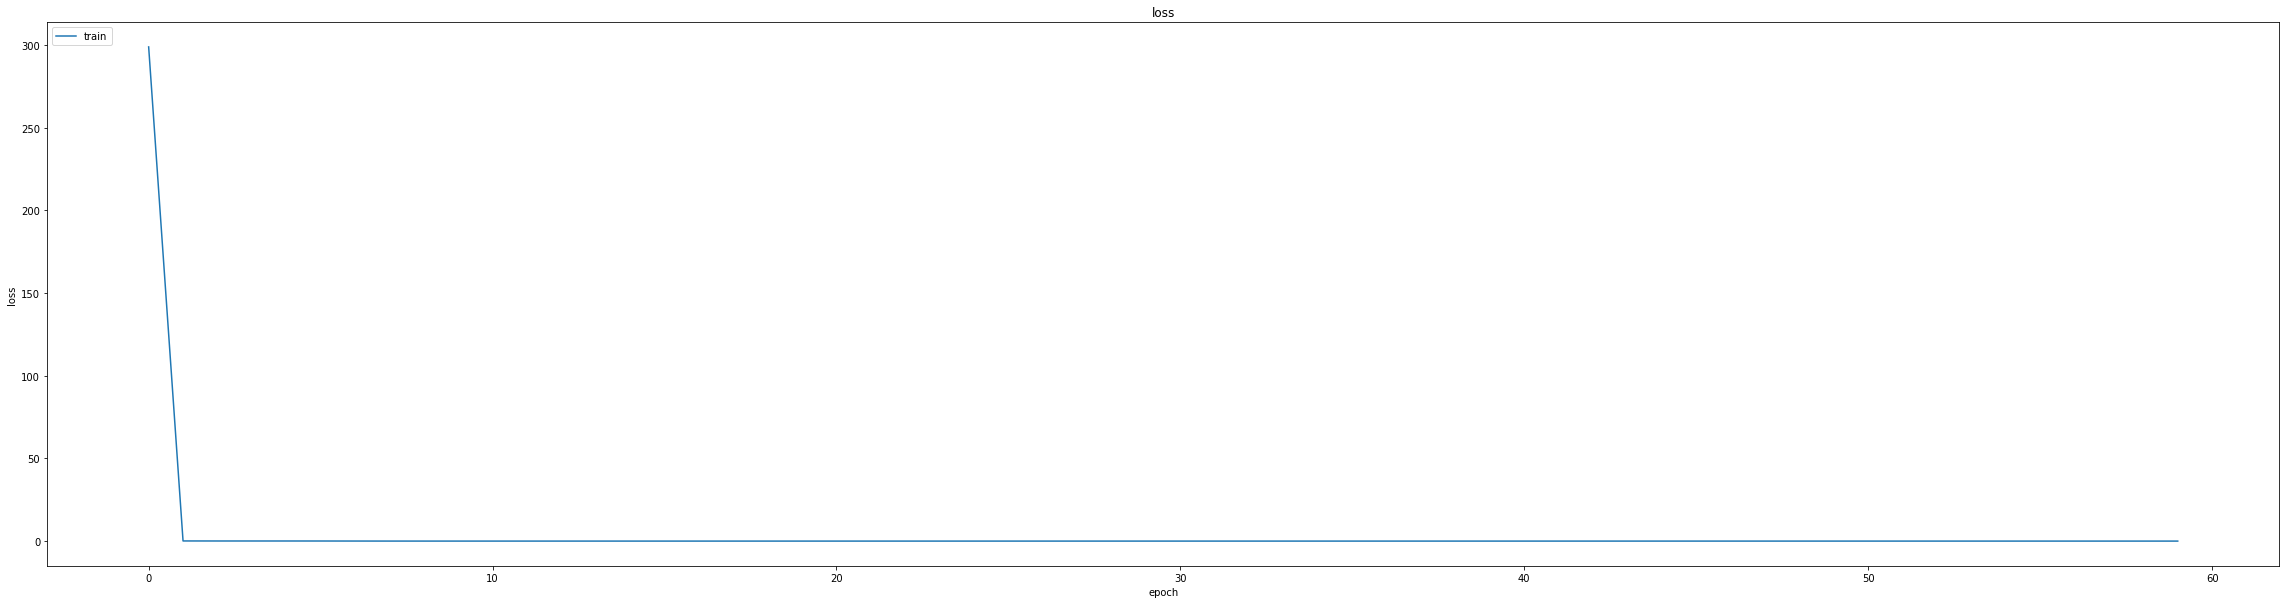

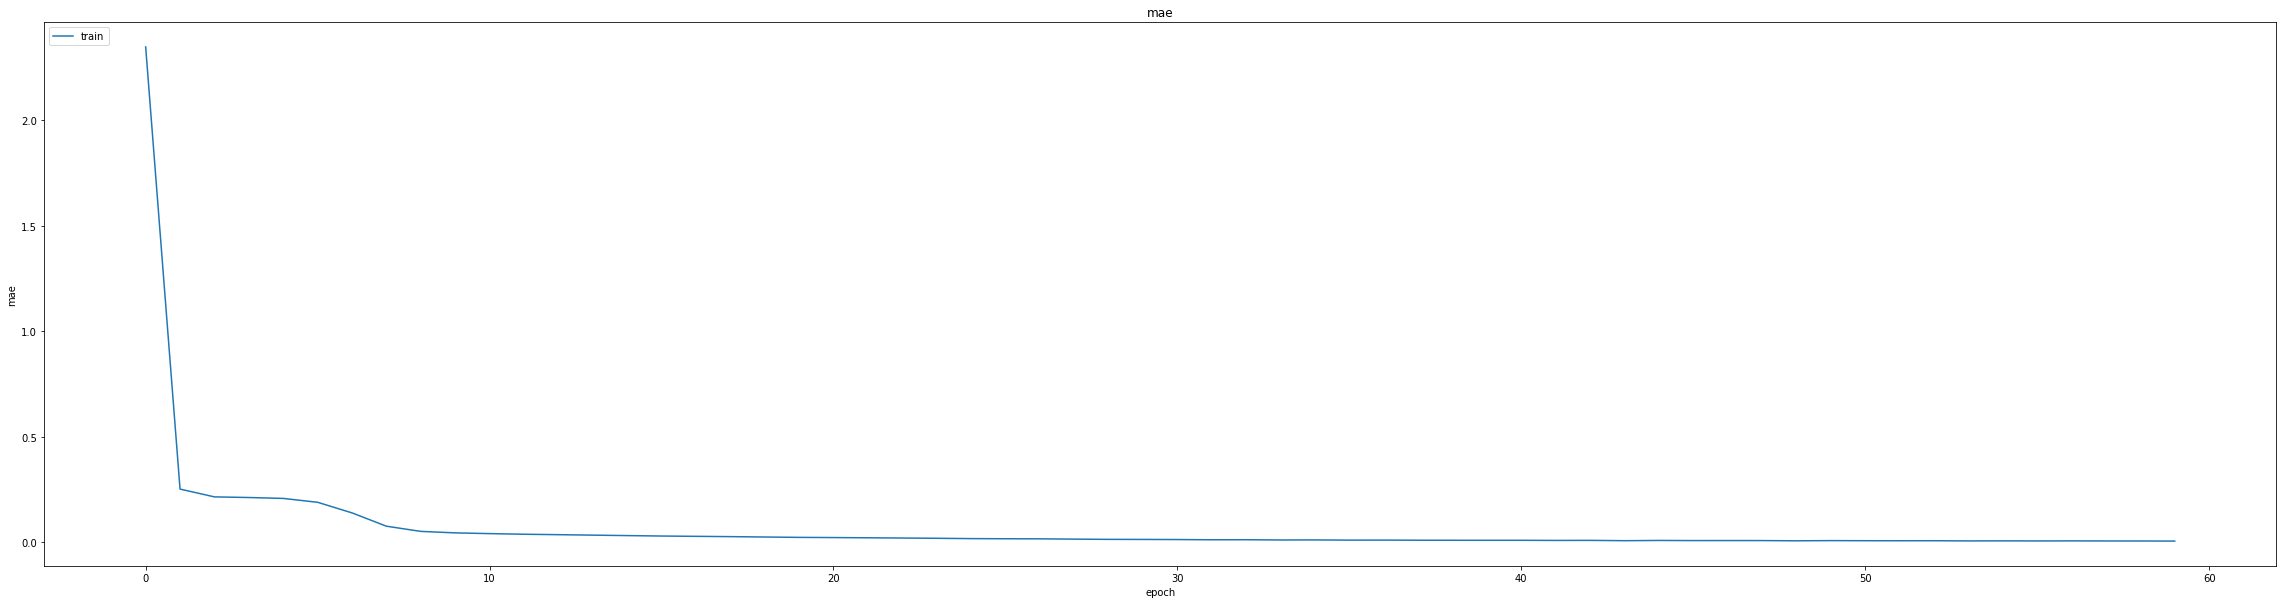

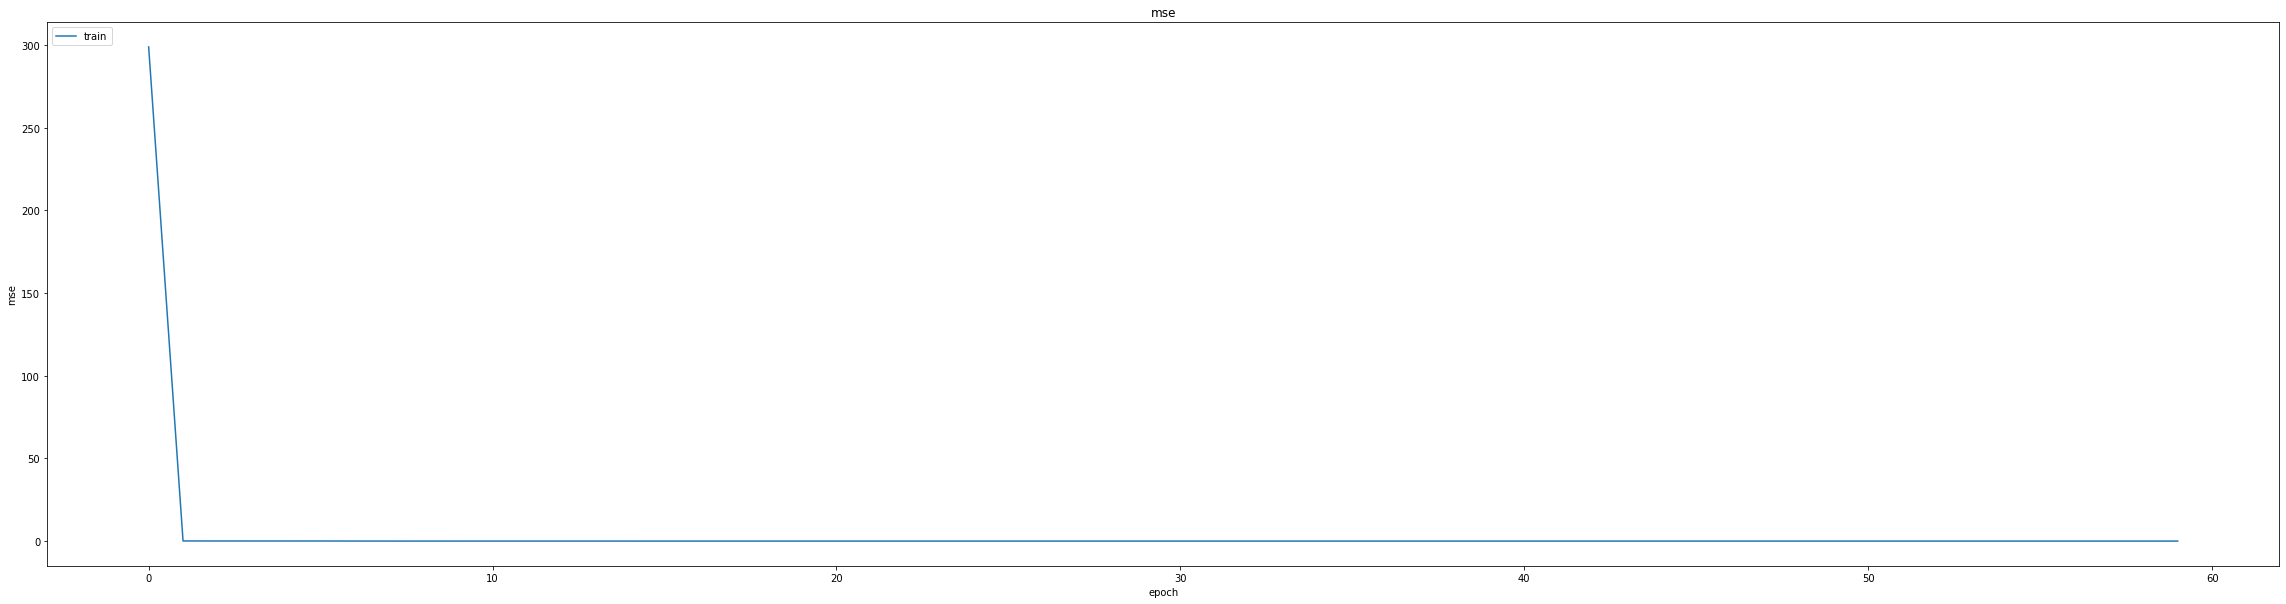

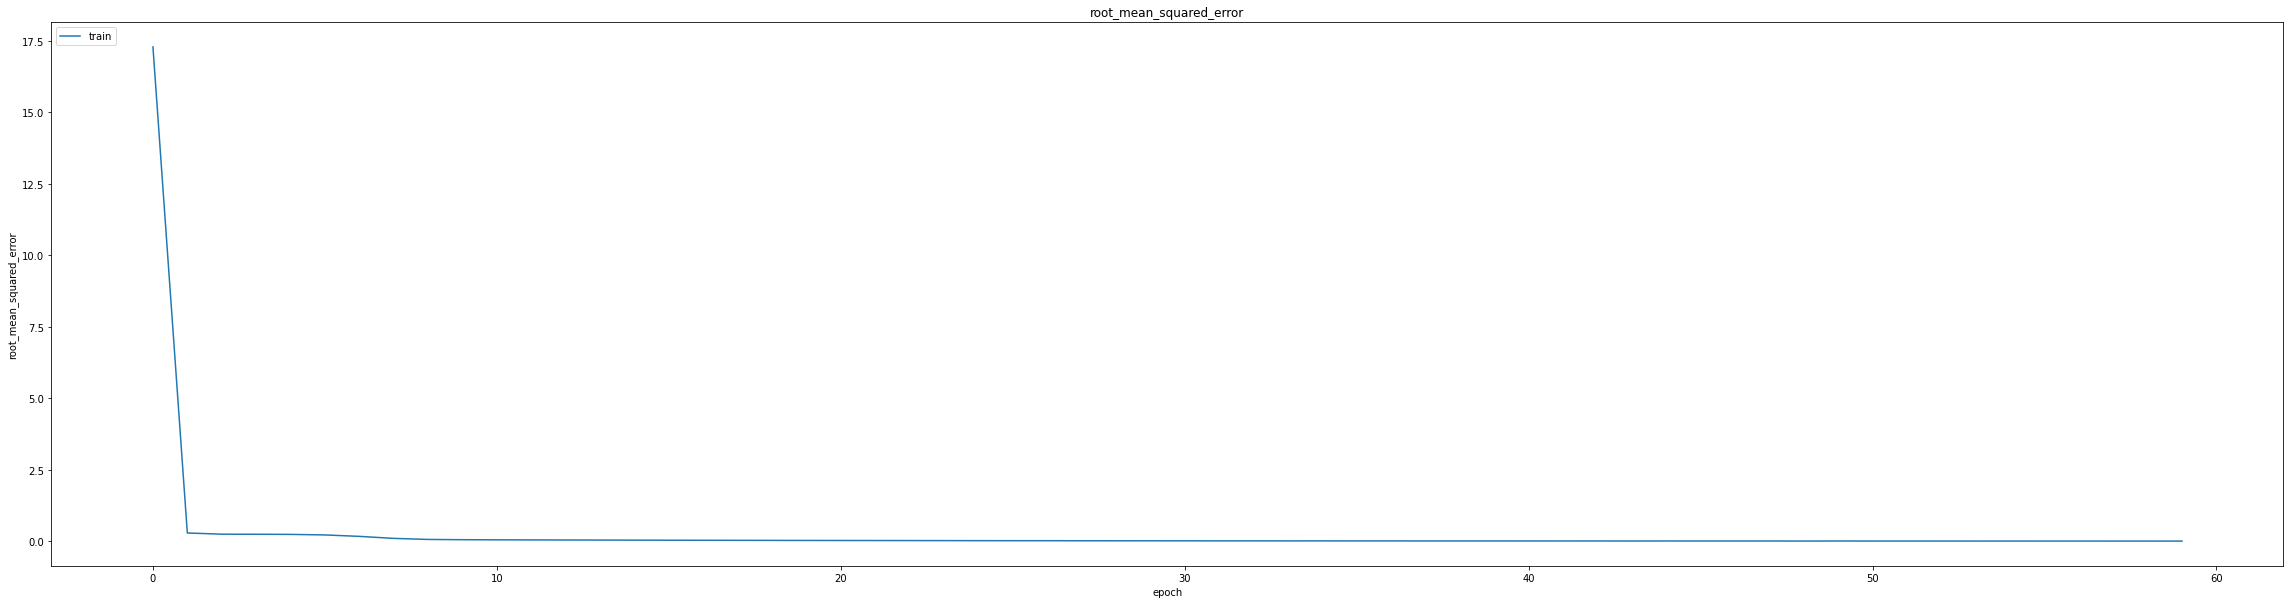

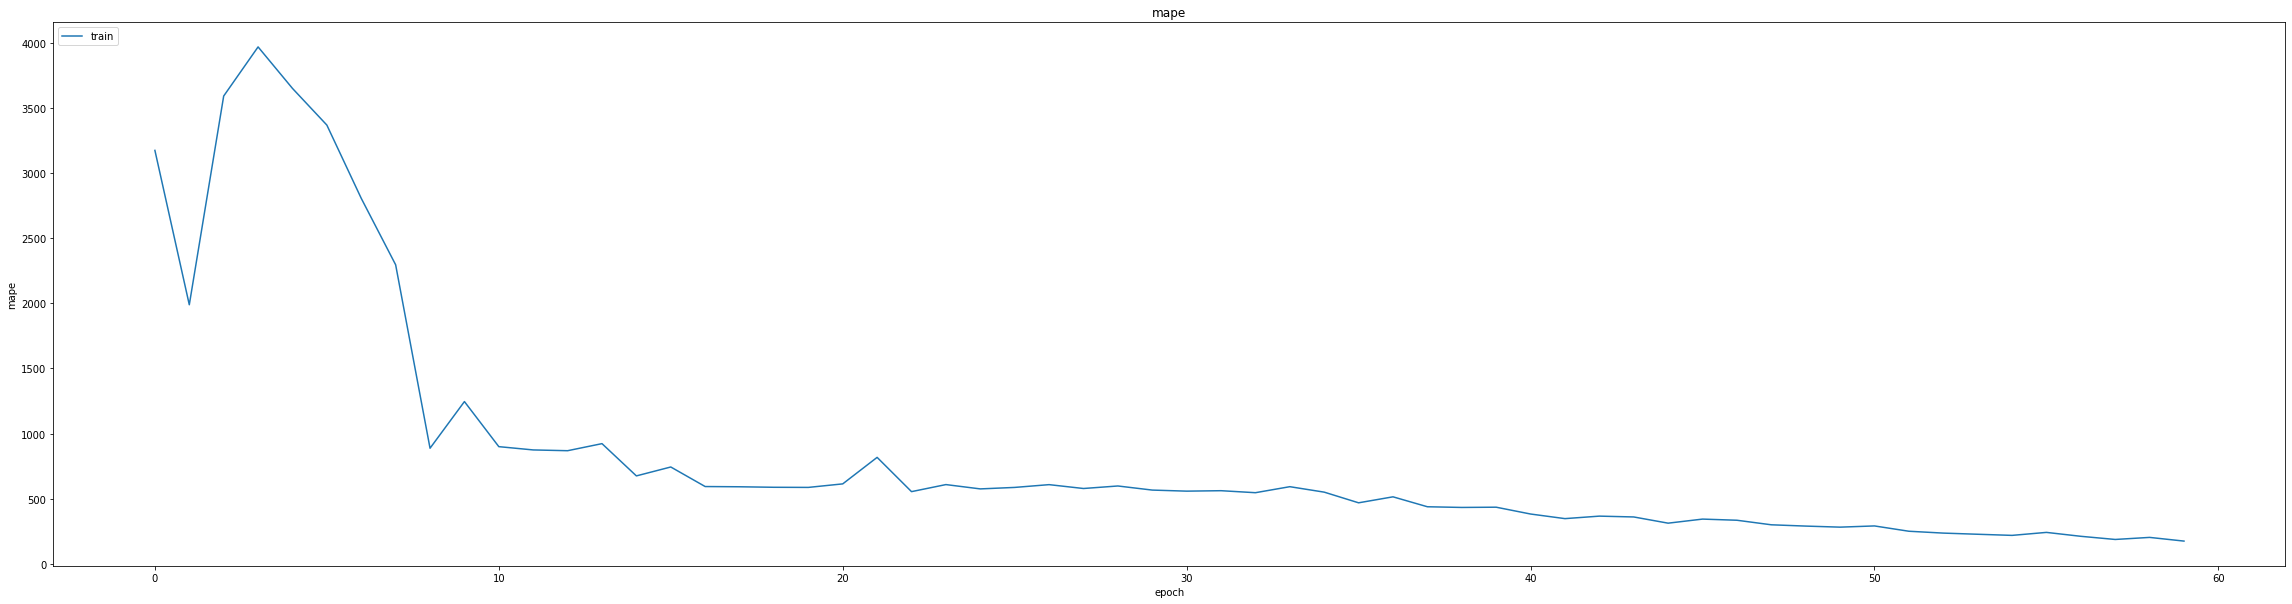

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.004787696059793234
0.007101000286638737
1044/1044 [==============================] - 7s 5ms/step
0.9901240120579049


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
405/405 [==============================] - ETA: 0s - loss: 0.0028 - mae: 0.0201 - mse: 0.0028 - root_mean_squared_error: 0.0528 - mape: 370.6322
Epoch 1: val_mse did not improve from 0.00005
405/405 [==============================] - 21s 35ms/step - loss: 0.0028 - mae: 0.0201 - mse: 0.0028 - root_mean_squared_error: 0.0528 - mape: 370.6322 - val_loss: 9.0226e-05 - val_mae: 0.0064 - val_mse: 9.0226e-05 - val_root_mean_squared_error: 0.0095 - val_mape: 2114.5842 - lr: 0.0010
Epoch 2/20
405/405 [==============================] - ETA: 0s - loss: 5.9334e-05 - mae: 0.0060 - mse: 5.9334e-05 - root_mean_squared_error: 0.0077 - mape: 283.7008
Epoch 2: val_mse did not improve from 0.00005
405/405 [==============================] - 13s 32ms/step - loss: 5.9334e-05 - mae: 0.0060 - mse: 5.9334e-05 - root_mean_squared_error: 0.0077 - mape: 283.7008 - val_loss: 5.6909e-05 - val_mae: 0.0049 - val_mse: 5.6909e-05 - val_root_mean_squared_error: 0.0075 - val_mape: 1803.3599 - lr: 0.0010
lr cha

405/405 [==============================] - 37s 91ms/step - loss: 3.8150e-05 - mae: 0.0048 - mse: 3.8150e-05 - root_mean_squared_error: 0.0062 - mape: 117.4066 - val_loss: 3.9076e-05 - val_mae: 0.0038 - val_mse: 3.9076e-05 - val_root_mean_squared_error: 0.0063 - val_mape: 1872.5107 - lr: 7.2900e-04
Epoch 8/20
405/405 [==============================] - ETA: 0s - loss: 6.6917e-05 - mae: 0.0064 - mse: 6.6917e-05 - root_mean_squared_error: 0.0082 - mape: 100.8788
Epoch 8: val_mse did not improve from 0.00004
405/405 [==============================] - 13s 32ms/step - loss: 6.6917e-05 - mae: 0.0064 - mse: 6.6917e-05 - root_mean_squared_error: 0.0082 - mape: 100.8788 - val_loss: 1.2456e-04 - val_mae: 0.0096 - val_mse: 1.2456e-04 - val_root_mean_squared_error: 0.0112 - val_mape: 1523.0471 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/20
405/405 [==============================] - ETA: 0s - loss: 3.0811e-05 - mae: 0.0042 - mse: 3.0811e-05 - root_mean_squared_error: 0.0056 - mape: 1

405/405 [==============================] - 37s 93ms/step - loss: 3.5737e-05 - mae: 0.0046 - mse: 3.5737e-05 - root_mean_squared_error: 0.0060 - mape: 102.3100 - val_loss: 3.2651e-05 - val_mae: 0.0040 - val_mse: 3.2651e-05 - val_root_mean_squared_error: 0.0057 - val_mape: 1473.0774 - lr: 5.9049e-04
Epoch 12/20
405/405 [==============================] - ETA: 0s - loss: 4.3454e-05 - mae: 0.0051 - mse: 4.3454e-05 - root_mean_squared_error: 0.0066 - mape: 87.5437
Epoch 12: val_mse did not improve from 0.00003
405/405 [==============================] - 13s 32ms/step - loss: 4.3454e-05 - mae: 0.0051 - mse: 4.3454e-05 - root_mean_squared_error: 0.0066 - mape: 87.5437 - val_loss: 4.2725e-05 - val_mae: 0.0053 - val_mse: 4.2725e-05 - val_root_mean_squared_error: 0.0065 - val_mape: 1432.6884 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/20
405/405 [==============================] - ETA: 0s - loss: 2.3130e-05 - mae: 0.0037 - mse: 2.3130e-05 - root_mean_squared_error: 0.0048 - mape: 

405/405 [==============================] - 37s 92ms/step - loss: 2.1175e-05 - mae: 0.0036 - mse: 2.1175e-05 - root_mean_squared_error: 0.0046 - mape: 108.2180 - val_loss: 2.5557e-05 - val_mae: 0.0039 - val_mse: 2.5557e-05 - val_root_mean_squared_error: 0.0051 - val_mape: 1162.1948 - lr: 4.7830e-04
Epoch 16/20
405/405 [==============================] - ETA: 0s - loss: 2.8901e-05 - mae: 0.0041 - mse: 2.8901e-05 - root_mean_squared_error: 0.0054 - mape: 120.8097
Epoch 16: val_mse did not improve from 0.00003
405/405 [==============================] - 13s 32ms/step - loss: 2.8901e-05 - mae: 0.0041 - mse: 2.8901e-05 - root_mean_squared_error: 0.0054 - mape: 120.8097 - val_loss: 1.3188e-04 - val_mae: 0.0109 - val_mse: 1.3188e-04 - val_root_mean_squared_error: 0.0115 - val_mape: 1318.7599 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/20
405/405 [==============================] - ETA: 0s - loss: 2.1179e-05 - mae: 0.0036 - mse: 2.1179e-05 - root_mean_squared_error: 0.0046 - mape

405/405 [==============================] - 37s 93ms/step - loss: 1.5545e-05 - mae: 0.0030 - mse: 1.5545e-05 - root_mean_squared_error: 0.0039 - mape: 93.2964 - val_loss: 1.3602e-05 - val_mae: 0.0024 - val_mse: 1.3602e-05 - val_root_mean_squared_error: 0.0037 - val_mape: 1148.9991 - lr: 3.8742e-04
Epoch 20/20
405/405 [==============================] - ETA: 0s - loss: 2.3356e-05 - mae: 0.0037 - mse: 2.3356e-05 - root_mean_squared_error: 0.0048 - mape: 97.8916
Epoch 20: val_mse did not improve from 0.00001
405/405 [==============================] - 13s 32ms/step - loss: 2.3356e-05 - mae: 0.0037 - mse: 2.3356e-05 - root_mean_squared_error: 0.0048 - mape: 97.8916 - val_loss: 1.5784e-04 - val_mae: 0.0119 - val_mse: 1.5784e-04 - val_root_mean_squared_error: 0.0126 - val_mape: 1128.9364 - lr: 3.8742e-04


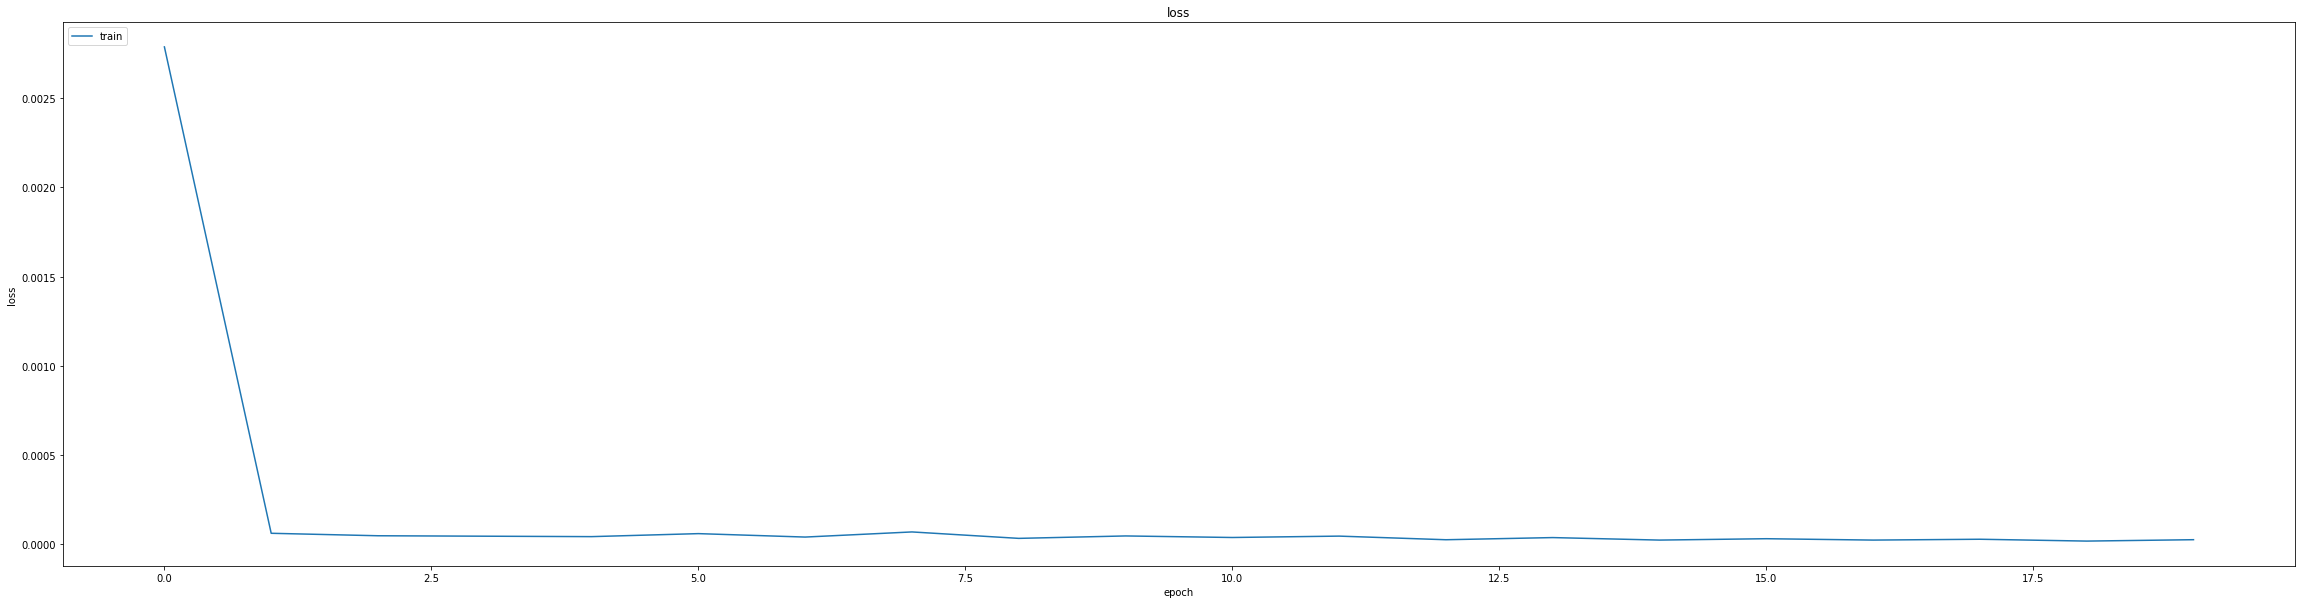

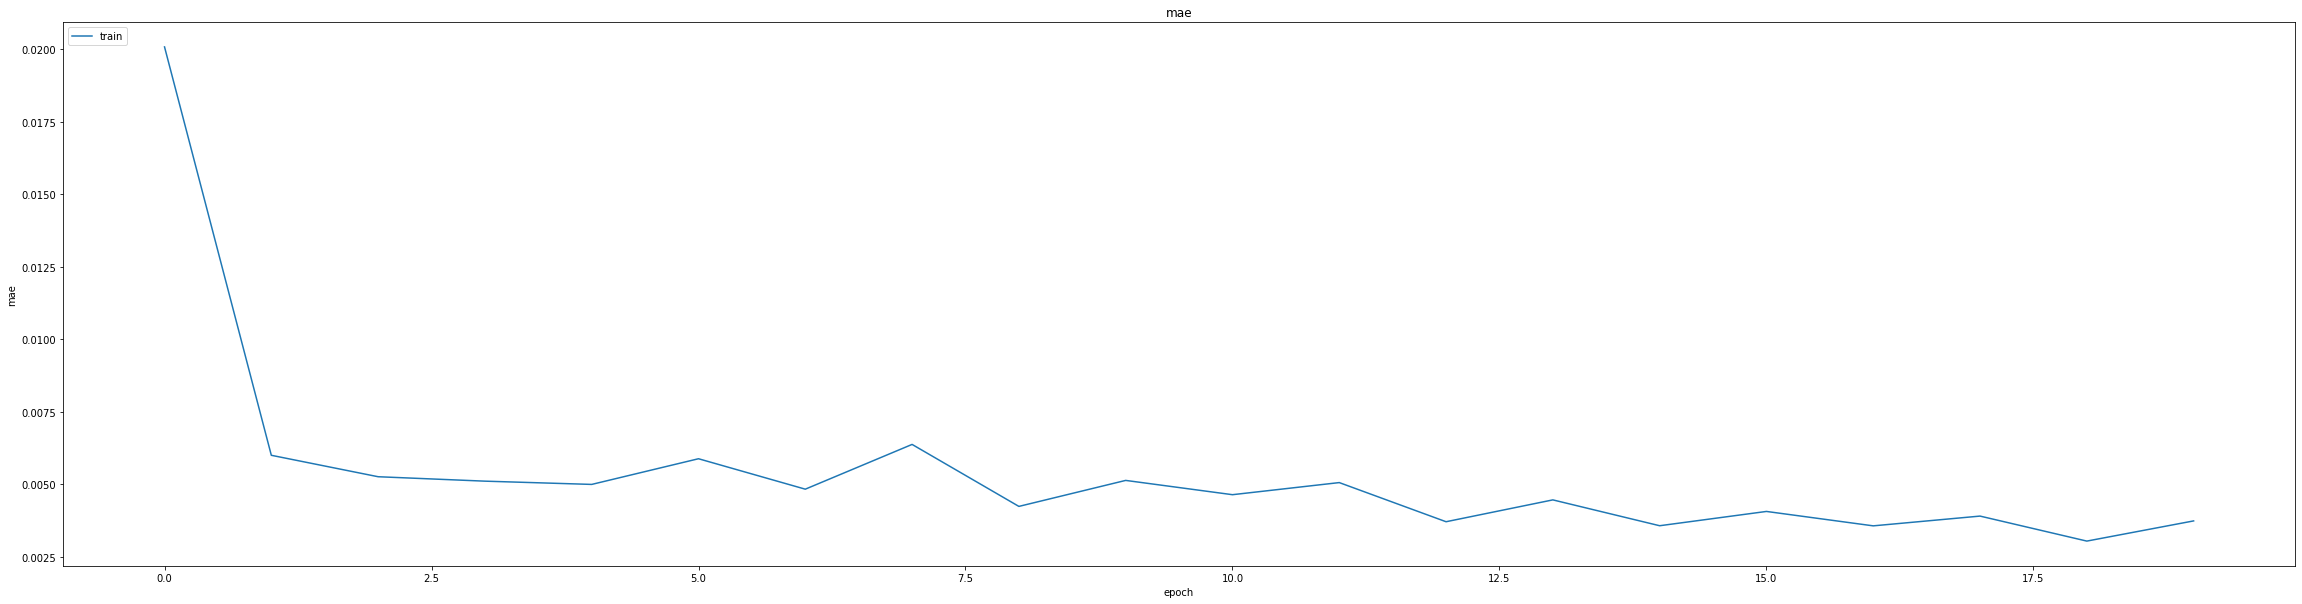

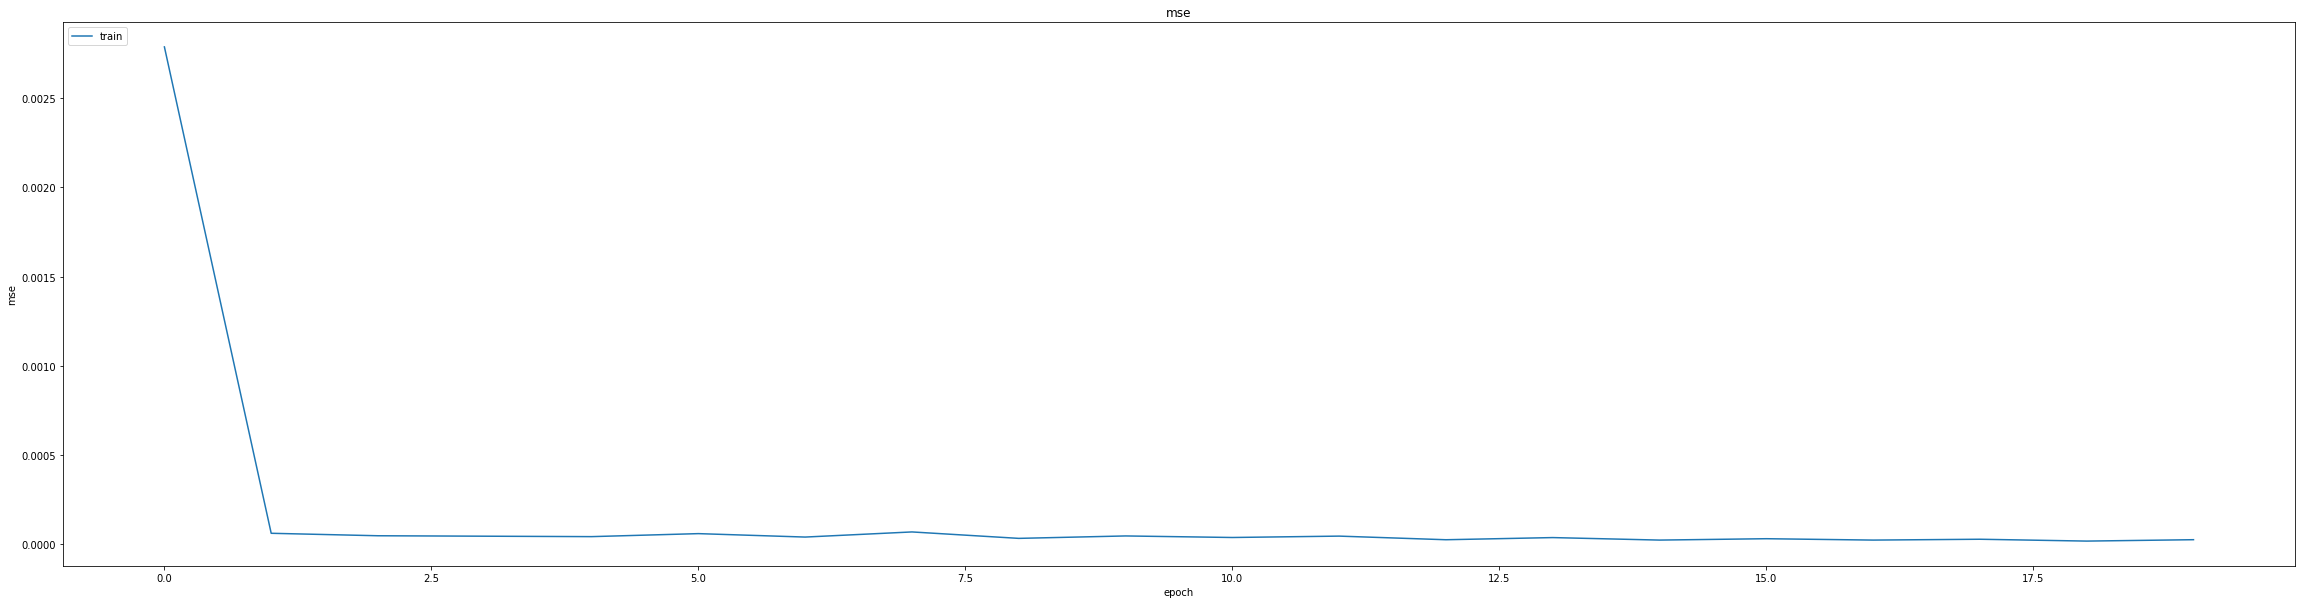

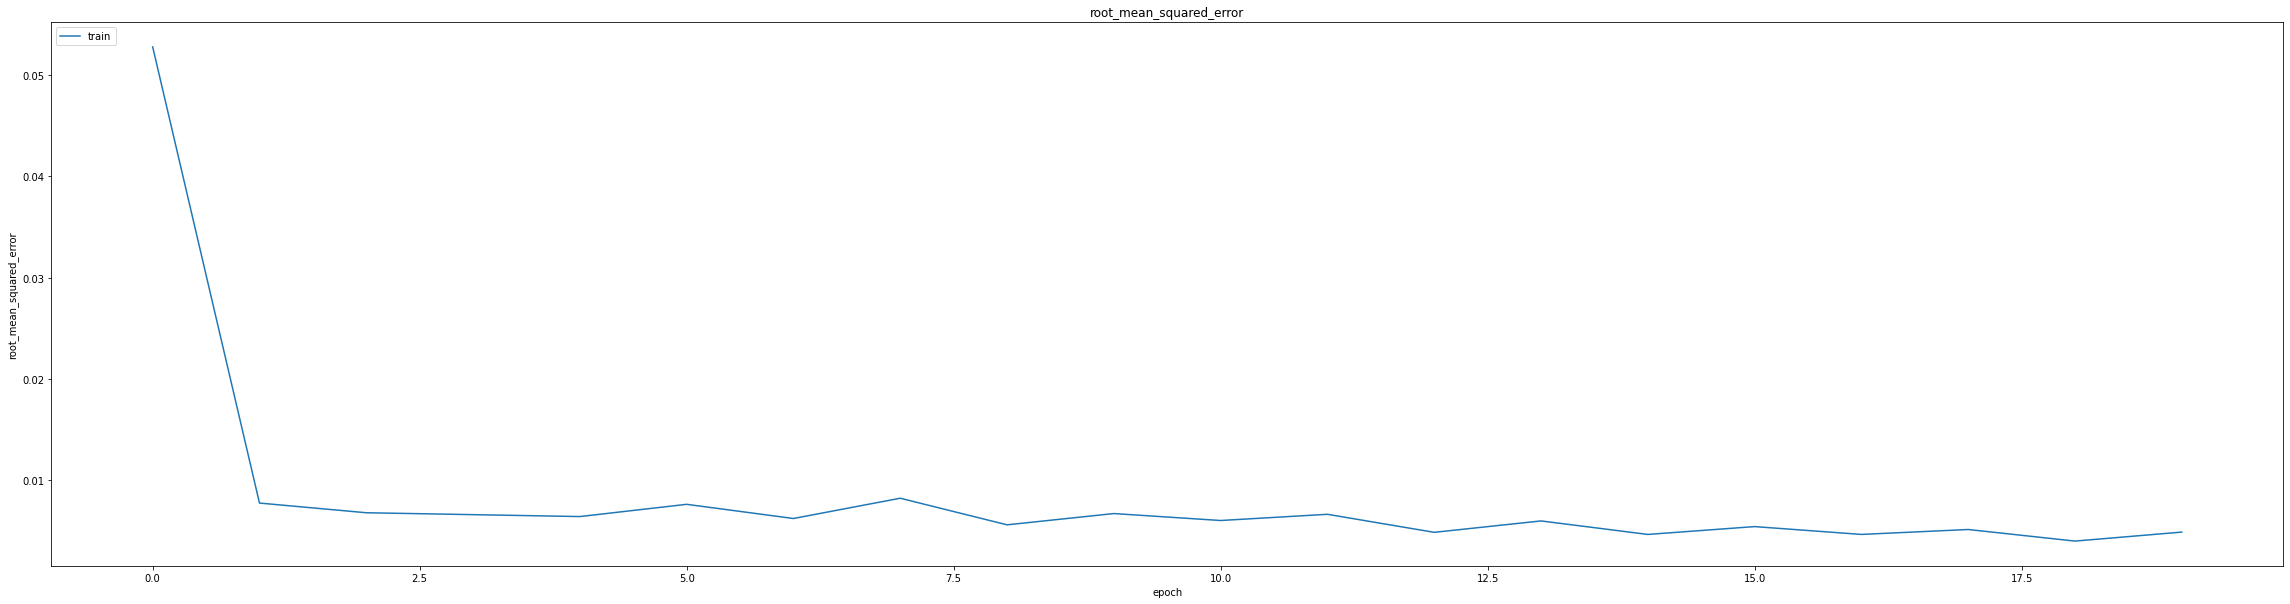

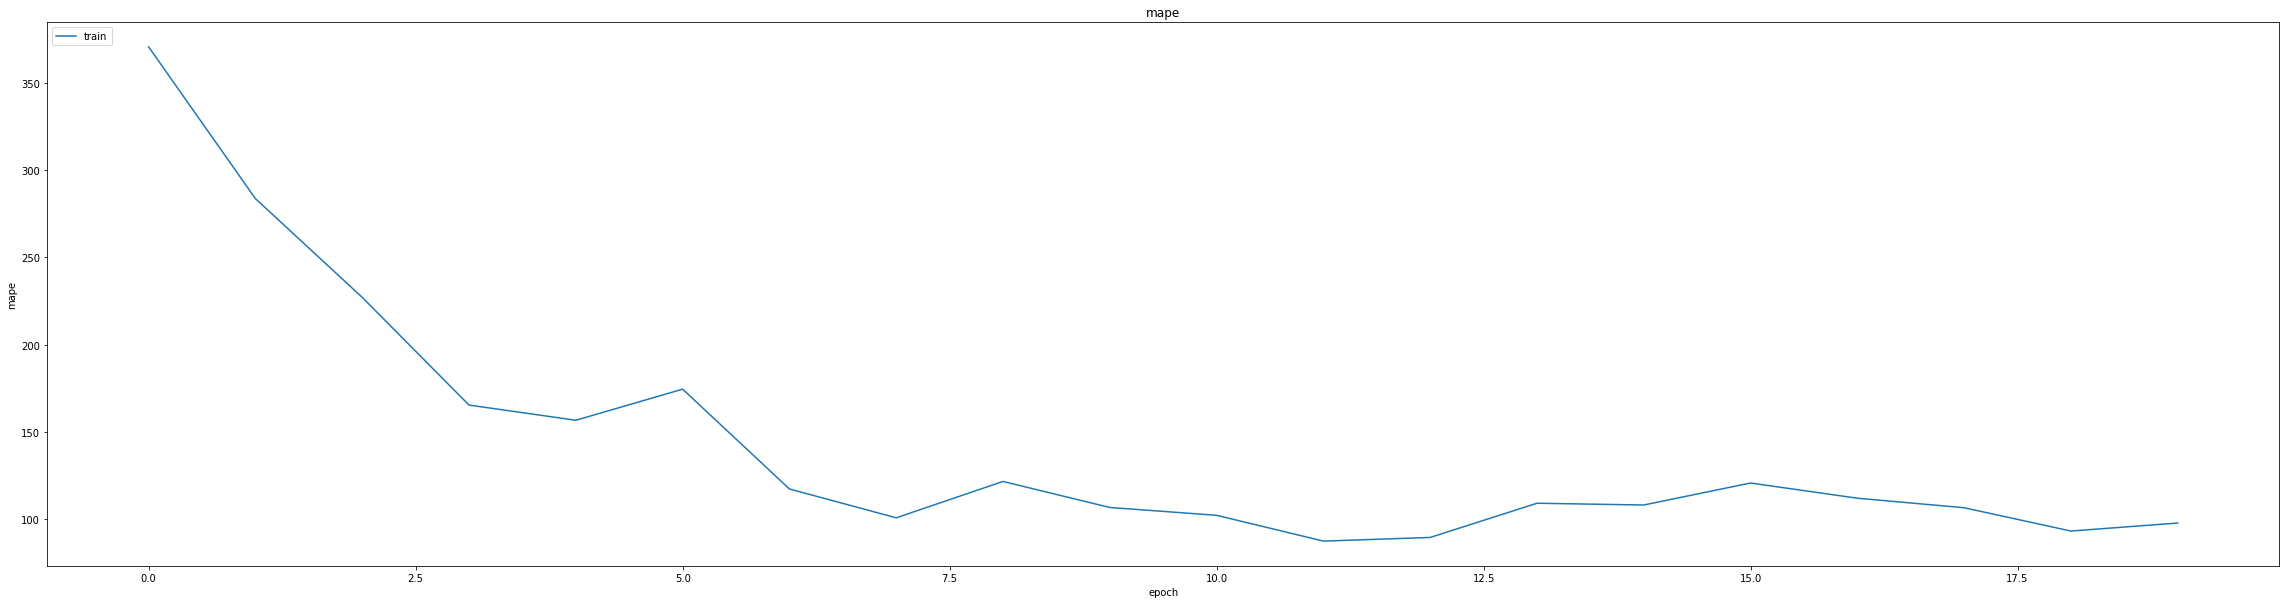

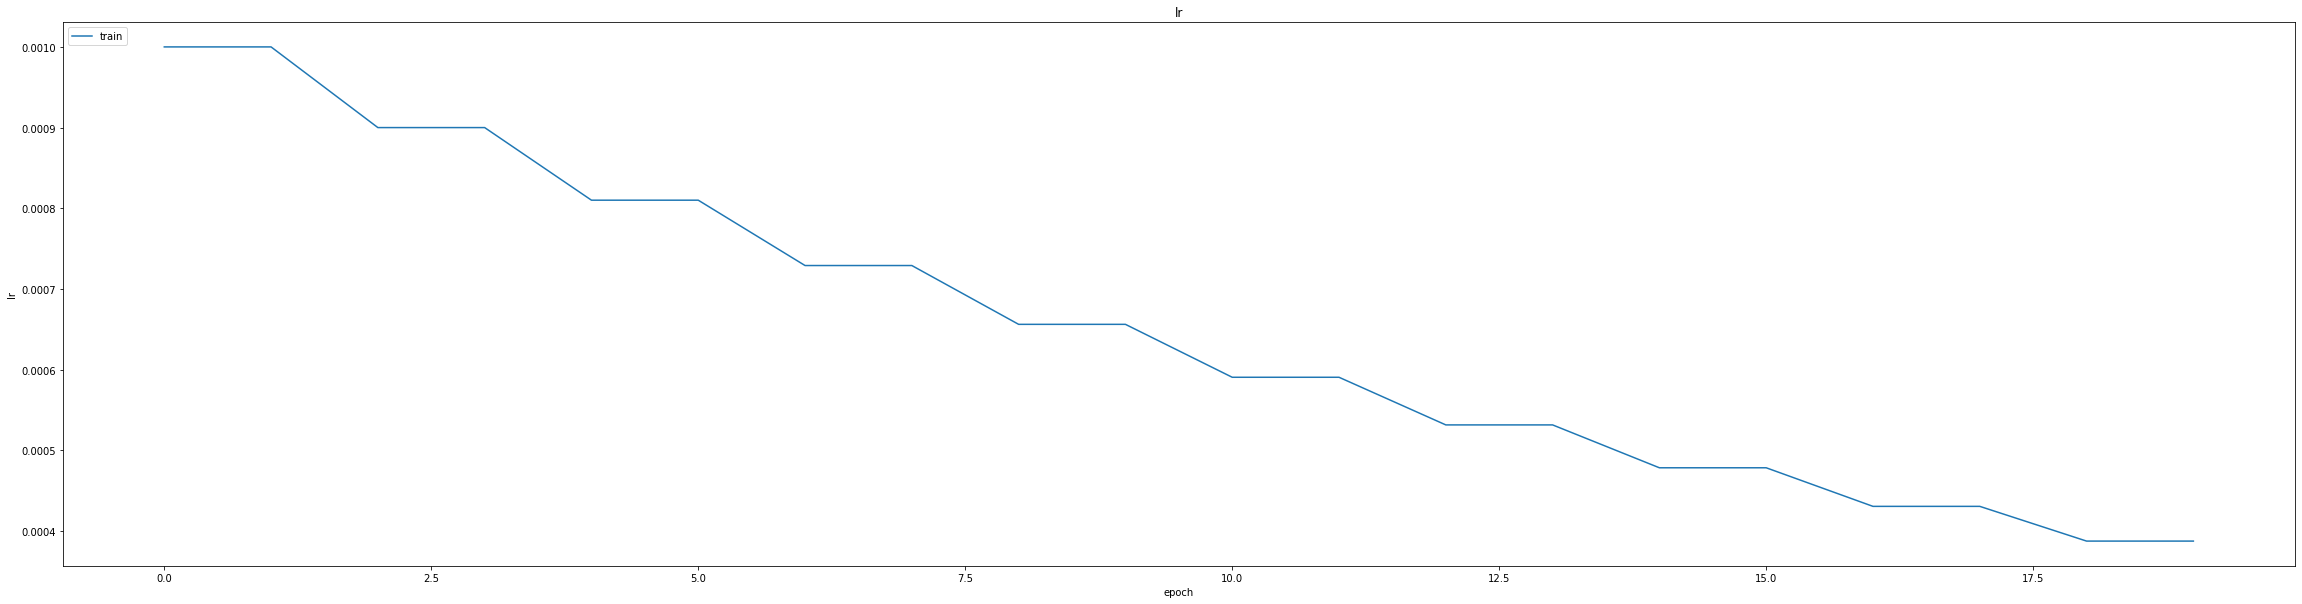

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0024089186917990446
0.003688135650008917
1044/1044 [==============================] - 7s 5ms/step
0.9968402462846966


1044/1044 [==============================] - 6s 5ms/step


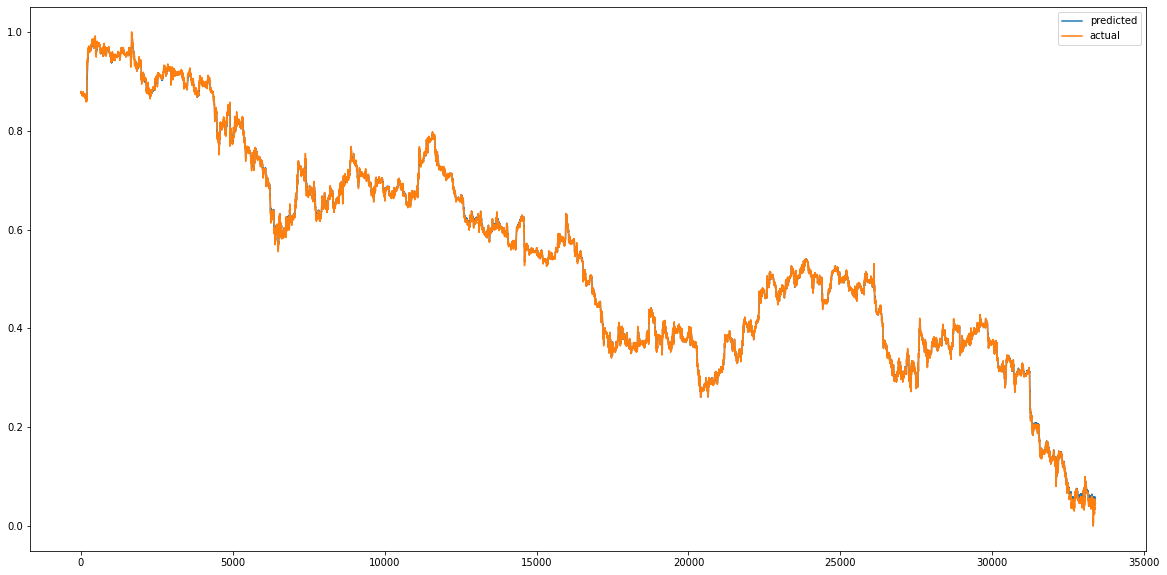

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


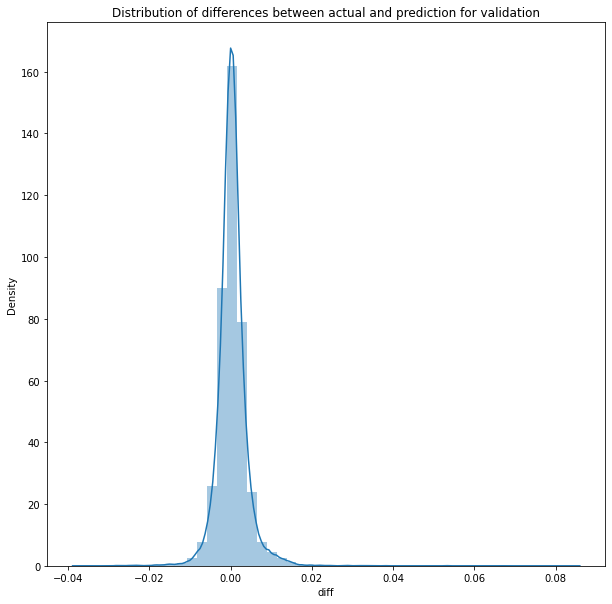

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1044/1044 [==============================] - 6s 5ms/step


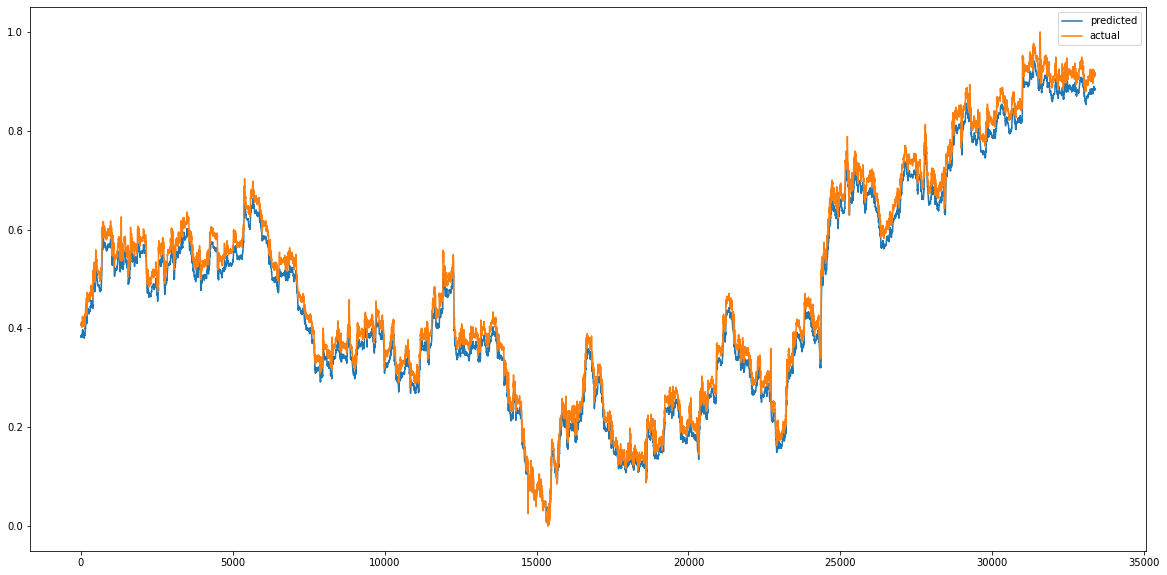

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


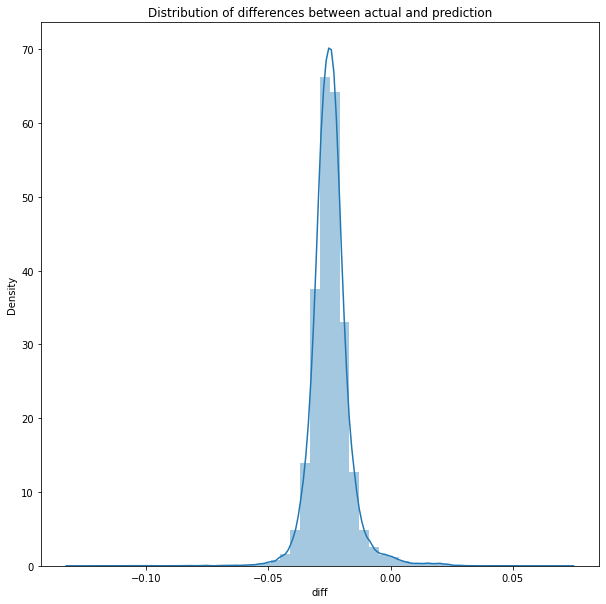

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0006702859310282148
RMSE :  0.0258898808616072
MAE :  0.02491821160896538
1044/1044 [==============================] - 7s 6ms/step
R2_Score  : 0.9871962255577166


count    33392.000000
mean        -0.024683
std          0.007813
min         -0.129909
25%         -0.028816
50%         -0.025050
75%         -0.021274
max          0.071950
Name: diff, dtype: float64

**GRU_LSTM_MODEL**

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 24, 32)            4416      
                                                                 
 lstm_2 (LSTM)               (None, 24, 256)           295936    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
405/405 [==============================] - ETA: 0s - loss: 659.4162 - mae: 7.2312 - mse: 659.4162 - root_mean_squared_error: 25.6791 - mape: 12273.7764
Epoch 1: val_mse improved from inf to 0.71927, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 25s 52ms/step - loss: 659.4162 - mae: 7.2312 - mse: 659.4162 - root_mean_squared_error: 25.6791 - mape: 12273.7764 - val_loss: 0.7193 - val_mae: 0.8181 - val_mse: 0.7193 - val_root_mean_squared_error: 0.8481 - val_mape: 41128.5703
Epoch 2/60
402/405 [============================>.] - ETA: 0s - loss: 0.3061 - mae: 0.4745 - mse: 0.3061 - root_mean_squared_error: 0.5532 - mape: 7508.3696
Epoch 2: val_mse improved from 0.71927 to 0.12806, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.3048 - mae: 0.4731 - mse: 0.3048 - root_mean_squared_error: 0.5521 - mape: 7454.0630 - val_loss: 0.1281 - val_mae: 0.3053 - val_mse: 0.1281 - val_root_mean_squared_error: 0.3579 - val_mape: 24854.3516
Epoch 3/60
404/405 [============================>.] - ETA: 0s - loss: 0.0908 - mae: 0.2309 - mse: 0.0908 - root_mean_squared_error: 0.3014 - mape: 4718.3486
Epoch 3: val_mse improved from 0.12806 to 0.06363, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0908 - mae: 0.2308 - mse: 0.0908 - root_mean_squared_error: 0.3013 - mape: 4707.1821 - val_loss: 0.0636 - val_mae: 0.2089 - val_mse: 0.0636 - val_root_mean_squared_error: 0.2522 - val_mape: 19950.1484
Epoch 4/60
402/405 [============================>.] - ETA: 0s - loss: 0.0647 - mae: 0.2060 - mse: 0.0647 - root_mean_squared_error: 0.2544 - mape: 4059.7866
Epoch 4: val_mse improved from 0.06363 to 0.05275, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0647 - mae: 0.2060 - mse: 0.0647 - root_mean_squared_error: 0.2544 - mape: 4030.5366 - val_loss: 0.0528 - val_mae: 0.1909 - val_mse: 0.0528 - val_root_mean_squared_error: 0.2297 - val_mape: 18021.9453
Epoch 5/60
403/405 [============================>.] - ETA: 0s - loss: 0.0610 - mae: 0.2096 - mse: 0.0610 - root_mean_squared_error: 0.2469 - mape: 3831.3159
Epoch 5: val_mse improved from 0.05275 to 0.05075, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0610 - mae: 0.2096 - mse: 0.0610 - root_mean_squared_error: 0.2469 - mape: 3812.9751 - val_loss: 0.0507 - val_mae: 0.1874 - val_mse: 0.0507 - val_root_mean_squared_error: 0.2253 - val_mape: 17279.6504
Epoch 6/60
403/405 [============================>.] - ETA: 0s - loss: 0.0605 - mae: 0.2116 - mse: 0.0605 - root_mean_squared_error: 0.2460 - mape: 3758.4597
Epoch 6: val_mse improved from 0.05075 to 0.05035, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0605 - mae: 0.2116 - mse: 0.0605 - root_mean_squared_error: 0.2460 - mape: 3740.4648 - val_loss: 0.0503 - val_mae: 0.1865 - val_mse: 0.0503 - val_root_mean_squared_error: 0.2244 - val_mape: 17030.1328
Epoch 7/60
405/405 [==============================] - ETA: 0s - loss: 0.0605 - mae: 0.2123 - mse: 0.0605 - root_mean_squared_error: 0.2460 - mape: 3707.3999
Epoch 7: val_mse improved from 0.05035 to 0.05028, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 18s 45ms/step - loss: 0.0605 - mae: 0.2123 - mse: 0.0605 - root_mean_squared_error: 0.2460 - mape: 3707.3999 - val_loss: 0.0503 - val_mae: 0.1863 - val_mse: 0.0503 - val_root_mean_squared_error: 0.2242 - val_mape: 16977.1699
Epoch 8/60
403/405 [============================>.] - ETA: 0s - loss: 0.0605 - mae: 0.2125 - mse: 0.0605 - root_mean_squared_error: 0.2460 - mape: 3731.6367
Epoch 8: val_mse improved from 0.05028 to 0.05028, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0605 - mae: 0.2125 - mse: 0.0605 - root_mean_squared_error: 0.2460 - mape: 3713.7900 - val_loss: 0.0503 - val_mae: 0.1863 - val_mse: 0.0503 - val_root_mean_squared_error: 0.2242 - val_mape: 16975.0977
Epoch 9/60
404/405 [============================>.] - ETA: 0s - loss: 0.0605 - mae: 0.2124 - mse: 0.0605 - root_mean_squared_error: 0.2460 - mape: 3729.4668
Epoch 9: val_mse improved from 0.05028 to 0.05026, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0605 - mae: 0.2124 - mse: 0.0605 - root_mean_squared_error: 0.2460 - mape: 3720.6082 - val_loss: 0.0503 - val_mae: 0.1863 - val_mse: 0.0503 - val_root_mean_squared_error: 0.2242 - val_mape: 16957.2578
Epoch 10/60
403/405 [============================>.] - ETA: 0s - loss: 0.0605 - mae: 0.2125 - mse: 0.0605 - root_mean_squared_error: 0.2460 - mape: 3723.2185
Epoch 10: val_mse improved from 0.05026 to 0.05025, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 41ms/step - loss: 0.0605 - mae: 0.2125 - mse: 0.0605 - root_mean_squared_error: 0.2460 - mape: 3705.3799 - val_loss: 0.0502 - val_mae: 0.1862 - val_mse: 0.0502 - val_root_mean_squared_error: 0.2242 - val_mape: 16949.7598
Epoch 11/60
402/405 [============================>.] - ETA: 0s - loss: 0.0605 - mae: 0.2125 - mse: 0.0605 - root_mean_squared_error: 0.2460 - mape: 3839.2417
Epoch 11: val_mse did not improve from 0.05025
405/405 [==============================] - 7s 16ms/step - loss: 0.0605 - mae: 0.2125 - mse: 0.0605 - root_mean_squared_error: 0.2459 - mape: 3811.6279 - val_loss: 0.0503 - val_mae: 0.1863 - val_mse: 0.0503 - val_root_mean_squared_error: 0.2242 - val_mape: 16967.6055
Epoch 12/60
402/405 [============================>.] - ETA: 0s - loss: 0.0605 - mae: 0.2124 - mse: 0.0605 - root_mean_squared_error: 0.2459 - mape: 3776.4678
Epoch 12: val_mse did not improve from 0.05025
405/405 [==============================] - 7s 16ms/step

405/405 [==============================] - 17s 43ms/step - loss: 0.0605 - mae: 0.2124 - mse: 0.0605 - root_mean_squared_error: 0.2460 - mape: 3783.7231 - val_loss: 0.0502 - val_mae: 0.1862 - val_mse: 0.0502 - val_root_mean_squared_error: 0.2241 - val_mape: 16946.6328
Epoch 16/60
403/405 [============================>.] - ETA: 0s - loss: 0.0605 - mae: 0.2124 - mse: 0.0605 - root_mean_squared_error: 0.2459 - mape: 3731.0183
Epoch 16: val_mse improved from 0.05024 to 0.05020, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0605 - mae: 0.2124 - mse: 0.0605 - root_mean_squared_error: 0.2459 - mape: 3713.1995 - val_loss: 0.0502 - val_mae: 0.1861 - val_mse: 0.0502 - val_root_mean_squared_error: 0.2241 - val_mape: 16918.0020
Epoch 17/60
402/405 [============================>.] - ETA: 0s - loss: 0.0605 - mae: 0.2125 - mse: 0.0605 - root_mean_squared_error: 0.2459 - mape: 3753.0356
Epoch 17: val_mse improved from 0.05020 to 0.05015, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0605 - mae: 0.2124 - mse: 0.0605 - root_mean_squared_error: 0.2459 - mape: 3725.9675 - val_loss: 0.0502 - val_mae: 0.1860 - val_mse: 0.0502 - val_root_mean_squared_error: 0.2239 - val_mape: 16876.4062
Epoch 18/60
402/405 [============================>.] - ETA: 0s - loss: 0.0605 - mae: 0.2124 - mse: 0.0605 - root_mean_squared_error: 0.2459 - mape: 3733.7422
Epoch 18: val_mse did not improve from 0.05015
405/405 [==============================] - 7s 16ms/step - loss: 0.0605 - mae: 0.2124 - mse: 0.0605 - root_mean_squared_error: 0.2459 - mape: 3706.8125 - val_loss: 0.0502 - val_mae: 0.1861 - val_mse: 0.0502 - val_root_mean_squared_error: 0.2240 - val_mape: 16922.3770
Epoch 19/60
404/405 [============================>.] - ETA: 0s - loss: 0.0605 - mae: 0.2124 - mse: 0.0605 - root_mean_squared_error: 0.2459 - mape: 3719.9150
Epoch 19: val_mse did not improve from 0.05015
405/405 [==============================] - 7s 16ms/step

405/405 [==============================] - 17s 42ms/step - loss: 0.0604 - mae: 0.2123 - mse: 0.0604 - root_mean_squared_error: 0.2458 - mape: 3742.8760 - val_loss: 0.0501 - val_mae: 0.1860 - val_mse: 0.0501 - val_root_mean_squared_error: 0.2239 - val_mape: 16927.6582
Epoch 21/60
404/405 [============================>.] - ETA: 0s - loss: 0.0603 - mae: 0.2121 - mse: 0.0603 - root_mean_squared_error: 0.2455 - mape: 3706.1992
Epoch 21: val_mse improved from 0.05014 to 0.04984, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 41ms/step - loss: 0.0603 - mae: 0.2121 - mse: 0.0603 - root_mean_squared_error: 0.2455 - mape: 3697.3916 - val_loss: 0.0498 - val_mae: 0.1854 - val_mse: 0.0498 - val_root_mean_squared_error: 0.2233 - val_mape: 16829.9629
Epoch 22/60
403/405 [============================>.] - ETA: 0s - loss: 0.0489 - mae: 0.1845 - mse: 0.0489 - root_mean_squared_error: 0.2212 - mape: 3379.7676
Epoch 22: val_mse improved from 0.04984 to 0.01768, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0488 - mae: 0.1841 - mse: 0.0488 - root_mean_squared_error: 0.2209 - mape: 3363.4790 - val_loss: 0.0177 - val_mae: 0.1035 - val_mse: 0.0177 - val_root_mean_squared_error: 0.1330 - val_mape: 11912.3770
Epoch 23/60
402/405 [============================>.] - ETA: 0s - loss: 0.0119 - mae: 0.0880 - mse: 0.0119 - root_mean_squared_error: 0.1091 - mape: 2117.9407
Epoch 23: val_mse improved from 0.01768 to 0.00464, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0119 - mae: 0.0879 - mse: 0.0119 - root_mean_squared_error: 0.1089 - mape: 2102.5957 - val_loss: 0.0046 - val_mae: 0.0499 - val_mse: 0.0046 - val_root_mean_squared_error: 0.0681 - val_mape: 8022.8760
Epoch 24/60
403/405 [============================>.] - ETA: 0s - loss: 0.0044 - mae: 0.0523 - mse: 0.0044 - root_mean_squared_error: 0.0667 - mape: 1588.5220
Epoch 24: val_mse improved from 0.00464 to 0.00155, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0044 - mae: 0.0523 - mse: 0.0044 - root_mean_squared_error: 0.0666 - mape: 1580.8273 - val_loss: 0.0015 - val_mae: 0.0260 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0394 - val_mape: 6072.7510
Epoch 25/60
403/405 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0354 - mse: 0.0021 - root_mean_squared_error: 0.0456 - mape: 1223.6261
Epoch 25: val_mse improved from 0.00155 to 0.00106, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 41ms/step - loss: 0.0021 - mae: 0.0354 - mse: 0.0021 - root_mean_squared_error: 0.0455 - mape: 1217.7043 - val_loss: 0.0011 - val_mae: 0.0237 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0326 - val_mape: 5191.7246
Epoch 26/60
402/405 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0294 - mse: 0.0014 - root_mean_squared_error: 0.0376 - mape: 1119.5219
Epoch 26: val_mse improved from 0.00106 to 0.00103, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0014 - mae: 0.0294 - mse: 0.0014 - root_mean_squared_error: 0.0375 - mape: 1111.3495 - val_loss: 0.0010 - val_mae: 0.0252 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0321 - val_mape: 4640.2686
Epoch 27/60
402/405 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0254 - mse: 0.0010 - root_mean_squared_error: 0.0324 - mape: 1027.1906
Epoch 27: val_mse improved from 0.00103 to 0.00064, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0010 - mae: 0.0254 - mse: 0.0010 - root_mean_squared_error: 0.0323 - mape: 1019.6976 - val_loss: 6.3840e-04 - val_mae: 0.0159 - val_mse: 6.3840e-04 - val_root_mean_squared_error: 0.0253 - val_mape: 4256.7617
Epoch 28/60
405/405 [==============================] - ETA: 0s - loss: 8.8234e-04 - mae: 0.0234 - mse: 8.8234e-04 - root_mean_squared_error: 0.0297 - mape: 873.0180
Epoch 28: val_mse did not improve from 0.00064
405/405 [==============================] - 7s 17ms/step - loss: 8.8234e-04 - mae: 0.0234 - mse: 8.8234e-04 - root_mean_squared_error: 0.0297 - mape: 873.0180 - val_loss: 6.5627e-04 - val_mae: 0.0190 - val_mse: 6.5627e-04 - val_root_mean_squared_error: 0.0256 - val_mape: 3992.9299
Epoch 29/60
403/405 [============================>.] - ETA: 0s - loss: 7.8040e-04 - mae: 0.0221 - mse: 7.8040e-04 - root_mean_squared_error: 0.0279 - mape: 824.0137
Epoch 29: val_mse improved from 0.00064 to 0.00056, saving model to

405/405 [==============================] - 17s 42ms/step - loss: 7.8022e-04 - mae: 0.0221 - mse: 7.8022e-04 - root_mean_squared_error: 0.0279 - mape: 820.0205 - val_loss: 5.5986e-04 - val_mae: 0.0176 - val_mse: 5.5986e-04 - val_root_mean_squared_error: 0.0237 - val_mape: 3779.0232
Epoch 30/60
403/405 [============================>.] - ETA: 0s - loss: 6.7880e-04 - mae: 0.0205 - mse: 6.7880e-04 - root_mean_squared_error: 0.0261 - mape: 840.1656
Epoch 30: val_mse did not improve from 0.00056
405/405 [==============================] - 7s 17ms/step - loss: 6.7903e-04 - mae: 0.0205 - mse: 6.7903e-04 - root_mean_squared_error: 0.0261 - mape: 836.0886 - val_loss: 7.8503e-04 - val_mae: 0.0237 - val_mse: 7.8503e-04 - val_root_mean_squared_error: 0.0280 - val_mape: 3643.9902
Epoch 31/60
403/405 [============================>.] - ETA: 0s - loss: 5.9946e-04 - mae: 0.0193 - mse: 5.9946e-04 - root_mean_squared_error: 0.0245 - mape: 749.7228
Epoch 31: val_mse did not improve from 0.00056
405/405 [====

405/405 [==============================] - 17s 42ms/step - loss: 4.4066e-04 - mae: 0.0164 - mse: 4.4066e-04 - root_mean_squared_error: 0.0210 - mape: 713.9467 - val_loss: 4.6652e-04 - val_mae: 0.0175 - val_mse: 4.6652e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 3283.6726
Epoch 35/60
404/405 [============================>.] - ETA: 0s - loss: 4.3248e-04 - mae: 0.0163 - mse: 4.3248e-04 - root_mean_squared_error: 0.0208 - mape: 694.5533
Epoch 35: val_mse did not improve from 0.00047
405/405 [==============================] - 7s 16ms/step - loss: 4.3271e-04 - mae: 0.0163 - mse: 4.3271e-04 - root_mean_squared_error: 0.0208 - mape: 692.9012 - val_loss: 0.0017 - val_mae: 0.0389 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0418 - val_mape: 3224.0173
Epoch 36/60
402/405 [============================>.] - ETA: 0s - loss: 3.9050e-04 - mae: 0.0155 - mse: 3.9050e-04 - root_mean_squared_error: 0.0198 - mape: 4.8304
Epoch 36: val_mse did not improve from 0.00047
405/405 [==============

405/405 [==============================] - 17s 41ms/step - loss: 3.6318e-04 - mae: 0.0150 - mse: 3.6318e-04 - root_mean_squared_error: 0.0191 - mape: 704.0973 - val_loss: 3.9021e-04 - val_mae: 0.0159 - val_mse: 3.9021e-04 - val_root_mean_squared_error: 0.0198 - val_mape: 3068.6885
Epoch 38/60
404/405 [============================>.] - ETA: 0s - loss: 3.3536e-04 - mae: 0.0143 - mse: 3.3536e-04 - root_mean_squared_error: 0.0183 - mape: 640.4502
Epoch 38: val_mse did not improve from 0.00039
405/405 [==============================] - 7s 17ms/step - loss: 3.3514e-04 - mae: 0.0143 - mse: 3.3514e-04 - root_mean_squared_error: 0.0183 - mape: 638.9086 - val_loss: 5.3954e-04 - val_mae: 0.0205 - val_mse: 5.3954e-04 - val_root_mean_squared_error: 0.0232 - val_mape: 3055.4048
Epoch 39/60
403/405 [============================>.] - ETA: 0s - loss: 3.0904e-04 - mae: 0.0137 - mse: 3.0904e-04 - root_mean_squared_error: 0.0176 - mape: 667.2642
Epoch 39: val_mse improved from 0.00039 to 0.00029, saving m

405/405 [==============================] - 17s 43ms/step - loss: 3.0873e-04 - mae: 0.0137 - mse: 3.0873e-04 - root_mean_squared_error: 0.0176 - mape: 664.0210 - val_loss: 2.9205e-04 - val_mae: 0.0131 - val_mse: 2.9205e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 2985.6216
Epoch 40/60
404/405 [============================>.] - ETA: 0s - loss: 2.9802e-04 - mae: 0.0134 - mse: 2.9802e-04 - root_mean_squared_error: 0.0173 - mape: 634.5889
Epoch 40: val_mse did not improve from 0.00029
405/405 [==============================] - 7s 17ms/step - loss: 2.9836e-04 - mae: 0.0134 - mse: 2.9836e-04 - root_mean_squared_error: 0.0173 - mape: 633.0676 - val_loss: 6.4072e-04 - val_mae: 0.0231 - val_mse: 6.4072e-04 - val_root_mean_squared_error: 0.0253 - val_mape: 2969.7712
Epoch 41/60
402/405 [============================>.] - ETA: 0s - loss: 2.8468e-04 - mae: 0.0132 - mse: 2.8468e-04 - root_mean_squared_error: 0.0169 - mape: 598.7863
Epoch 41: val_mse did not improve from 0.00029
405/405 [====

405/405 [==============================] - 17s 42ms/step - loss: 2.4573e-04 - mae: 0.0122 - mse: 2.4573e-04 - root_mean_squared_error: 0.0157 - mape: 623.9183 - val_loss: 2.7149e-04 - val_mae: 0.0125 - val_mse: 2.7149e-04 - val_root_mean_squared_error: 0.0165 - val_mape: 2898.5417
Epoch 43/60
403/405 [============================>.] - ETA: 0s - loss: 2.4209e-04 - mae: 0.0121 - mse: 2.4209e-04 - root_mean_squared_error: 0.0156 - mape: 608.0047
Epoch 43: val_mse did not improve from 0.00027
405/405 [==============================] - 7s 17ms/step - loss: 2.4199e-04 - mae: 0.0121 - mse: 2.4199e-04 - root_mean_squared_error: 0.0156 - mape: 605.0515 - val_loss: 3.5717e-04 - val_mae: 0.0162 - val_mse: 3.5717e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 2881.5164
Epoch 44/60
402/405 [============================>.] - ETA: 0s - loss: 2.4173e-04 - mae: 0.0120 - mse: 2.4173e-04 - root_mean_squared_error: 0.0155 - mape: 602.9064
Epoch 44: val_mse improved from 0.00027 to 0.00022, saving m

405/405 [==============================] - 17s 42ms/step - loss: 2.4171e-04 - mae: 0.0120 - mse: 2.4171e-04 - root_mean_squared_error: 0.0155 - mape: 598.5077 - val_loss: 2.1751e-04 - val_mae: 0.0098 - val_mse: 2.1751e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 2793.6577
Epoch 45/60
405/405 [==============================] - ETA: 0s - loss: 2.2053e-04 - mae: 0.0116 - mse: 2.2053e-04 - root_mean_squared_error: 0.0149 - mape: 583.1688
Epoch 45: val_mse improved from 0.00022 to 0.00018, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 2.2053e-04 - mae: 0.0116 - mse: 2.2053e-04 - root_mean_squared_error: 0.0149 - mape: 583.1688 - val_loss: 1.7775e-04 - val_mae: 0.0093 - val_mse: 1.7775e-04 - val_root_mean_squared_error: 0.0133 - val_mape: 2796.8469
Epoch 46/60
403/405 [============================>.] - ETA: 0s - loss: 1.9760e-04 - mae: 0.0109 - mse: 1.9760e-04 - root_mean_squared_error: 0.0141 - mape: 581.5184
Epoch 46: val_mse did not improve from 0.00018
405/405 [==============================] - 7s 17ms/step - loss: 1.9744e-04 - mae: 0.0109 - mse: 1.9744e-04 - root_mean_squared_error: 0.0141 - mape: 578.7031 - val_loss: 3.7658e-04 - val_mae: 0.0168 - val_mse: 3.7658e-04 - val_root_mean_squared_error: 0.0194 - val_mape: 2731.6875
Epoch 47/60
405/405 [==============================] - ETA: 0s - loss: 2.1287e-04 - mae: 0.0113 - mse: 2.1287e-04 - root_mean_squared_error: 0.0146 - mape: 569.3997
Epoch 47: val_mse did not improve from 0.00018
405/405 [====

405/405 [==============================] - 17s 41ms/step - loss: 1.4965e-04 - mae: 0.0094 - mse: 1.4965e-04 - root_mean_squared_error: 0.0122 - mape: 515.2383 - val_loss: 1.0836e-04 - val_mae: 0.0070 - val_mse: 1.0836e-04 - val_root_mean_squared_error: 0.0104 - val_mape: 2333.9246
Epoch 56/60
404/405 [============================>.] - ETA: 0s - loss: 1.4970e-04 - mae: 0.0094 - mse: 1.4970e-04 - root_mean_squared_error: 0.0122 - mape: 491.0672
Epoch 56: val_mse did not improve from 0.00011
405/405 [==============================] - 7s 17ms/step - loss: 1.5213e-04 - mae: 0.0094 - mse: 1.5213e-04 - root_mean_squared_error: 0.0123 - mape: 489.8939 - val_loss: 5.6487e-04 - val_mae: 0.0181 - val_mse: 5.6487e-04 - val_root_mean_squared_error: 0.0238 - val_mape: 2228.5193
Epoch 57/60
402/405 [============================>.] - ETA: 0s - loss: 1.3284e-04 - mae: 0.0088 - mse: 1.3284e-04 - root_mean_squared_error: 0.0115 - mape: 508.7137
Epoch 57: val_mse did not improve from 0.00011
405/405 [====

405/405 [==============================] - 17s 43ms/step - loss: 1.2351e-04 - mae: 0.0085 - mse: 1.2351e-04 - root_mean_squared_error: 0.0111 - mape: 469.6262 - val_loss: 1.0770e-04 - val_mae: 0.0079 - val_mse: 1.0770e-04 - val_root_mean_squared_error: 0.0104 - val_mape: 2157.5498
Epoch 59/60
403/405 [============================>.] - ETA: 0s - loss: 1.1960e-04 - mae: 0.0085 - mse: 1.1960e-04 - root_mean_squared_error: 0.0109 - mape: 469.7004
Epoch 59: val_mse did not improve from 0.00011
405/405 [==============================] - 7s 17ms/step - loss: 1.2006e-04 - mae: 0.0085 - mse: 1.2006e-04 - root_mean_squared_error: 0.0110 - mape: 467.4223 - val_loss: 3.0916e-04 - val_mae: 0.0159 - val_mse: 3.0916e-04 - val_root_mean_squared_error: 0.0176 - val_mape: 2094.1819
Epoch 60/60
405/405 [==============================] - ETA: 0s - loss: 1.2645e-04 - mae: 0.0088 - mse: 1.2645e-04 - root_mean_squared_error: 0.0112 - mape: 442.3226
Epoch 60: val_mse did not improve from 0.00011
405/405 [====

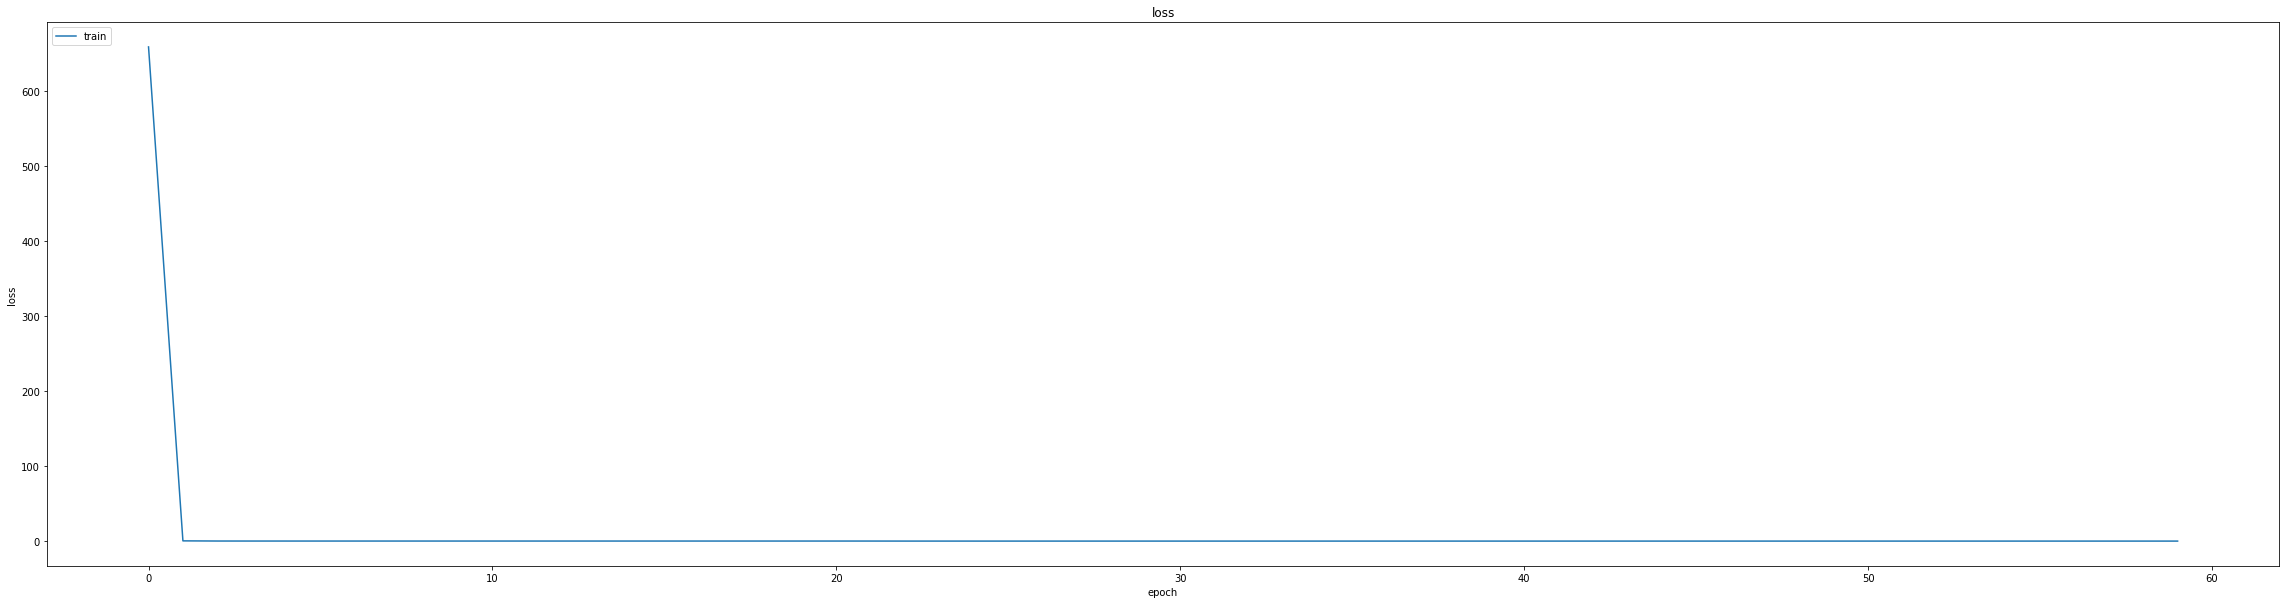

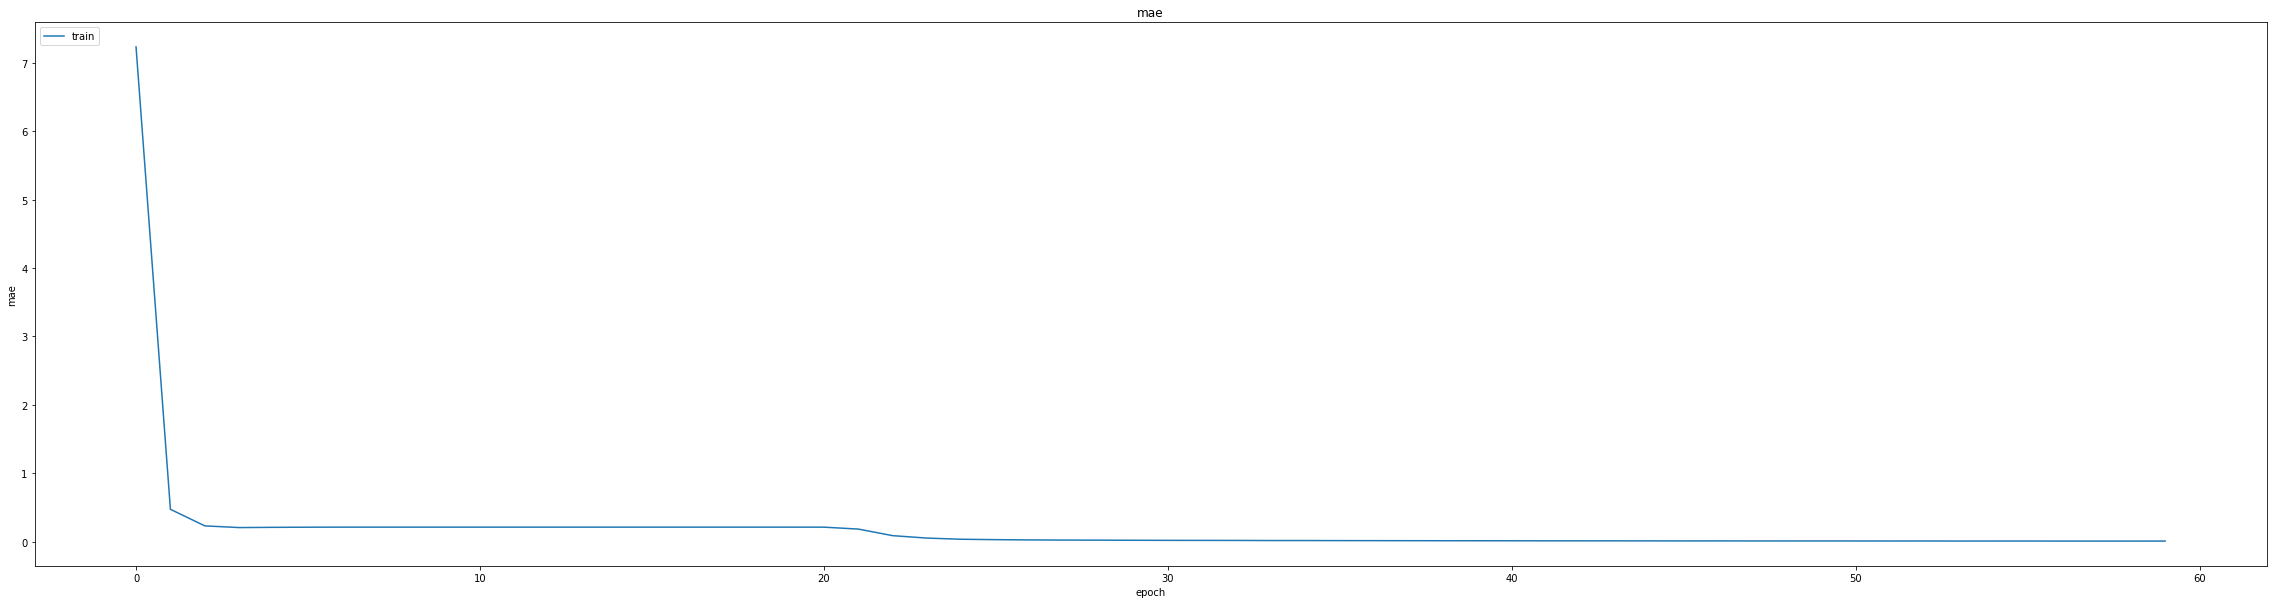

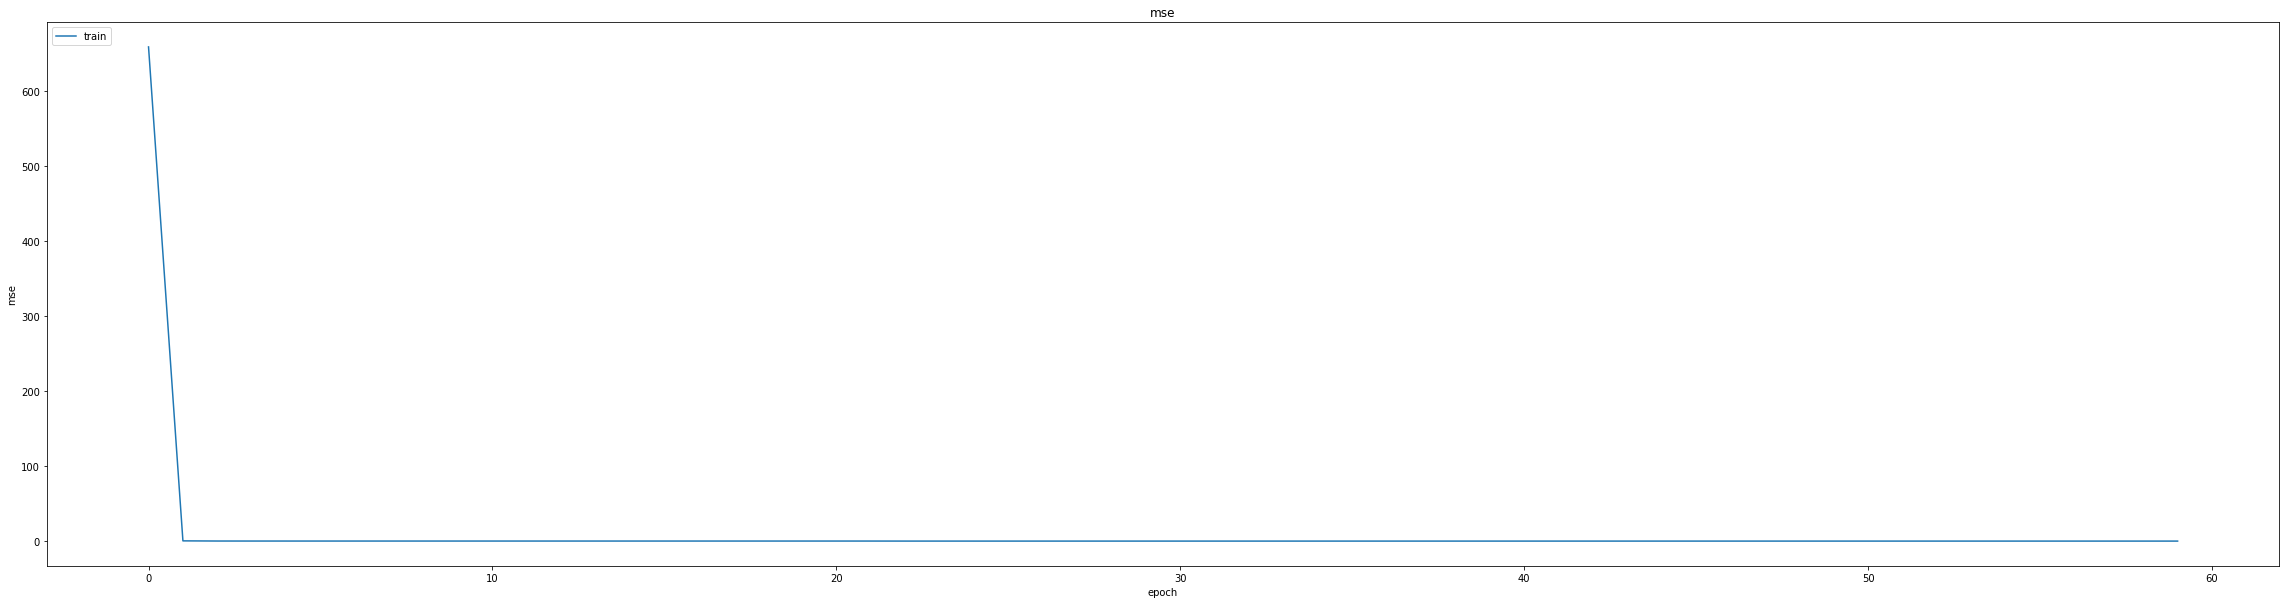

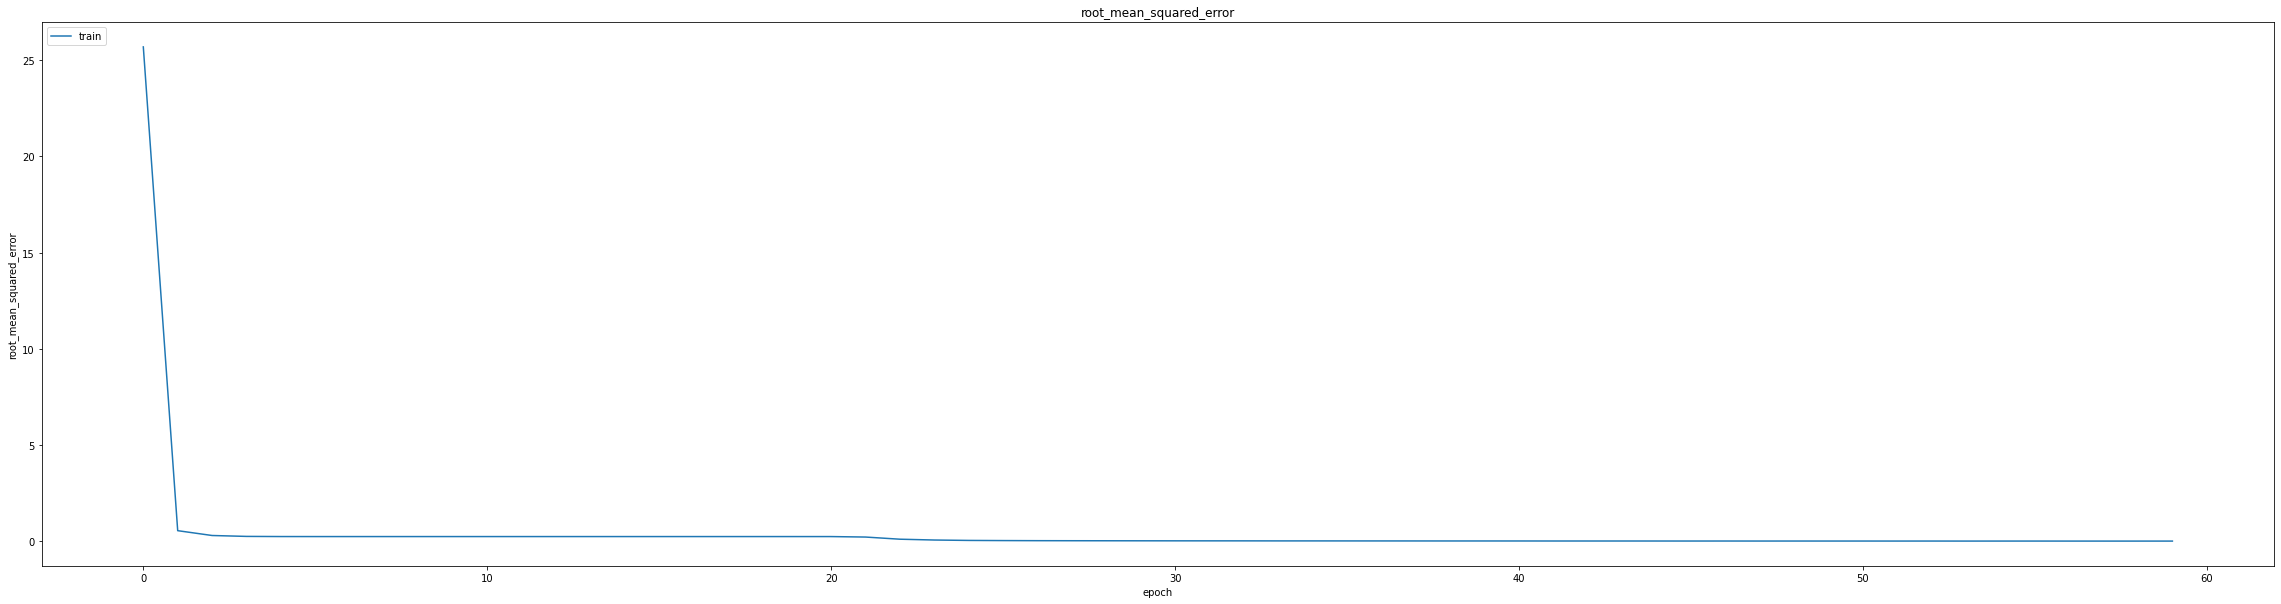

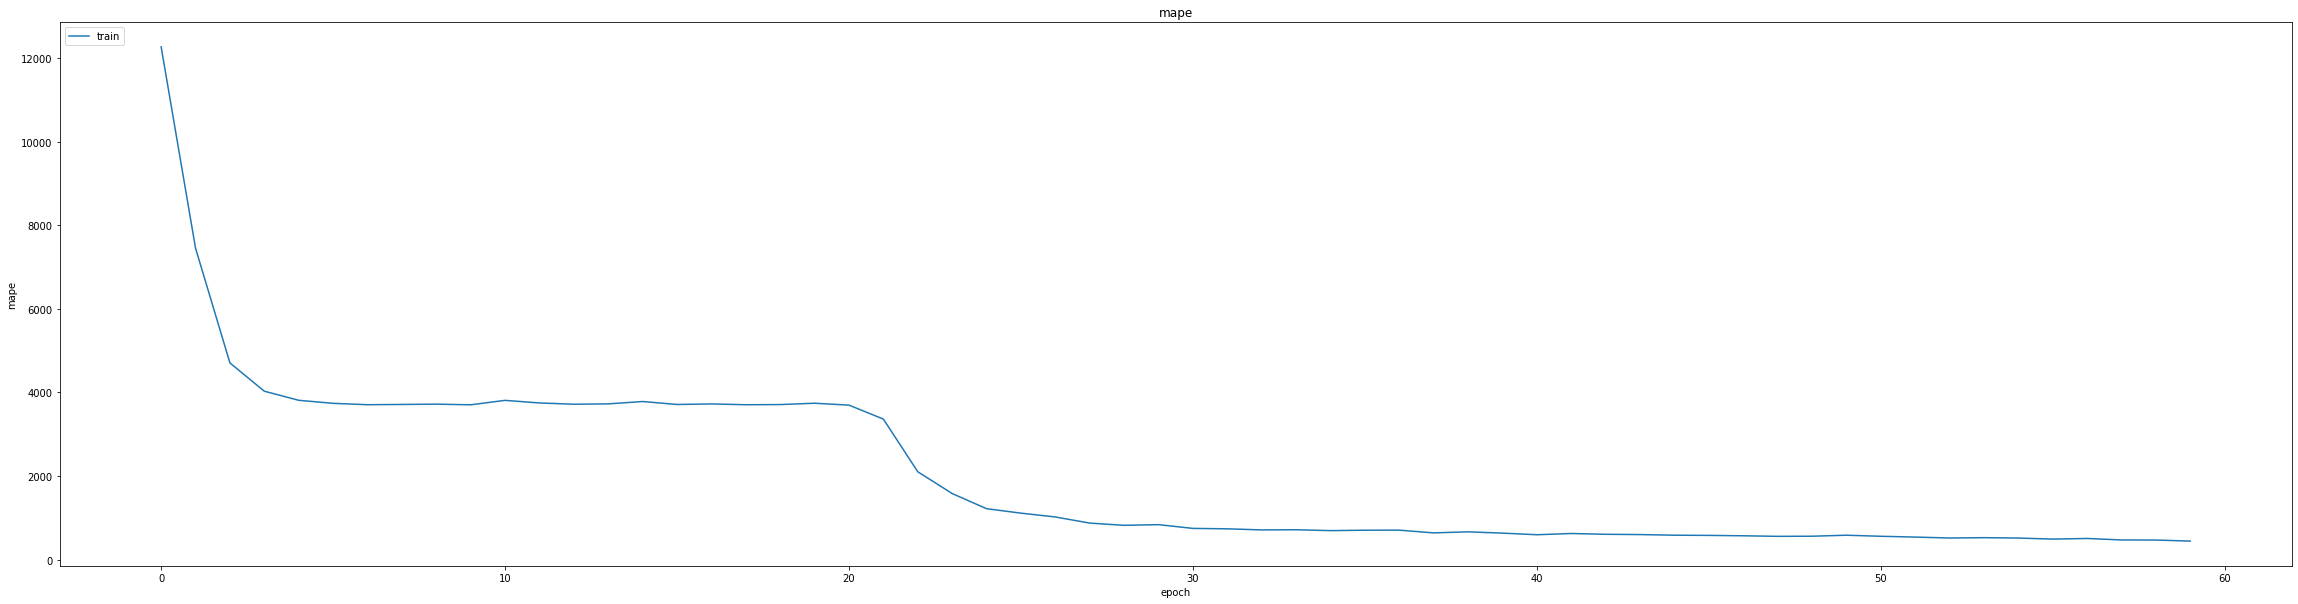

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.007039868272840977
0.01037802267819643
1044/1044 [==============================] - 5s 4ms/step
0.9943596783630202


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(70-30)
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

SyntaxError: ignored

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

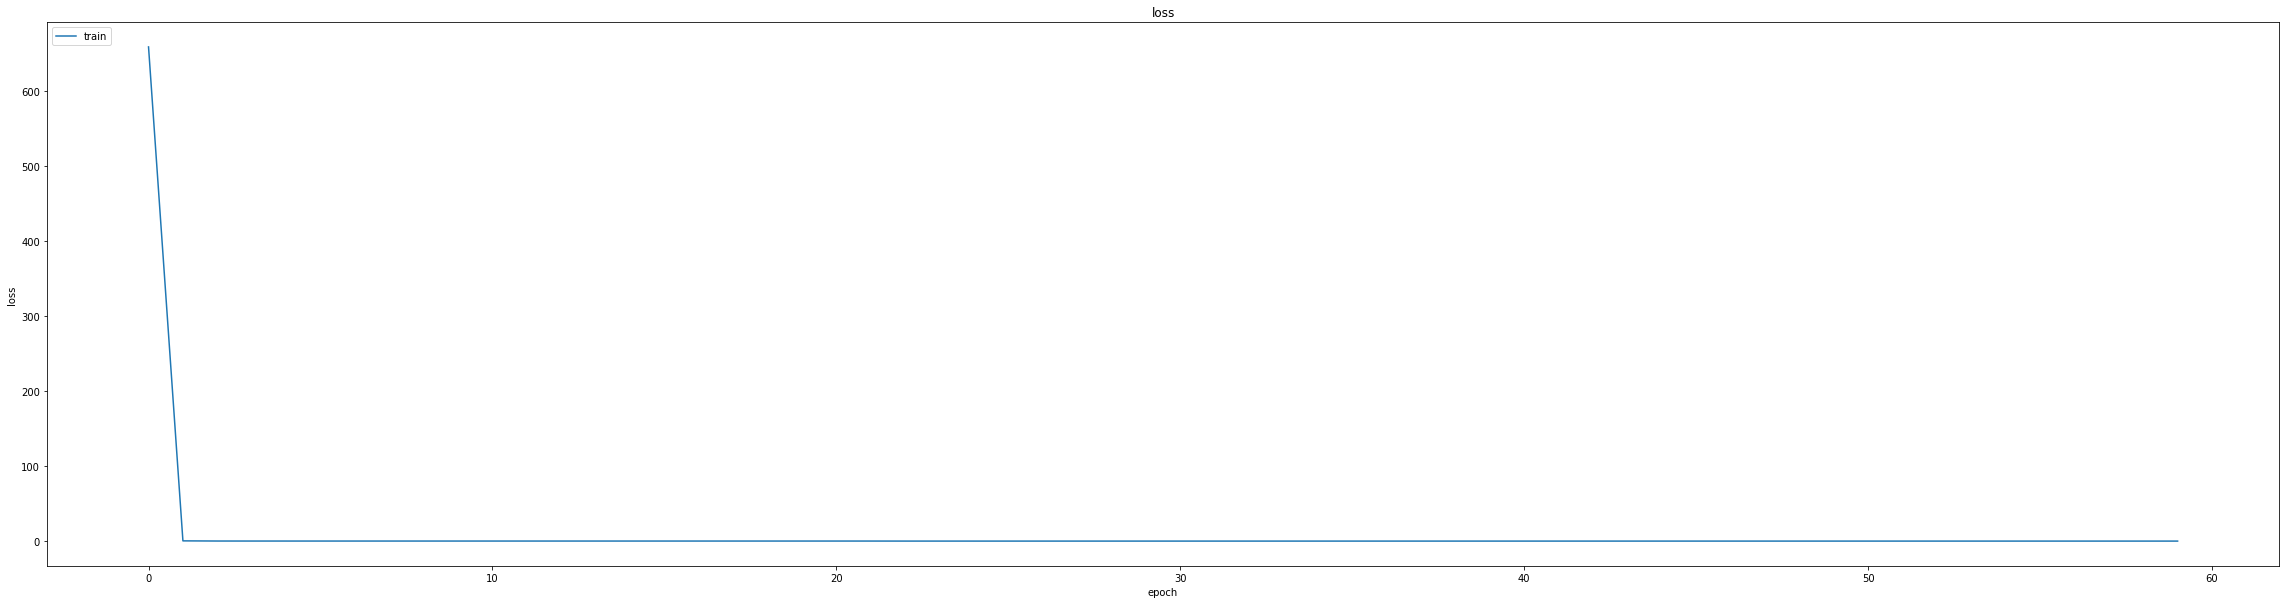

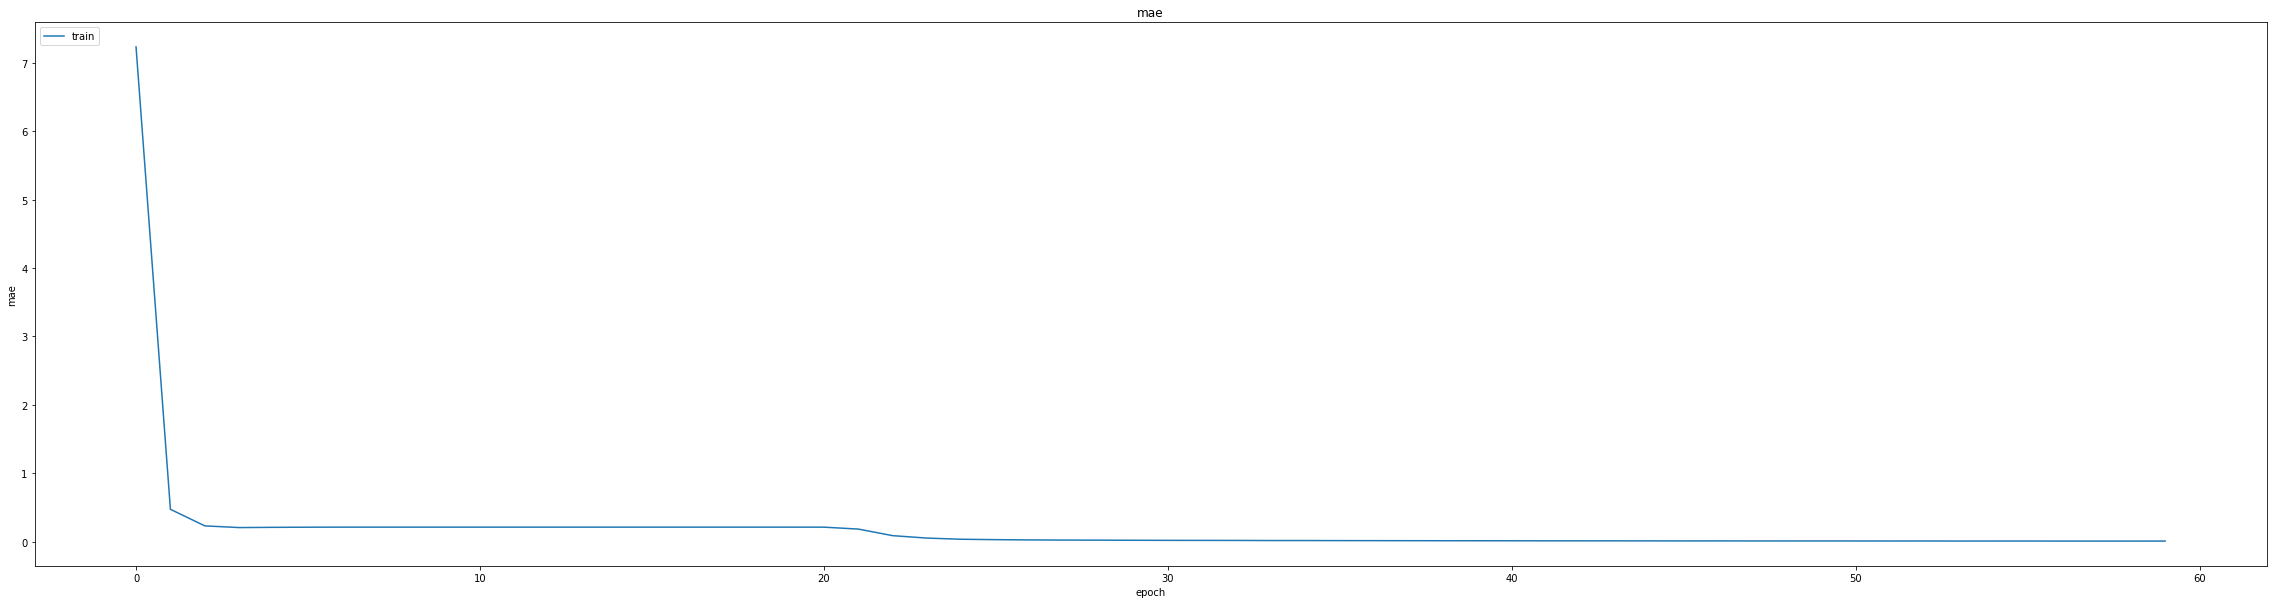

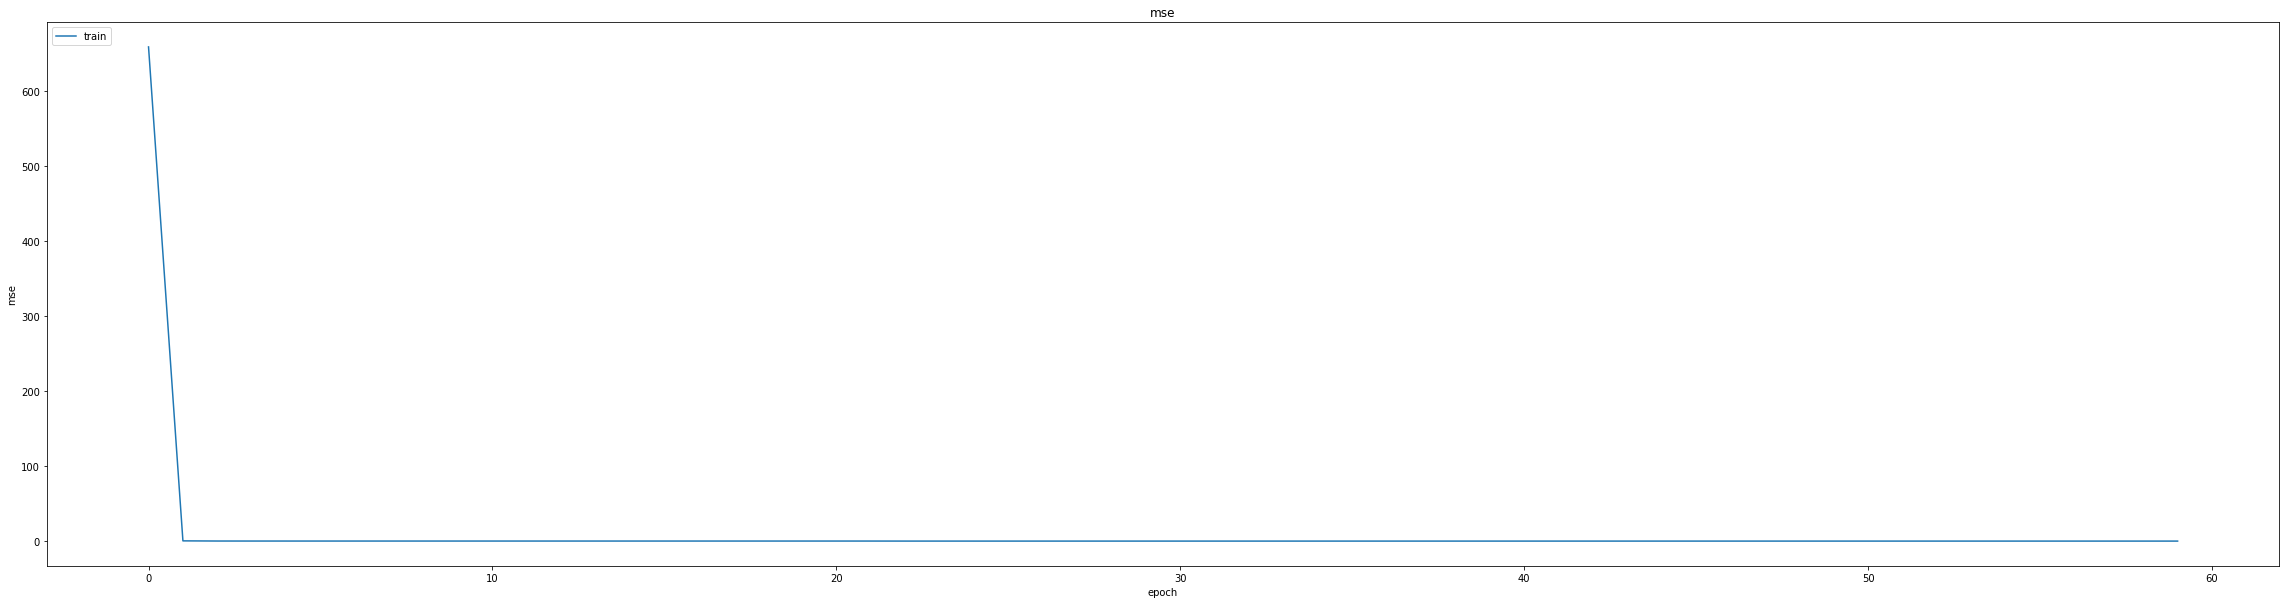

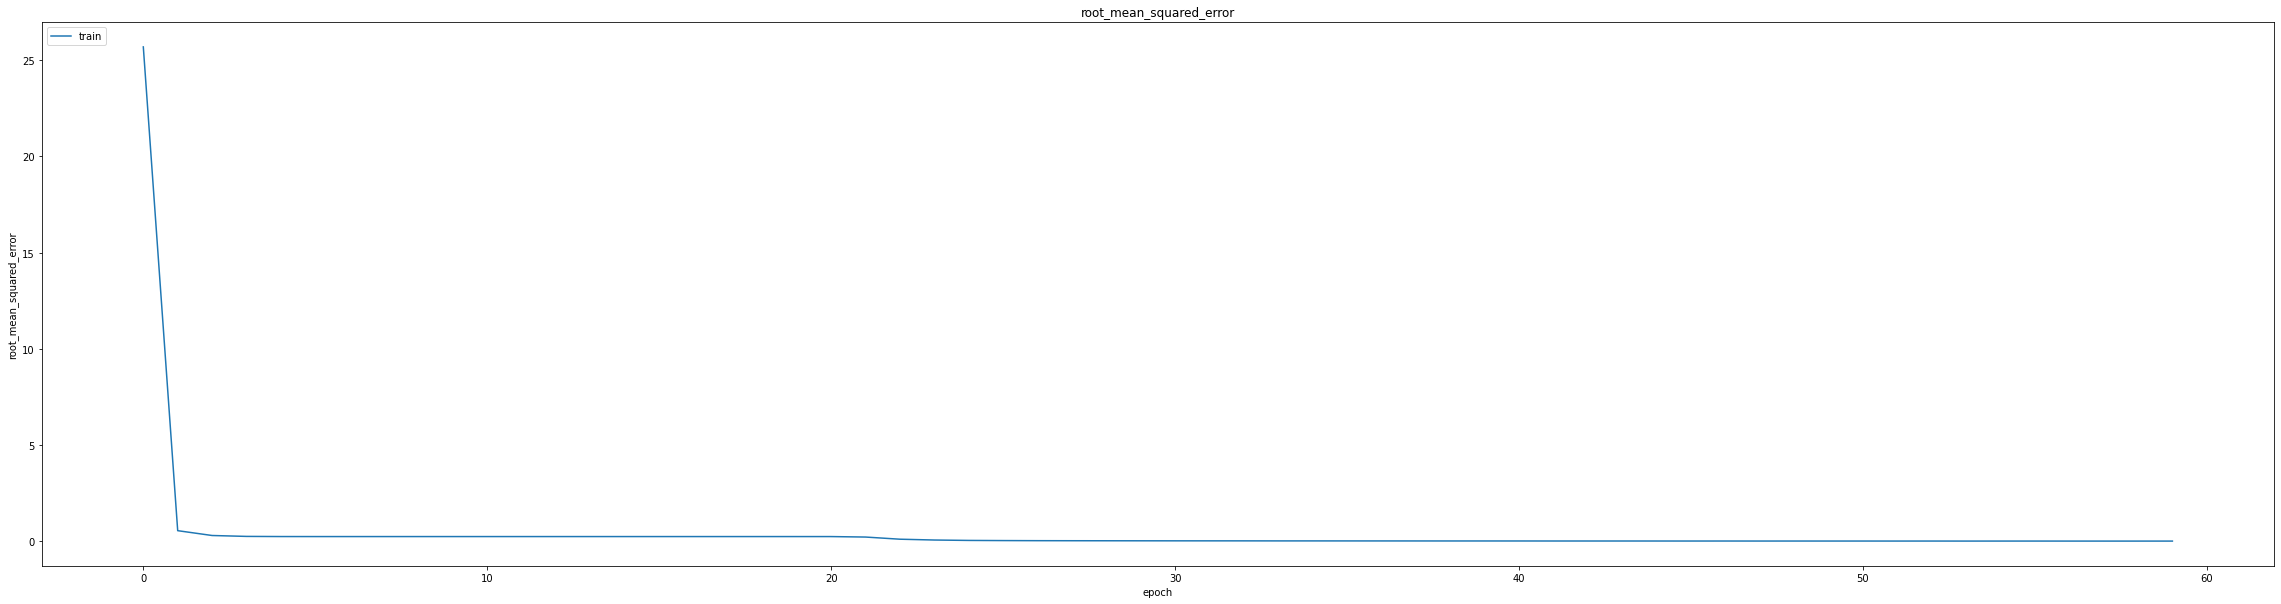

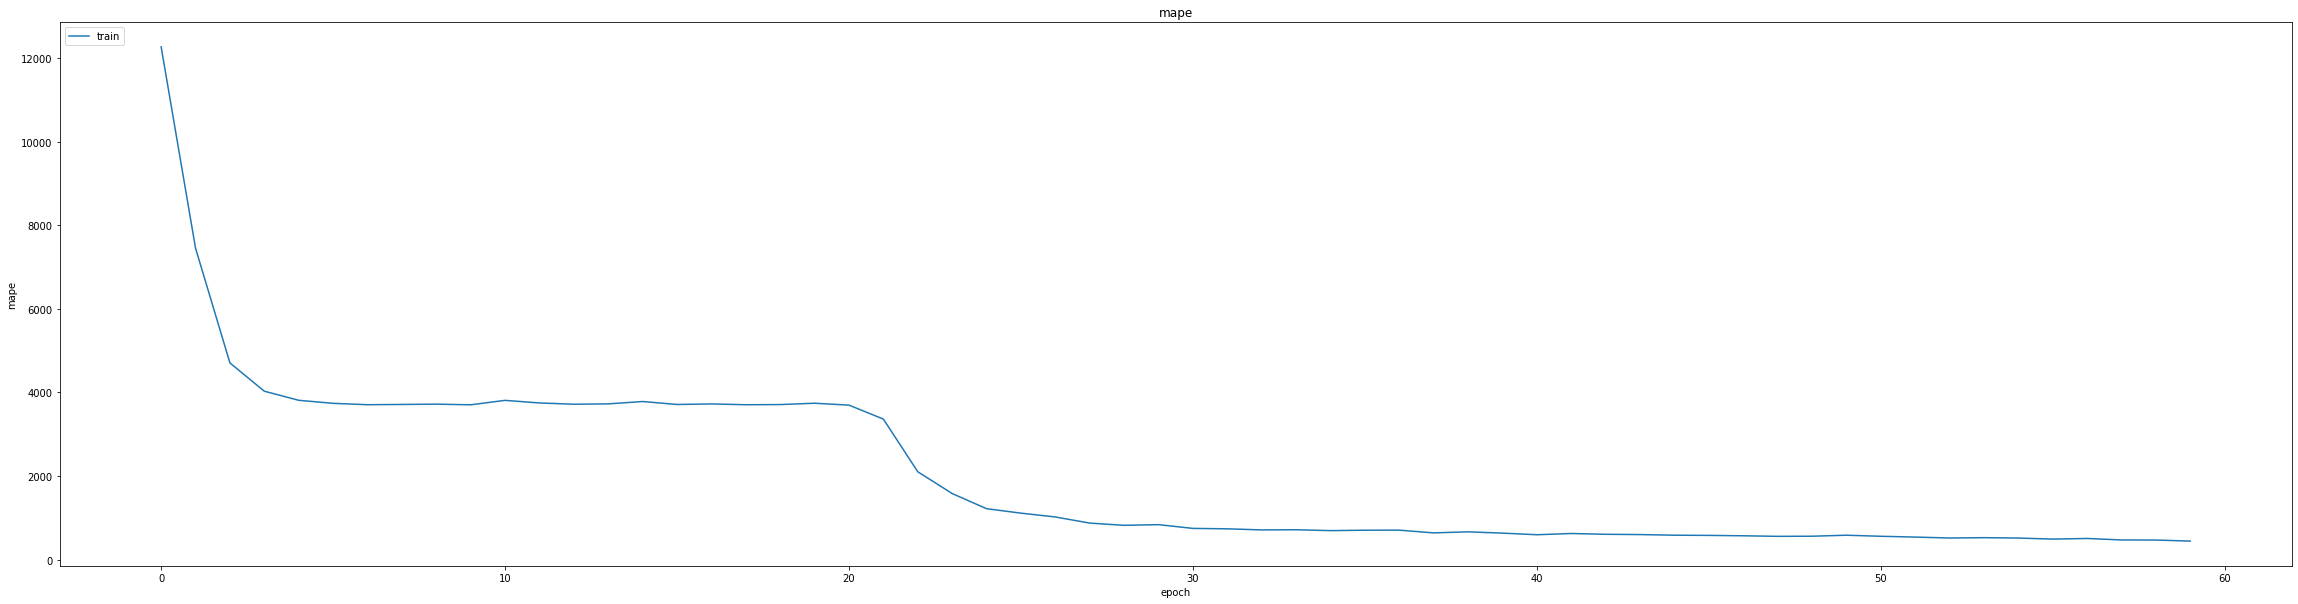

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.007039868272840977
0.01037802267819643
1044/1044 [==============================] - 4s 4ms/step
0.9943596783630202


1044/1044 [==============================] - 4s 4ms/step


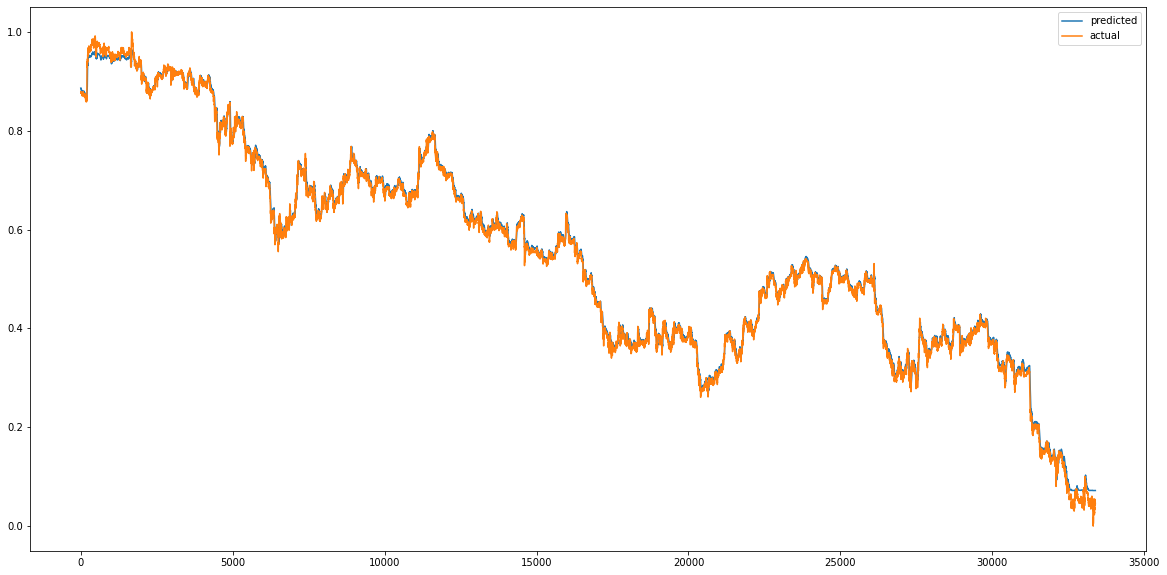

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


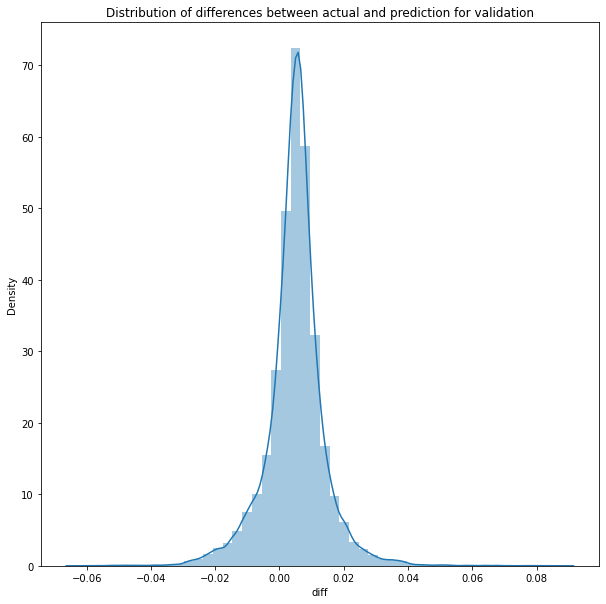

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1044/1044 [==============================] - 4s 4ms/step


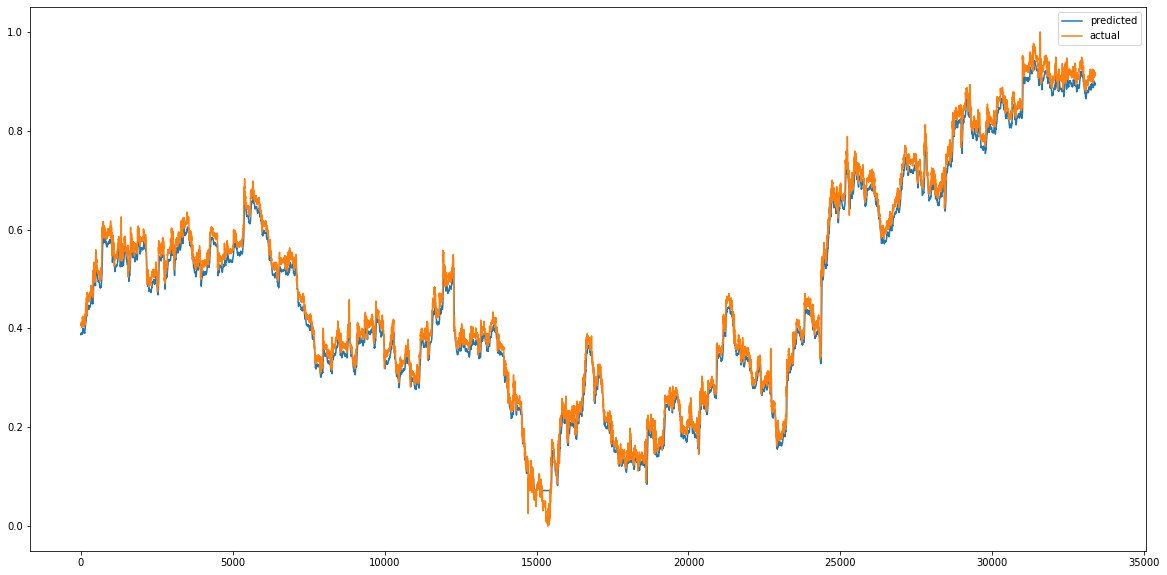

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


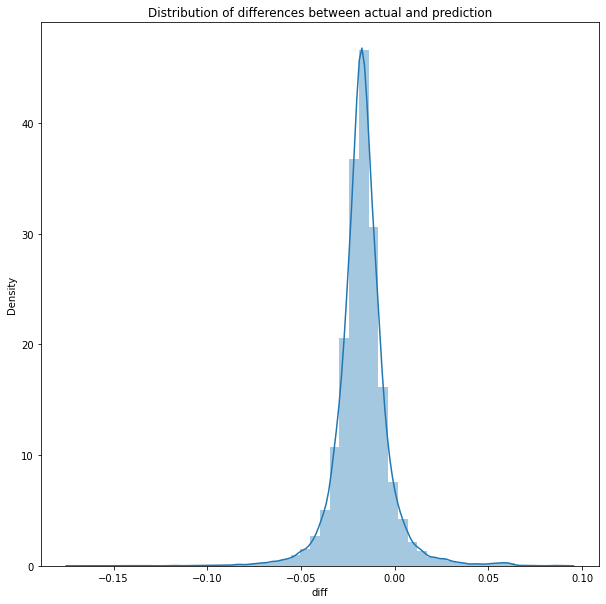

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0004958235480180631
RMSE :  0.022267095634996115
MAE :  0.019102827872532976
1044/1044 [==============================] - 4s 4ms/step
R2_Score  : 0.9905287988642397


count    33392.000000
mean        -0.017308
std          0.014009
min         -0.170062
25%         -0.023573
50%         -0.017506
75%         -0.011311
max          0.090102
Name: diff, dtype: float64

**CNN_BiLSTM_MODEL**

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional_2 (Bidirectio  (None, 24, 256)          197632    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 256)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 16)               

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
404/405 [============================>.] - ETA: 0s - loss: 377.0118 - mae: 3.1063 - mse: 377.0118 - root_mean_squared_error: 19.4168 - mape: 5310.4360
Epoch 1: val_mse improved from inf to 0.05637, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 41s 82ms/step - loss: 376.1004 - mae: 3.0993 - mse: 376.1004 - root_mean_squared_error: 19.3933 - mape: 5297.8433 - val_loss: 0.0564 - val_mae: 0.1973 - val_mse: 0.0564 - val_root_mean_squared_error: 0.2374 - val_mape: 18700.6230
Epoch 2/60
403/405 [============================>.] - ETA: 0s - loss: 0.0569 - mae: 0.2017 - mse: 0.0569 - root_mean_squared_error: 0.2386 - mape: 4417.1577
Epoch 2: val_mse improved from 0.05637 to 0.03463, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 0.0569 - mae: 0.2016 - mse: 0.0569 - root_mean_squared_error: 0.2385 - mape: 4395.8564 - val_loss: 0.0346 - val_mae: 0.1490 - val_mse: 0.0346 - val_root_mean_squared_error: 0.1861 - val_mape: 13611.6318
Epoch 3/60
405/405 [==============================] - ETA: 0s - loss: 0.0385 - mae: 0.1633 - mse: 0.0385 - root_mean_squared_error: 0.1963 - mape: 3348.0154
Epoch 3: val_mse improved from 0.03463 to 0.01486, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 0.0385 - mae: 0.1633 - mse: 0.0385 - root_mean_squared_error: 0.1963 - mape: 3348.0154 - val_loss: 0.0149 - val_mae: 0.0967 - val_mse: 0.0149 - val_root_mean_squared_error: 0.1219 - val_mape: 11780.6016
Epoch 4/60
405/405 [==============================] - ETA: 0s - loss: 0.0133 - mae: 0.0832 - mse: 0.0133 - root_mean_squared_error: 0.1153 - mape: 2488.4688
Epoch 4: val_mse improved from 0.01486 to 0.00453, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 31s 77ms/step - loss: 0.0133 - mae: 0.0832 - mse: 0.0133 - root_mean_squared_error: 0.1153 - mape: 2488.4688 - val_loss: 0.0045 - val_mae: 0.0395 - val_mse: 0.0045 - val_root_mean_squared_error: 0.0673 - val_mape: 9984.6445
Epoch 5/60
405/405 [==============================] - ETA: 0s - loss: 0.0053 - mae: 0.0488 - mse: 0.0053 - root_mean_squared_error: 0.0725 - mape: 2179.1882
Epoch 5: val_mse improved from 0.00453 to 0.00264, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 73ms/step - loss: 0.0053 - mae: 0.0488 - mse: 0.0053 - root_mean_squared_error: 0.0725 - mape: 2179.1882 - val_loss: 0.0026 - val_mae: 0.0247 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0514 - val_mape: 8436.8594
Epoch 6/60
404/405 [============================>.] - ETA: 0s - loss: 0.0033 - mae: 0.0396 - mse: 0.0033 - root_mean_squared_error: 0.0573 - mape: 1809.7821
Epoch 6: val_mse improved from 0.00264 to 0.00197, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 0.0033 - mae: 0.0396 - mse: 0.0033 - root_mean_squared_error: 0.0573 - mape: 1805.4526 - val_loss: 0.0020 - val_mae: 0.0214 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0444 - val_mape: 7723.8643
Epoch 7/60
404/405 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0343 - mse: 0.0023 - root_mean_squared_error: 0.0482 - mape: 1385.0728
Epoch 7: val_mse improved from 0.00197 to 0.00145, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 73ms/step - loss: 0.0023 - mae: 0.0343 - mse: 0.0023 - root_mean_squared_error: 0.0482 - mape: 1381.7562 - val_loss: 0.0014 - val_mae: 0.0162 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0380 - val_mape: 7054.2222
Epoch 8/60
404/405 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0305 - mse: 0.0018 - root_mean_squared_error: 0.0421 - mape: 1314.1968
Epoch 8: val_mse improved from 0.00145 to 0.00120, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 73ms/step - loss: 0.0018 - mae: 0.0305 - mse: 0.0018 - root_mean_squared_error: 0.0421 - mape: 1311.0485 - val_loss: 0.0012 - val_mae: 0.0160 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0346 - val_mape: 6558.3755
Epoch 9/60
403/405 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0276 - mse: 0.0014 - root_mean_squared_error: 0.0373 - mape: 1181.2825
Epoch 9: val_mse improved from 0.00120 to 0.00089, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 0.0014 - mae: 0.0276 - mse: 0.0014 - root_mean_squared_error: 0.0373 - mape: 1175.5530 - val_loss: 8.9454e-04 - val_mae: 0.0141 - val_mse: 8.9454e-04 - val_root_mean_squared_error: 0.0299 - val_mape: 5833.1934
Epoch 10/60
404/405 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0253 - mse: 0.0011 - root_mean_squared_error: 0.0339 - mape: 1052.8593
Epoch 10: val_mse improved from 0.00089 to 0.00071, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 73ms/step - loss: 0.0011 - mae: 0.0253 - mse: 0.0011 - root_mean_squared_error: 0.0339 - mape: 1050.3320 - val_loss: 7.0624e-04 - val_mae: 0.0132 - val_mse: 7.0624e-04 - val_root_mean_squared_error: 0.0266 - val_mape: 5358.6665
Epoch 11/60
405/405 [==============================] - ETA: 0s - loss: 9.8386e-04 - mae: 0.0237 - mse: 9.8386e-04 - root_mean_squared_error: 0.0314 - mape: 1058.3722
Epoch 11: val_mse improved from 0.00071 to 0.00051, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 73ms/step - loss: 9.8386e-04 - mae: 0.0237 - mse: 9.8386e-04 - root_mean_squared_error: 0.0314 - mape: 1058.3722 - val_loss: 5.1279e-04 - val_mae: 0.0113 - val_mse: 5.1279e-04 - val_root_mean_squared_error: 0.0226 - val_mape: 4833.5127
Epoch 12/60
404/405 [============================>.] - ETA: 0s - loss: 8.3540e-04 - mae: 0.0220 - mse: 8.3540e-04 - root_mean_squared_error: 0.0289 - mape: 958.6370
Epoch 12: val_mse improved from 0.00051 to 0.00044, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 8.3509e-04 - mae: 0.0220 - mse: 8.3509e-04 - root_mean_squared_error: 0.0289 - mape: 956.3368 - val_loss: 4.3932e-04 - val_mae: 0.0109 - val_mse: 4.3932e-04 - val_root_mean_squared_error: 0.0210 - val_mape: 4564.2578
Epoch 13/60
403/405 [============================>.] - ETA: 0s - loss: 7.2818e-04 - mae: 0.0206 - mse: 7.2818e-04 - root_mean_squared_error: 0.0270 - mape: 886.0361
Epoch 13: val_mse improved from 0.00044 to 0.00039, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 73ms/step - loss: 7.2756e-04 - mae: 0.0206 - mse: 7.2756e-04 - root_mean_squared_error: 0.0270 - mape: 881.7336 - val_loss: 3.9419e-04 - val_mae: 0.0111 - val_mse: 3.9419e-04 - val_root_mean_squared_error: 0.0199 - val_mape: 4387.4521
Epoch 14/60
404/405 [============================>.] - ETA: 0s - loss: 6.4547e-04 - mae: 0.0195 - mse: 6.4547e-04 - root_mean_squared_error: 0.0254 - mape: 841.1508
Epoch 14: val_mse improved from 0.00039 to 0.00033, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 73ms/step - loss: 6.4561e-04 - mae: 0.0195 - mse: 6.4561e-04 - root_mean_squared_error: 0.0254 - mape: 839.1440 - val_loss: 3.2502e-04 - val_mae: 0.0096 - val_mse: 3.2502e-04 - val_root_mean_squared_error: 0.0180 - val_mape: 4158.5244
Epoch 15/60
405/405 [==============================] - ETA: 0s - loss: 5.8587e-04 - mae: 0.0186 - mse: 5.8587e-04 - root_mean_squared_error: 0.0242 - mape: 874.1371
Epoch 15: val_mse improved from 0.00033 to 0.00031, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 5.8587e-04 - mae: 0.0186 - mse: 5.8587e-04 - root_mean_squared_error: 0.0242 - mape: 874.1371 - val_loss: 3.1145e-04 - val_mae: 0.0104 - val_mse: 3.1145e-04 - val_root_mean_squared_error: 0.0176 - val_mape: 3989.8899
Epoch 16/60
403/405 [============================>.] - ETA: 0s - loss: 5.3291e-04 - mae: 0.0177 - mse: 5.3291e-04 - root_mean_squared_error: 0.0231 - mape: 753.0946
Epoch 16: val_mse improved from 0.00031 to 0.00027, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 73ms/step - loss: 5.3301e-04 - mae: 0.0177 - mse: 5.3301e-04 - root_mean_squared_error: 0.0231 - mape: 749.4360 - val_loss: 2.6590e-04 - val_mae: 0.0093 - val_mse: 2.6590e-04 - val_root_mean_squared_error: 0.0163 - val_mape: 3784.2847
Epoch 17/60
405/405 [==============================] - ETA: 0s - loss: 4.7792e-04 - mae: 0.0168 - mse: 4.7792e-04 - root_mean_squared_error: 0.0219 - mape: 787.9279
Epoch 17: val_mse improved from 0.00027 to 0.00023, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 75ms/step - loss: 4.7792e-04 - mae: 0.0168 - mse: 4.7792e-04 - root_mean_squared_error: 0.0219 - mape: 787.9279 - val_loss: 2.2552e-04 - val_mae: 0.0084 - val_mse: 2.2552e-04 - val_root_mean_squared_error: 0.0150 - val_mape: 3585.1843
Epoch 18/60
405/405 [==============================] - ETA: 0s - loss: 4.3193e-04 - mae: 0.0159 - mse: 4.3193e-04 - root_mean_squared_error: 0.0208 - mape: 716.8537
Epoch 18: val_mse improved from 0.00023 to 0.00022, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 4.3193e-04 - mae: 0.0159 - mse: 4.3193e-04 - root_mean_squared_error: 0.0208 - mape: 716.8537 - val_loss: 2.1611e-04 - val_mae: 0.0089 - val_mse: 2.1611e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 3478.2676
Epoch 19/60
404/405 [============================>.] - ETA: 0s - loss: 3.8554e-04 - mae: 0.0151 - mse: 3.8554e-04 - root_mean_squared_error: 0.0196 - mape: 712.9780
Epoch 19: val_mse improved from 0.00022 to 0.00020, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 73ms/step - loss: 3.8551e-04 - mae: 0.0151 - mse: 3.8551e-04 - root_mean_squared_error: 0.0196 - mape: 711.2640 - val_loss: 1.9546e-04 - val_mae: 0.0091 - val_mse: 1.9546e-04 - val_root_mean_squared_error: 0.0140 - val_mape: 3290.6858
Epoch 20/60
403/405 [============================>.] - ETA: 0s - loss: 3.4619e-04 - mae: 0.0143 - mse: 3.4619e-04 - root_mean_squared_error: 0.0186 - mape: 707.8715
Epoch 20: val_mse improved from 0.00020 to 0.00017, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 74ms/step - loss: 3.4611e-04 - mae: 0.0143 - mse: 3.4611e-04 - root_mean_squared_error: 0.0186 - mape: 704.4282 - val_loss: 1.7258e-04 - val_mae: 0.0085 - val_mse: 1.7258e-04 - val_root_mean_squared_error: 0.0131 - val_mape: 3163.8809
Epoch 21/60
404/405 [============================>.] - ETA: 0s - loss: 3.1140e-04 - mae: 0.0136 - mse: 3.1140e-04 - root_mean_squared_error: 0.0176 - mape: 627.2168
Epoch 21: val_mse improved from 0.00017 to 0.00014, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 3.1142e-04 - mae: 0.0136 - mse: 3.1142e-04 - root_mean_squared_error: 0.0176 - mape: 625.7100 - val_loss: 1.3922e-04 - val_mae: 0.0071 - val_mse: 1.3922e-04 - val_root_mean_squared_error: 0.0118 - val_mape: 3005.2866
Epoch 22/60
403/405 [============================>.] - ETA: 0s - loss: 2.7896e-04 - mae: 0.0128 - mse: 2.7896e-04 - root_mean_squared_error: 0.0167 - mape: 620.4414
Epoch 22: val_mse improved from 0.00014 to 0.00013, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 73ms/step - loss: 2.7892e-04 - mae: 0.0128 - mse: 2.7892e-04 - root_mean_squared_error: 0.0167 - mape: 617.4230 - val_loss: 1.3275e-04 - val_mae: 0.0072 - val_mse: 1.3275e-04 - val_root_mean_squared_error: 0.0115 - val_mape: 2907.8281
Epoch 23/60
405/405 [==============================] - ETA: 0s - loss: 2.4696e-04 - mae: 0.0121 - mse: 2.4696e-04 - root_mean_squared_error: 0.0157 - mape: 590.3635
Epoch 23: val_mse did not improve from 0.00013
405/405 [==============================] - 8s 19ms/step - loss: 2.4696e-04 - mae: 0.0121 - mse: 2.4696e-04 - root_mean_squared_error: 0.0157 - mape: 590.3635 - val_loss: 1.3505e-04 - val_mae: 0.0079 - val_mse: 1.3505e-04 - val_root_mean_squared_error: 0.0116 - val_mape: 2803.4097
Epoch 24/60
403/405 [============================>.] - ETA: 0s - loss: 2.1910e-04 - mae: 0.0114 - mse: 2.1910e-04 - root_mean_squared_error: 0.0148 - mape: 558.3975
Epoch 24: val_mse did not improve from 0.00013
405/405 [====

405/405 [==============================] - 30s 74ms/step - loss: 1.9440e-04 - mae: 0.0107 - mse: 1.9440e-04 - root_mean_squared_error: 0.0139 - mape: 537.5244 - val_loss: 1.2328e-04 - val_mae: 0.0081 - val_mse: 1.2328e-04 - val_root_mean_squared_error: 0.0111 - val_mape: 2609.0737
Epoch 26/60
404/405 [============================>.] - ETA: 0s - loss: 1.7261e-04 - mae: 0.0101 - mse: 1.7261e-04 - root_mean_squared_error: 0.0131 - mape: 540.0612
Epoch 26: val_mse did not improve from 0.00012
405/405 [==============================] - 8s 19ms/step - loss: 1.7255e-04 - mae: 0.0101 - mse: 1.7255e-04 - root_mean_squared_error: 0.0131 - mape: 538.7605 - val_loss: 1.3684e-04 - val_mae: 0.0091 - val_mse: 1.3684e-04 - val_root_mean_squared_error: 0.0117 - val_mape: 2549.6533
Epoch 27/60
405/405 [==============================] - ETA: 0s - loss: 1.5611e-04 - mae: 0.0096 - mse: 1.5611e-04 - root_mean_squared_error: 0.0125 - mape: 523.5466
Epoch 27: val_mse improved from 0.00012 to 0.00012, saving m

405/405 [==============================] - 29s 72ms/step - loss: 1.5611e-04 - mae: 0.0096 - mse: 1.5611e-04 - root_mean_squared_error: 0.0125 - mape: 523.5466 - val_loss: 1.2004e-04 - val_mae: 0.0083 - val_mse: 1.2004e-04 - val_root_mean_squared_error: 0.0110 - val_mape: 2471.4138
Epoch 28/60
403/405 [============================>.] - ETA: 0s - loss: 1.3696e-04 - mae: 0.0090 - mse: 1.3696e-04 - root_mean_squared_error: 0.0117 - mape: 488.5258
Epoch 28: val_mse improved from 0.00012 to 0.00010, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 73ms/step - loss: 1.3690e-04 - mae: 0.0090 - mse: 1.3690e-04 - root_mean_squared_error: 0.0117 - mape: 486.1483 - val_loss: 9.9359e-05 - val_mae: 0.0073 - val_mse: 9.9359e-05 - val_root_mean_squared_error: 0.0100 - val_mape: 2387.2332
Epoch 29/60
403/405 [============================>.] - ETA: 0s - loss: 1.2289e-04 - mae: 0.0086 - mse: 1.2289e-04 - root_mean_squared_error: 0.0111 - mape: 491.8873
Epoch 29: val_mse did not improve from 0.00010
405/405 [==============================] - 8s 19ms/step - loss: 1.2279e-04 - mae: 0.0086 - mse: 1.2279e-04 - root_mean_squared_error: 0.0111 - mape: 489.4937 - val_loss: 1.0777e-04 - val_mae: 0.0081 - val_mse: 1.0777e-04 - val_root_mean_squared_error: 0.0104 - val_mape: 2327.2710
Epoch 30/60
404/405 [============================>.] - ETA: 0s - loss: 1.0993e-04 - mae: 0.0081 - mse: 1.0993e-04 - root_mean_squared_error: 0.0105 - mape: 425.0305
Epoch 30: val_mse improved from 0.00010 to 0.00010, saving m

405/405 [==============================] - 30s 74ms/step - loss: 1.0996e-04 - mae: 0.0081 - mse: 1.0996e-04 - root_mean_squared_error: 0.0105 - mape: 424.0094 - val_loss: 9.5379e-05 - val_mae: 0.0076 - val_mse: 9.5379e-05 - val_root_mean_squared_error: 0.0098 - val_mape: 2251.5371
Epoch 31/60
405/405 [==============================] - ETA: 0s - loss: 1.0168e-04 - mae: 0.0078 - mse: 1.0168e-04 - root_mean_squared_error: 0.0101 - mape: 443.4557
Epoch 31: val_mse improved from 0.00010 to 0.00008, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 73ms/step - loss: 1.0168e-04 - mae: 0.0078 - mse: 1.0168e-04 - root_mean_squared_error: 0.0101 - mape: 443.4557 - val_loss: 7.5510e-05 - val_mae: 0.0062 - val_mse: 7.5510e-05 - val_root_mean_squared_error: 0.0087 - val_mape: 2176.5662
Epoch 32/60
402/405 [============================>.] - ETA: 0s - loss: 9.0464e-05 - mae: 0.0073 - mse: 9.0464e-05 - root_mean_squared_error: 0.0095 - mape: 433.4081
Epoch 32: val_mse did not improve from 0.00008
405/405 [==============================] - 8s 19ms/step - loss: 9.0453e-05 - mae: 0.0073 - mse: 9.0453e-05 - root_mean_squared_error: 0.0095 - mape: 430.2346 - val_loss: 8.2475e-05 - val_mae: 0.0066 - val_mse: 8.2475e-05 - val_root_mean_squared_error: 0.0091 - val_mape: 2154.4167
Epoch 33/60
402/405 [============================>.] - ETA: 0s - loss: 8.3368e-05 - mae: 0.0071 - mse: 8.3368e-05 - root_mean_squared_error: 0.0091 - mape: 406.2945
Epoch 33: val_mse did not improve from 0.00008
405/405 [====

405/405 [==============================] - 29s 72ms/step - loss: 7.7206e-05 - mae: 0.0068 - mse: 7.7206e-05 - root_mean_squared_error: 0.0088 - mape: 381.0005 - val_loss: 7.4441e-05 - val_mae: 0.0066 - val_mse: 7.4441e-05 - val_root_mean_squared_error: 0.0086 - val_mape: 2050.7085
Epoch 35/60
404/405 [============================>.] - ETA: 0s - loss: 7.0286e-05 - mae: 0.0065 - mse: 7.0286e-05 - root_mean_squared_error: 0.0084 - mape: 409.0562
Epoch 35: val_mse did not improve from 0.00007
405/405 [==============================] - 8s 19ms/step - loss: 7.0264e-05 - mae: 0.0065 - mse: 7.0264e-05 - root_mean_squared_error: 0.0084 - mape: 408.0708 - val_loss: 8.1939e-05 - val_mae: 0.0072 - val_mse: 8.1939e-05 - val_root_mean_squared_error: 0.0091 - val_mape: 2013.1180
Epoch 36/60
404/405 [============================>.] - ETA: 0s - loss: 6.5935e-05 - mae: 0.0063 - mse: 6.5935e-05 - root_mean_squared_error: 0.0081 - mape: 344.0091
Epoch 36: val_mse improved from 0.00007 to 0.00006, saving m

405/405 [==============================] - 29s 72ms/step - loss: 6.5944e-05 - mae: 0.0063 - mse: 6.5944e-05 - root_mean_squared_error: 0.0081 - mape: 343.1861 - val_loss: 6.0625e-05 - val_mae: 0.0055 - val_mse: 6.0625e-05 - val_root_mean_squared_error: 0.0078 - val_mape: 1967.0470
Epoch 37/60
403/405 [============================>.] - ETA: 0s - loss: 6.1426e-05 - mae: 0.0061 - mse: 6.1426e-05 - root_mean_squared_error: 0.0078 - mape: 351.3810
Epoch 37: val_mse did not improve from 0.00006
405/405 [==============================] - 8s 19ms/step - loss: 6.1394e-05 - mae: 0.0061 - mse: 6.1394e-05 - root_mean_squared_error: 0.0078 - mape: 349.6714 - val_loss: 1.2176e-04 - val_mae: 0.0096 - val_mse: 1.2176e-04 - val_root_mean_squared_error: 0.0110 - val_mape: 1937.8651
Epoch 38/60
405/405 [==============================] - ETA: 0s - loss: 5.7050e-05 - mae: 0.0058 - mse: 5.7050e-05 - root_mean_squared_error: 0.0076 - mape: 342.2009
Epoch 38: val_mse did not improve from 0.00006
405/405 [====

405/405 [==============================] - 30s 74ms/step - loss: 5.0114e-05 - mae: 0.0055 - mse: 5.0114e-05 - root_mean_squared_error: 0.0071 - mape: 336.2781 - val_loss: 5.8282e-05 - val_mae: 0.0054 - val_mse: 5.8282e-05 - val_root_mean_squared_error: 0.0076 - val_mape: 1761.5120
Epoch 41/60
403/405 [============================>.] - ETA: 0s - loss: 5.0268e-05 - mae: 0.0055 - mse: 5.0268e-05 - root_mean_squared_error: 0.0071 - mape: 314.6966
Epoch 41: val_mse did not improve from 0.00006
405/405 [==============================] - 8s 19ms/step - loss: 5.0217e-05 - mae: 0.0055 - mse: 5.0217e-05 - root_mean_squared_error: 0.0071 - mape: 313.1668 - val_loss: 6.6880e-05 - val_mae: 0.0067 - val_mse: 6.6880e-05 - val_root_mean_squared_error: 0.0082 - val_mape: 1746.2539
Epoch 42/60
404/405 [============================>.] - ETA: 0s - loss: 5.0074e-05 - mae: 0.0055 - mse: 5.0074e-05 - root_mean_squared_error: 0.0071 - mape: 285.8883
Epoch 42: val_mse did not improve from 0.00006
405/405 [====

405/405 [==============================] - 29s 72ms/step - loss: 4.8096e-05 - mae: 0.0054 - mse: 4.8096e-05 - root_mean_squared_error: 0.0069 - mape: 279.8508 - val_loss: 5.1820e-05 - val_mae: 0.0054 - val_mse: 5.1820e-05 - val_root_mean_squared_error: 0.0072 - val_mape: 1758.1161
Epoch 46/60
403/405 [============================>.] - ETA: 0s - loss: 5.6236e-05 - mae: 0.0058 - mse: 5.6236e-05 - root_mean_squared_error: 0.0075 - mape: 285.1688
Epoch 46: val_mse did not improve from 0.00005
405/405 [==============================] - 8s 19ms/step - loss: 5.6134e-05 - mae: 0.0058 - mse: 5.6134e-05 - root_mean_squared_error: 0.0075 - mape: 283.7811 - val_loss: 1.2198e-04 - val_mae: 0.0100 - val_mse: 1.2198e-04 - val_root_mean_squared_error: 0.0110 - val_mape: 1759.7518
Epoch 47/60
404/405 [============================>.] - ETA: 0s - loss: 5.5370e-05 - mae: 0.0056 - mse: 5.5370e-05 - root_mean_squared_error: 0.0074 - mape: 295.2969
Epoch 47: val_mse did not improve from 0.00005
405/405 [====

405/405 [==============================] - 29s 72ms/step - loss: 7.3780e-05 - mae: 0.0066 - mse: 7.3780e-05 - root_mean_squared_error: 0.0086 - mape: 260.3596 - val_loss: 3.6449e-05 - val_mae: 0.0041 - val_mse: 3.6449e-05 - val_root_mean_squared_error: 0.0060 - val_mape: 1580.1345
Epoch 53/60
403/405 [============================>.] - ETA: 0s - loss: 5.9830e-05 - mae: 0.0057 - mse: 5.9830e-05 - root_mean_squared_error: 0.0077 - mape: 259.4557
Epoch 53: val_mse did not improve from 0.00004
405/405 [==============================] - 8s 19ms/step - loss: 5.9764e-05 - mae: 0.0057 - mse: 5.9764e-05 - root_mean_squared_error: 0.0077 - mape: 258.1994 - val_loss: 7.2489e-05 - val_mae: 0.0073 - val_mse: 7.2489e-05 - val_root_mean_squared_error: 0.0085 - val_mape: 1510.5981
Epoch 54/60
405/405 [==============================] - ETA: 0s - loss: 6.0364e-05 - mae: 0.0060 - mse: 6.0364e-05 - root_mean_squared_error: 0.0078 - mape: 260.1271
Epoch 54: val_mse did not improve from 0.00004
405/405 [====

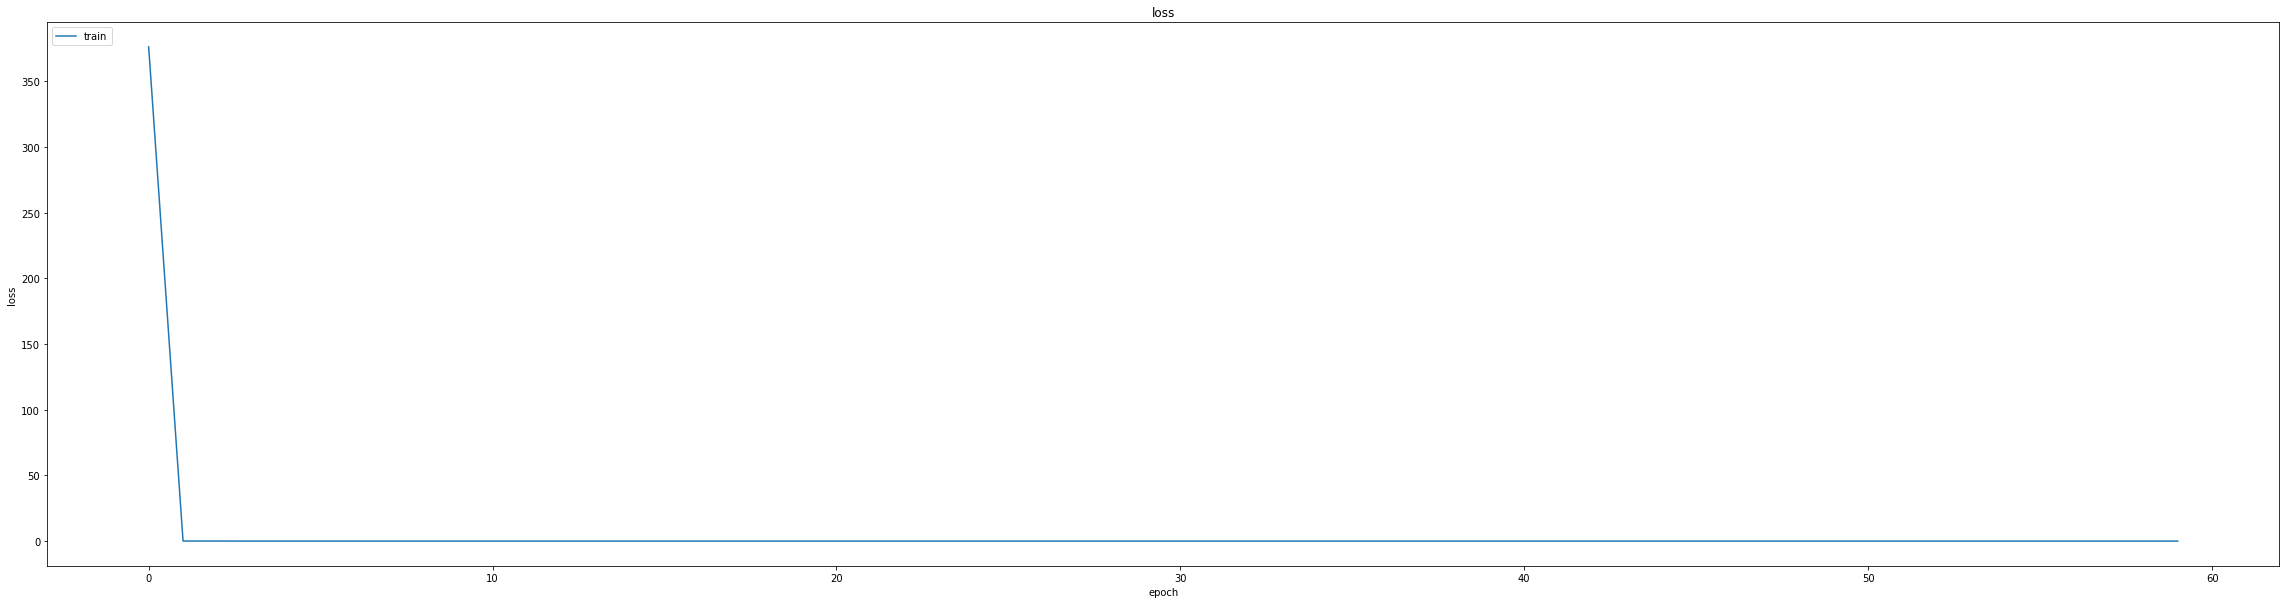

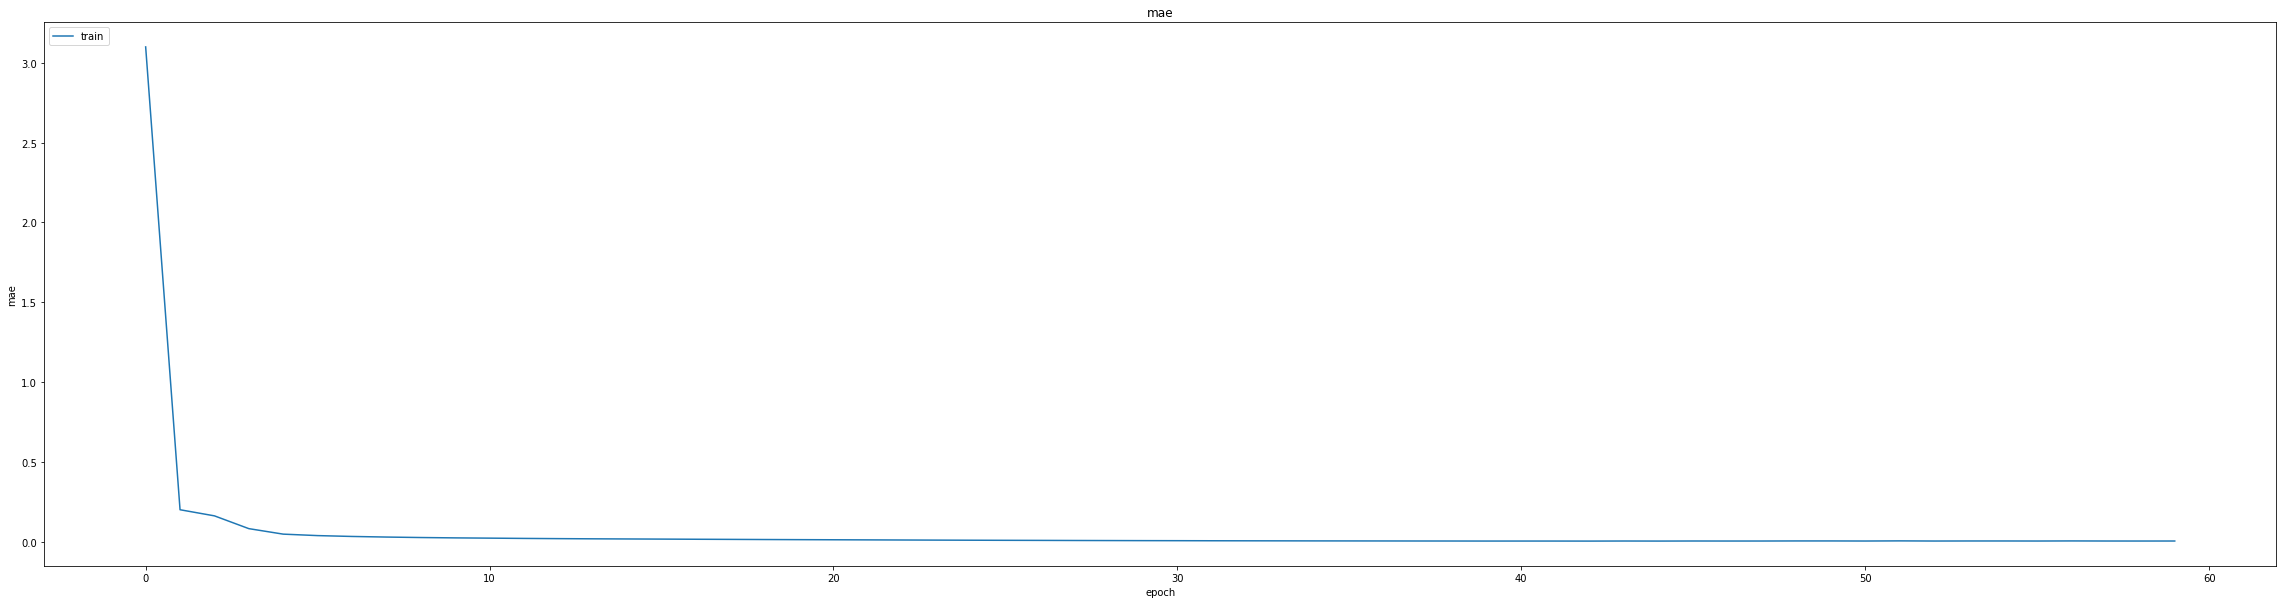

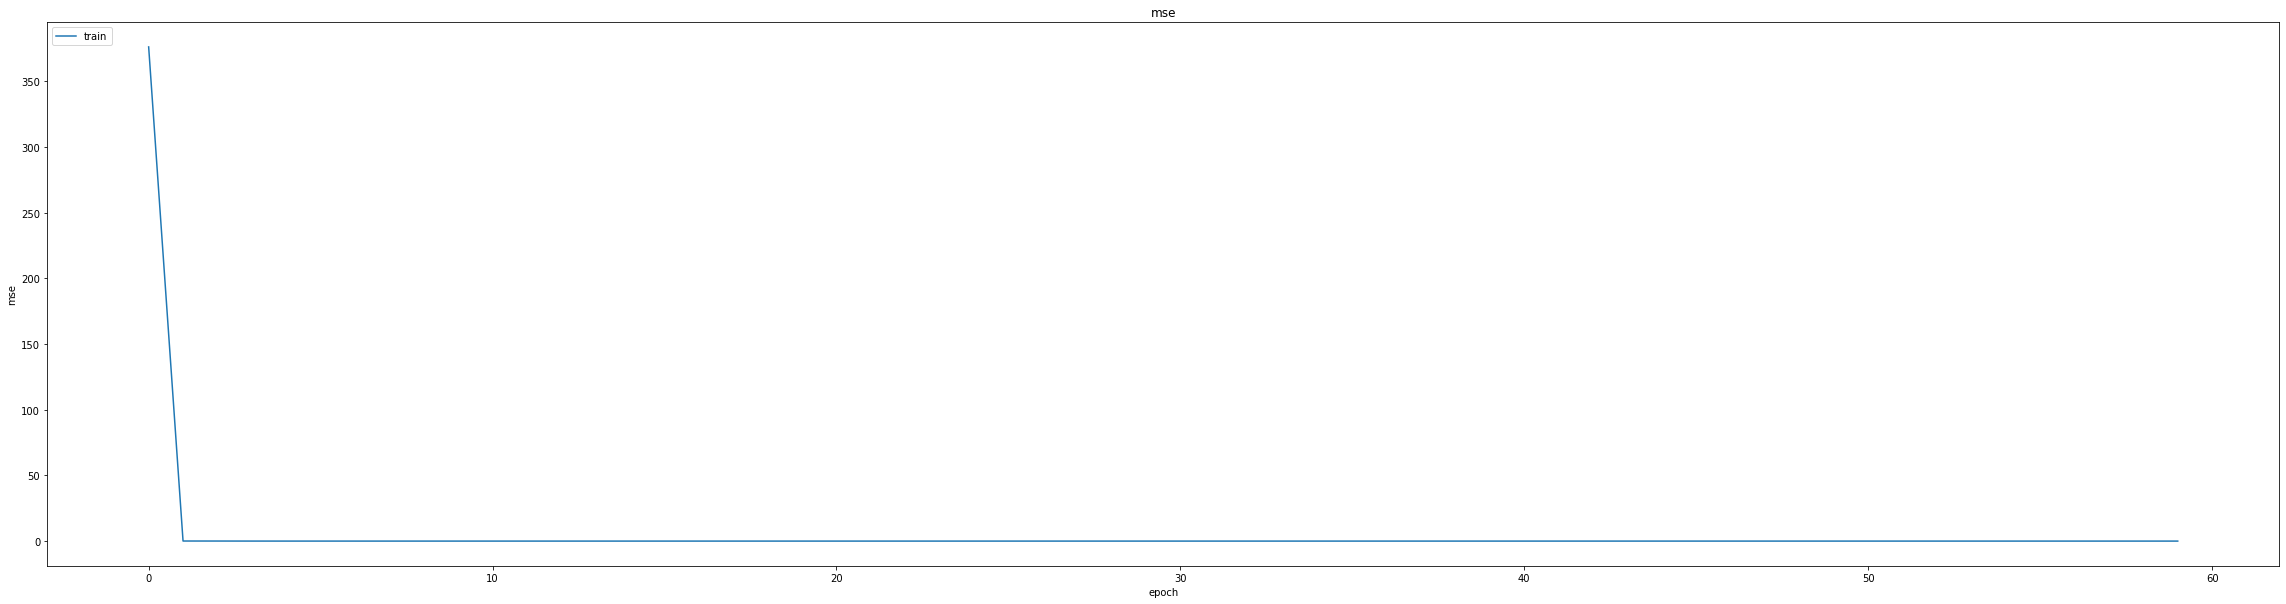

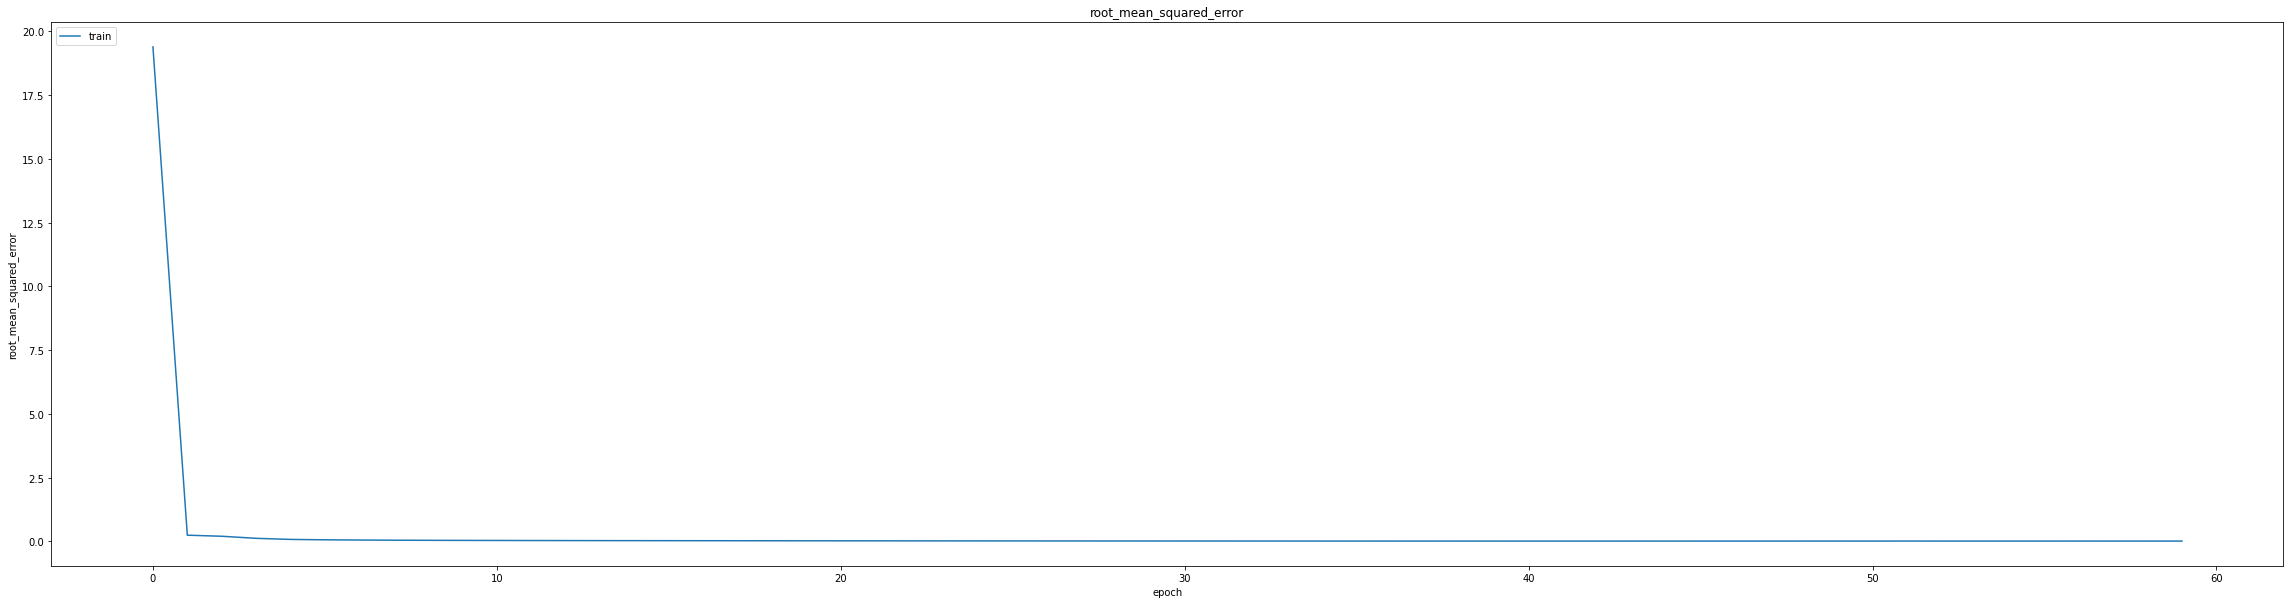

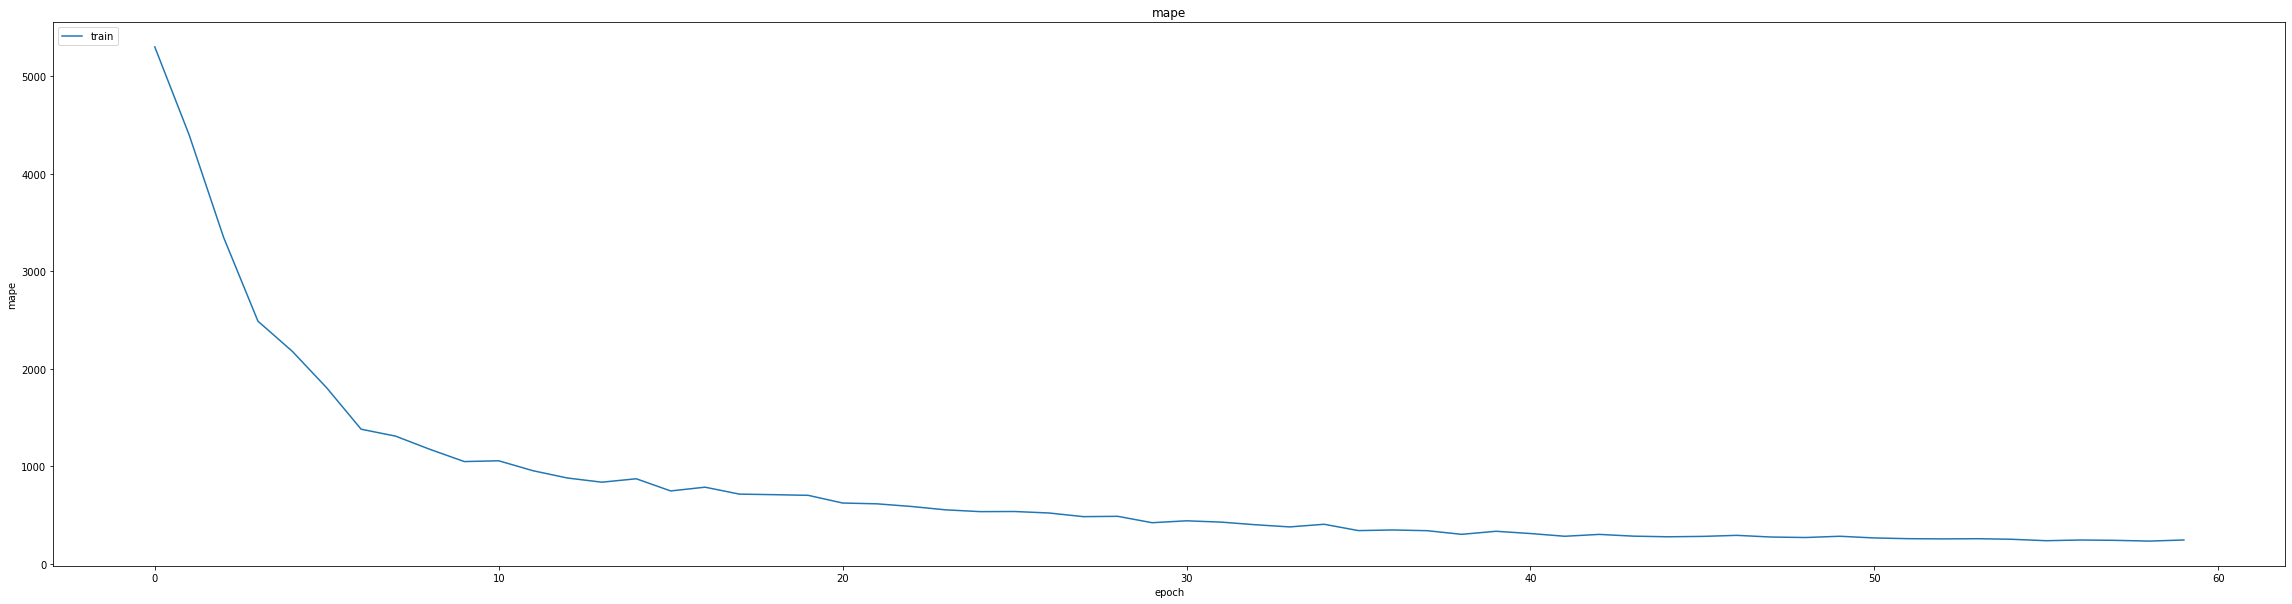

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0040610251016914845
0.0060372683219611645
1044/1044 [==============================] - 6s 5ms/step
0.9986374558258869


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20


405/405 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0135 - mse: 0.0014 - root_mean_squared_error: 0.0374 - mape: 420.6703
Epoch 1: val_mse did not improve from 0.00004
405/405 [==============================] - 15s 22ms/step - loss: 0.0014 - mae: 0.0135 - mse: 0.0014 - root_mean_squared_error: 0.0374 - mape: 420.6703 - val_loss: 1.2273e-04 - val_mae: 0.0098 - val_mse: 1.2273e-04 - val_root_mean_squared_error: 0.0111 - val_mape: 2115.4004 - lr: 0.0010
Epoch 2/20
403/405 [============================>.] - ETA: 0s - loss: 3.1987e-05 - mae: 0.0043 - mse: 3.1987e-05 - root_mean_squared_error: 0.0057 - mape: 409.5605
Epoch 2: val_mse did not improve from 0.00004
405/405 [==============================] - 7s 18ms/step - loss: 3.1973e-05 - mae: 0.0043 - mse: 3.1973e-05 - root_mean_squared_error: 0.0057 - mape: 407.5653 - val_loss: 1.1958e-04 - val_mae: 0.0100 - val_mse: 1.1958e-04 - val_root_mean_squared_error: 0.0109 - val_mape: 1841.0190 - lr: 0.0010
lr changed to 0.00

405/405 [==============================] - 29s 72ms/step - loss: 2.6952e-05 - mae: 0.0040 - mse: 2.6952e-05 - root_mean_squared_error: 0.0052 - mape: 165.1534 - val_loss: 3.5936e-05 - val_mae: 0.0049 - val_mse: 3.5936e-05 - val_root_mean_squared_error: 0.0060 - val_mape: 1013.5076 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/20
404/405 [============================>.] - ETA: 0s - loss: 1.8677e-05 - mae: 0.0033 - mse: 1.8677e-05 - root_mean_squared_error: 0.0043 - mape: 165.2247
Epoch 15: val_mse did not improve from 0.00004
405/405 [==============================] - 8s 19ms/step - loss: 1.8671e-05 - mae: 0.0033 - mse: 1.8671e-05 - root_mean_squared_error: 0.0043 - mape: 164.8274 - val_loss: 2.0968e-04 - val_mae: 0.0139 - val_mse: 2.0968e-04 - val_root_mean_squared_error: 0.0145 - val_mape: 1079.2451 - lr: 4.7830e-04
Epoch 16/20
403/405 [============================>.] - ETA: 0s - loss: 2.2272e-05 - mae: 0.0037 - mse: 2.2272e-05 - root_mean_squared_error: 0.0047 - mape

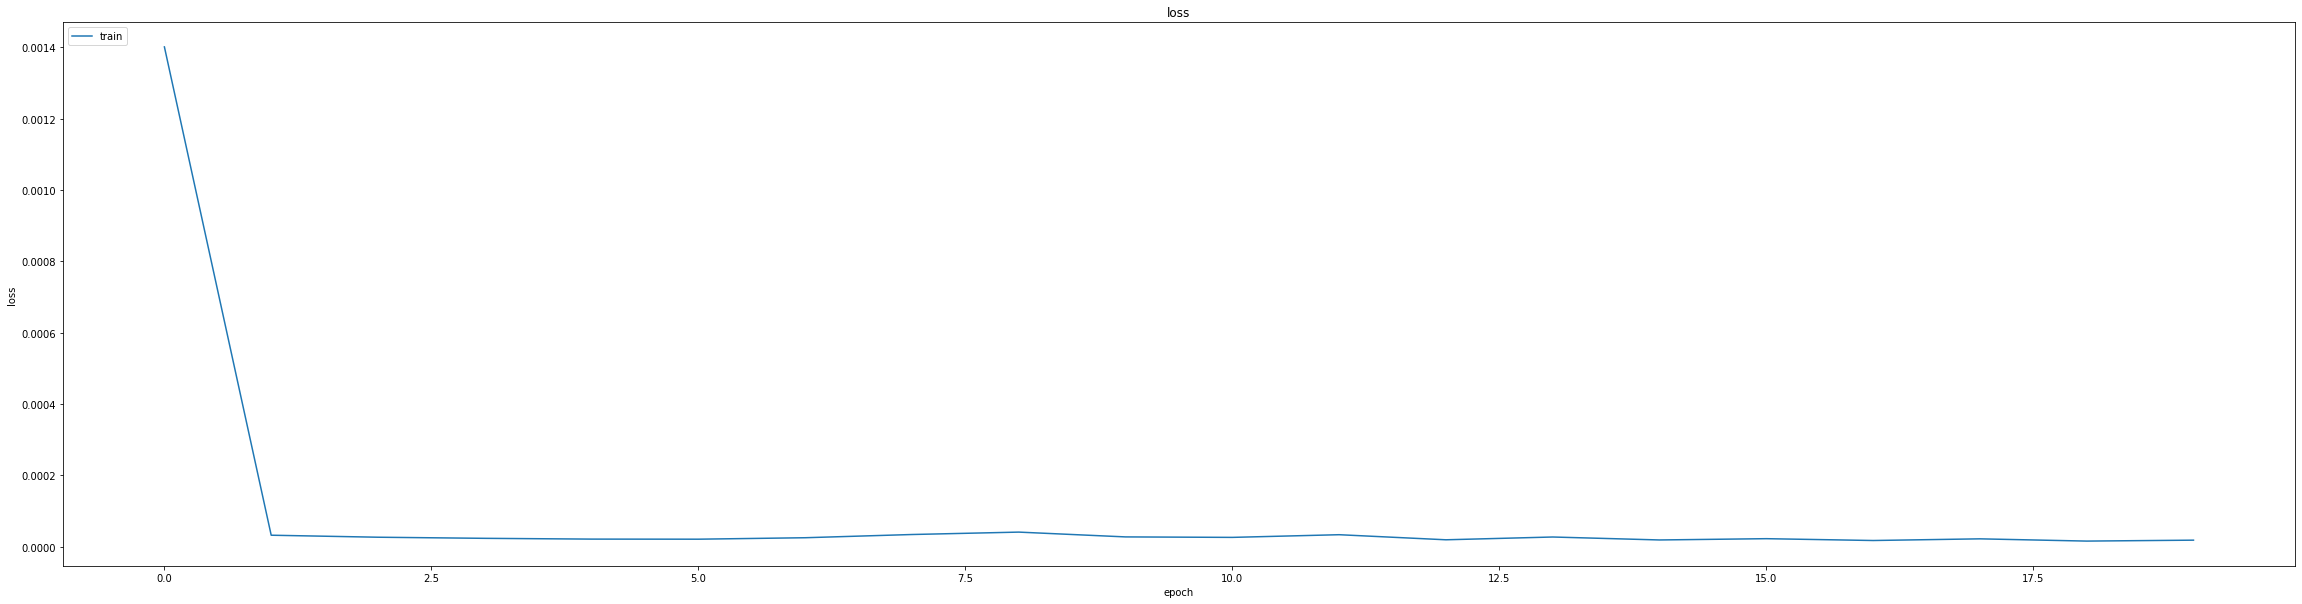

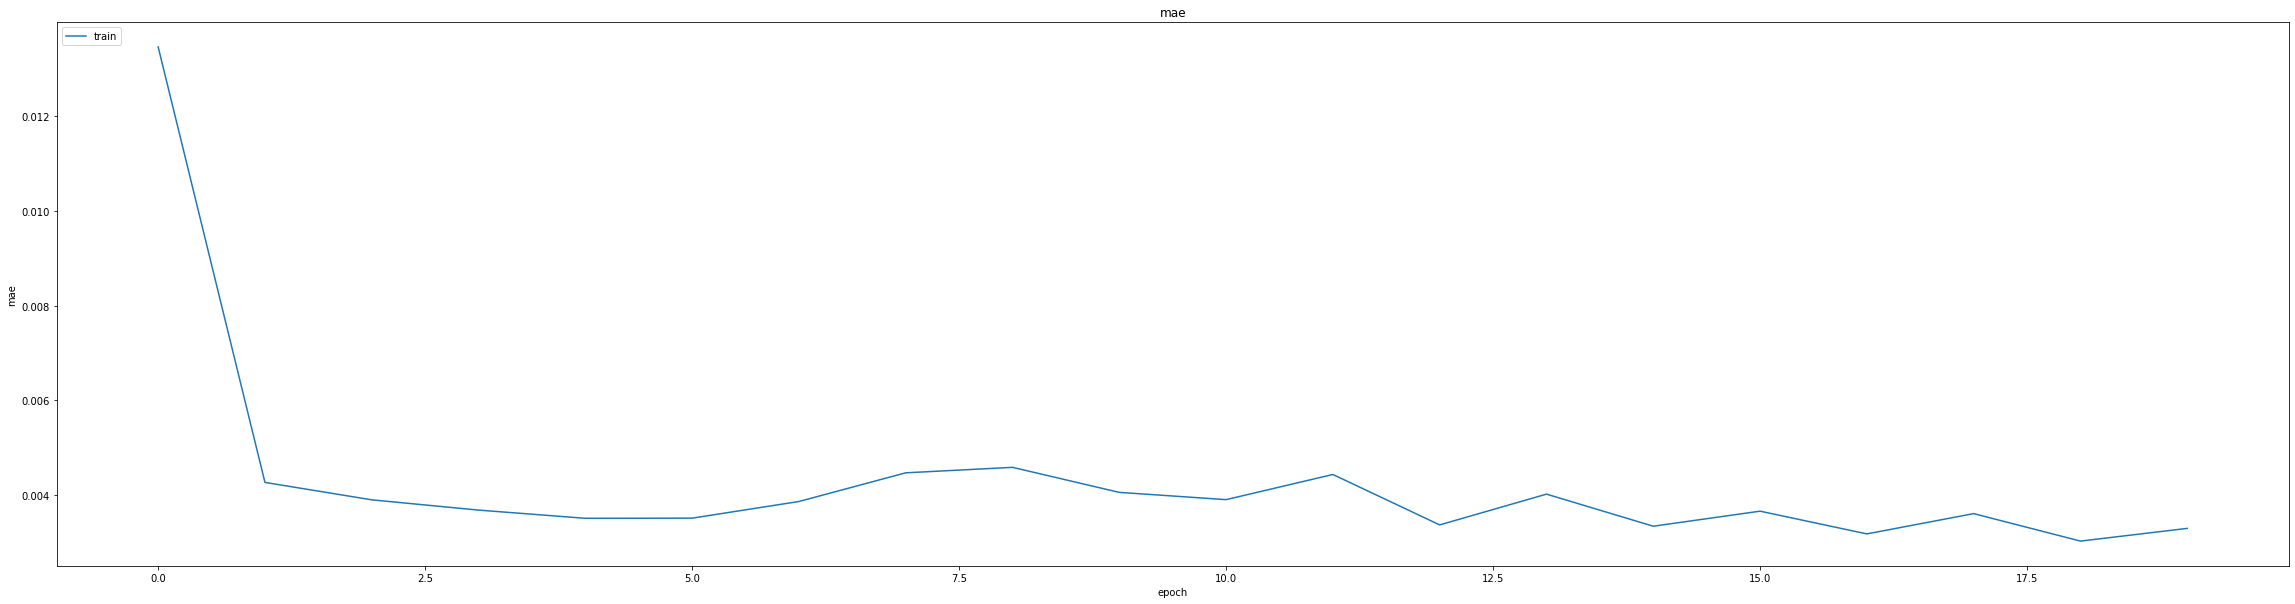

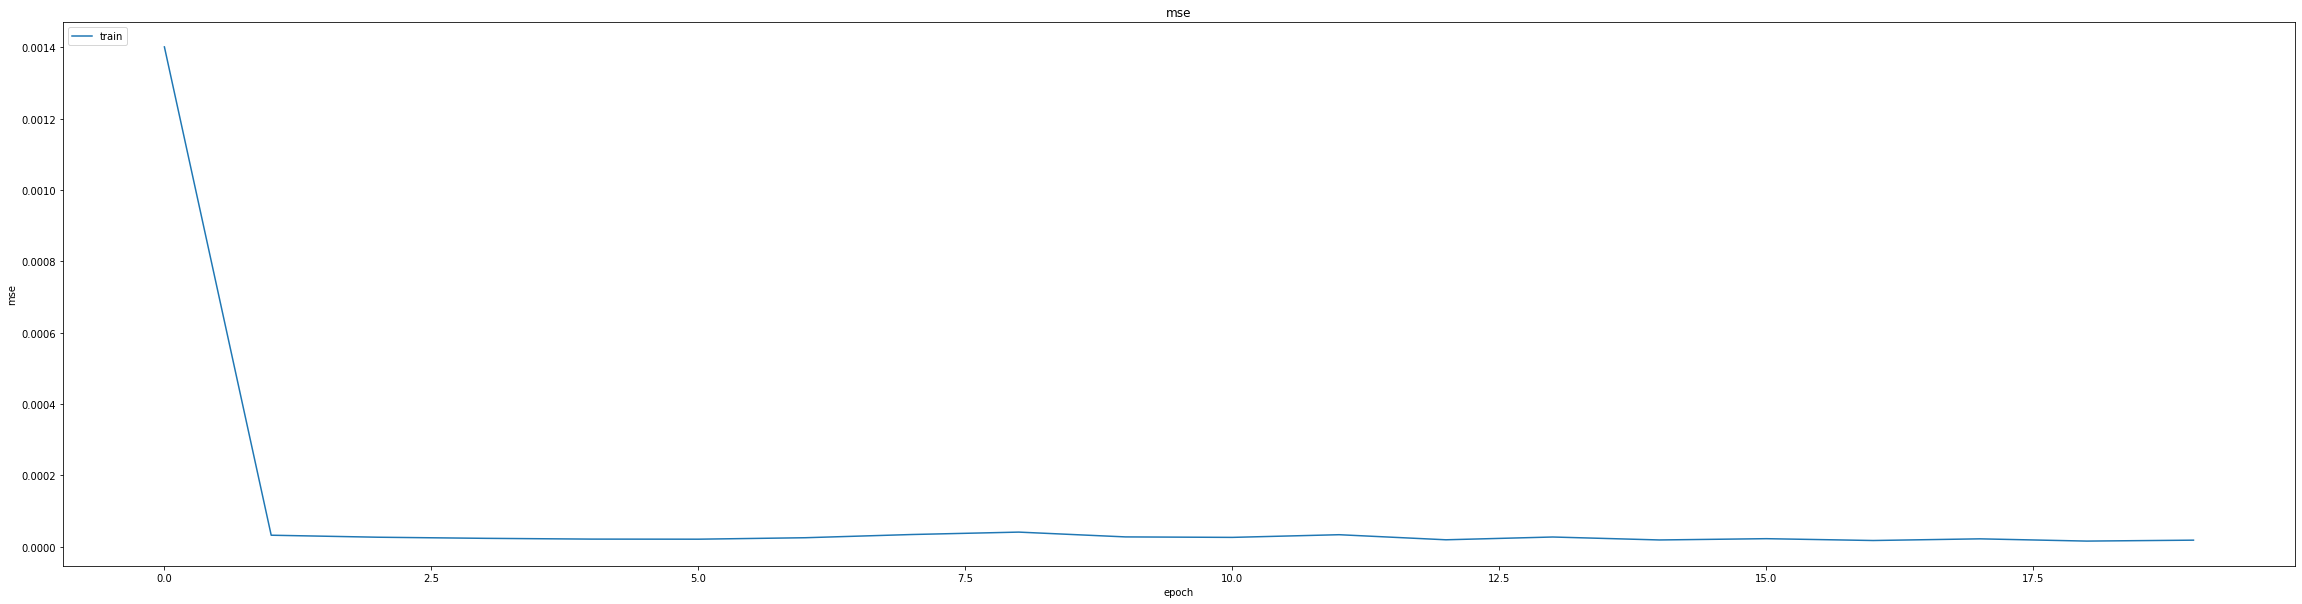

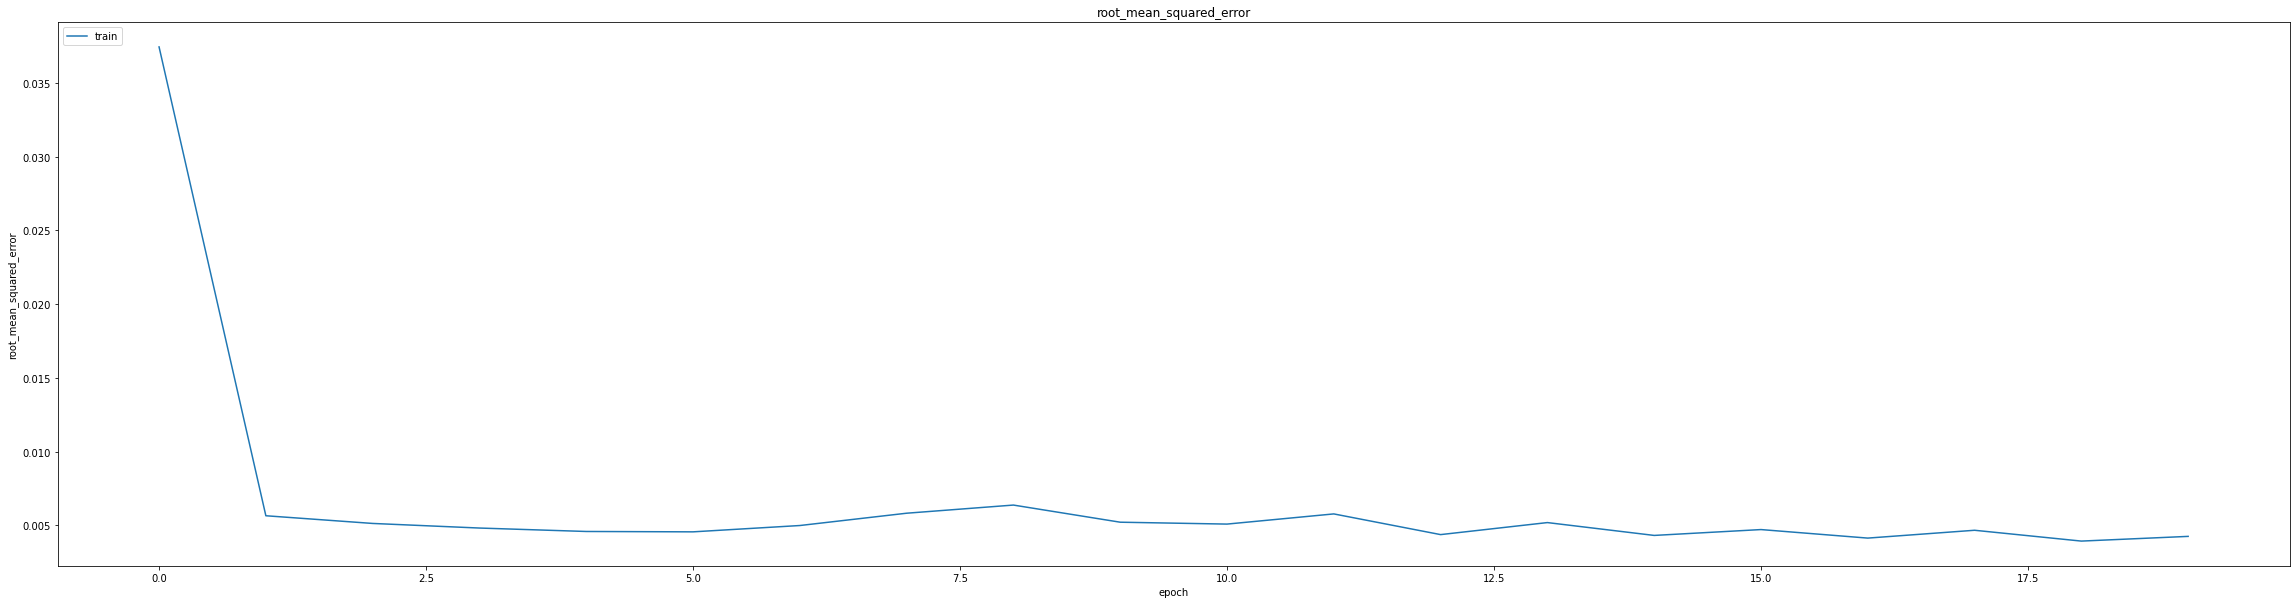

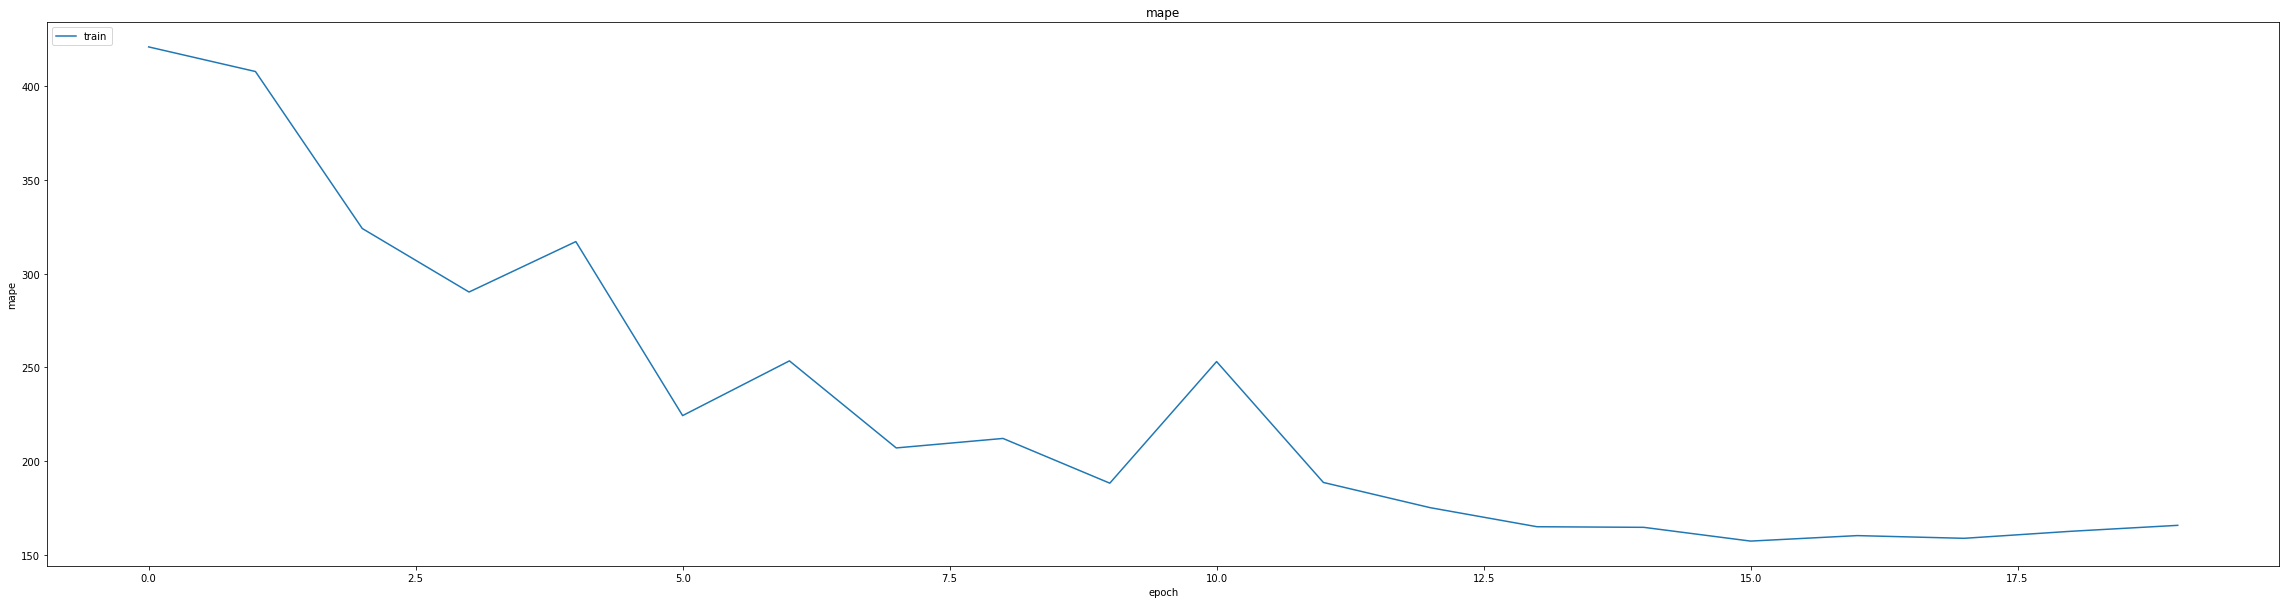

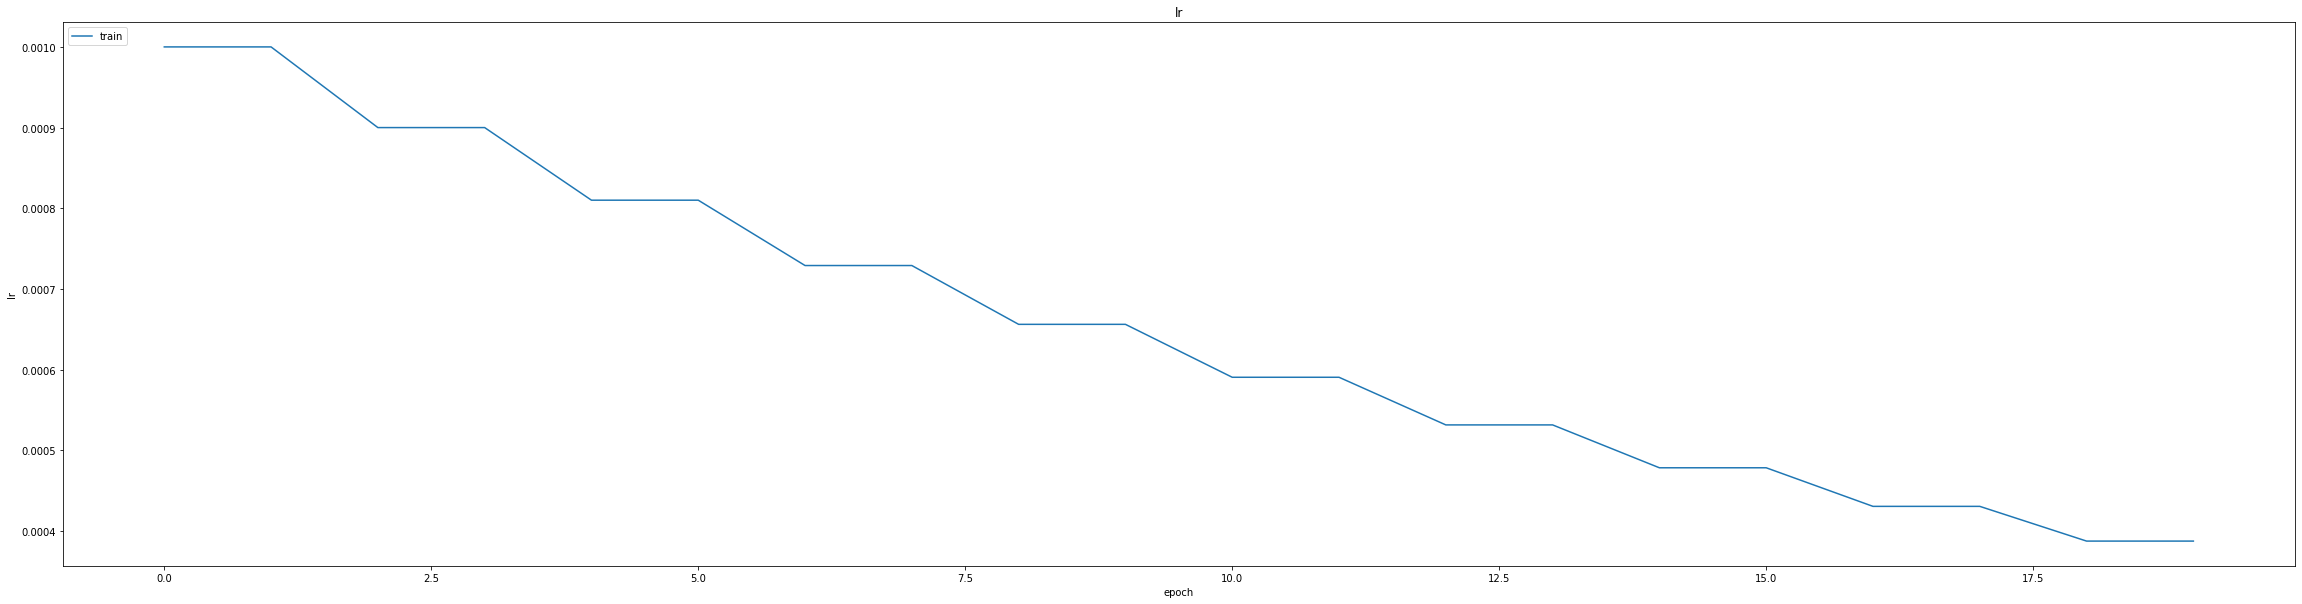

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.004937888588756323
0.005994666367769241
1044/1044 [==============================] - 6s 5ms/step
0.996647963627615


1044/1044 [==============================] - 5s 5ms/step


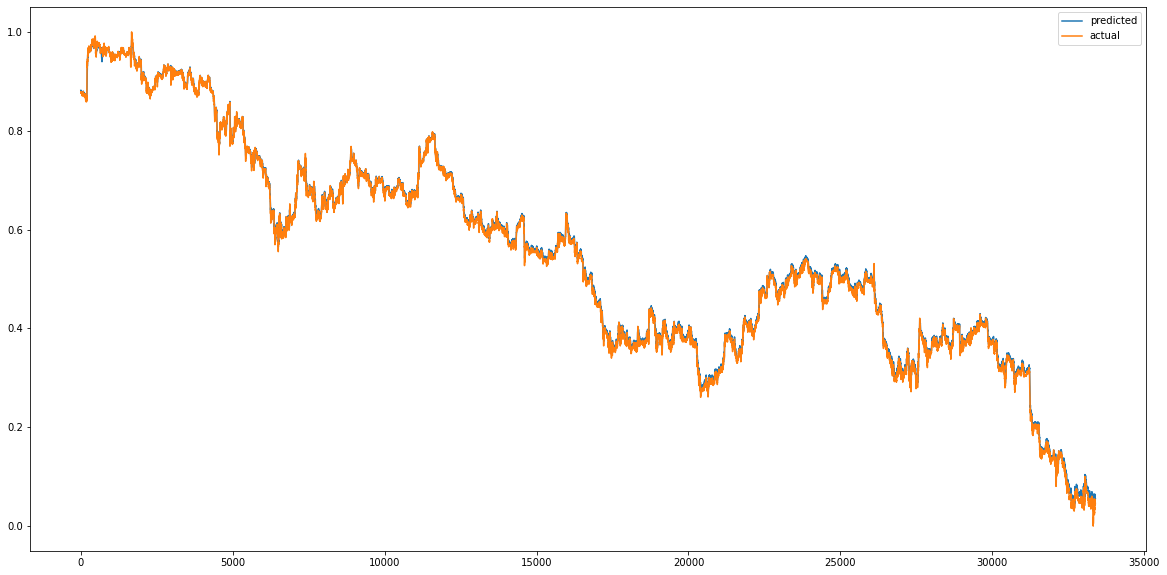

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


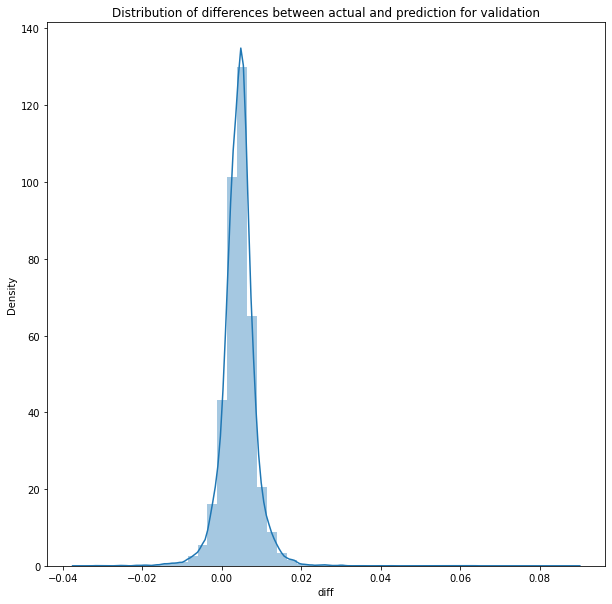

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1044/1044 [==============================] - 5s 5ms/step


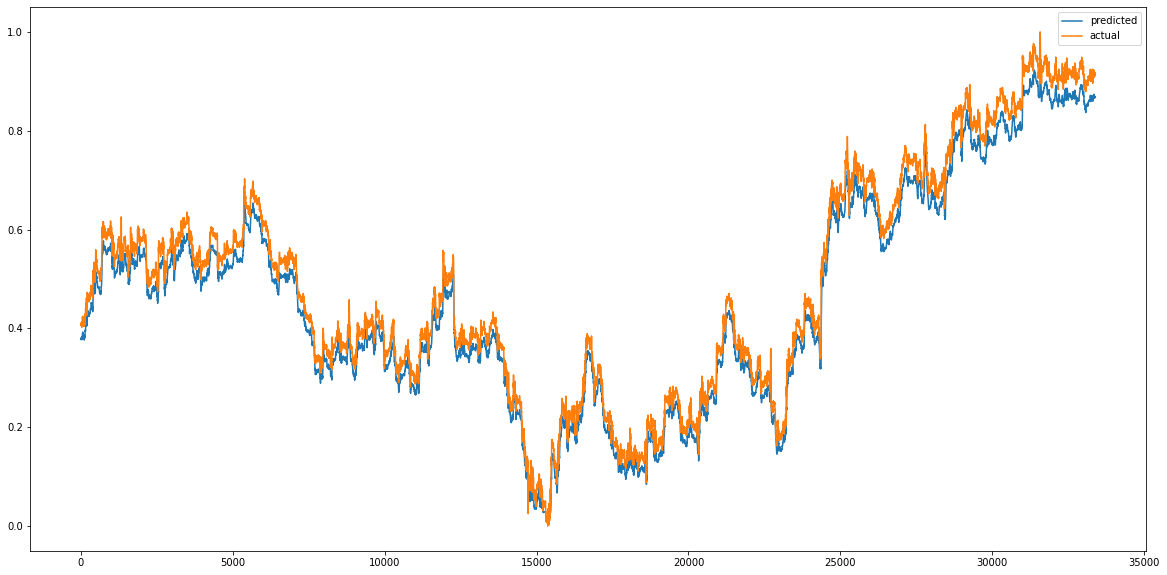

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


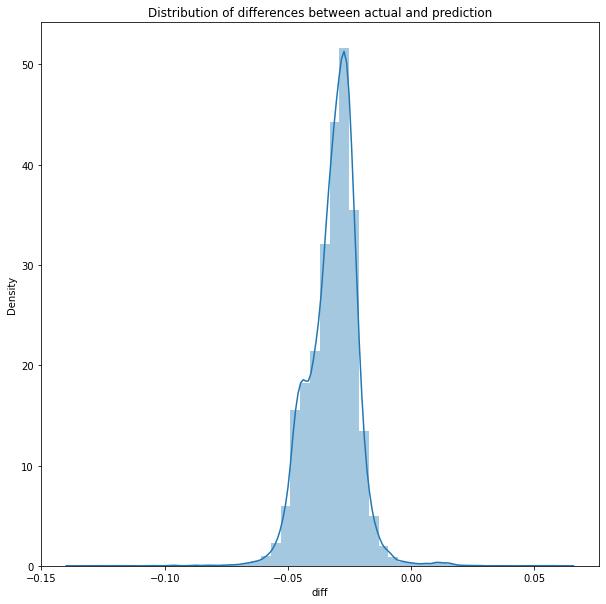

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0011047665536623402
RMSE :  0.03323802872708218
MAE :  0.031839749783078485
1044/1044 [==============================] - 5s 5ms/step
R2_Score  : 0.9788967944746637


count    33392.000000
mean        -0.031722
std          0.009924
min         -0.136257
25%         -0.037497
50%         -0.030464
75%         -0.025512
max          0.062120
Name: diff, dtype: float64

**CNN_LSTM_MODEL**

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 lstm_6 (LSTM)               (None, 24, 256)           328704    
                                                                 
 dropout_3 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                82176     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
402/405 [============================>.] - ETA: 0s - loss: 315.4048 - mae: 3.0216 - mse: 315.4048 - root_mean_squared_error: 17.7596 - mape: 9263.2363
Epoch 1: val_mse improved from inf to 0.16675, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 18s 38ms/step - loss: 313.0858 - mae: 3.0019 - mse: 313.0858 - root_mean_squared_error: 17.6942 - mape: 9196.1416 - val_loss: 0.1668 - val_mae: 0.3515 - val_mse: 0.1668 - val_root_mean_squared_error: 0.4084 - val_mape: 26744.0918
Epoch 2/60
405/405 [==============================] - ETA: 0s - loss: 0.1085 - mae: 0.2535 - mse: 0.1085 - root_mean_squared_error: 0.3294 - mape: 5093.7383
Epoch 2: val_mse improved from 0.16675 to 0.06386, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 0.1085 - mae: 0.2535 - mse: 0.1085 - root_mean_squared_error: 0.3294 - mape: 5093.7383 - val_loss: 0.0639 - val_mae: 0.2092 - val_mse: 0.0639 - val_root_mean_squared_error: 0.2527 - val_mape: 20039.2949
Epoch 3/60
405/405 [==============================] - ETA: 0s - loss: 0.0594 - mae: 0.1890 - mse: 0.0594 - root_mean_squared_error: 0.2437 - mape: 4262.6084
Epoch 3: val_mse improved from 0.06386 to 0.03549, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0594 - mae: 0.1890 - mse: 0.0594 - root_mean_squared_error: 0.2437 - mape: 4262.6084 - val_loss: 0.0355 - val_mae: 0.1470 - val_mse: 0.0355 - val_root_mean_squared_error: 0.1884 - val_mape: 17245.2305
Epoch 4/60
404/405 [============================>.] - ETA: 0s - loss: 0.0397 - mae: 0.1530 - mse: 0.0397 - root_mean_squared_error: 0.1992 - mape: 3781.4412
Epoch 4: val_mse improved from 0.03549 to 0.02833, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0396 - mae: 0.1530 - mse: 0.0396 - root_mean_squared_error: 0.1991 - mape: 3772.4358 - val_loss: 0.0283 - val_mae: 0.1271 - val_mse: 0.0283 - val_root_mean_squared_error: 0.1683 - val_mape: 15642.0576
Epoch 5/60
405/405 [==============================] - ETA: 0s - loss: 0.0284 - mae: 0.1247 - mse: 0.0284 - root_mean_squared_error: 0.1684 - mape: 3366.1199
Epoch 5: val_mse improved from 0.02833 to 0.01499, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 0.0284 - mae: 0.1247 - mse: 0.0284 - root_mean_squared_error: 0.1684 - mape: 3366.1199 - val_loss: 0.0150 - val_mae: 0.0840 - val_mse: 0.0150 - val_root_mean_squared_error: 0.1224 - val_mape: 14124.0068
Epoch 6/60
402/405 [============================>.] - ETA: 0s - loss: 0.0163 - mae: 0.0846 - mse: 0.0163 - root_mean_squared_error: 0.1276 - mape: 2774.3254
Epoch 6: val_mse improved from 0.01499 to 0.00812, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0163 - mae: 0.0845 - mse: 0.0163 - root_mean_squared_error: 0.1275 - mape: 2754.2661 - val_loss: 0.0081 - val_mae: 0.0531 - val_mse: 0.0081 - val_root_mean_squared_error: 0.0901 - val_mape: 12348.1523
Epoch 7/60
405/405 [==============================] - ETA: 0s - loss: 0.0102 - mae: 0.0625 - mse: 0.0102 - root_mean_squared_error: 0.1012 - mape: 2503.5649
Epoch 7: val_mse improved from 0.00812 to 0.00560, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0102 - mae: 0.0625 - mse: 0.0102 - root_mean_squared_error: 0.1012 - mape: 2503.5649 - val_loss: 0.0056 - val_mae: 0.0427 - val_mse: 0.0056 - val_root_mean_squared_error: 0.0748 - val_mape: 10980.0674
Epoch 8/60
402/405 [============================>.] - ETA: 0s - loss: 0.0075 - mae: 0.0544 - mse: 0.0075 - root_mean_squared_error: 0.0864 - mape: 2250.4739
Epoch 8: val_mse improved from 0.00560 to 0.00410, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 0.0075 - mae: 0.0544 - mse: 0.0075 - root_mean_squared_error: 0.0863 - mape: 2234.0962 - val_loss: 0.0041 - val_mae: 0.0352 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0640 - val_mape: 9947.5312
Epoch 9/60
404/405 [============================>.] - ETA: 0s - loss: 0.0057 - mae: 0.0485 - mse: 0.0057 - root_mean_squared_error: 0.0753 - mape: 2191.5833
Epoch 9: val_mse improved from 0.00410 to 0.00335, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 36ms/step - loss: 0.0057 - mae: 0.0485 - mse: 0.0057 - root_mean_squared_error: 0.0753 - mape: 2186.3816 - val_loss: 0.0034 - val_mae: 0.0334 - val_mse: 0.0034 - val_root_mean_squared_error: 0.0579 - val_mape: 9088.4160
Epoch 10/60
404/405 [============================>.] - ETA: 0s - loss: 0.0045 - mae: 0.0448 - mse: 0.0045 - root_mean_squared_error: 0.0672 - mape: 1936.8497
Epoch 10: val_mse improved from 0.00335 to 0.00256, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0045 - mae: 0.0448 - mse: 0.0045 - root_mean_squared_error: 0.0672 - mape: 1932.2120 - val_loss: 0.0026 - val_mae: 0.0289 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0506 - val_mape: 8373.1885
Epoch 11/60
404/405 [============================>.] - ETA: 0s - loss: 0.0036 - mae: 0.0408 - mse: 0.0036 - root_mean_squared_error: 0.0597 - mape: 1775.1697
Epoch 11: val_mse improved from 0.00256 to 0.00213, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 0.0036 - mae: 0.0408 - mse: 0.0036 - root_mean_squared_error: 0.0597 - mape: 1770.9082 - val_loss: 0.0021 - val_mae: 0.0289 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0462 - val_mape: 7554.7959
Epoch 12/60
404/405 [============================>.] - ETA: 0s - loss: 0.0025 - mae: 0.0342 - mse: 0.0025 - root_mean_squared_error: 0.0505 - mape: 1502.9780
Epoch 12: val_mse improved from 0.00213 to 0.00132, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 36ms/step - loss: 0.0025 - mae: 0.0342 - mse: 0.0025 - root_mean_squared_error: 0.0505 - mape: 1499.3716 - val_loss: 0.0013 - val_mae: 0.0176 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0363 - val_mape: 6947.6494
Epoch 13/60
405/405 [==============================] - ETA: 0s - loss: 0.0018 - mae: 0.0284 - mse: 0.0018 - root_mean_squared_error: 0.0424 - mape: 1492.3105
Epoch 13: val_mse improved from 0.00132 to 0.00110, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0018 - mae: 0.0284 - mse: 0.0018 - root_mean_squared_error: 0.0424 - mape: 1492.3105 - val_loss: 0.0011 - val_mae: 0.0173 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0332 - val_mape: 6458.5732
Epoch 14/60
404/405 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0262 - mse: 0.0015 - root_mean_squared_error: 0.0383 - mape: 1417.1248
Epoch 14: val_mse improved from 0.00110 to 0.00094, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 0.0015 - mae: 0.0262 - mse: 0.0015 - root_mean_squared_error: 0.0382 - mape: 1413.7205 - val_loss: 9.3546e-04 - val_mae: 0.0163 - val_mse: 9.3546e-04 - val_root_mean_squared_error: 0.0306 - val_mape: 6044.2285
Epoch 15/60
402/405 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0243 - mse: 0.0012 - root_mean_squared_error: 0.0348 - mape: 1271.5079
Epoch 15: val_mse improved from 0.00094 to 0.00081, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 15s 36ms/step - loss: 0.0012 - mae: 0.0243 - mse: 0.0012 - root_mean_squared_error: 0.0348 - mape: 1262.2397 - val_loss: 8.1384e-04 - val_mae: 0.0156 - val_mse: 8.1384e-04 - val_root_mean_squared_error: 0.0285 - val_mape: 5687.6084
Epoch 16/60
404/405 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0227 - mse: 0.0010 - root_mean_squared_error: 0.0320 - mape: 1210.6805
Epoch 16: val_mse improved from 0.00081 to 0.00069, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0010 - mae: 0.0227 - mse: 0.0010 - root_mean_squared_error: 0.0320 - mape: 1207.7792 - val_loss: 6.8936e-04 - val_mae: 0.0151 - val_mse: 6.8936e-04 - val_root_mean_squared_error: 0.0263 - val_mape: 5363.4668
Epoch 17/60
404/405 [============================>.] - ETA: 0s - loss: 8.5833e-04 - mae: 0.0211 - mse: 8.5833e-04 - root_mean_squared_error: 0.0293 - mape: 1188.0198
Epoch 17: val_mse improved from 0.00069 to 0.00063, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 8.5824e-04 - mae: 0.0211 - mse: 8.5824e-04 - root_mean_squared_error: 0.0293 - mape: 1185.1724 - val_loss: 6.2788e-04 - val_mae: 0.0152 - val_mse: 6.2788e-04 - val_root_mean_squared_error: 0.0251 - val_mape: 5062.7539
Epoch 18/60
404/405 [============================>.] - ETA: 0s - loss: 7.2658e-04 - mae: 0.0197 - mse: 7.2658e-04 - root_mean_squared_error: 0.0270 - mape: 1047.4236
Epoch 18: val_mse improved from 0.00063 to 0.00047, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 36ms/step - loss: 7.2616e-04 - mae: 0.0197 - mse: 7.2616e-04 - root_mean_squared_error: 0.0269 - mape: 1044.9038 - val_loss: 4.6905e-04 - val_mae: 0.0121 - val_mse: 4.6905e-04 - val_root_mean_squared_error: 0.0217 - val_mape: 4782.1123
Epoch 19/60
404/405 [============================>.] - ETA: 0s - loss: 6.2239e-04 - mae: 0.0184 - mse: 6.2239e-04 - root_mean_squared_error: 0.0249 - mape: 979.0427
Epoch 19: val_mse improved from 0.00047 to 0.00040, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 6.2243e-04 - mae: 0.0184 - mse: 6.2243e-04 - root_mean_squared_error: 0.0249 - mape: 976.6942 - val_loss: 4.0234e-04 - val_mae: 0.0117 - val_mse: 4.0234e-04 - val_root_mean_squared_error: 0.0201 - val_mape: 4536.5527
Epoch 20/60
403/405 [============================>.] - ETA: 0s - loss: 5.4332e-04 - mae: 0.0174 - mse: 5.4332e-04 - root_mean_squared_error: 0.0233 - mape: 957.6618
Epoch 20: val_mse did not improve from 0.00040
405/405 [==============================] - 6s 16ms/step - loss: 5.4322e-04 - mae: 0.0174 - mse: 5.4322e-04 - root_mean_squared_error: 0.0233 - mape: 953.0126 - val_loss: 4.3991e-04 - val_mae: 0.0142 - val_mse: 4.3991e-04 - val_root_mean_squared_error: 0.0210 - val_mape: 4314.9478
Epoch 21/60
404/405 [============================>.] - ETA: 0s - loss: 4.7773e-04 - mae: 0.0164 - mse: 4.7773e-04 - root_mean_squared_error: 0.0219 - mape: 926.2769
Epoch 21: val_mse improved from 0.00040 to 0.00036, saving m

405/405 [==============================] - 15s 36ms/step - loss: 4.7788e-04 - mae: 0.0164 - mse: 4.7788e-04 - root_mean_squared_error: 0.0219 - mape: 924.0584 - val_loss: 3.6234e-04 - val_mae: 0.0123 - val_mse: 3.6234e-04 - val_root_mean_squared_error: 0.0190 - val_mape: 4114.0415
Epoch 22/60
405/405 [==============================] - ETA: 0s - loss: 4.1776e-04 - mae: 0.0153 - mse: 4.1776e-04 - root_mean_squared_error: 0.0204 - mape: 869.1718
Epoch 22: val_mse improved from 0.00036 to 0.00030, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 36ms/step - loss: 4.1776e-04 - mae: 0.0153 - mse: 4.1776e-04 - root_mean_squared_error: 0.0204 - mape: 869.1718 - val_loss: 2.9651e-04 - val_mae: 0.0103 - val_mse: 2.9651e-04 - val_root_mean_squared_error: 0.0172 - val_mape: 3931.6472
Epoch 23/60
404/405 [============================>.] - ETA: 0s - loss: 3.6667e-04 - mae: 0.0144 - mse: 3.6667e-04 - root_mean_squared_error: 0.0191 - mape: 844.4122
Epoch 23: val_mse improved from 0.00030 to 0.00023, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 36ms/step - loss: 3.6664e-04 - mae: 0.0144 - mse: 3.6664e-04 - root_mean_squared_error: 0.0191 - mape: 842.3817 - val_loss: 2.2997e-04 - val_mae: 0.0087 - val_mse: 2.2997e-04 - val_root_mean_squared_error: 0.0152 - val_mape: 3770.1941
Epoch 24/60
405/405 [==============================] - ETA: 0s - loss: 3.2468e-04 - mae: 0.0136 - mse: 3.2468e-04 - root_mean_squared_error: 0.0180 - mape: 796.1418
Epoch 24: val_mse improved from 0.00023 to 0.00023, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 3.2468e-04 - mae: 0.0136 - mse: 3.2468e-04 - root_mean_squared_error: 0.0180 - mape: 796.1418 - val_loss: 2.2697e-04 - val_mae: 0.0093 - val_mse: 2.2697e-04 - val_root_mean_squared_error: 0.0151 - val_mape: 3628.6123
Epoch 25/60
405/405 [==============================] - ETA: 0s - loss: 2.8773e-04 - mae: 0.0128 - mse: 2.8773e-04 - root_mean_squared_error: 0.0170 - mape: 770.4821
Epoch 25: val_mse improved from 0.00023 to 0.00020, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 2.8773e-04 - mae: 0.0128 - mse: 2.8773e-04 - root_mean_squared_error: 0.0170 - mape: 770.4821 - val_loss: 2.0458e-04 - val_mae: 0.0088 - val_mse: 2.0458e-04 - val_root_mean_squared_error: 0.0143 - val_mape: 3501.7600
Epoch 26/60
402/405 [============================>.] - ETA: 0s - loss: 2.5543e-04 - mae: 0.0121 - mse: 2.5543e-04 - root_mean_squared_error: 0.0160 - mape: 758.5591
Epoch 26: val_mse did not improve from 0.00020
405/405 [==============================] - 6s 16ms/step - loss: 2.5533e-04 - mae: 0.0121 - mse: 2.5533e-04 - root_mean_squared_error: 0.0160 - mape: 753.0016 - val_loss: 2.0655e-04 - val_mae: 0.0091 - val_mse: 2.0655e-04 - val_root_mean_squared_error: 0.0144 - val_mape: 3391.6318
Epoch 27/60
404/405 [============================>.] - ETA: 0s - loss: 2.2995e-04 - mae: 0.0115 - mse: 2.2995e-04 - root_mean_squared_error: 0.0152 - mape: 726.9011
Epoch 27: val_mse improved from 0.00020 to 0.00019, saving m

405/405 [==============================] - 14s 34ms/step - loss: 2.2998e-04 - mae: 0.0115 - mse: 2.2998e-04 - root_mean_squared_error: 0.0152 - mape: 725.1539 - val_loss: 1.9076e-04 - val_mae: 0.0089 - val_mse: 1.9076e-04 - val_root_mean_squared_error: 0.0138 - val_mape: 3282.6094
Epoch 28/60
404/405 [============================>.] - ETA: 0s - loss: 2.0661e-04 - mae: 0.0109 - mse: 2.0661e-04 - root_mean_squared_error: 0.0144 - mape: 692.9136
Epoch 28: val_mse improved from 0.00019 to 0.00016, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 36ms/step - loss: 2.0658e-04 - mae: 0.0109 - mse: 2.0658e-04 - root_mean_squared_error: 0.0144 - mape: 691.2448 - val_loss: 1.5899e-04 - val_mae: 0.0080 - val_mse: 1.5899e-04 - val_root_mean_squared_error: 0.0126 - val_mape: 3190.9204
Epoch 29/60
402/405 [============================>.] - ETA: 0s - loss: 1.8486e-04 - mae: 0.0103 - mse: 1.8486e-04 - root_mean_squared_error: 0.0136 - mape: 666.5057
Epoch 29: val_mse improved from 0.00016 to 0.00015, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 1.8489e-04 - mae: 0.0103 - mse: 1.8489e-04 - root_mean_squared_error: 0.0136 - mape: 661.6348 - val_loss: 1.4564e-04 - val_mae: 0.0077 - val_mse: 1.4564e-04 - val_root_mean_squared_error: 0.0121 - val_mape: 3086.9104
Epoch 30/60
402/405 [============================>.] - ETA: 0s - loss: 1.6789e-04 - mae: 0.0099 - mse: 1.6789e-04 - root_mean_squared_error: 0.0130 - mape: 679.6710
Epoch 30: val_mse improved from 0.00015 to 0.00014, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 1.6777e-04 - mae: 0.0099 - mse: 1.6777e-04 - root_mean_squared_error: 0.0130 - mape: 674.6956 - val_loss: 1.3774e-04 - val_mae: 0.0076 - val_mse: 1.3774e-04 - val_root_mean_squared_error: 0.0117 - val_mape: 3003.1350
Epoch 31/60
404/405 [============================>.] - ETA: 0s - loss: 1.5050e-04 - mae: 0.0093 - mse: 1.5050e-04 - root_mean_squared_error: 0.0123 - mape: 642.2632
Epoch 31: val_mse improved from 0.00014 to 0.00013, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 36ms/step - loss: 1.5046e-04 - mae: 0.0093 - mse: 1.5046e-04 - root_mean_squared_error: 0.0123 - mape: 640.7154 - val_loss: 1.3007e-04 - val_mae: 0.0076 - val_mse: 1.3007e-04 - val_root_mean_squared_error: 0.0114 - val_mape: 2911.0664
Epoch 32/60
402/405 [============================>.] - ETA: 0s - loss: 1.3957e-04 - mae: 0.0090 - mse: 1.3957e-04 - root_mean_squared_error: 0.0118 - mape: 644.1602
Epoch 32: val_mse improved from 0.00013 to 0.00013, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 1.3944e-04 - mae: 0.0090 - mse: 1.3944e-04 - root_mean_squared_error: 0.0118 - mape: 639.4383 - val_loss: 1.2799e-04 - val_mae: 0.0075 - val_mse: 1.2799e-04 - val_root_mean_squared_error: 0.0113 - val_mape: 2827.5266
Epoch 33/60
404/405 [============================>.] - ETA: 0s - loss: 1.2738e-04 - mae: 0.0086 - mse: 1.2738e-04 - root_mean_squared_error: 0.0113 - mape: 616.9907
Epoch 33: val_mse did not improve from 0.00013
405/405 [==============================] - 6s 16ms/step - loss: 1.2736e-04 - mae: 0.0086 - mse: 1.2736e-04 - root_mean_squared_error: 0.0113 - mape: 615.5062 - val_loss: 1.2859e-04 - val_mae: 0.0077 - val_mse: 1.2859e-04 - val_root_mean_squared_error: 0.0113 - val_mape: 2743.0933
Epoch 34/60
405/405 [==============================] - ETA: 0s - loss: 1.1365e-04 - mae: 0.0081 - mse: 1.1365e-04 - root_mean_squared_error: 0.0107 - mape: 591.6960
Epoch 34: val_mse improved from 0.00013 to 0.00011, saving m

405/405 [==============================] - 14s 35ms/step - loss: 1.1365e-04 - mae: 0.0081 - mse: 1.1365e-04 - root_mean_squared_error: 0.0107 - mape: 591.6960 - val_loss: 1.0900e-04 - val_mae: 0.0069 - val_mse: 1.0900e-04 - val_root_mean_squared_error: 0.0104 - val_mape: 2671.3547
Epoch 35/60
405/405 [==============================] - ETA: 0s - loss: 1.0709e-04 - mae: 0.0078 - mse: 1.0709e-04 - root_mean_squared_error: 0.0103 - mape: 601.2690
Epoch 35: val_mse did not improve from 0.00011
405/405 [==============================] - 6s 16ms/step - loss: 1.0709e-04 - mae: 0.0078 - mse: 1.0709e-04 - root_mean_squared_error: 0.0103 - mape: 601.2690 - val_loss: 1.3377e-04 - val_mae: 0.0082 - val_mse: 1.3377e-04 - val_root_mean_squared_error: 0.0116 - val_mape: 2605.0381
Epoch 36/60
402/405 [============================>.] - ETA: 0s - loss: 9.9913e-05 - mae: 0.0076 - mse: 9.9913e-05 - root_mean_squared_error: 0.0100 - mape: 573.3317
Epoch 36: val_mse did not improve from 0.00011
405/405 [====

405/405 [==============================] - 14s 34ms/step - loss: 9.2725e-05 - mae: 0.0073 - mse: 9.2725e-05 - root_mean_squared_error: 0.0096 - mape: 549.0460 - val_loss: 9.8975e-05 - val_mae: 0.0069 - val_mse: 9.8975e-05 - val_root_mean_squared_error: 0.0099 - val_mape: 2484.3569
Epoch 38/60
402/405 [============================>.] - ETA: 0s - loss: 8.4103e-05 - mae: 0.0069 - mse: 8.4103e-05 - root_mean_squared_error: 0.0092 - mape: 531.7230
Epoch 38: val_mse improved from 0.00010 to 0.00009, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 8.4055e-05 - mae: 0.0069 - mse: 8.4055e-05 - root_mean_squared_error: 0.0092 - mape: 527.8275 - val_loss: 8.9075e-05 - val_mae: 0.0064 - val_mse: 8.9075e-05 - val_root_mean_squared_error: 0.0094 - val_mape: 2424.7388
Epoch 39/60
405/405 [==============================] - ETA: 0s - loss: 8.1592e-05 - mae: 0.0068 - mse: 8.1592e-05 - root_mean_squared_error: 0.0090 - mape: 512.0742
Epoch 39: val_mse did not improve from 0.00009
405/405 [==============================] - 6s 16ms/step - loss: 8.1592e-05 - mae: 0.0068 - mse: 8.1592e-05 - root_mean_squared_error: 0.0090 - mape: 512.0742 - val_loss: 1.0815e-04 - val_mae: 0.0079 - val_mse: 1.0815e-04 - val_root_mean_squared_error: 0.0104 - val_mape: 2379.4414
Epoch 40/60
403/405 [============================>.] - ETA: 0s - loss: 7.6977e-05 - mae: 0.0066 - mse: 7.6977e-05 - root_mean_squared_error: 0.0088 - mape: 504.1987
Epoch 40: val_mse did not improve from 0.00009
405/405 [====

405/405 [==============================] - 14s 34ms/step - loss: 7.3363e-05 - mae: 0.0065 - mse: 7.3363e-05 - root_mean_squared_error: 0.0086 - mape: 491.2896 - val_loss: 8.6036e-05 - val_mae: 0.0067 - val_mse: 8.6036e-05 - val_root_mean_squared_error: 0.0093 - val_mape: 2269.3940
Epoch 42/60
402/405 [============================>.] - ETA: 0s - loss: 6.8950e-05 - mae: 0.0063 - mse: 6.8950e-05 - root_mean_squared_error: 0.0083 - mape: 502.1194
Epoch 42: val_mse did not improve from 0.00009
405/405 [==============================] - 6s 16ms/step - loss: 6.8886e-05 - mae: 0.0063 - mse: 6.8886e-05 - root_mean_squared_error: 0.0083 - mape: 498.4373 - val_loss: 1.0246e-04 - val_mae: 0.0077 - val_mse: 1.0246e-04 - val_root_mean_squared_error: 0.0101 - val_mape: 2210.7344
Epoch 43/60
405/405 [==============================] - ETA: 0s - loss: 6.7628e-05 - mae: 0.0062 - mse: 6.7628e-05 - root_mean_squared_error: 0.0082 - mape: 469.9647
Epoch 43: val_mse did not improve from 0.00009
405/405 [====

405/405 [==============================] - 14s 36ms/step - loss: 6.5946e-05 - mae: 0.0062 - mse: 6.5946e-05 - root_mean_squared_error: 0.0081 - mape: 463.6075 - val_loss: 8.3948e-05 - val_mae: 0.0071 - val_mse: 8.3948e-05 - val_root_mean_squared_error: 0.0092 - val_mape: 2078.7878
Epoch 46/60
404/405 [============================>.] - ETA: 0s - loss: 6.3967e-05 - mae: 0.0061 - mse: 6.3967e-05 - root_mean_squared_error: 0.0080 - mape: 435.8758
Epoch 46: val_mse did not improve from 0.00008
405/405 [==============================] - 6s 16ms/step - loss: 6.3951e-05 - mae: 0.0061 - mse: 6.3951e-05 - root_mean_squared_error: 0.0080 - mape: 434.8256 - val_loss: 1.5303e-04 - val_mae: 0.0108 - val_mse: 1.5303e-04 - val_root_mean_squared_error: 0.0124 - val_mape: 2043.1104
Epoch 47/60
404/405 [============================>.] - ETA: 0s - loss: 6.7350e-05 - mae: 0.0062 - mse: 6.7350e-05 - root_mean_squared_error: 0.0082 - mape: 440.6499
Epoch 47: val_mse did not improve from 0.00008
405/405 [====

405/405 [==============================] - 14s 35ms/step - loss: 6.8185e-05 - mae: 0.0064 - mse: 6.8185e-05 - root_mean_squared_error: 0.0083 - mape: 397.1394 - val_loss: 7.2358e-05 - val_mae: 0.0066 - val_mse: 7.2358e-05 - val_root_mean_squared_error: 0.0085 - val_mape: 1781.7913
Epoch 53/60
404/405 [============================>.] - ETA: 0s - loss: 6.9519e-05 - mae: 0.0064 - mse: 6.9519e-05 - root_mean_squared_error: 0.0083 - mape: 379.7475
Epoch 53: val_mse did not improve from 0.00007
405/405 [==============================] - 6s 16ms/step - loss: 6.9424e-05 - mae: 0.0064 - mse: 6.9424e-05 - root_mean_squared_error: 0.0083 - mape: 378.8320 - val_loss: 1.0115e-04 - val_mae: 0.0086 - val_mse: 1.0115e-04 - val_root_mean_squared_error: 0.0101 - val_mape: 1745.2137
Epoch 54/60
403/405 [============================>.] - ETA: 0s - loss: 7.4356e-05 - mae: 0.0065 - mse: 7.4356e-05 - root_mean_squared_error: 0.0086 - mape: 375.0878
Epoch 54: val_mse improved from 0.00007 to 0.00005, saving m

405/405 [==============================] - 14s 35ms/step - loss: 7.4153e-05 - mae: 0.0065 - mse: 7.4153e-05 - root_mean_squared_error: 0.0086 - mape: 373.2602 - val_loss: 5.4313e-05 - val_mae: 0.0055 - val_mse: 5.4313e-05 - val_root_mean_squared_error: 0.0074 - val_mape: 1735.6294
Epoch 55/60
405/405 [==============================] - ETA: 0s - loss: 5.0458e-05 - mae: 0.0054 - mse: 5.0458e-05 - root_mean_squared_error: 0.0071 - mape: 367.3481
Epoch 55: val_mse did not improve from 0.00005
405/405 [==============================] - 6s 16ms/step - loss: 5.0458e-05 - mae: 0.0054 - mse: 5.0458e-05 - root_mean_squared_error: 0.0071 - mape: 367.3481 - val_loss: 9.5615e-05 - val_mae: 0.0085 - val_mse: 9.5615e-05 - val_root_mean_squared_error: 0.0098 - val_mape: 1673.6877
Epoch 56/60
404/405 [============================>.] - ETA: 0s - loss: 6.0954e-05 - mae: 0.0060 - mse: 6.0954e-05 - root_mean_squared_error: 0.0078 - mape: 355.9247
Epoch 56: val_mse did not improve from 0.00005
405/405 [====

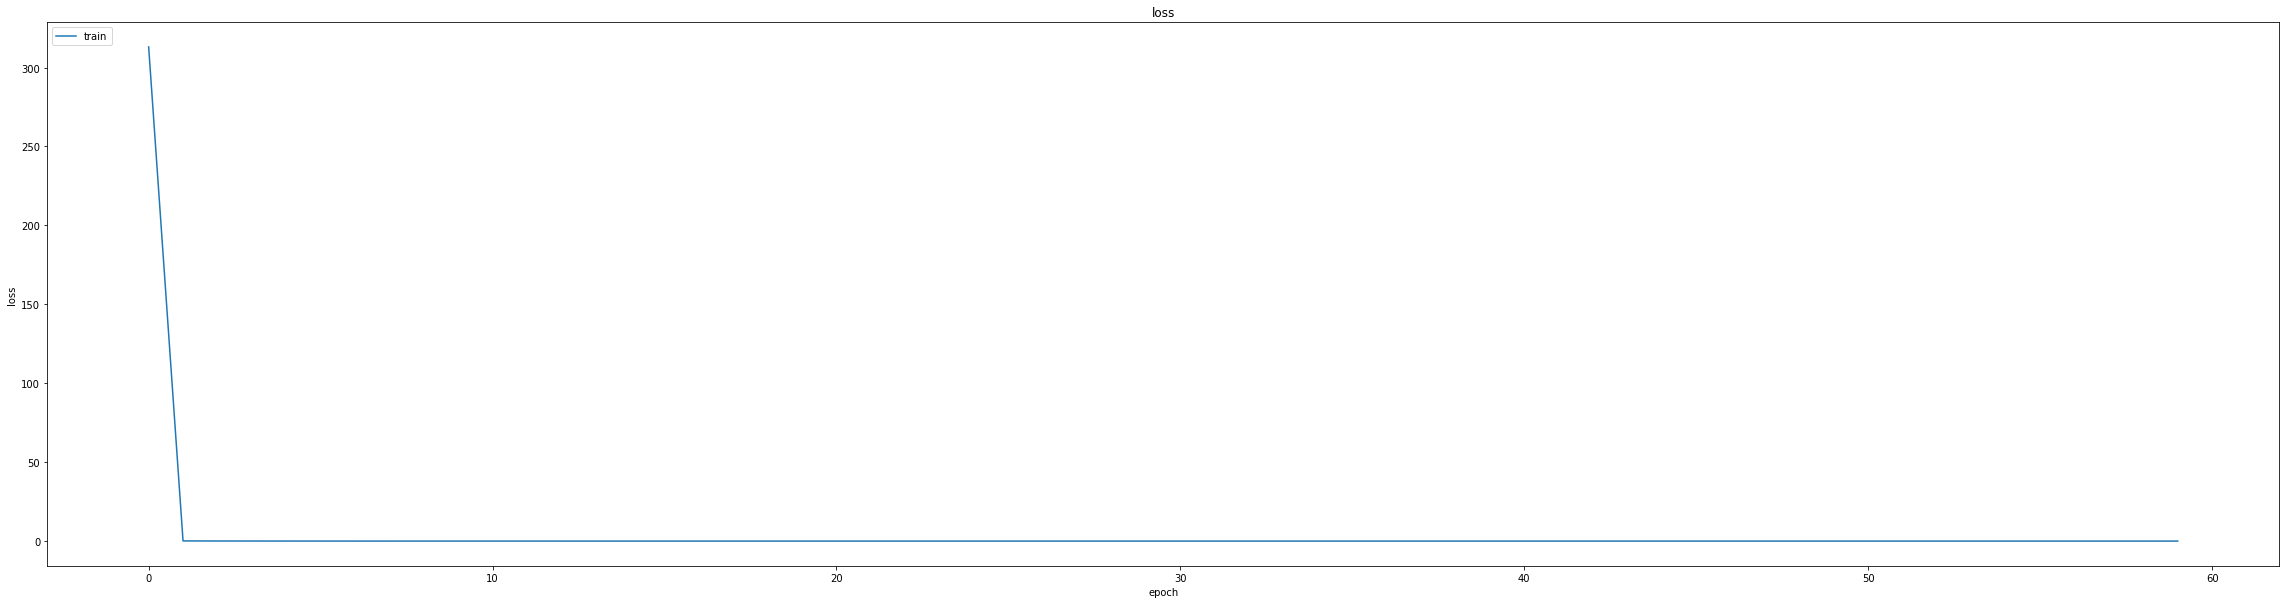

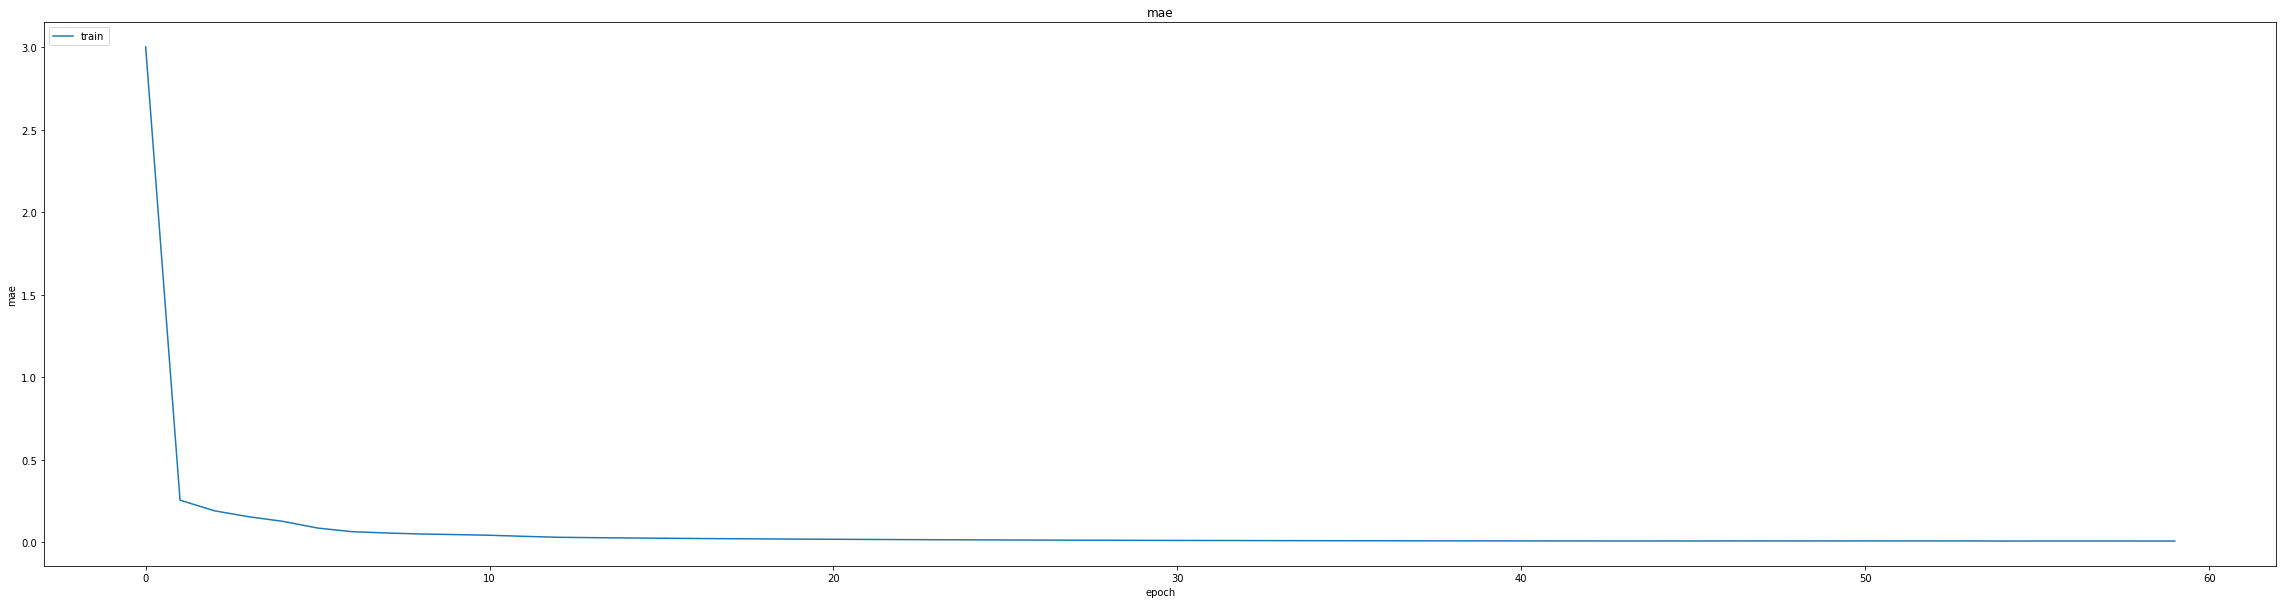

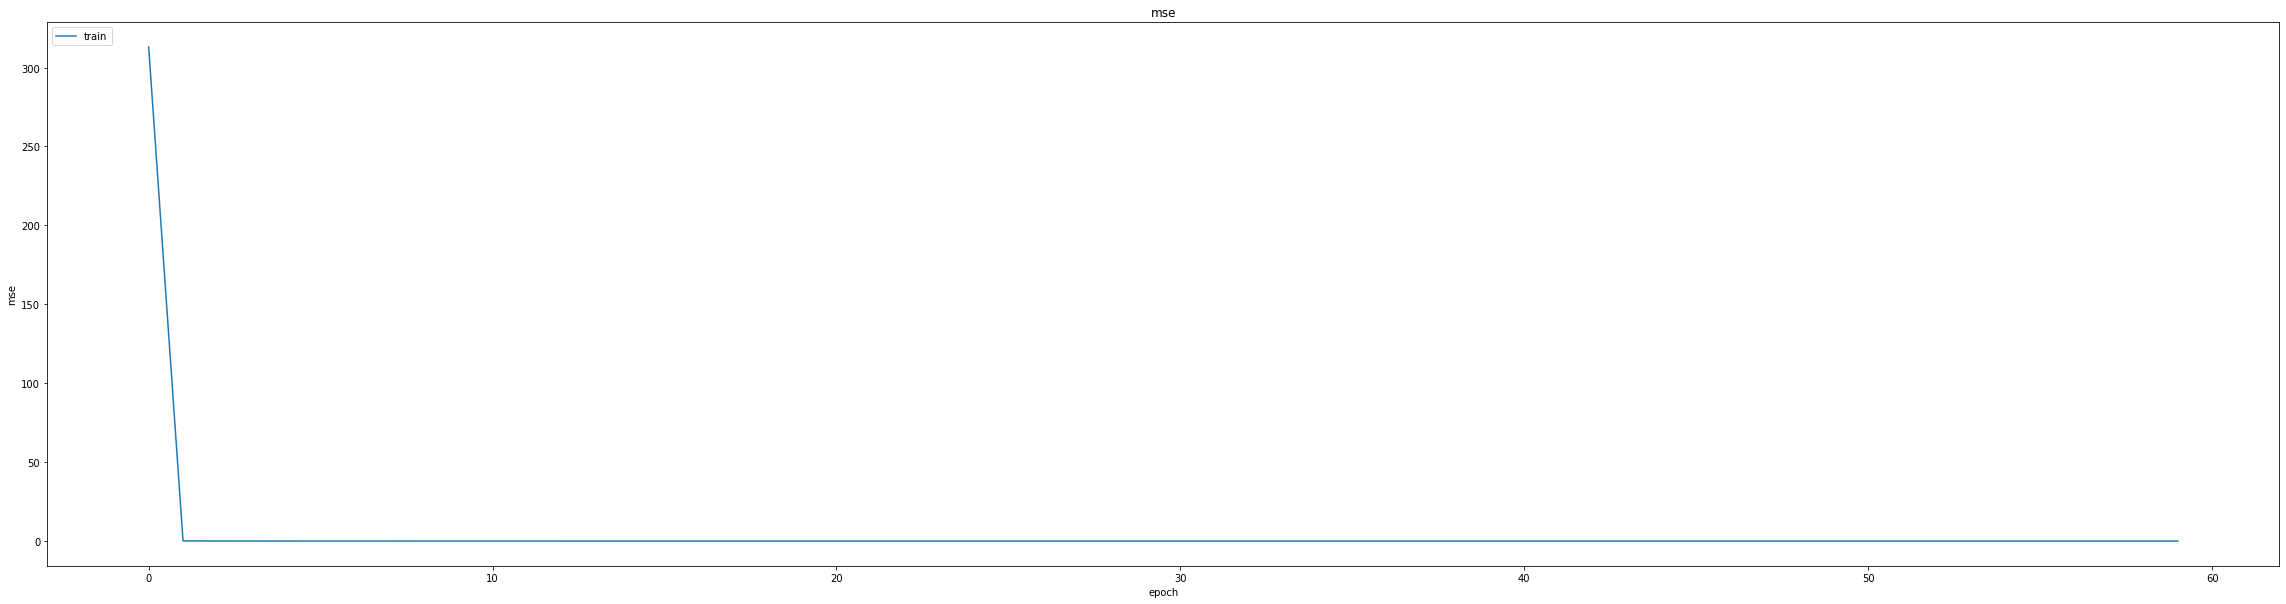

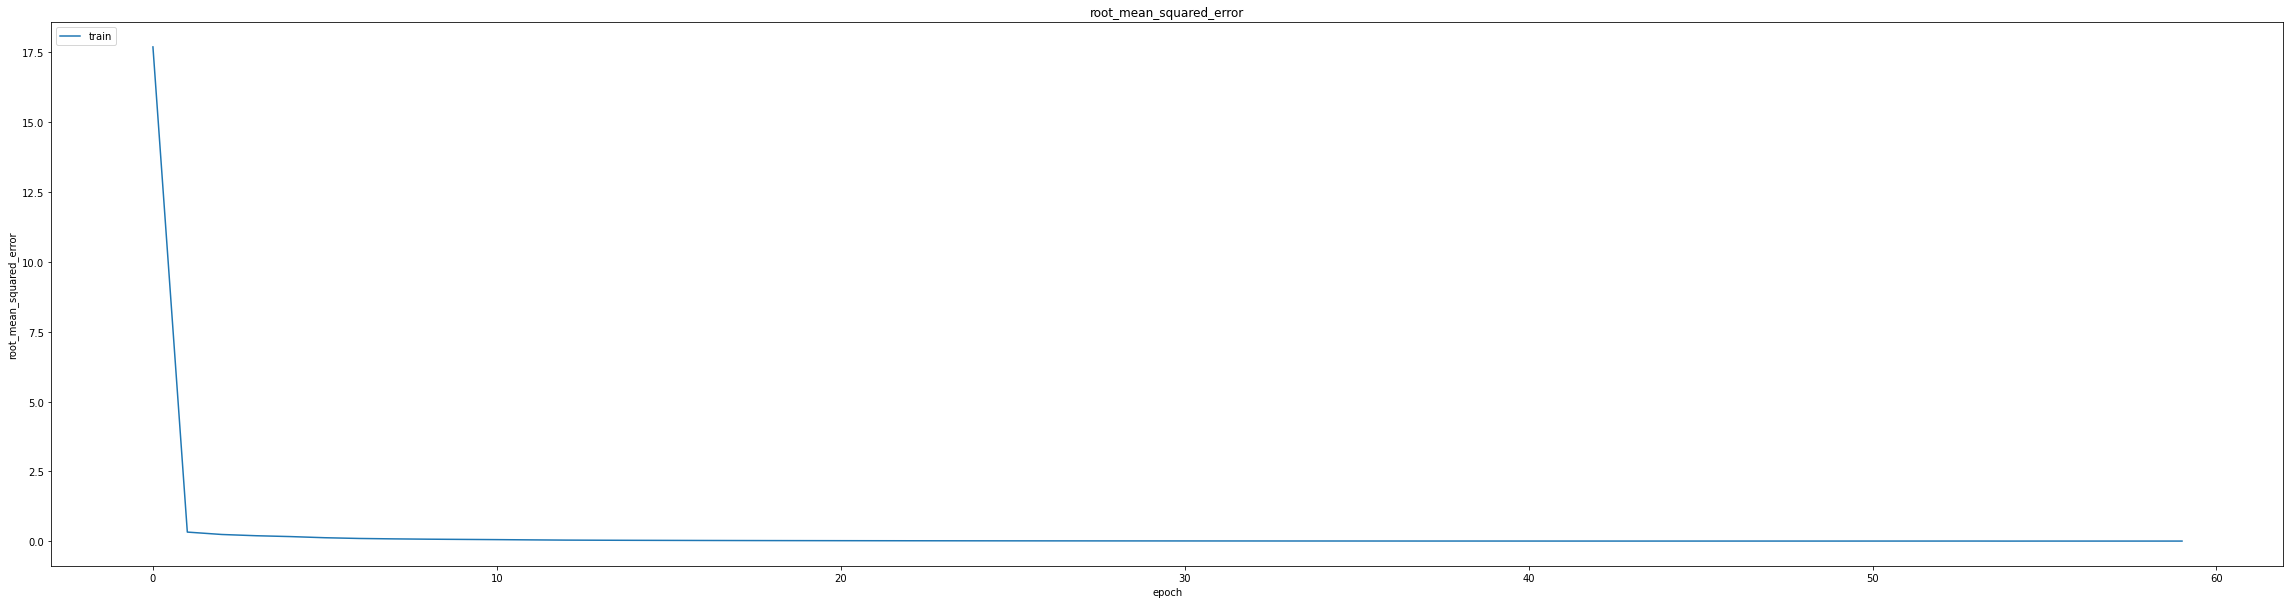

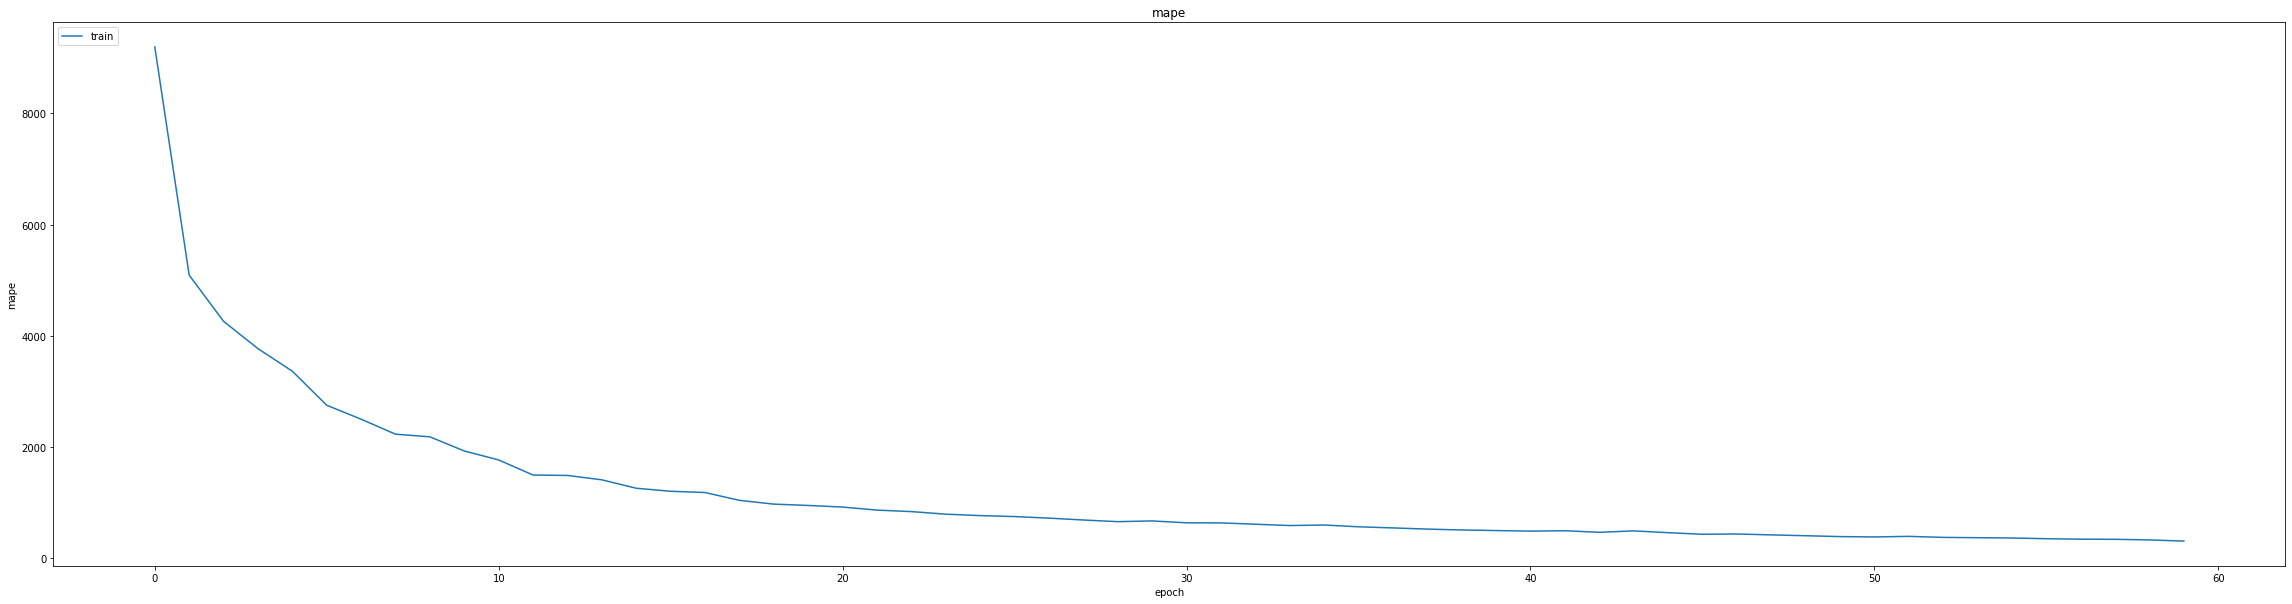

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0054671624675393105
0.007369747385382652
1044/1044 [==============================] - 4s 3ms/step
0.9979989781244056


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

402/405 [============================>.] - ETA: 0s - loss: 8.8336e-04 - mae: 0.0118 - mse: 8.8336e-04 - root_mean_squared_error: 0.0297 - mape: 417.0381
Epoch 1: val_mse did not improve from 0.00005
405/405 [==============================] - 10s 18ms/step - loss: 8.7722e-04 - mae: 0.0118 - mse: 8.7722e-04 - root_mean_squared_error: 0.0296 - mape: 413.9854 - val_loss: 1.0557e-04 - val_mae: 0.0088 - val_mse: 1.0557e-04 - val_root_mean_squared_error: 0.0103 - val_mape: 1913.0123 - lr: 0.0010
Epoch 2/20
402/405 [============================>.] - ETA: 0s - loss: 4.0970e-05 - mae: 0.0049 - mse: 4.0970e-05 - root_mean_squared_error: 0.0064 - mape: 377.0587
Epoch 2: val_mse did not improve from 0.00005
405/405 [==============================] - 7s 16ms/step - loss: 4.0967e-05 - mae: 0.0049 - mse: 4.0967e-05 - root_mean_squared_error: 0.0064 - mape: 374.2988 - val_loss: 1.2293e-04 - val_mae: 0.0098 - val_mse: 1.2293e-04 - val_root_mean_squared_error: 0.0111 - val_mape: 1567.4263 - lr: 0.0010
lr

405/405 [==============================] - 15s 36ms/step - loss: 3.6710e-05 - mae: 0.0047 - mse: 3.6710e-05 - root_mean_squared_error: 0.0061 - mape: 191.8848 - val_loss: 4.7565e-05 - val_mae: 0.0054 - val_mse: 4.7565e-05 - val_root_mean_squared_error: 0.0069 - val_mape: 1016.9171 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/20
402/405 [============================>.] - ETA: 0s - loss: 2.5080e-05 - mae: 0.0039 - mse: 2.5080e-05 - root_mean_squared_error: 0.0050 - mape: 182.0198
Epoch 11: val_mse improved from 0.00005 to 0.00004, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 2.5171e-05 - mae: 0.0039 - mse: 2.5171e-05 - root_mean_squared_error: 0.0050 - mape: 180.6886 - val_loss: 4.2939e-05 - val_mae: 0.0048 - val_mse: 4.2939e-05 - val_root_mean_squared_error: 0.0066 - val_mape: 1033.9272 - lr: 5.9049e-04
Epoch 12/20
404/405 [============================>.] - ETA: 0s - loss: 3.5116e-05 - mae: 0.0045 - mse: 3.5116e-05 - root_mean_squared_error: 0.0059 - mape: 182.9476
Epoch 12: val_mse did not improve from 0.00004
405/405 [==============================] - 6s 16ms/step - loss: 3.5093e-05 - mae: 0.0045 - mse: 3.5093e-05 - root_mean_squared_error: 0.0059 - mape: 182.5073 - val_loss: 9.2189e-05 - val_mae: 0.0086 - val_mse: 9.2189e-05 - val_root_mean_squared_error: 0.0096 - val_mape: 1026.1313 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/20
405/405 [==============================] - ETA: 0s - loss: 2.2445e-05 - mae: 0.0036 - mse: 2.2445e-05 - root_mean_squared_error: 0.0047 - mape:

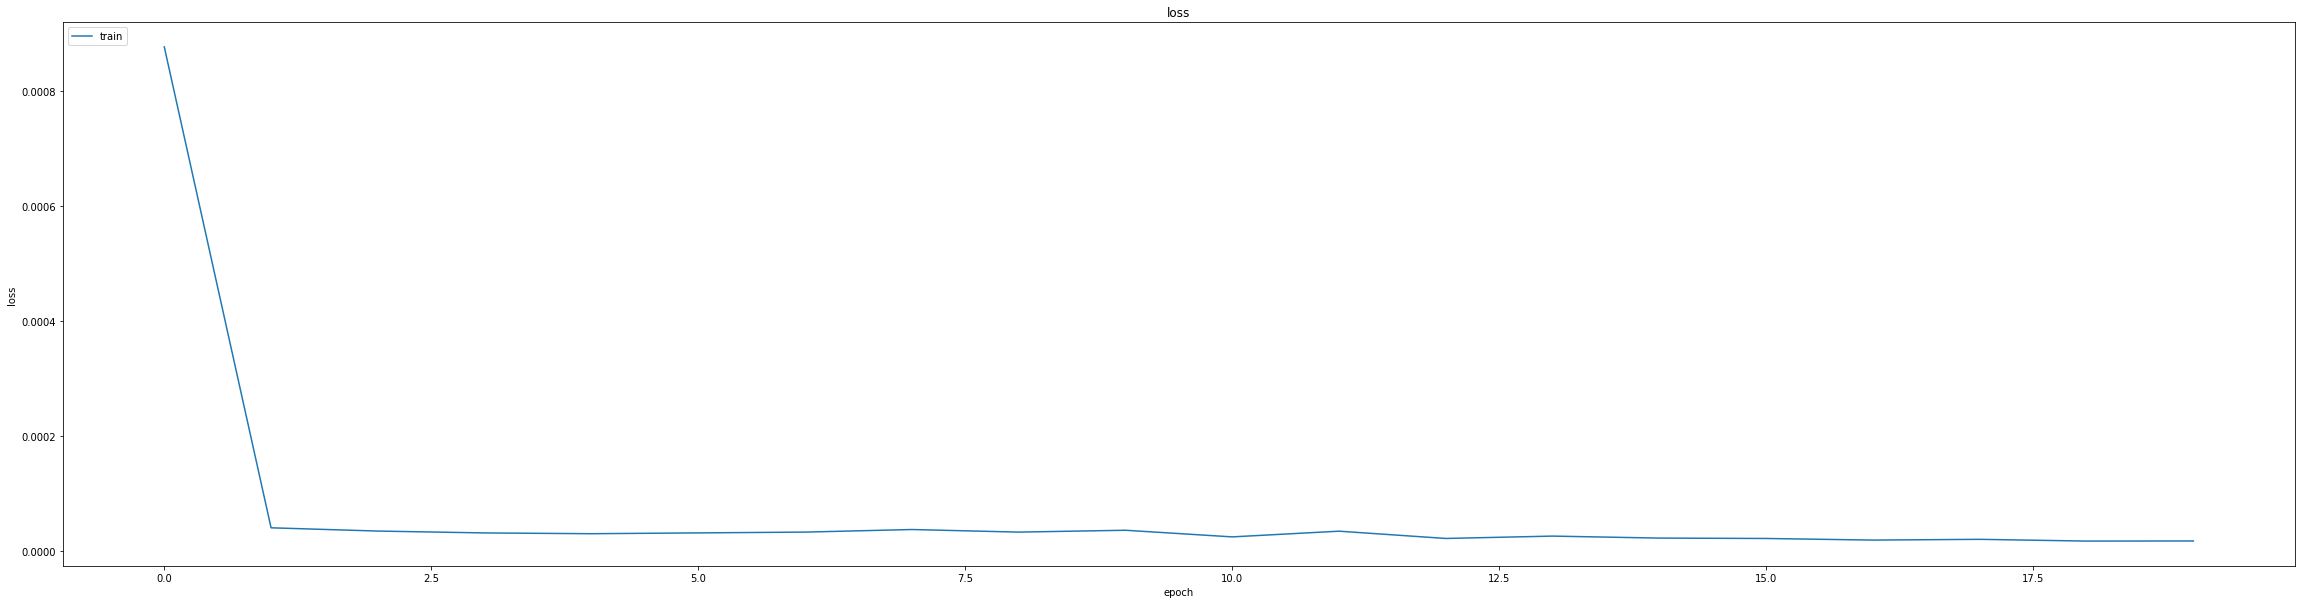

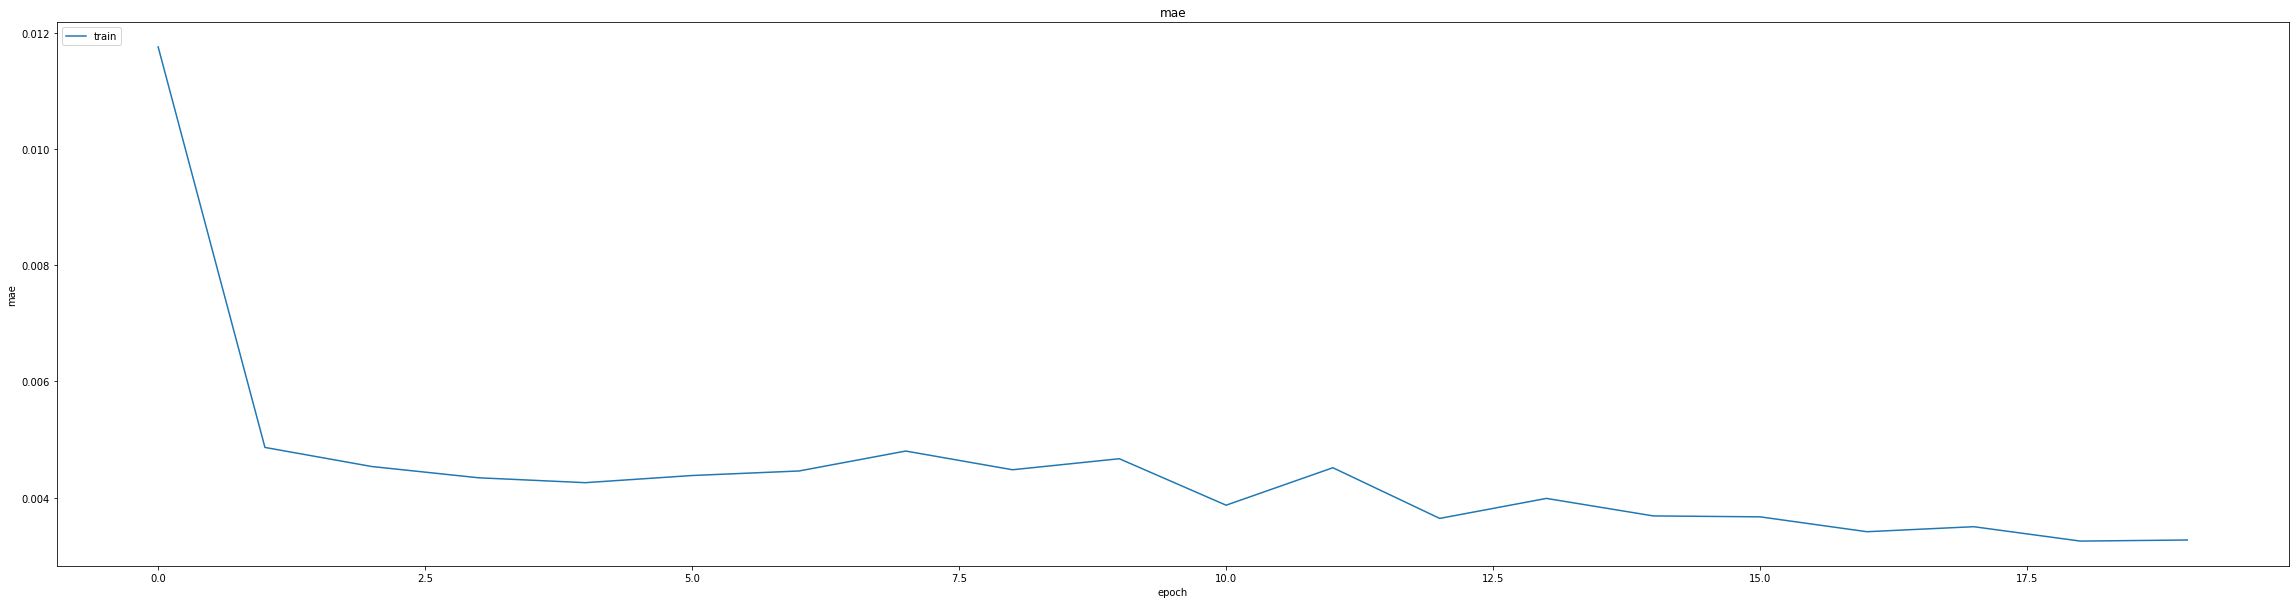

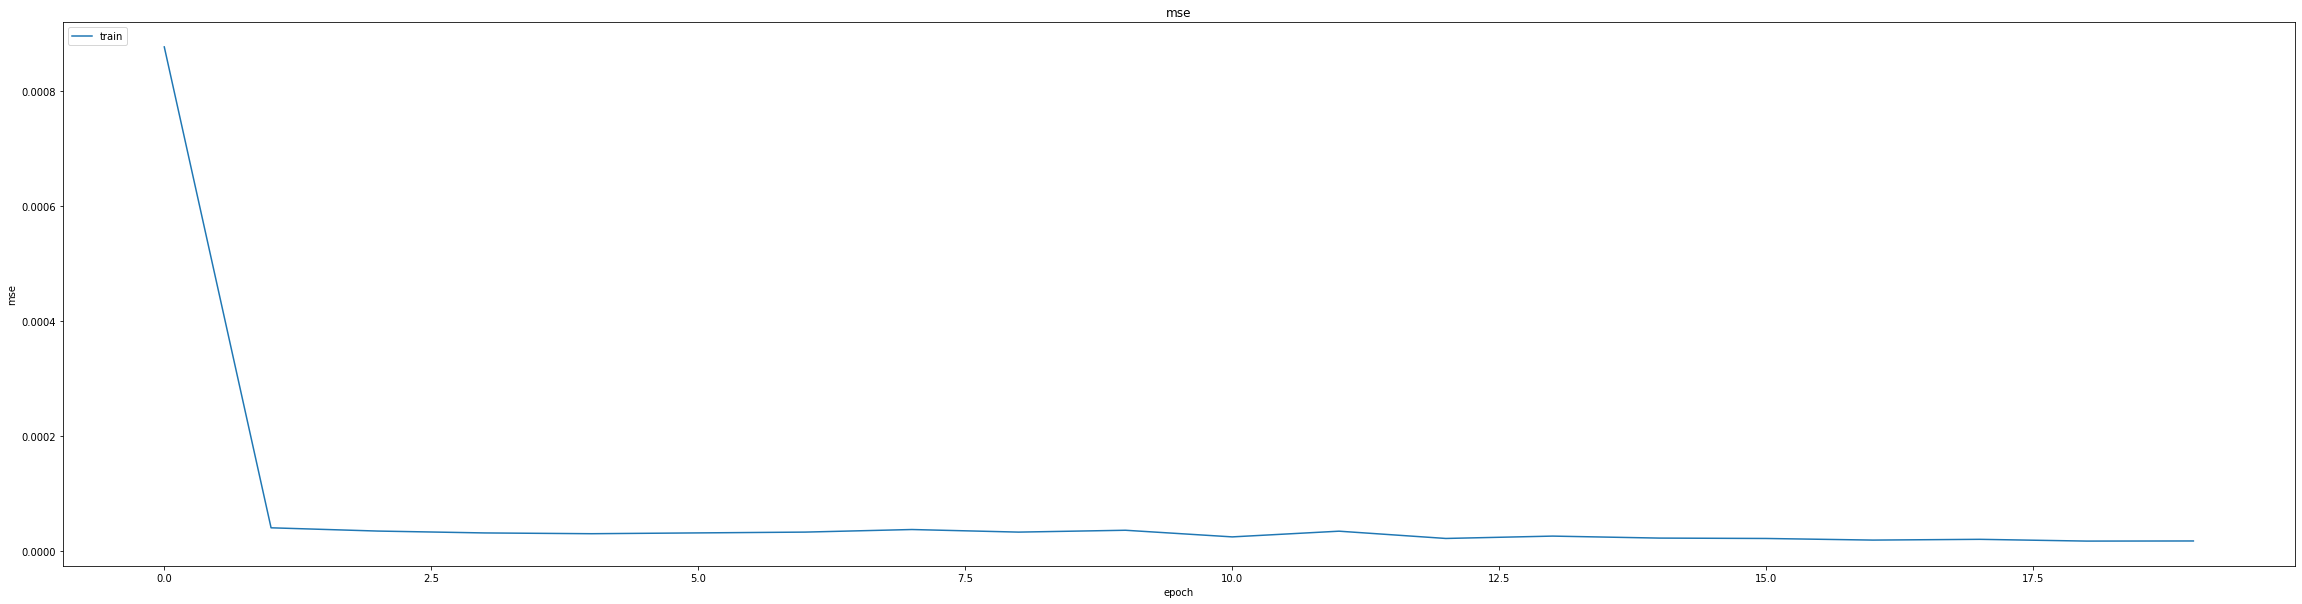

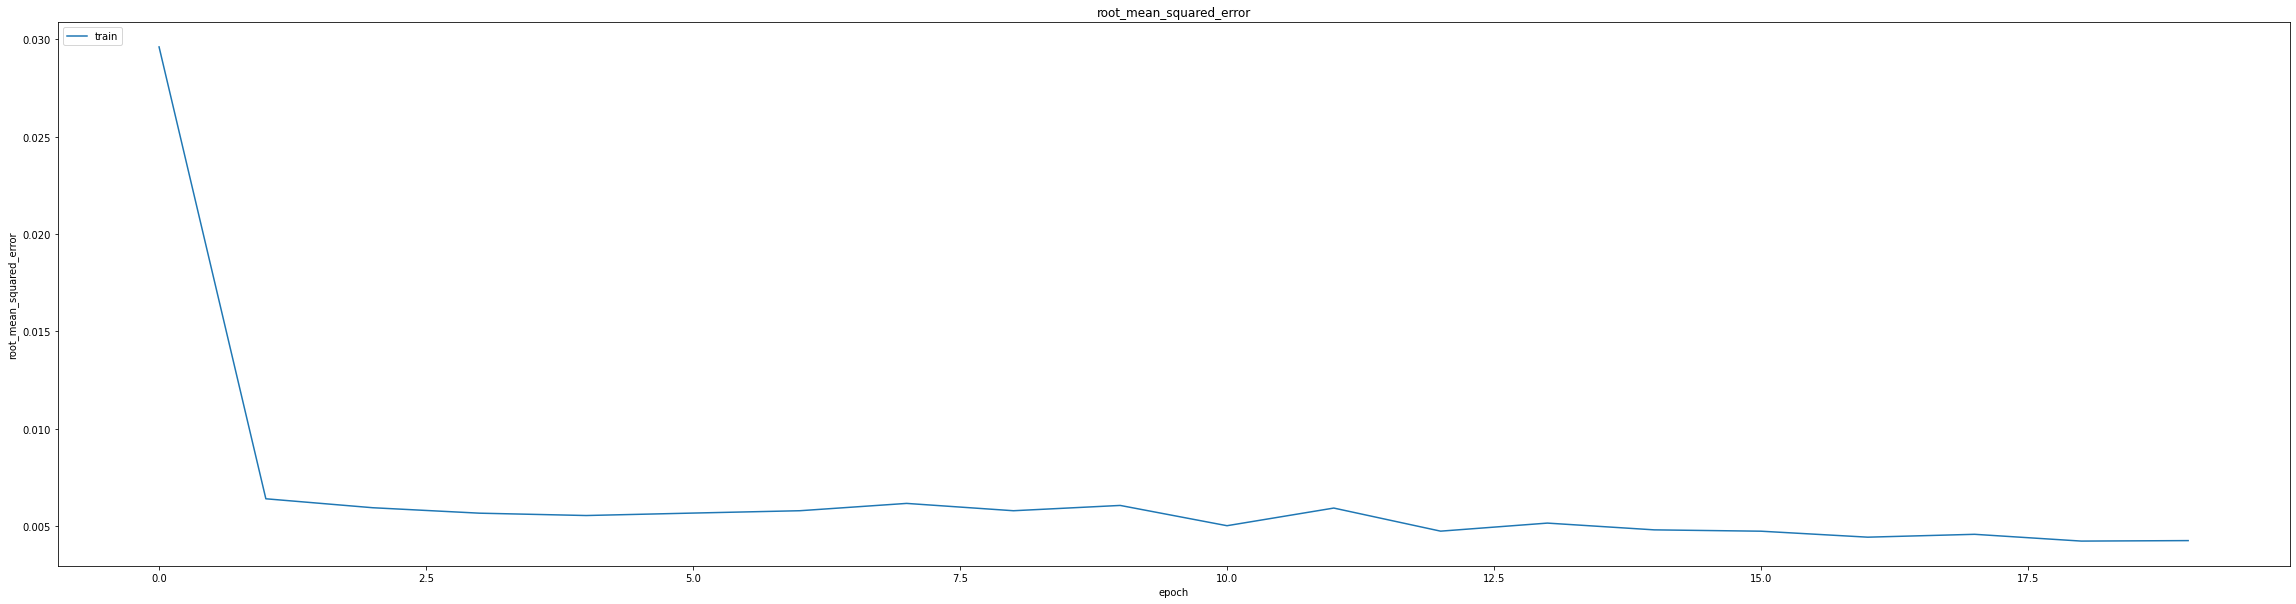

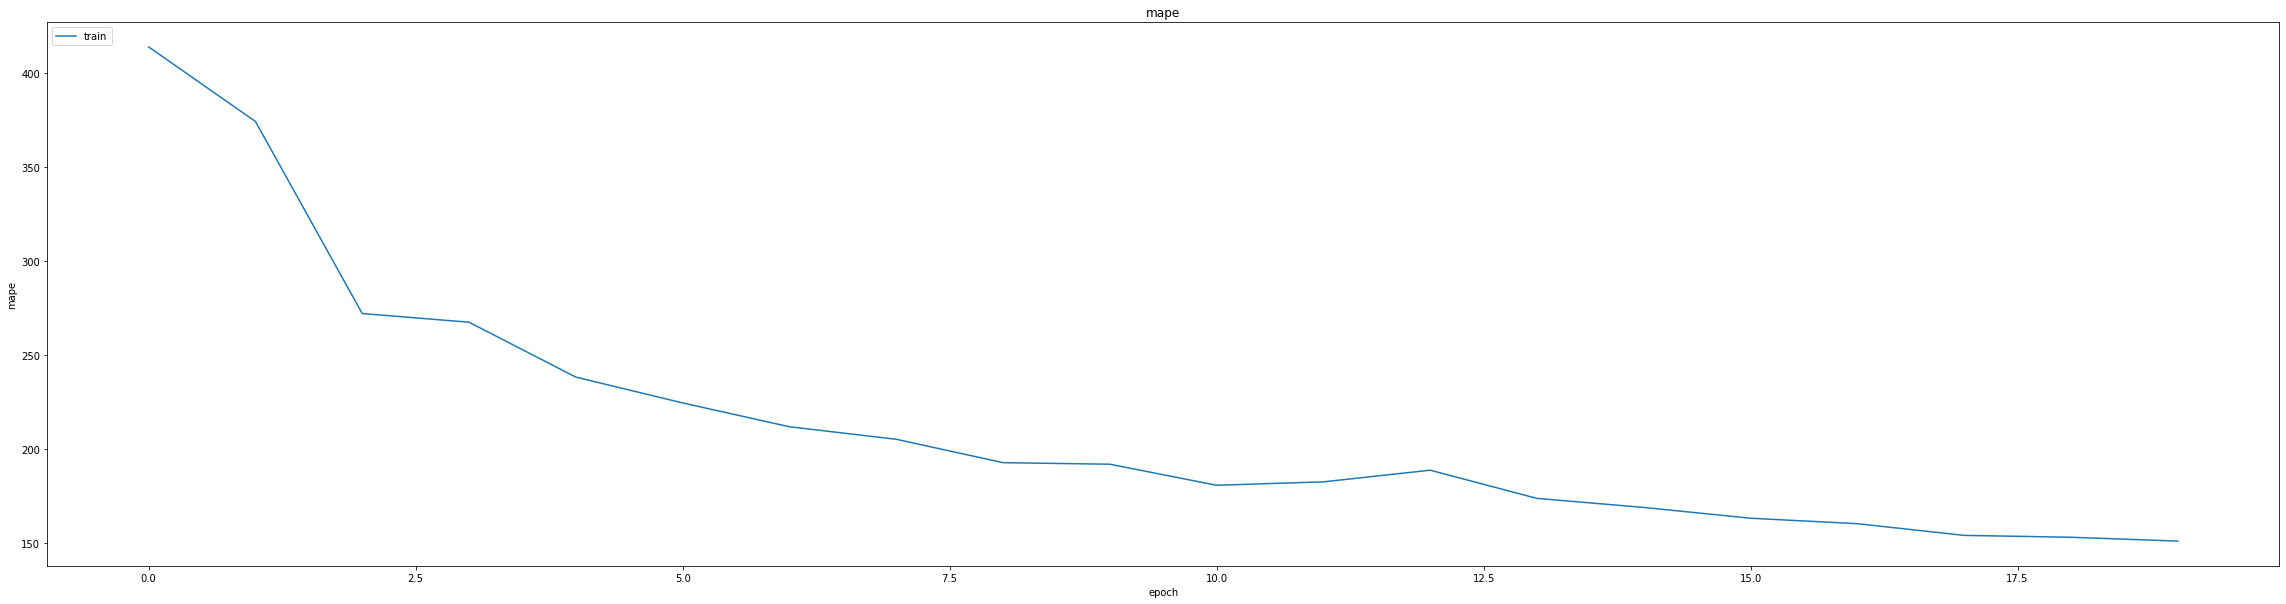

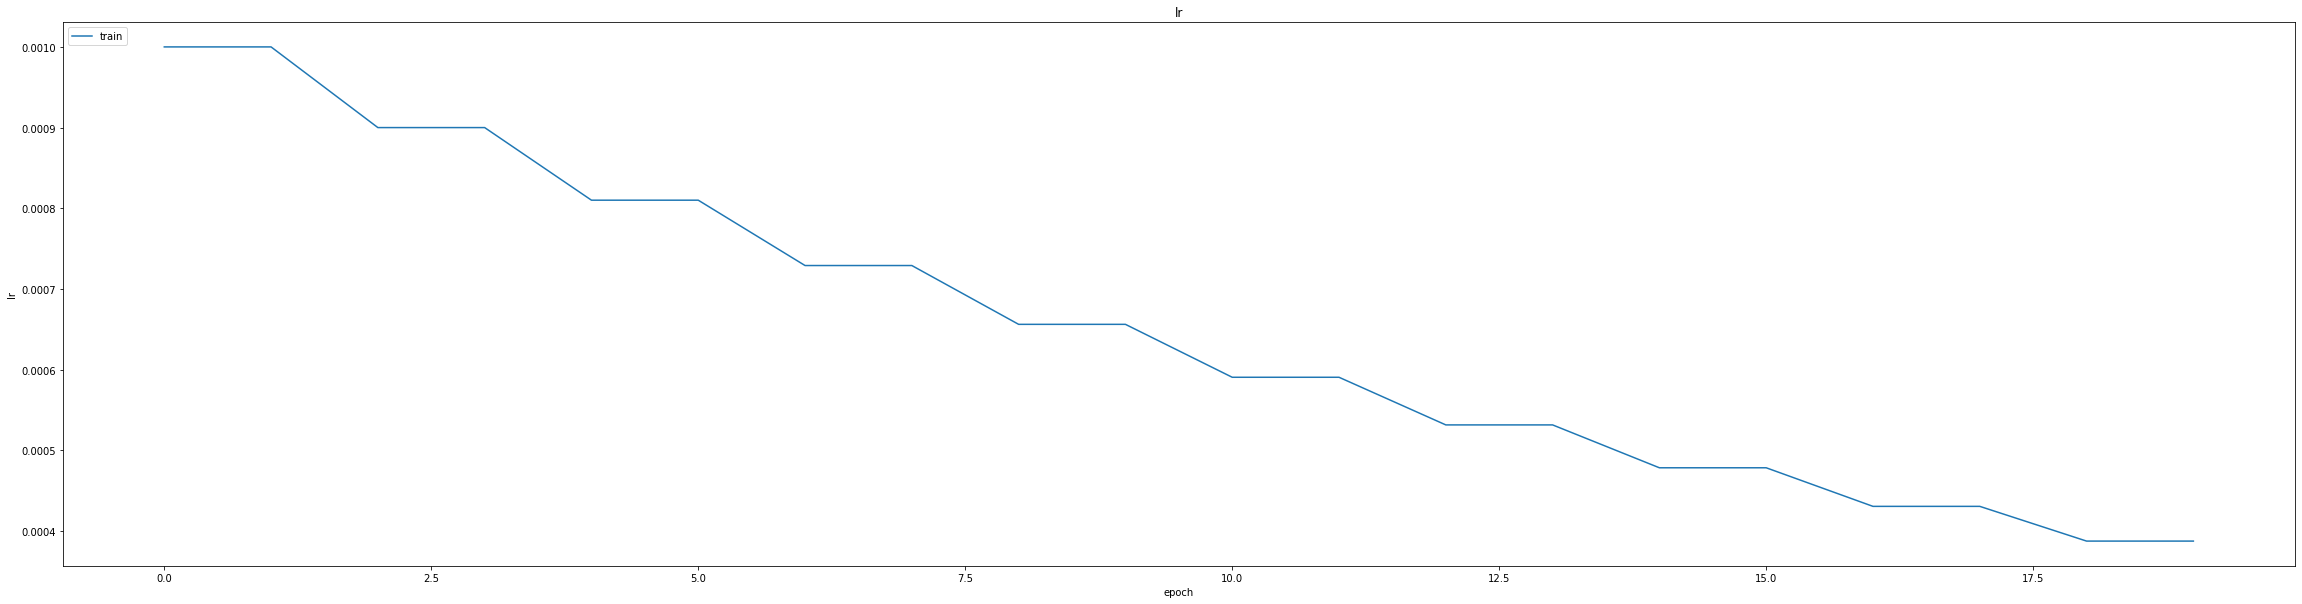

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.00480132969096303
0.0065528093837201595
1044/1044 [==============================] - 4s 3ms/step
0.9955907062743274


1044/1044 [==============================] - 3s 3ms/step


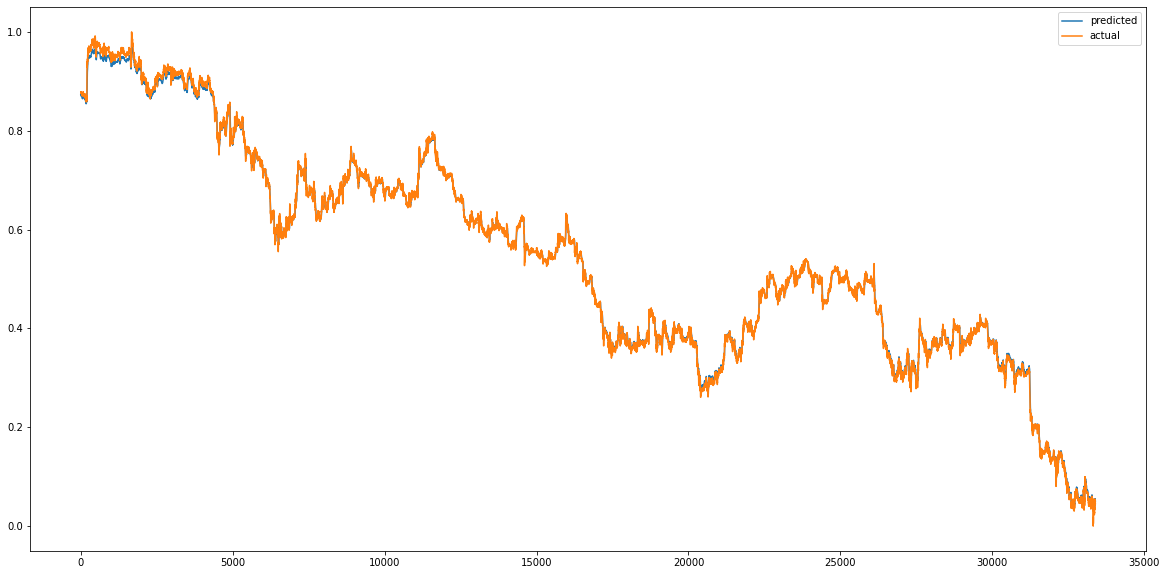

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


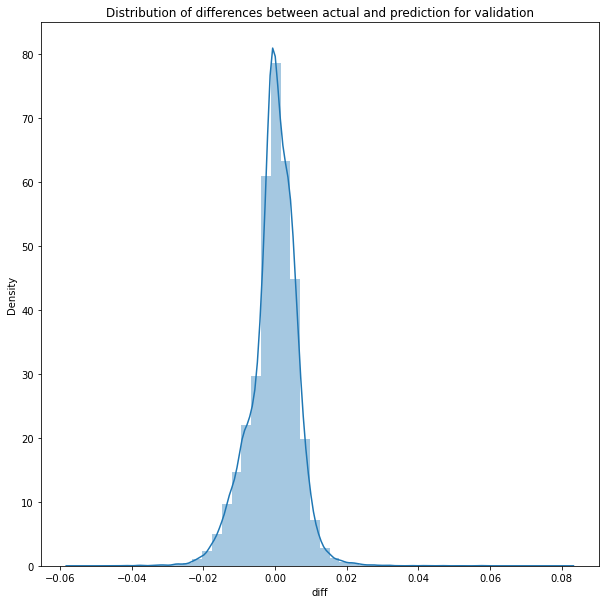

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1044/1044 [==============================] - 3s 3ms/step


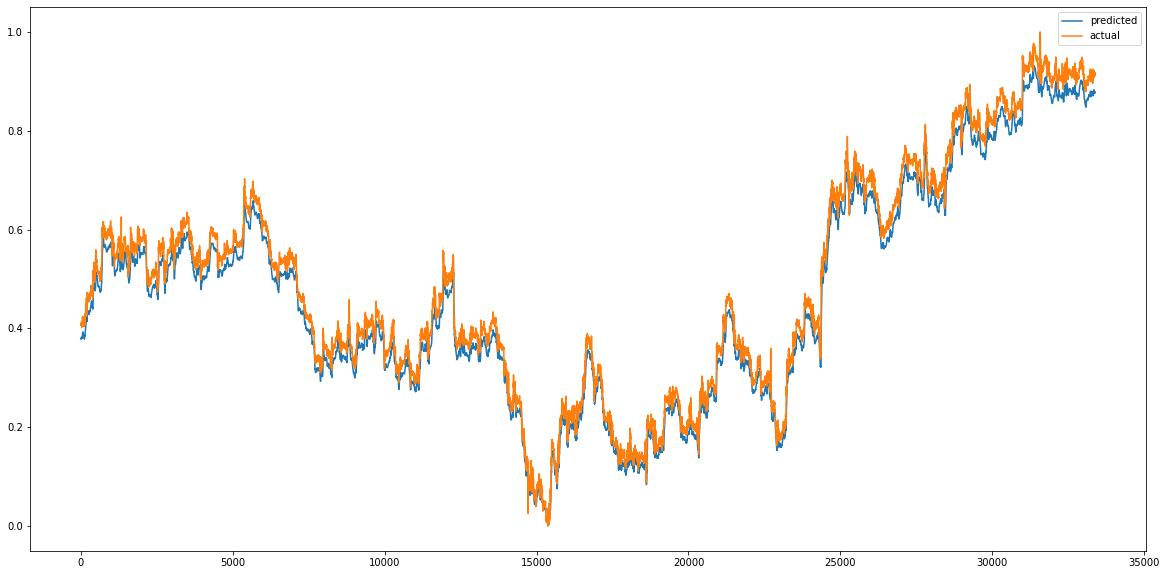

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


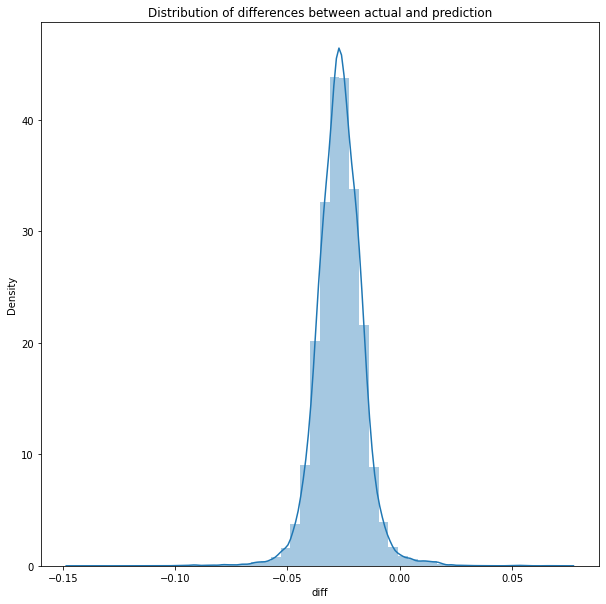

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0008188554586673251
RMSE :  0.028615650589621847
MAE :  0.02692227623570232
1044/1044 [==============================] - 3s 3ms/step
R2_Score  : 0.9843582565122019


count    33392.000000
mean        -0.026691
std          0.010318
min         -0.144668
25%         -0.032699
50%         -0.026717
75%         -0.020674
max          0.073465
Name: diff, dtype: float64

**CNN_GRU_MODEL**

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 gru_2 (GRU)                 (None, 24, 256)           247296    
                                                                 
 dropout_4 (Dropout)         (None, 24, 256)           0         
                                                                 
 gru_3 (GRU)                 (None, 64)                61824     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
403/405 [============================>.] - ETA: 0s - loss: 251.4369 - mae: 1.9649 - mse: 251.4369 - root_mean_squared_error: 15.8568 - mape: 12282.5391
Epoch 1: val_mse improved from inf to 0.00194, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 16s 32ms/step - loss: 250.2081 - mae: 1.9555 - mse: 250.2081 - root_mean_squared_error: 15.8180 - mape: 12222.6016 - val_loss: 0.0019 - val_mae: 0.0317 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0440 - val_mape: 6221.9341
Epoch 2/60
402/405 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0328 - mse: 0.0019 - root_mean_squared_error: 0.0439 - mape: 1401.2548
Epoch 2: val_mse improved from 0.00194 to 0.00162, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 0.0019 - mae: 0.0327 - mse: 0.0019 - root_mean_squared_error: 0.0438 - mape: 1391.0188 - val_loss: 0.0016 - val_mae: 0.0333 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0402 - val_mape: 5248.4761
Epoch 3/60
405/405 [==============================] - ETA: 0s - loss: 9.9062e-04 - mae: 0.0234 - mse: 9.9062e-04 - root_mean_squared_error: 0.0315 - mape: 1095.9390
Epoch 3: val_mse improved from 0.00162 to 0.00147, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 12s 30ms/step - loss: 9.9062e-04 - mae: 0.0234 - mse: 9.9062e-04 - root_mean_squared_error: 0.0315 - mape: 1095.9390 - val_loss: 0.0015 - val_mae: 0.0346 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0384 - val_mape: 4723.2803
Epoch 4/60
404/405 [============================>.] - ETA: 0s - loss: 6.9304e-04 - mae: 0.0196 - mse: 6.9304e-04 - root_mean_squared_error: 0.0263 - mape: 1092.4724
Epoch 4: val_mse improved from 0.00147 to 0.00128, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 6.9268e-04 - mae: 0.0196 - mse: 6.9268e-04 - root_mean_squared_error: 0.0263 - mape: 1089.8447 - val_loss: 0.0013 - val_mae: 0.0324 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0358 - val_mape: 4433.6240
Epoch 5/60
404/405 [============================>.] - ETA: 0s - loss: 5.3288e-04 - mae: 0.0173 - mse: 5.3288e-04 - root_mean_squared_error: 0.0231 - mape: 964.7721
Epoch 5: val_mse improved from 0.00128 to 0.00111, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 5.3278e-04 - mae: 0.0173 - mse: 5.3278e-04 - root_mean_squared_error: 0.0231 - mape: 962.4568 - val_loss: 0.0011 - val_mae: 0.0303 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0333 - val_mape: 4159.3086
Epoch 6/60
402/405 [============================>.] - ETA: 0s - loss: 4.2386e-04 - mae: 0.0154 - mse: 4.2386e-04 - root_mean_squared_error: 0.0206 - mape: 931.4988
Epoch 6: val_mse improved from 0.00111 to 0.00101, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 12s 31ms/step - loss: 4.2375e-04 - mae: 0.0154 - mse: 4.2375e-04 - root_mean_squared_error: 0.0206 - mape: 924.6989 - val_loss: 0.0010 - val_mae: 0.0289 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0318 - val_mape: 3937.0762
Epoch 7/60
404/405 [============================>.] - ETA: 0s - loss: 3.5151e-04 - mae: 0.0141 - mse: 3.5151e-04 - root_mean_squared_error: 0.0187 - mape: 894.9725
Epoch 7: val_mse improved from 0.00101 to 0.00081, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 3.5163e-04 - mae: 0.0141 - mse: 3.5163e-04 - root_mean_squared_error: 0.0188 - mape: 892.8255 - val_loss: 8.1029e-04 - val_mae: 0.0256 - val_mse: 8.1029e-04 - val_root_mean_squared_error: 0.0285 - val_mape: 3753.8821
Epoch 8/60
403/405 [============================>.] - ETA: 0s - loss: 3.0037e-04 - mae: 0.0130 - mse: 3.0037e-04 - root_mean_squared_error: 0.0173 - mape: 852.6329
Epoch 8: val_mse did not improve from 0.00081
405/405 [==============================] - 6s 14ms/step - loss: 3.0012e-04 - mae: 0.0130 - mse: 3.0012e-04 - root_mean_squared_error: 0.0173 - mape: 848.4812 - val_loss: 8.1761e-04 - val_mae: 0.0261 - val_mse: 8.1761e-04 - val_root_mean_squared_error: 0.0286 - val_mape: 3587.0234
Epoch 9/60
405/405 [==============================] - ETA: 0s - loss: 2.6413e-04 - mae: 0.0123 - mse: 2.6413e-04 - root_mean_squared_error: 0.0163 - mape: 799.4409
Epoch 9: val_mse improved from 0.00081 to 0.00075, saving model

405/405 [==============================] - 13s 31ms/step - loss: 2.6413e-04 - mae: 0.0123 - mse: 2.6413e-04 - root_mean_squared_error: 0.0163 - mape: 799.4409 - val_loss: 7.5210e-04 - val_mae: 0.0250 - val_mse: 7.5210e-04 - val_root_mean_squared_error: 0.0274 - val_mape: 3450.4277
Epoch 10/60
402/405 [============================>.] - ETA: 0s - loss: 2.3031e-04 - mae: 0.0114 - mse: 2.3031e-04 - root_mean_squared_error: 0.0152 - mape: 755.3520
Epoch 10: val_mse improved from 0.00075 to 0.00061, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 2.3015e-04 - mae: 0.0114 - mse: 2.3015e-04 - root_mean_squared_error: 0.0152 - mape: 749.8192 - val_loss: 6.0792e-04 - val_mae: 0.0222 - val_mse: 6.0792e-04 - val_root_mean_squared_error: 0.0247 - val_mape: 3325.0686
Epoch 11/60
403/405 [============================>.] - ETA: 0s - loss: 2.0488e-04 - mae: 0.0108 - mse: 2.0488e-04 - root_mean_squared_error: 0.0143 - mape: 793.7306
Epoch 11: val_mse did not improve from 0.00061
405/405 [==============================] - 6s 14ms/step - loss: 2.0493e-04 - mae: 0.0108 - mse: 2.0493e-04 - root_mean_squared_error: 0.0143 - mape: 789.8737 - val_loss: 6.2658e-04 - val_mae: 0.0228 - val_mse: 6.2658e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 3206.3779
Epoch 12/60
403/405 [============================>.] - ETA: 0s - loss: 1.8156e-04 - mae: 0.0102 - mse: 1.8156e-04 - root_mean_squared_error: 0.0135 - mape: 725.9722
Epoch 12: val_mse did not improve from 0.00061
405/405 [====

405/405 [==============================] - 12s 30ms/step - loss: 1.4927e-04 - mae: 0.0092 - mse: 1.4927e-04 - root_mean_squared_error: 0.0122 - mape: 670.8564 - val_loss: 5.6988e-04 - val_mae: 0.0220 - val_mse: 5.6988e-04 - val_root_mean_squared_error: 0.0239 - val_mape: 2926.7246
Epoch 15/60
403/405 [============================>.] - ETA: 0s - loss: 1.3458e-04 - mae: 0.0087 - mse: 1.3458e-04 - root_mean_squared_error: 0.0116 - mape: 672.7393
Epoch 15: val_mse improved from 0.00057 to 0.00047, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 1.3452e-04 - mae: 0.0087 - mse: 1.3452e-04 - root_mean_squared_error: 0.0116 - mape: 669.4614 - val_loss: 4.6999e-04 - val_mae: 0.0197 - val_mse: 4.6999e-04 - val_root_mean_squared_error: 0.0217 - val_mape: 2868.5032
Epoch 16/60
404/405 [============================>.] - ETA: 0s - loss: 1.2415e-04 - mae: 0.0084 - mse: 1.2415e-04 - root_mean_squared_error: 0.0111 - mape: 628.8421
Epoch 16: val_mse did not improve from 0.00047
405/405 [==============================] - 6s 14ms/step - loss: 1.2408e-04 - mae: 0.0084 - mse: 1.2408e-04 - root_mean_squared_error: 0.0111 - mape: 627.3263 - val_loss: 5.7534e-04 - val_mae: 0.0222 - val_mse: 5.7534e-04 - val_root_mean_squared_error: 0.0240 - val_mape: 2806.8203
Epoch 17/60
404/405 [============================>.] - ETA: 0s - loss: 1.1251e-04 - mae: 0.0080 - mse: 1.1251e-04 - root_mean_squared_error: 0.0106 - mape: 652.7733
Epoch 17: val_mse did not improve from 0.00047
405/405 [====

405/405 [==============================] - 13s 31ms/step - loss: 7.0648e-05 - mae: 0.0063 - mse: 7.0648e-05 - root_mean_squared_error: 0.0084 - mape: 532.4642 - val_loss: 4.4901e-04 - val_mae: 0.0196 - val_mse: 4.4901e-04 - val_root_mean_squared_error: 0.0212 - val_mape: 2324.1172
Epoch 24/60
404/405 [============================>.] - ETA: 0s - loss: 6.6622e-05 - mae: 0.0062 - mse: 6.6622e-05 - root_mean_squared_error: 0.0082 - mape: 492.3361
Epoch 24: val_mse did not improve from 0.00045
405/405 [==============================] - 6s 14ms/step - loss: 6.6590e-05 - mae: 0.0062 - mse: 6.6590e-05 - root_mean_squared_error: 0.0082 - mape: 491.1490 - val_loss: 5.2643e-04 - val_mae: 0.0216 - val_mse: 5.2643e-04 - val_root_mean_squared_error: 0.0229 - val_mape: 2254.6196
Epoch 25/60
402/405 [============================>.] - ETA: 0s - loss: 6.1503e-05 - mae: 0.0059 - mse: 6.1503e-05 - root_mean_squared_error: 0.0078 - mape: 483.0363
Epoch 25: val_mse did not improve from 0.00045
405/405 [====

405/405 [==============================] - 12s 30ms/step - loss: 4.8637e-05 - mae: 0.0053 - mse: 4.8637e-05 - root_mean_squared_error: 0.0070 - mape: 412.4881 - val_loss: 3.8391e-04 - val_mae: 0.0184 - val_mse: 3.8391e-04 - val_root_mean_squared_error: 0.0196 - val_mape: 1913.4324
Epoch 31/60
405/405 [==============================] - ETA: 0s - loss: 4.3313e-05 - mae: 0.0050 - mse: 4.3313e-05 - root_mean_squared_error: 0.0066 - mape: 421.9268
Epoch 31: val_mse did not improve from 0.00038
405/405 [==============================] - 6s 14ms/step - loss: 4.3313e-05 - mae: 0.0050 - mse: 4.3313e-05 - root_mean_squared_error: 0.0066 - mape: 421.9268 - val_loss: 6.9013e-04 - val_mae: 0.0256 - val_mse: 6.9013e-04 - val_root_mean_squared_error: 0.0263 - val_mape: 1889.7576
Epoch 32/60
404/405 [============================>.] - ETA: 0s - loss: 4.4993e-05 - mae: 0.0051 - mse: 4.4993e-05 - root_mean_squared_error: 0.0067 - mape: 393.3445
Epoch 32: val_mse did not improve from 0.00038
405/405 [====

405/405 [==============================] - 13s 31ms/step - loss: 3.4543e-05 - mae: 0.0045 - mse: 3.4543e-05 - root_mean_squared_error: 0.0059 - mape: 349.4863 - val_loss: 3.4441e-04 - val_mae: 0.0176 - val_mse: 3.4441e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 1694.7206
Epoch 40/60
405/405 [==============================] - ETA: 0s - loss: 3.7439e-05 - mae: 0.0047 - mse: 3.7439e-05 - root_mean_squared_error: 0.0061 - mape: 329.3444
Epoch 40: val_mse did not improve from 0.00034
405/405 [==============================] - 6s 14ms/step - loss: 3.7439e-05 - mae: 0.0047 - mse: 3.7439e-05 - root_mean_squared_error: 0.0061 - mape: 329.3444 - val_loss: 3.5709e-04 - val_mae: 0.0179 - val_mse: 3.5709e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 1670.5649
Epoch 41/60
403/405 [============================>.] - ETA: 0s - loss: 3.4301e-05 - mae: 0.0045 - mse: 3.4301e-05 - root_mean_squared_error: 0.0059 - mape: 330.7895
Epoch 41: val_mse did not improve from 0.00034
405/405 [====

405/405 [==============================] - 13s 31ms/step - loss: 4.8433e-05 - mae: 0.0053 - mse: 4.8433e-05 - root_mean_squared_error: 0.0070 - mape: 269.0989 - val_loss: 2.4471e-04 - val_mae: 0.0147 - val_mse: 2.4471e-04 - val_root_mean_squared_error: 0.0156 - val_mape: 1338.3636
Epoch 57/60
403/405 [============================>.] - ETA: 0s - loss: 4.8299e-05 - mae: 0.0053 - mse: 4.8299e-05 - root_mean_squared_error: 0.0069 - mape: 270.5899
Epoch 57: val_mse did not improve from 0.00024
405/405 [==============================] - 6s 14ms/step - loss: 4.8249e-05 - mae: 0.0053 - mse: 4.8249e-05 - root_mean_squared_error: 0.0069 - mape: 269.2741 - val_loss: 4.6222e-04 - val_mae: 0.0211 - val_mse: 4.6222e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 1324.0096
Epoch 58/60
404/405 [============================>.] - ETA: 0s - loss: 4.7902e-05 - mae: 0.0052 - mse: 4.7902e-05 - root_mean_squared_error: 0.0069 - mape: 269.7954
Epoch 58: val_mse did not improve from 0.00024
405/405 [====

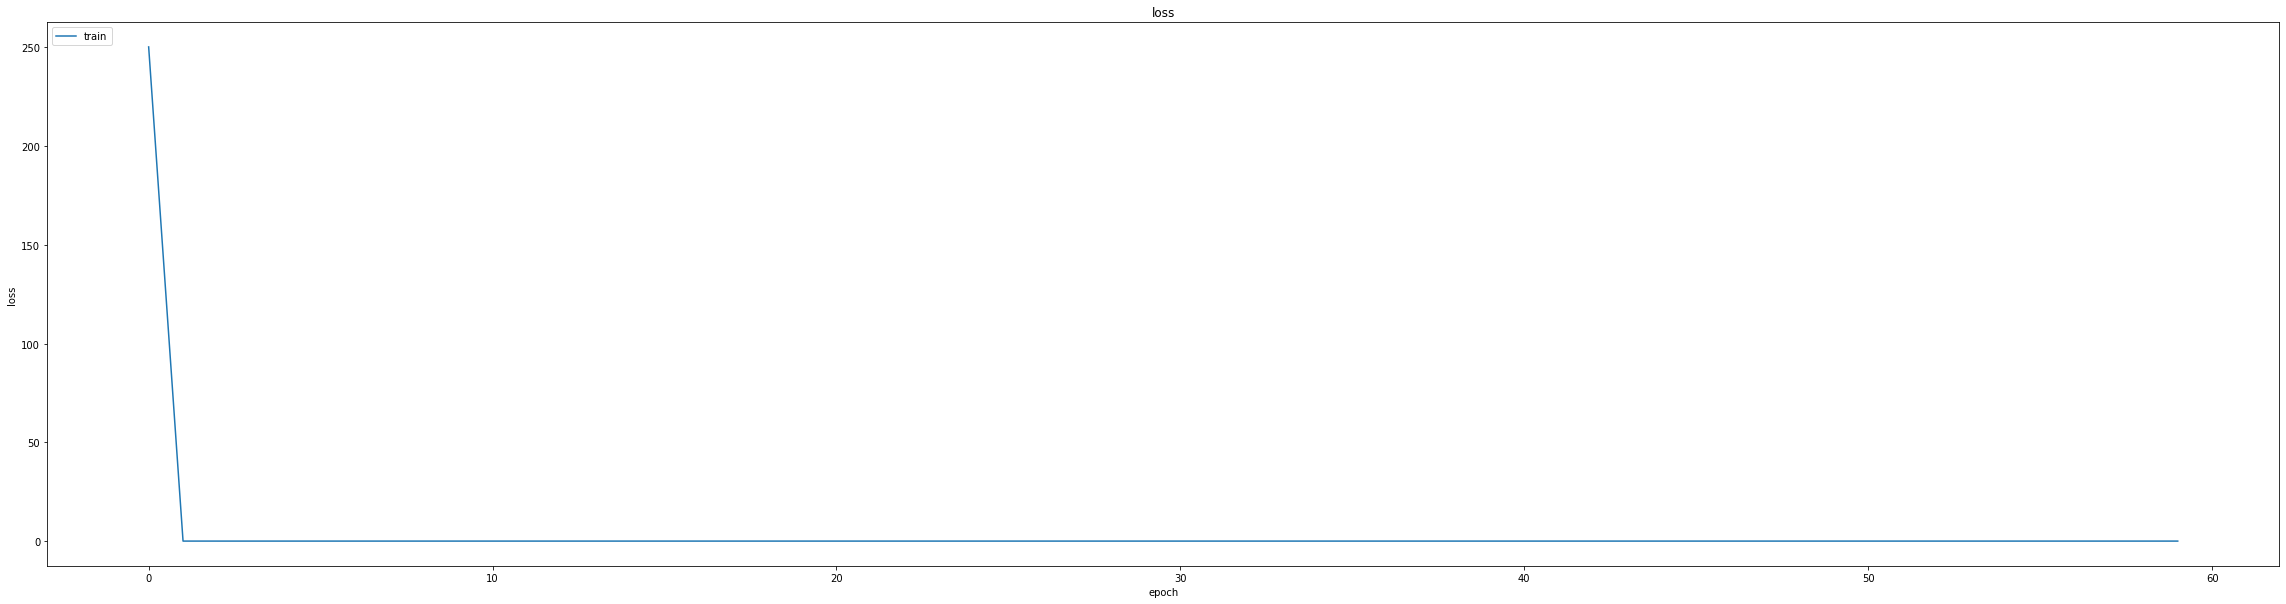

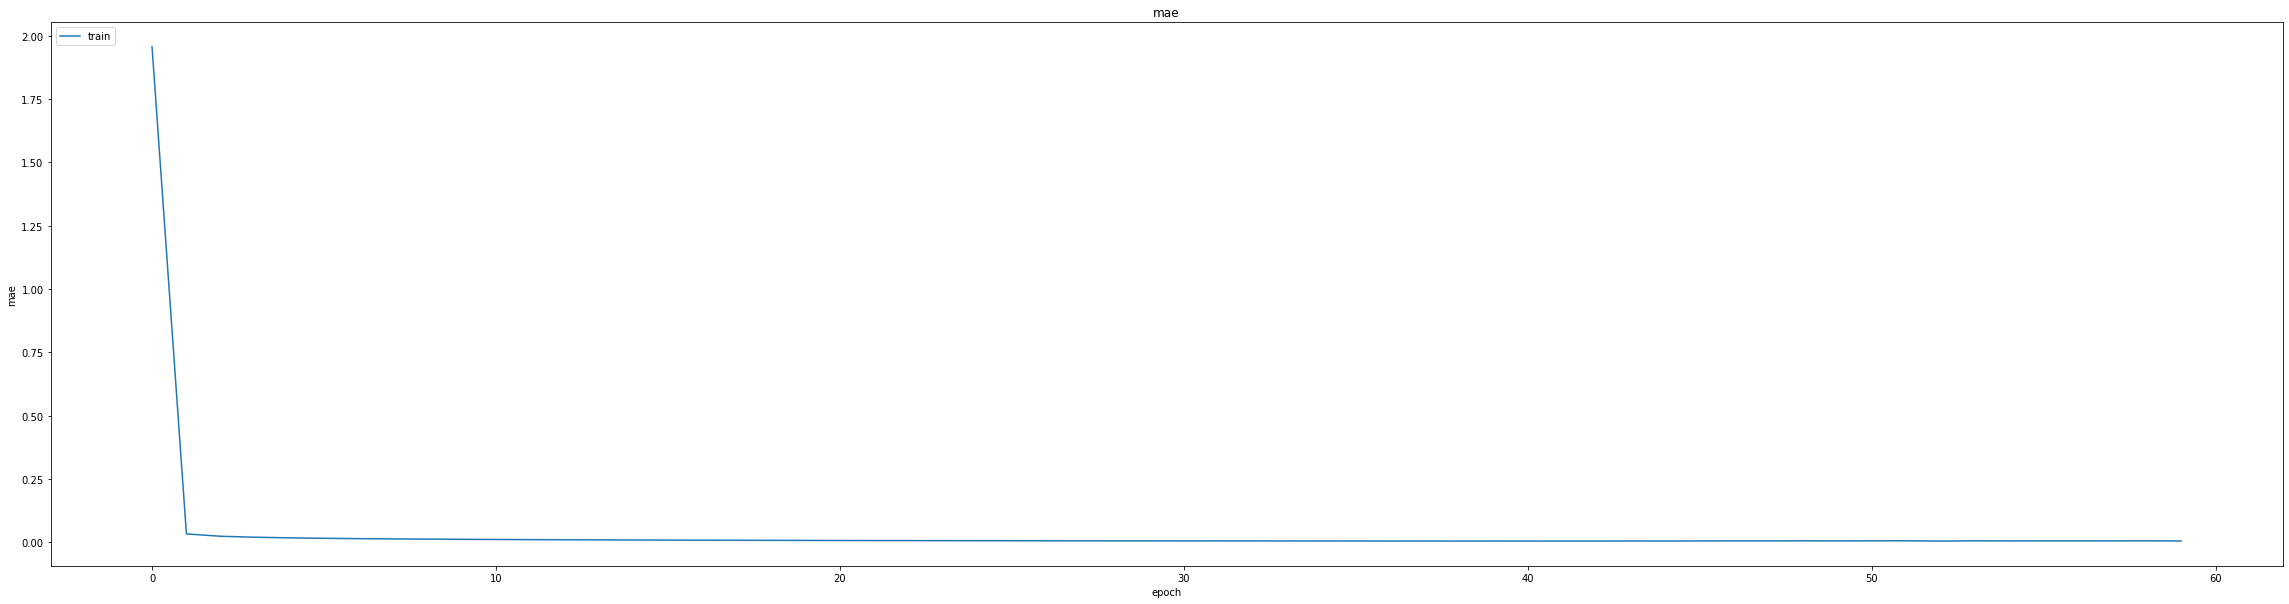

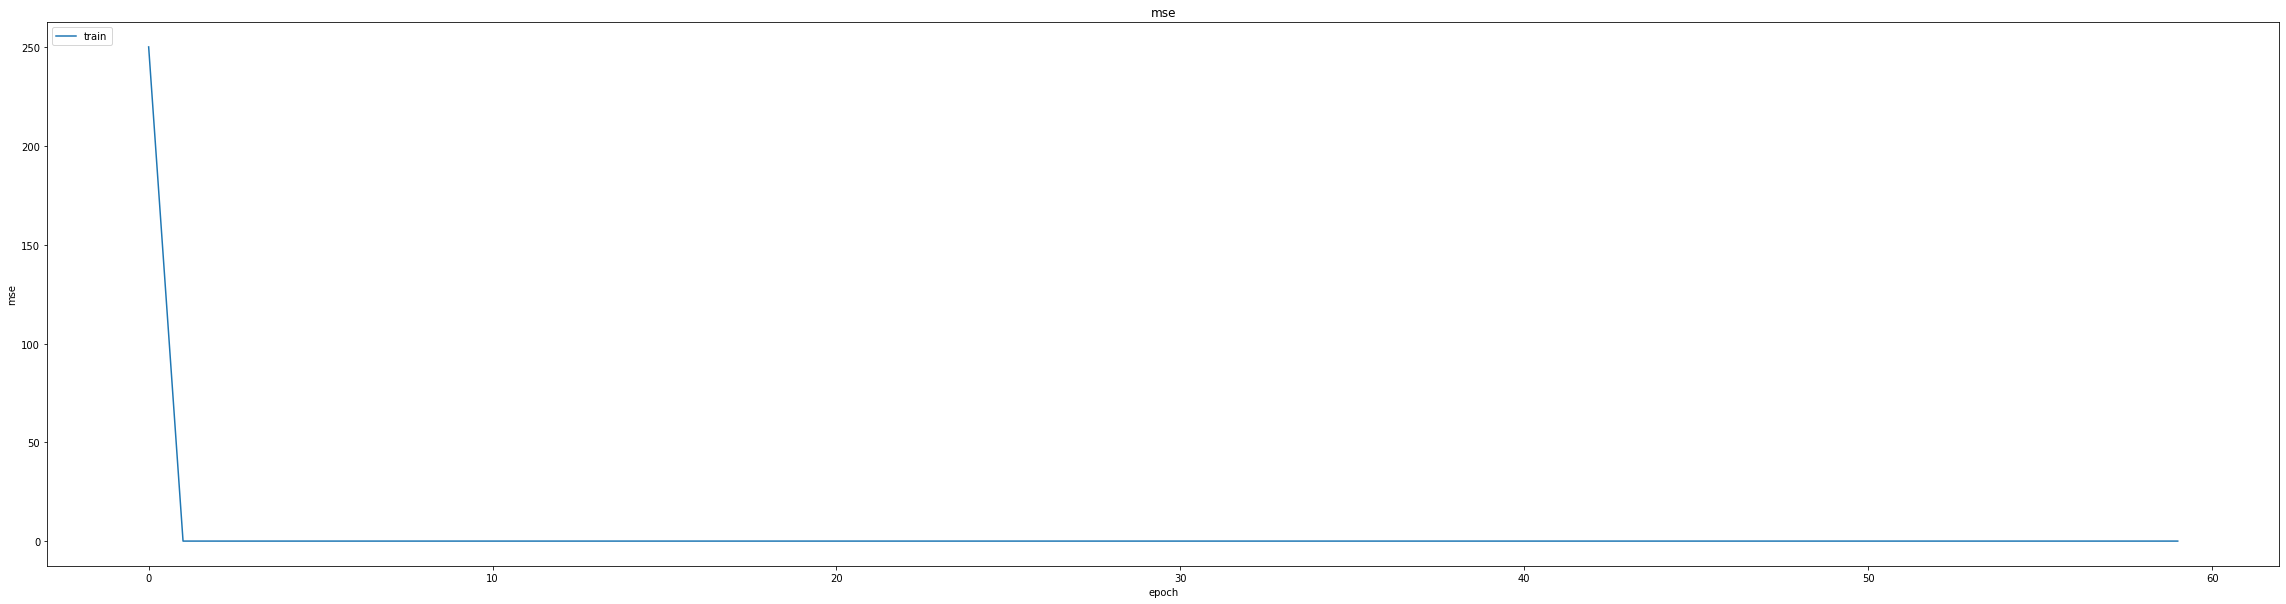

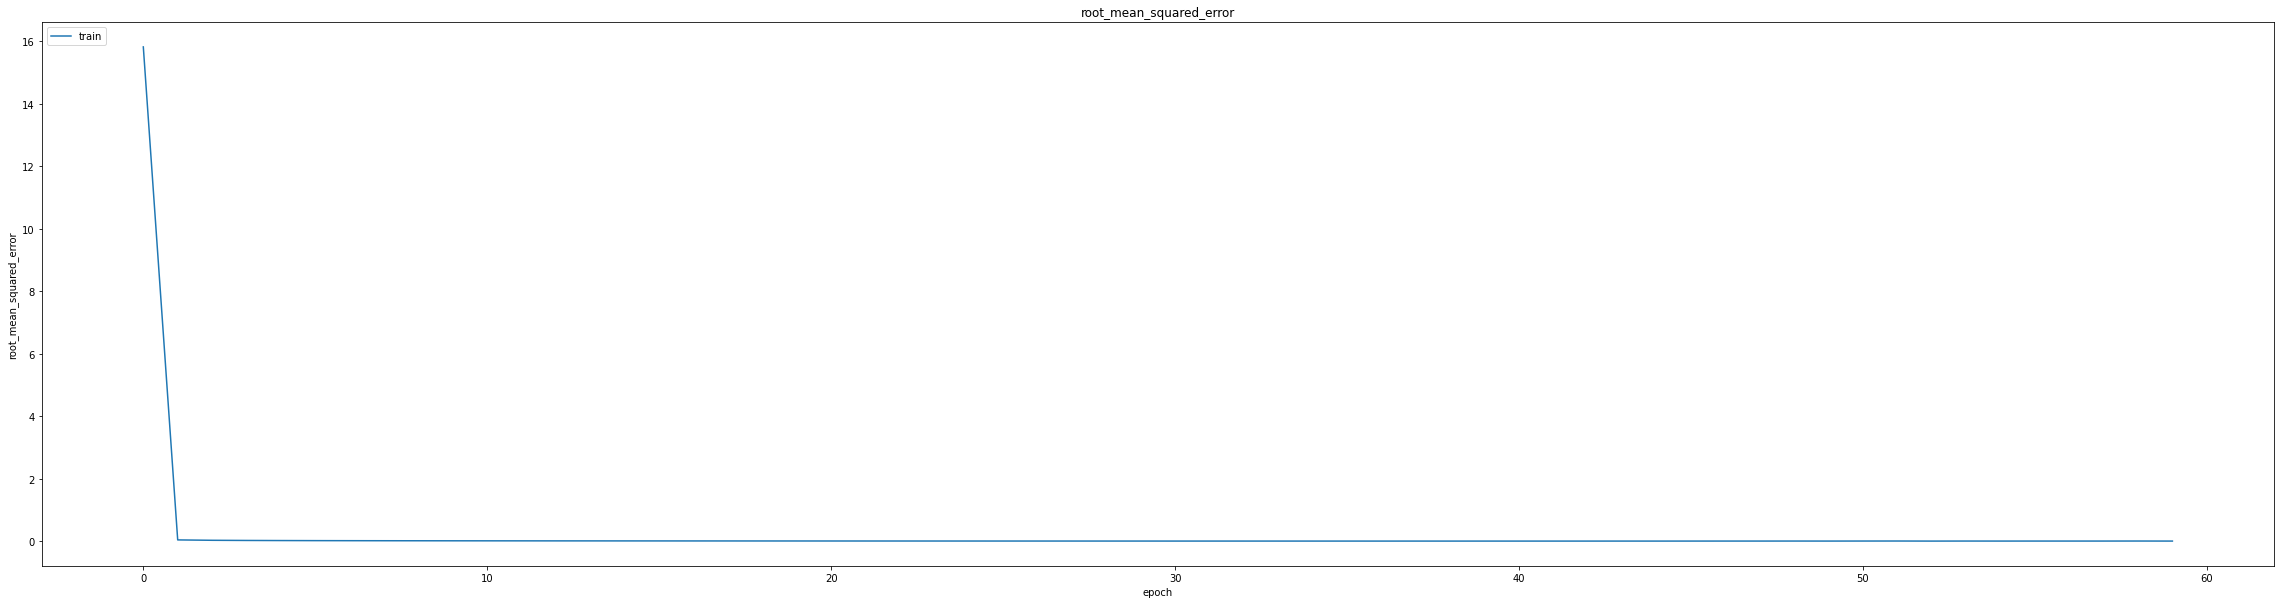

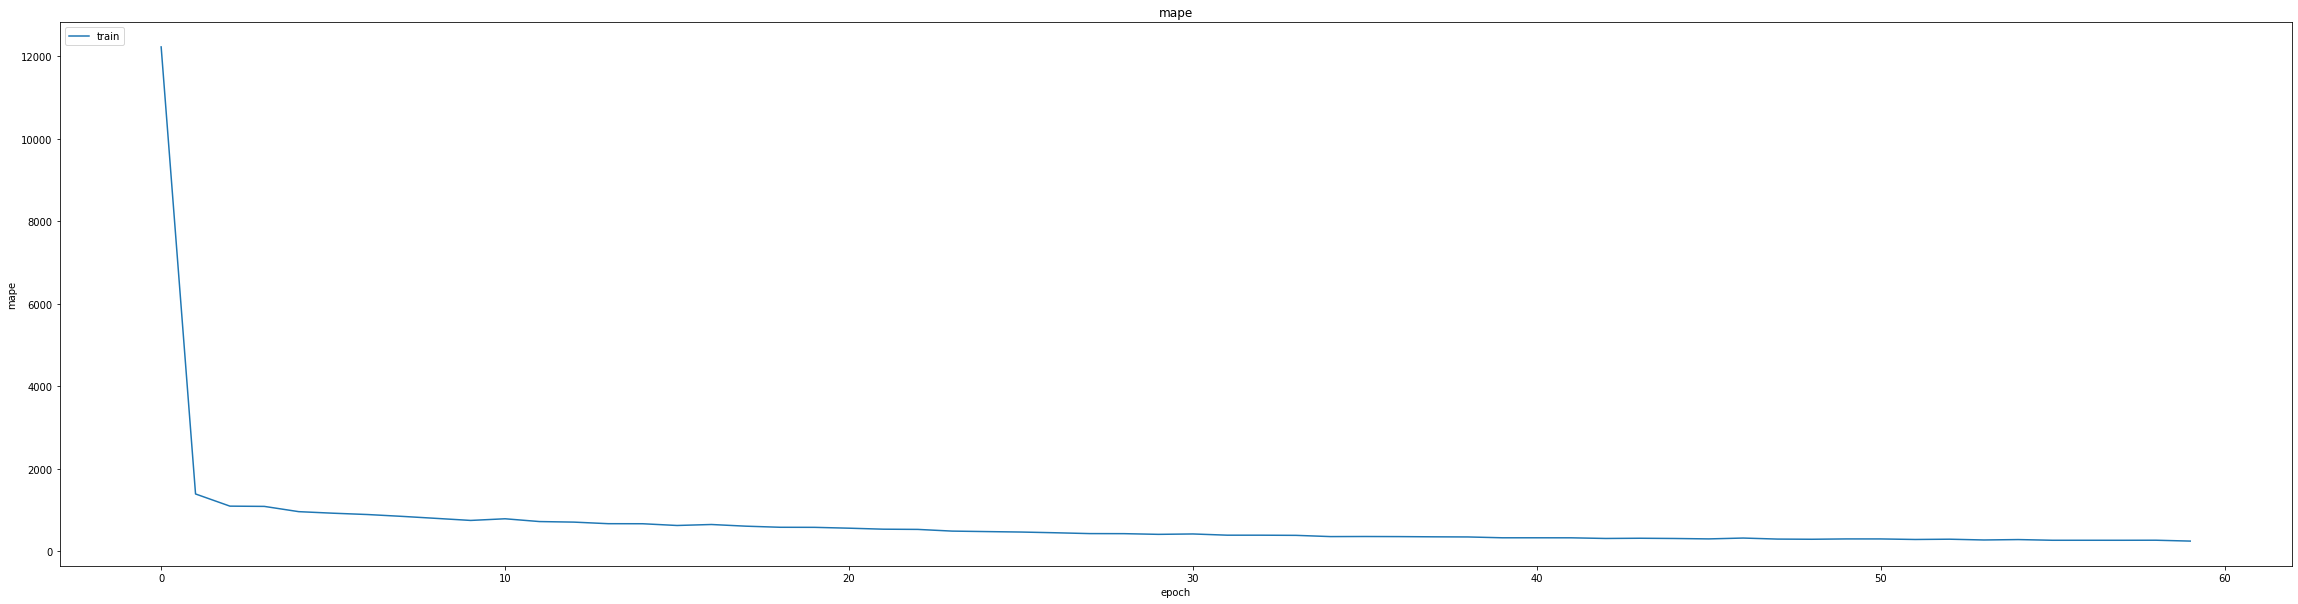

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.014700372703373432
0.015643278136849403
1044/1044 [==============================] - 4s 4ms/step
0.9934570684342228


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
404/405 [============================>.] - ETA: 0s - loss: 8.1457e-04 - mae: 0.0105 - mse: 8.1457e-04 - root_mean_squared_error: 0.0285 - mape: 280.3318
Epoch 1: val_mse did not improve from 0.00024
405/405 [==============================] - 10s 16ms/step - loss: 8.1266e-04 - mae: 0.0105 - mse: 8.1266e-04 - root_mean_squared_error: 0.0285 - mape: 279.6563 - val_loss: 4.7683e-04 - val_mae: 0.0211 - val_mse: 4.7683e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 1361.6587 - lr: 0.0010
Epoch 2/20
404/405 [============================>.] - ETA: 0s - loss: 2.3079e-05 - mae: 0.0037 - mse: 2.3079e-05 - root_mean_squared_error: 0.0048 - mape: 263.4193
Epoch 2: val_mse did not improve from 0.00024
405/405 [==============================] - 6s 14ms/step - loss: 2.3068e-05 - mae: 0.0036 - mse: 2.3068e-05 - root_mean_squared_error: 0.0048 - mape: 262.7846 - val_loss: 4.6835e-04 - val_mae: 0.0211 - val_mse: 4.6835e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 1345.7324 - lr

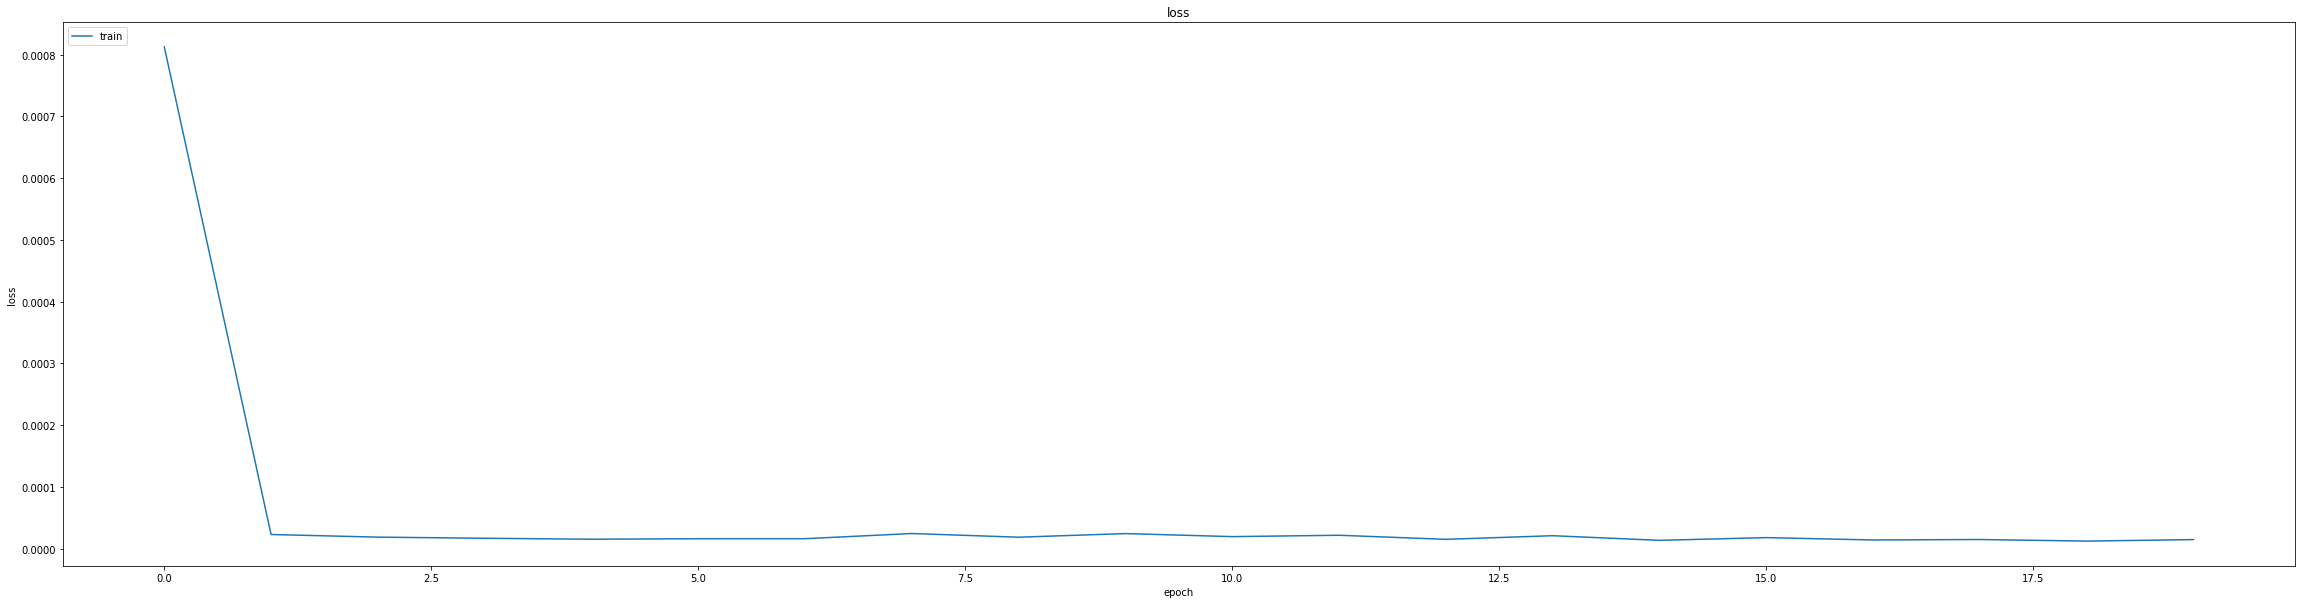

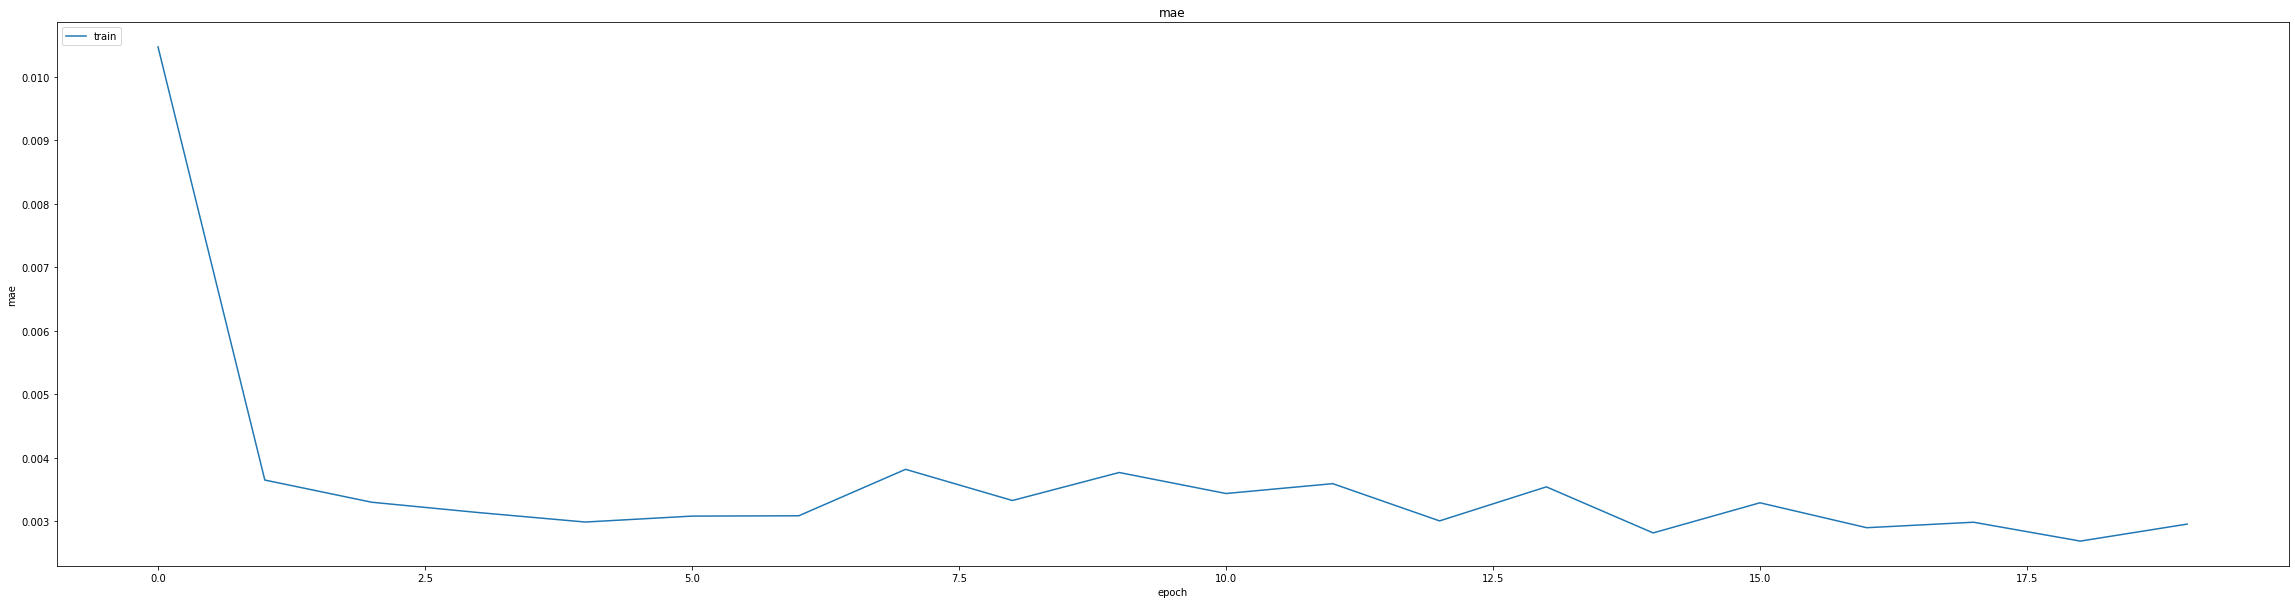

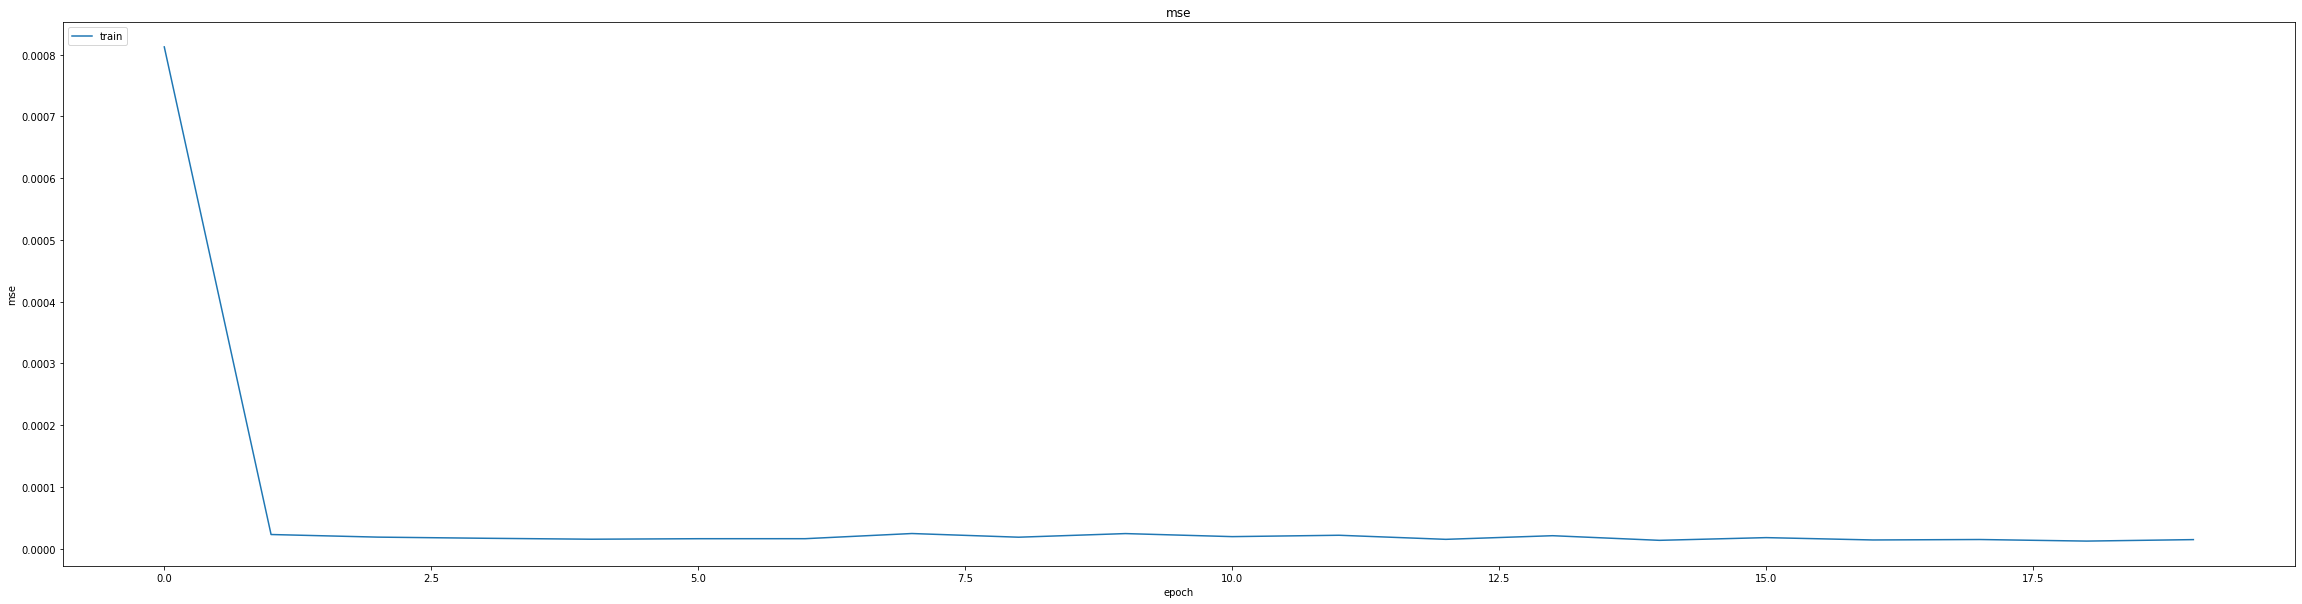

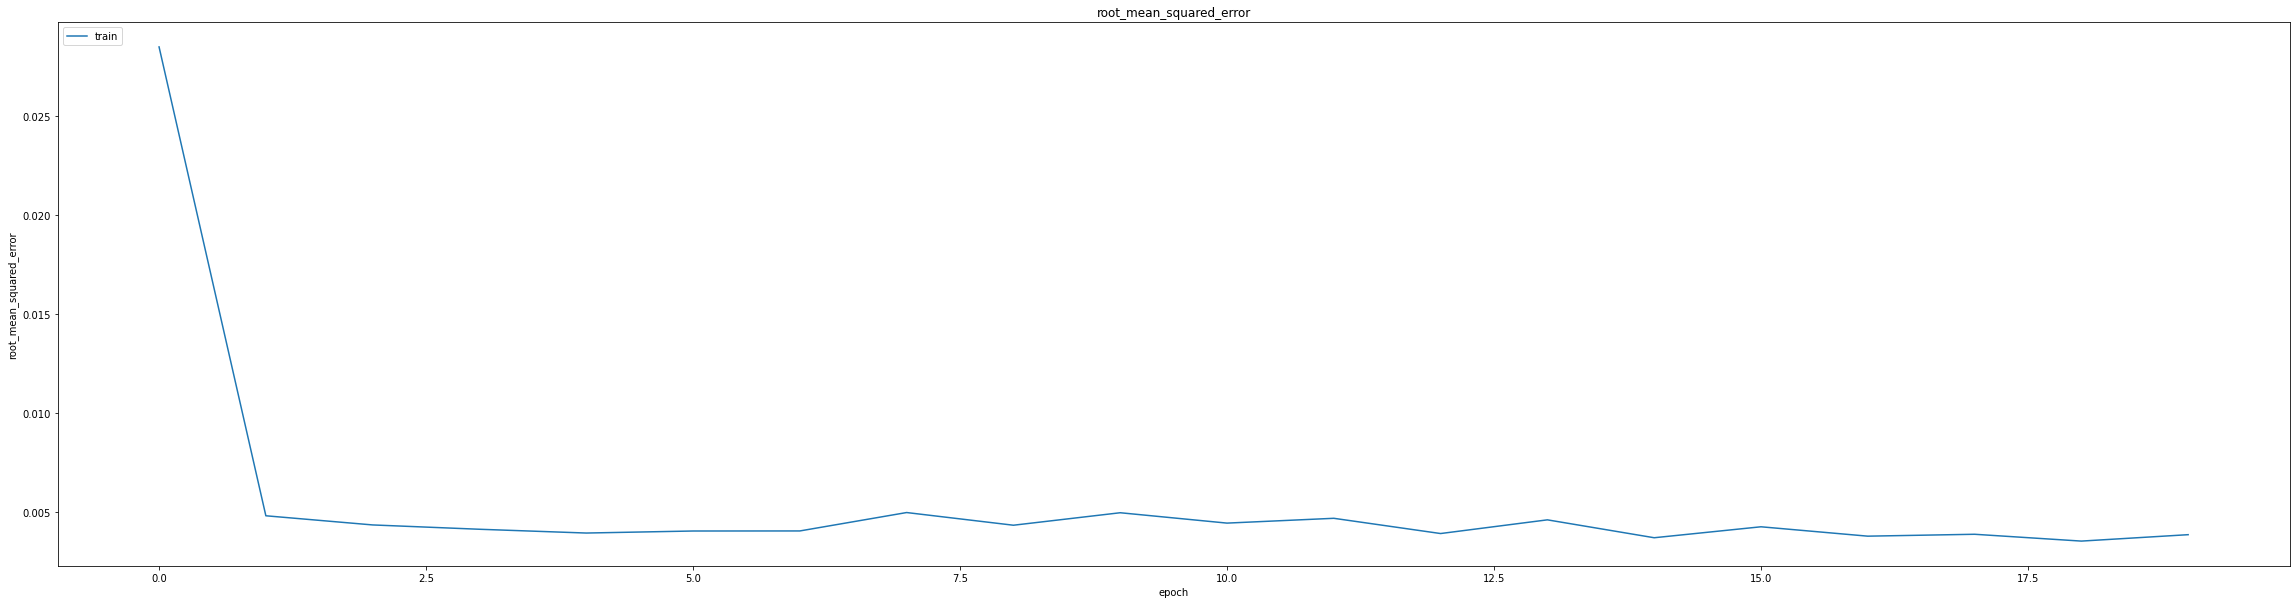

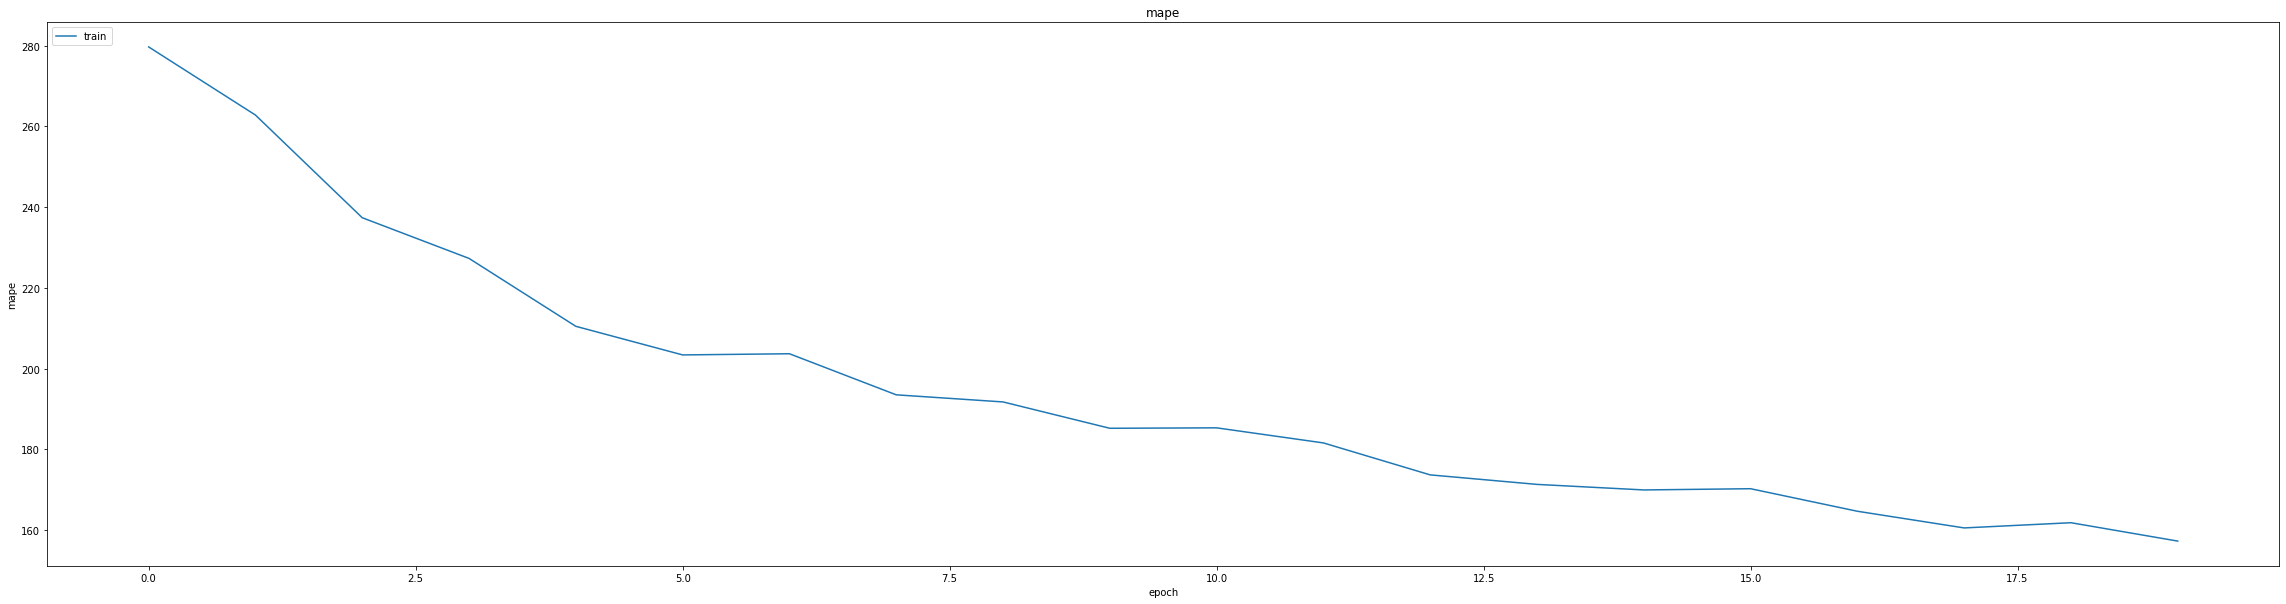

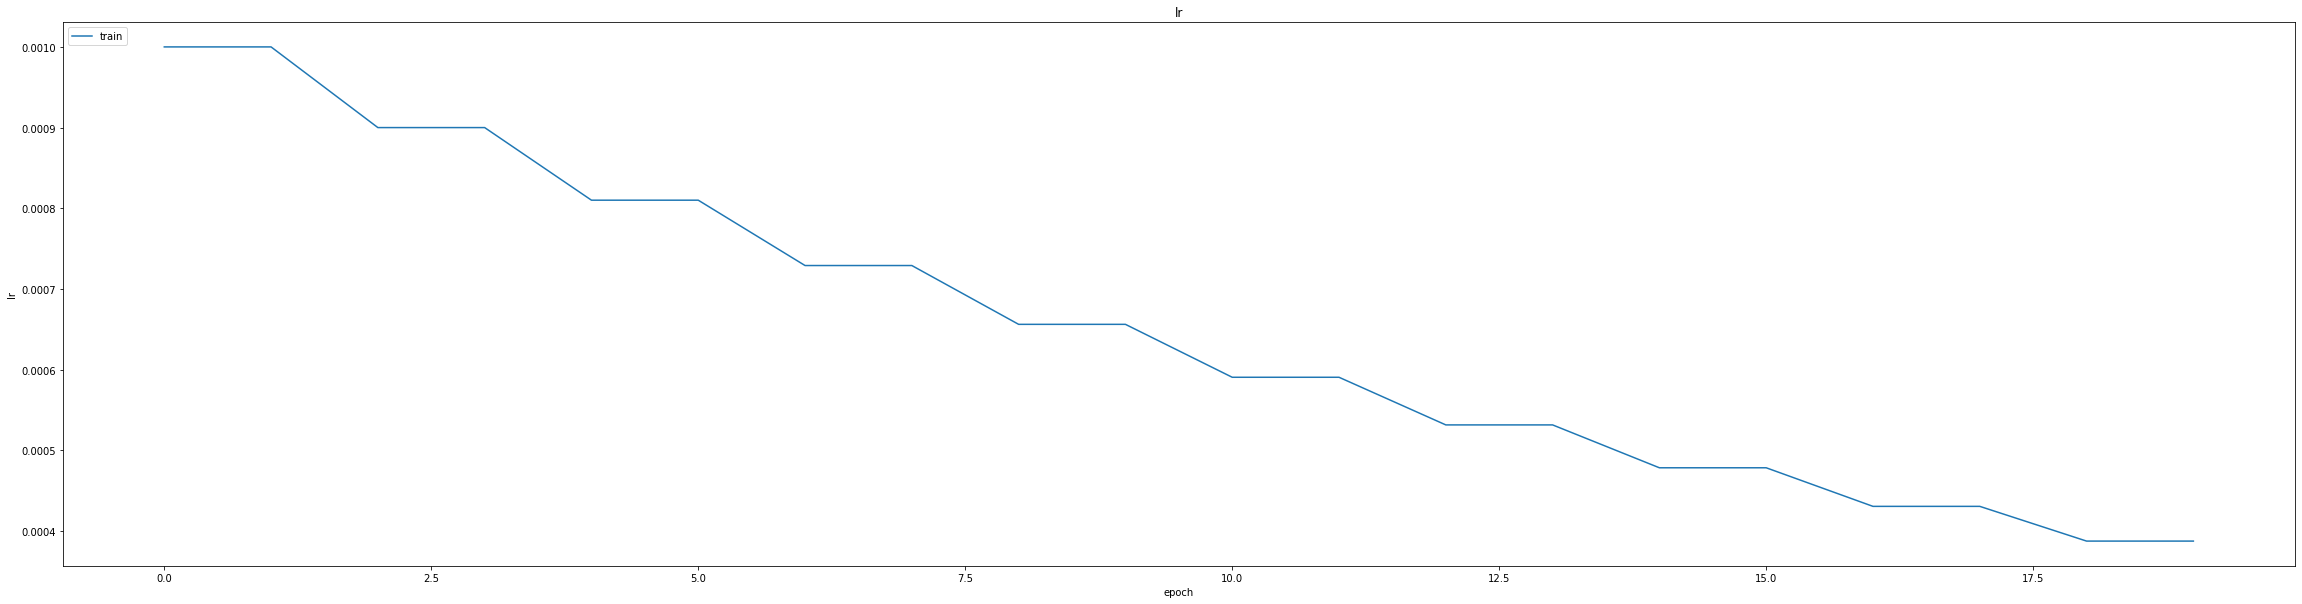

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.016775665804743767
0.017182255163788795
1044/1044 [==============================] - 4s 3ms/step
0.9876820179601844


1044/1044 [==============================] - 3s 3ms/step


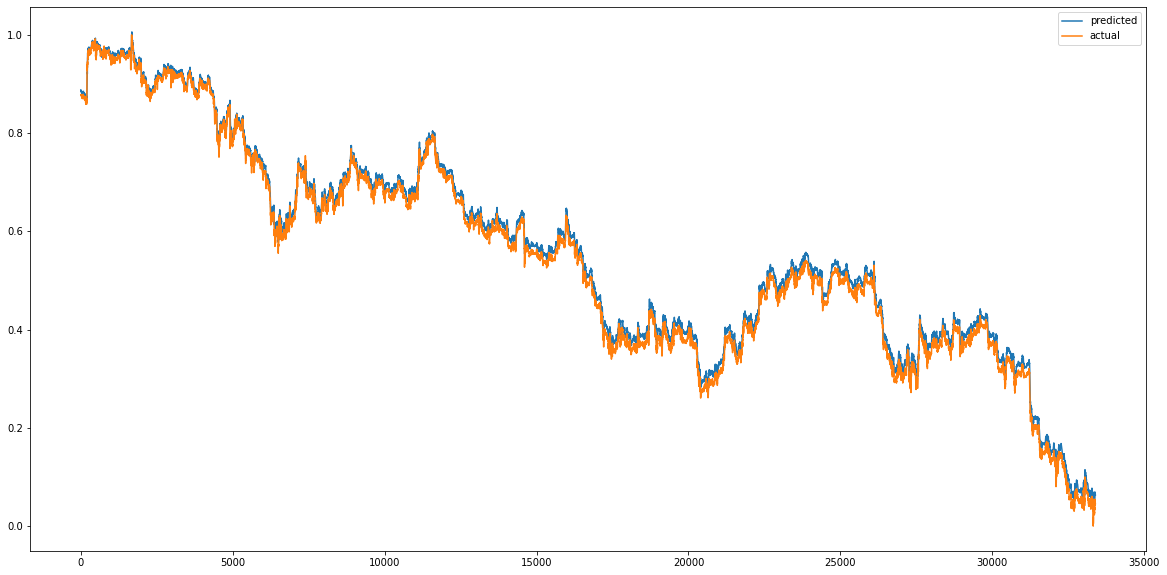

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


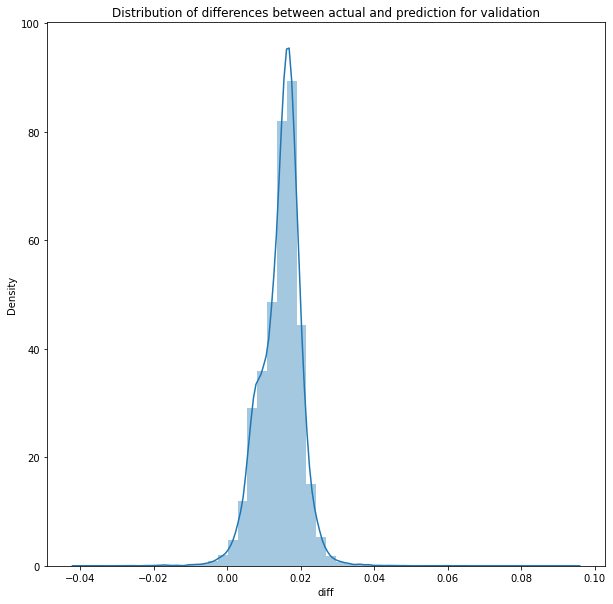

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1044/1044 [==============================] - 3s 3ms/step


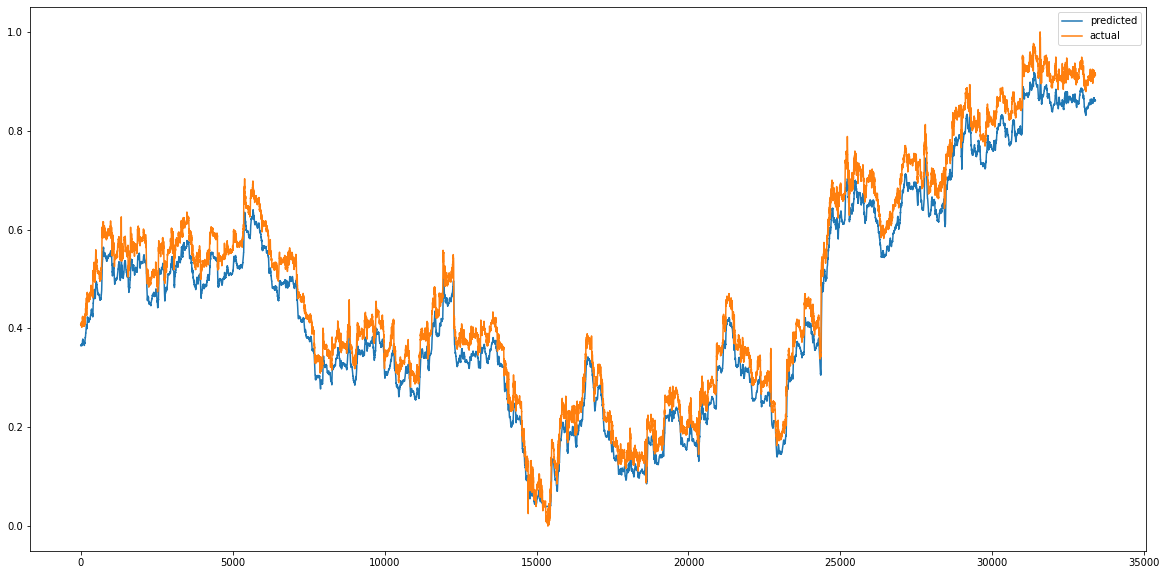

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


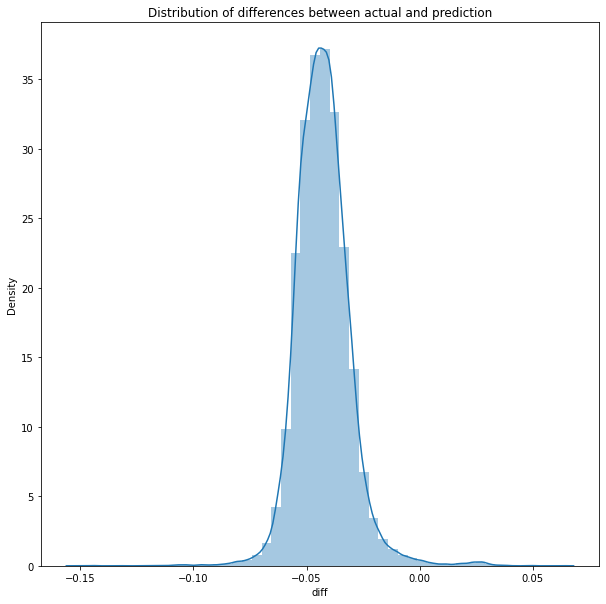

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0019655864858763262
RMSE :  0.04433493527542728
MAE :  0.042883351262124225
1044/1044 [==============================] - 3s 3ms/step
R2_Score  : 0.9624534473436361


count    33392.000000
mean        -0.042651
std          0.012105
min         -0.151641
25%         -0.050223
50%         -0.043256
75%         -0.036198
max          0.063492
Name: diff, dtype: float64

**BiLSTM_MODEL**

In [ ]:
model= thesis.BiLSTM_Model(x_train)


In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60


405/405 [==============================] - ETA: 0s - loss: 801.4195 - mae: 8.6902 - mse: 801.4195 - root_mean_squared_error: 28.3094 - mape: 19607.8848
Epoch 1: val_mse improved from inf to 0.65740, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 52s 105ms/step - loss: 801.4195 - mae: 8.6902 - mse: 801.4195 - root_mean_squared_error: 28.3094 - mape: 19607.8848 - val_loss: 0.6574 - val_mae: 0.7790 - val_mse: 0.6574 - val_root_mean_squared_error: 0.8108 - val_mape: 40062.2344
Epoch 2/60
405/405 [==============================] - ETA: 0s - loss: 0.2643 - mae: 0.4290 - mse: 0.2643 - root_mean_squared_error: 0.5141 - mape: 5420.6035
Epoch 2: val_mse improved from 0.65740 to 0.09718, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 40s 100ms/step - loss: 0.2643 - mae: 0.4290 - mse: 0.2643 - root_mean_squared_error: 0.5141 - mape: 5420.6035 - val_loss: 0.0972 - val_mae: 0.2623 - val_mse: 0.0972 - val_root_mean_squared_error: 0.3117 - val_mape: 23022.0547
Epoch 3/60
405/405 [==============================] - ETA: 0s - loss: 0.0795 - mae: 0.2182 - mse: 0.0795 - root_mean_squared_error: 0.2819 - mape: 4789.2749
Epoch 3: val_mse improved from 0.09718 to 0.05564, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 40s 100ms/step - loss: 0.0795 - mae: 0.2182 - mse: 0.0795 - root_mean_squared_error: 0.2819 - mape: 4789.2749 - val_loss: 0.0556 - val_mae: 0.1959 - val_mse: 0.0556 - val_root_mean_squared_error: 0.2359 - val_mape: 18694.7168
Epoch 4/60
405/405 [==============================] - ETA: 0s - loss: 0.0631 - mae: 0.2089 - mse: 0.0631 - root_mean_squared_error: 0.2512 - mape: 4066.7253
Epoch 4: val_mse improved from 0.05564 to 0.05083, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 101ms/step - loss: 0.0631 - mae: 0.2089 - mse: 0.0631 - root_mean_squared_error: 0.2512 - mape: 4066.7253 - val_loss: 0.0508 - val_mae: 0.1874 - val_mse: 0.0508 - val_root_mean_squared_error: 0.2255 - val_mape: 17234.8145
Epoch 5/60
405/405 [==============================] - ETA: 0s - loss: 0.0615 - mae: 0.2123 - mse: 0.0615 - root_mean_squared_error: 0.2481 - mape: 3746.4055
Epoch 5: val_mse improved from 0.05083 to 0.05027, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 100ms/step - loss: 0.0615 - mae: 0.2123 - mse: 0.0615 - root_mean_squared_error: 0.2481 - mape: 3746.4055 - val_loss: 0.0503 - val_mae: 0.1861 - val_mse: 0.0503 - val_root_mean_squared_error: 0.2242 - val_mape: 16787.1816
Epoch 6/60
405/405 [==============================] - ETA: 0s - loss: 0.0614 - mae: 0.2136 - mse: 0.0614 - root_mean_squared_error: 0.2479 - mape: 3645.2900
Epoch 6: val_mse improved from 0.05027 to 0.05020, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 40s 99ms/step - loss: 0.0614 - mae: 0.2136 - mse: 0.0614 - root_mean_squared_error: 0.2479 - mape: 3645.2900 - val_loss: 0.0502 - val_mae: 0.1858 - val_mse: 0.0502 - val_root_mean_squared_error: 0.2241 - val_mape: 16678.8594
Epoch 7/60
403/405 [============================>.] - ETA: 0s - loss: 0.0613 - mae: 0.2135 - mse: 0.0613 - root_mean_squared_error: 0.2476 - mape: 3502.6572
Epoch 7: val_mse improved from 0.05020 to 0.05020, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 101ms/step - loss: 0.0613 - mae: 0.2136 - mse: 0.0613 - root_mean_squared_error: 0.2476 - mape: 3485.9272 - val_loss: 0.0502 - val_mae: 0.1858 - val_mse: 0.0502 - val_root_mean_squared_error: 0.2240 - val_mape: 16696.7188
Epoch 8/60
403/405 [============================>.] - ETA: 0s - loss: 0.0612 - mae: 0.2134 - mse: 0.0612 - root_mean_squared_error: 0.2474 - mape: 3671.2026
Epoch 8: val_mse improved from 0.05020 to 0.05018, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 101ms/step - loss: 0.0612 - mae: 0.2134 - mse: 0.0612 - root_mean_squared_error: 0.2473 - mape: 3653.6260 - val_loss: 0.0502 - val_mae: 0.1859 - val_mse: 0.0502 - val_root_mean_squared_error: 0.2240 - val_mape: 16719.8340
Epoch 9/60
404/405 [============================>.] - ETA: 0s - loss: 0.0596 - mae: 0.2100 - mse: 0.0596 - root_mean_squared_error: 0.2442 - mape: 3583.0083
Epoch 9: val_mse improved from 0.05018 to 0.04958, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 100ms/step - loss: 0.0596 - mae: 0.2100 - mse: 0.0596 - root_mean_squared_error: 0.2442 - mape: 3574.5266 - val_loss: 0.0496 - val_mae: 0.1851 - val_mse: 0.0496 - val_root_mean_squared_error: 0.2227 - val_mape: 16558.0781
Epoch 10/60
403/405 [============================>.] - ETA: 0s - loss: 0.0586 - mae: 0.2085 - mse: 0.0586 - root_mean_squared_error: 0.2420 - mape: 3615.0432
Epoch 10: val_mse improved from 0.04958 to 0.04945, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 101ms/step - loss: 0.0586 - mae: 0.2085 - mse: 0.0586 - root_mean_squared_error: 0.2420 - mape: 3597.7505 - val_loss: 0.0495 - val_mae: 0.1850 - val_mse: 0.0495 - val_root_mean_squared_error: 0.2224 - val_mape: 16568.0430
Epoch 11/60
405/405 [==============================] - ETA: 0s - loss: 0.0574 - mae: 0.2057 - mse: 0.0574 - root_mean_squared_error: 0.2395 - mape: 3378.5935
Epoch 11: val_mse improved from 0.04945 to 0.04894, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 40s 100ms/step - loss: 0.0574 - mae: 0.2057 - mse: 0.0574 - root_mean_squared_error: 0.2395 - mape: 3378.5935 - val_loss: 0.0489 - val_mae: 0.1843 - val_mse: 0.0489 - val_root_mean_squared_error: 0.2212 - val_mape: 16461.0938
Epoch 12/60
404/405 [============================>.] - ETA: 0s - loss: 0.0561 - mae: 0.2034 - mse: 0.0561 - root_mean_squared_error: 0.2369 - mape: 3655.4407
Epoch 12: val_mse improved from 0.04894 to 0.04819, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 40s 100ms/step - loss: 0.0561 - mae: 0.2034 - mse: 0.0561 - root_mean_squared_error: 0.2369 - mape: 3646.7710 - val_loss: 0.0482 - val_mae: 0.1829 - val_mse: 0.0482 - val_root_mean_squared_error: 0.2195 - val_mape: 16268.9492
Epoch 13/60
404/405 [============================>.] - ETA: 0s - loss: 0.0546 - mae: 0.2004 - mse: 0.0546 - root_mean_squared_error: 0.2337 - mape: 3390.5632
Epoch 13: val_mse improved from 0.04819 to 0.04696, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 100ms/step - loss: 0.0546 - mae: 0.2004 - mse: 0.0546 - root_mean_squared_error: 0.2337 - mape: 3382.5513 - val_loss: 0.0470 - val_mae: 0.1808 - val_mse: 0.0470 - val_root_mean_squared_error: 0.2167 - val_mape: 16097.1123
Epoch 14/60
405/405 [==============================] - ETA: 0s - loss: 0.0522 - mae: 0.1950 - mse: 0.0522 - root_mean_squared_error: 0.2285 - mape: 3386.5754
Epoch 14: val_mse improved from 0.04696 to 0.04402, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 101ms/step - loss: 0.0522 - mae: 0.1950 - mse: 0.0522 - root_mean_squared_error: 0.2285 - mape: 3386.5754 - val_loss: 0.0440 - val_mae: 0.1749 - val_mse: 0.0440 - val_root_mean_squared_error: 0.2098 - val_mape: 15639.8682
Epoch 15/60
404/405 [============================>.] - ETA: 0s - loss: 0.0472 - mae: 0.1833 - mse: 0.0472 - root_mean_squared_error: 0.2173 - mape: 3381.8679
Epoch 15: val_mse improved from 0.04402 to 0.03685, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 40s 99ms/step - loss: 0.0472 - mae: 0.1832 - mse: 0.0472 - root_mean_squared_error: 0.2173 - mape: 3373.8640 - val_loss: 0.0368 - val_mae: 0.1580 - val_mse: 0.0368 - val_root_mean_squared_error: 0.1920 - val_mape: 15089.3018
Epoch 16/60
405/405 [==============================] - ETA: 0s - loss: 0.0376 - mae: 0.1577 - mse: 0.0376 - root_mean_squared_error: 0.1940 - mape: 3286.4949
Epoch 16: val_mse improved from 0.03685 to 0.02578, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 101ms/step - loss: 0.0376 - mae: 0.1577 - mse: 0.0376 - root_mean_squared_error: 0.1940 - mape: 3286.4949 - val_loss: 0.0258 - val_mae: 0.1229 - val_mse: 0.0258 - val_root_mean_squared_error: 0.1606 - val_mape: 14029.8584
Epoch 17/60
405/405 [==============================] - ETA: 0s - loss: 0.0279 - mae: 0.1288 - mse: 0.0279 - root_mean_squared_error: 0.1669 - mape: 3292.5925
Epoch 17: val_mse improved from 0.02578 to 0.01751, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 100ms/step - loss: 0.0279 - mae: 0.1288 - mse: 0.0279 - root_mean_squared_error: 0.1669 - mape: 3292.5925 - val_loss: 0.0175 - val_mae: 0.0918 - val_mse: 0.0175 - val_root_mean_squared_error: 0.1323 - val_mape: 12847.9531
Epoch 18/60
405/405 [==============================] - ETA: 0s - loss: 0.0199 - mae: 0.1048 - mse: 0.0199 - root_mean_squared_error: 0.1410 - mape: 3023.3860
Epoch 18: val_mse improved from 0.01751 to 0.01144, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 40s 100ms/step - loss: 0.0199 - mae: 0.1048 - mse: 0.0199 - root_mean_squared_error: 0.1410 - mape: 3023.3860 - val_loss: 0.0114 - val_mae: 0.0708 - val_mse: 0.0114 - val_root_mean_squared_error: 0.1070 - val_mape: 11522.4805
Epoch 19/60
404/405 [============================>.] - ETA: 0s - loss: 0.0140 - mae: 0.0868 - mse: 0.0140 - root_mean_squared_error: 0.1183 - mape: 2376.3267
Epoch 19: val_mse improved from 0.01144 to 0.00725, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 100ms/step - loss: 0.0140 - mae: 0.0868 - mse: 0.0140 - root_mean_squared_error: 0.1182 - mape: 2370.6650 - val_loss: 0.0073 - val_mae: 0.0529 - val_mse: 0.0073 - val_root_mean_squared_error: 0.0852 - val_mape: 10220.1514
Epoch 20/60
403/405 [============================>.] - ETA: 0s - loss: 0.0102 - mae: 0.0753 - mse: 0.0102 - root_mean_squared_error: 0.1011 - mape: 2003.7932
Epoch 20: val_mse improved from 0.00725 to 0.00470, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 101ms/step - loss: 0.0102 - mae: 0.0753 - mse: 0.0102 - root_mean_squared_error: 0.1010 - mape: 1994.1416 - val_loss: 0.0047 - val_mae: 0.0415 - val_mse: 0.0047 - val_root_mean_squared_error: 0.0685 - val_mape: 8947.0312
Epoch 21/60
403/405 [============================>.] - ETA: 0s - loss: 0.0075 - mae: 0.0658 - mse: 0.0075 - root_mean_squared_error: 0.0865 - mape: 2085.1453
Epoch 21: val_mse improved from 0.00470 to 0.00282, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 40s 99ms/step - loss: 0.0075 - mae: 0.0657 - mse: 0.0075 - root_mean_squared_error: 0.0865 - mape: 2075.0720 - val_loss: 0.0028 - val_mae: 0.0310 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0531 - val_mape: 7592.1753
Epoch 22/60
404/405 [============================>.] - ETA: 0s - loss: 0.0054 - mae: 0.0567 - mse: 0.0054 - root_mean_squared_error: 0.0733 - mape: 1615.1545
Epoch 22: val_mse improved from 0.00282 to 0.00181, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 102ms/step - loss: 0.0054 - mae: 0.0567 - mse: 0.0054 - root_mean_squared_error: 0.0733 - mape: 1611.2991 - val_loss: 0.0018 - val_mae: 0.0258 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0425 - val_mape: 6529.6606
Epoch 23/60
405/405 [==============================] - ETA: 0s - loss: 0.0039 - mae: 0.0491 - mse: 0.0039 - root_mean_squared_error: 0.0627 - mape: 1300.3633
Epoch 23: val_mse improved from 0.00181 to 0.00149, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 40s 100ms/step - loss: 0.0039 - mae: 0.0491 - mse: 0.0039 - root_mean_squared_error: 0.0627 - mape: 1300.3633 - val_loss: 0.0015 - val_mae: 0.0249 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0385 - val_mape: 5715.2974
Epoch 24/60
404/405 [============================>.] - ETA: 0s - loss: 0.0031 - mae: 0.0438 - mse: 0.0031 - root_mean_squared_error: 0.0556 - mape: 1372.3584
Epoch 24: val_mse improved from 0.00149 to 0.00112, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 101ms/step - loss: 0.0031 - mae: 0.0437 - mse: 0.0031 - root_mean_squared_error: 0.0556 - mape: 1369.0624 - val_loss: 0.0011 - val_mae: 0.0204 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0334 - val_mape: 5286.8252
Epoch 25/60
404/405 [============================>.] - ETA: 0s - loss: 0.0024 - mae: 0.0383 - mse: 0.0024 - root_mean_squared_error: 0.0489 - mape: 1628.9440
Epoch 25: val_mse improved from 0.00112 to 0.00102, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 40s 100ms/step - loss: 0.0024 - mae: 0.0383 - mse: 0.0024 - root_mean_squared_error: 0.0489 - mape: 1625.0339 - val_loss: 0.0010 - val_mae: 0.0249 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0320 - val_mape: 4848.3872
Epoch 26/60
405/405 [==============================] - ETA: 0s - loss: 0.0019 - mae: 0.0346 - mse: 0.0019 - root_mean_squared_error: 0.0441 - mape: 888.3715
Epoch 26: val_mse improved from 0.00102 to 0.00061, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 101ms/step - loss: 0.0019 - mae: 0.0346 - mse: 0.0019 - root_mean_squared_error: 0.0441 - mape: 888.3715 - val_loss: 6.0586e-04 - val_mae: 0.0157 - val_mse: 6.0586e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 4533.3643
Epoch 27/60
404/405 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0311 - mse: 0.0016 - root_mean_squared_error: 0.0399 - mape: 820.0263
Epoch 27: val_mse improved from 0.00061 to 0.00059, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 101ms/step - loss: 0.0016 - mae: 0.0311 - mse: 0.0016 - root_mean_squared_error: 0.0399 - mape: 818.0620 - val_loss: 5.9240e-04 - val_mae: 0.0177 - val_mse: 5.9240e-04 - val_root_mean_squared_error: 0.0243 - val_mape: 4310.1699
Epoch 28/60
403/405 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0282 - mse: 0.0013 - root_mean_squared_error: 0.0363 - mape: 800.4443
Epoch 28: val_mse improved from 0.00059 to 0.00050, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 100ms/step - loss: 0.0013 - mae: 0.0282 - mse: 0.0013 - root_mean_squared_error: 0.0363 - mape: 796.5693 - val_loss: 4.9785e-04 - val_mae: 0.0158 - val_mse: 4.9785e-04 - val_root_mean_squared_error: 0.0223 - val_mape: 4109.2275
Epoch 29/60
403/405 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0264 - mse: 0.0012 - root_mean_squared_error: 0.0339 - mape: 799.1515
Epoch 29: val_mse did not improve from 0.00050
405/405 [==============================] - 8s 21ms/step - loss: 0.0011 - mae: 0.0264 - mse: 0.0011 - root_mean_squared_error: 0.0339 - mape: 795.3160 - val_loss: 5.3596e-04 - val_mae: 0.0178 - val_mse: 5.3596e-04 - val_root_mean_squared_error: 0.0232 - val_mape: 3961.0266
Epoch 30/60
403/405 [============================>.] - ETA: 0s - loss: 9.7441e-04 - mae: 0.0244 - mse: 9.7441e-04 - root_mean_squared_error: 0.0312 - mape: 806.5799
Epoch 30: val_mse improved from 0.00050 to 0.00045, saving model to /content/drive/

405/405 [==============================] - 40s 100ms/step - loss: 9.7429e-04 - mae: 0.0244 - mse: 9.7429e-04 - root_mean_squared_error: 0.0312 - mape: 802.6715 - val_loss: 4.5257e-04 - val_mae: 0.0160 - val_mse: 4.5257e-04 - val_root_mean_squared_error: 0.0213 - val_mape: 3790.2952
Epoch 31/60
405/405 [==============================] - ETA: 0s - loss: 8.6223e-04 - mae: 0.0229 - mse: 8.6223e-04 - root_mean_squared_error: 0.0294 - mape: 774.8054
Epoch 31: val_mse improved from 0.00045 to 0.00038, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 101ms/step - loss: 8.6223e-04 - mae: 0.0229 - mse: 8.6223e-04 - root_mean_squared_error: 0.0294 - mape: 774.8054 - val_loss: 3.8202e-04 - val_mae: 0.0138 - val_mse: 3.8202e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 3669.7839
Epoch 32/60
405/405 [==============================] - ETA: 0s - loss: 7.3886e-04 - mae: 0.0212 - mse: 7.3886e-04 - root_mean_squared_error: 0.0272 - mape: 721.1060
Epoch 32: val_mse did not improve from 0.00038
405/405 [==============================] - 8s 21ms/step - loss: 7.3886e-04 - mae: 0.0212 - mse: 7.3886e-04 - root_mean_squared_error: 0.0272 - mape: 721.1060 - val_loss: 4.1945e-04 - val_mae: 0.0156 - val_mse: 4.1945e-04 - val_root_mean_squared_error: 0.0205 - val_mape: 3559.8127
Epoch 33/60
405/405 [==============================] - ETA: 0s - loss: 6.3439e-04 - mae: 0.0197 - mse: 6.3439e-04 - root_mean_squared_error: 0.0252 - mape: 804.1677
Epoch 33: val_mse improved from 0.00038 to 0.00037, saving 

405/405 [==============================] - 41s 100ms/step - loss: 6.3439e-04 - mae: 0.0197 - mse: 6.3439e-04 - root_mean_squared_error: 0.0252 - mape: 804.1677 - val_loss: 3.6900e-04 - val_mae: 0.0146 - val_mse: 3.6900e-04 - val_root_mean_squared_error: 0.0192 - val_mape: 3428.2942
Epoch 34/60
403/405 [============================>.] - ETA: 0s - loss: 5.5188e-04 - mae: 0.0183 - mse: 5.5188e-04 - root_mean_squared_error: 0.0235 - mape: 718.4598
Epoch 34: val_mse improved from 0.00037 to 0.00026, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 101ms/step - loss: 5.5187e-04 - mae: 0.0183 - mse: 5.5187e-04 - root_mean_squared_error: 0.0235 - mape: 714.9882 - val_loss: 2.6215e-04 - val_mae: 0.0118 - val_mse: 2.6215e-04 - val_root_mean_squared_error: 0.0162 - val_mape: 3314.6699
Epoch 35/60
404/405 [============================>.] - ETA: 0s - loss: 4.9680e-04 - mae: 0.0174 - mse: 4.9680e-04 - root_mean_squared_error: 0.0223 - mape: 729.3521
Epoch 35: val_mse did not improve from 0.00026
405/405 [==============================] - 8s 21ms/step - loss: 4.9647e-04 - mae: 0.0174 - mse: 4.9647e-04 - root_mean_squared_error: 0.0223 - mape: 727.5971 - val_loss: 5.7039e-04 - val_mae: 0.0213 - val_mse: 5.7039e-04 - val_root_mean_squared_error: 0.0239 - val_mape: 3191.6191
Epoch 36/60
405/405 [==============================] - ETA: 0s - loss: 4.4622e-04 - mae: 0.0164 - mse: 4.4622e-04 - root_mean_squared_error: 0.0211 - mape: 672.6738
Epoch 36: val_mse improved from 0.00026 to 0.00020, saving 

405/405 [==============================] - 41s 101ms/step - loss: 4.4622e-04 - mae: 0.0164 - mse: 4.4622e-04 - root_mean_squared_error: 0.0211 - mape: 672.6738 - val_loss: 2.0250e-04 - val_mae: 0.0094 - val_mse: 2.0250e-04 - val_root_mean_squared_error: 0.0142 - val_mape: 3154.4255
Epoch 37/60
403/405 [============================>.] - ETA: 0s - loss: 3.8796e-04 - mae: 0.0153 - mse: 3.8796e-04 - root_mean_squared_error: 0.0197 - mape: 670.7646
Epoch 37: val_mse improved from 0.00020 to 0.00017, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 40s 99ms/step - loss: 3.8749e-04 - mae: 0.0153 - mse: 3.8749e-04 - root_mean_squared_error: 0.0197 - mape: 667.5045 - val_loss: 1.7026e-04 - val_mae: 0.0084 - val_mse: 1.7026e-04 - val_root_mean_squared_error: 0.0130 - val_mape: 3070.0090
Epoch 38/60
405/405 [==============================] - ETA: 0s - loss: 3.5142e-04 - mae: 0.0146 - mse: 3.5142e-04 - root_mean_squared_error: 0.0187 - mape: 627.8542
Epoch 38: val_mse improved from 0.00017 to 0.00017, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 100ms/step - loss: 3.5142e-04 - mae: 0.0146 - mse: 3.5142e-04 - root_mean_squared_error: 0.0187 - mape: 627.8542 - val_loss: 1.6689e-04 - val_mae: 0.0085 - val_mse: 1.6689e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 2981.9502
Epoch 39/60
405/405 [==============================] - ETA: 0s - loss: 3.1250e-04 - mae: 0.0138 - mse: 3.1250e-04 - root_mean_squared_error: 0.0177 - mape: 632.8218
Epoch 39: val_mse did not improve from 0.00017
405/405 [==============================] - 8s 21ms/step - loss: 3.1250e-04 - mae: 0.0138 - mse: 3.1250e-04 - root_mean_squared_error: 0.0177 - mape: 632.8218 - val_loss: 4.9999e-04 - val_mae: 0.0202 - val_mse: 4.9999e-04 - val_root_mean_squared_error: 0.0224 - val_mape: 2894.8267
Epoch 40/60
405/405 [==============================] - ETA: 0s - loss: 2.6751e-04 - mae: 0.0127 - mse: 2.6751e-04 - root_mean_squared_error: 0.0164 - mape: 637.2211
Epoch 40: val_mse improved from 0.00017 to 0.00015, saving 

405/405 [==============================] - 40s 99ms/step - loss: 2.6751e-04 - mae: 0.0127 - mse: 2.6751e-04 - root_mean_squared_error: 0.0164 - mape: 637.2211 - val_loss: 1.4661e-04 - val_mae: 0.0084 - val_mse: 1.4661e-04 - val_root_mean_squared_error: 0.0121 - val_mape: 2860.8345
Epoch 41/60
404/405 [============================>.] - ETA: 0s - loss: 2.4668e-04 - mae: 0.0122 - mse: 2.4668e-04 - root_mean_squared_error: 0.0157 - mape: 564.9232
Epoch 41: val_mse improved from 0.00015 to 0.00012, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 101ms/step - loss: 2.4656e-04 - mae: 0.0122 - mse: 2.4656e-04 - root_mean_squared_error: 0.0157 - mape: 563.5643 - val_loss: 1.2155e-04 - val_mae: 0.0072 - val_mse: 1.2155e-04 - val_root_mean_squared_error: 0.0110 - val_mape: 2799.8037
Epoch 42/60
403/405 [============================>.] - ETA: 0s - loss: 2.2622e-04 - mae: 0.0117 - mse: 2.2622e-04 - root_mean_squared_error: 0.0150 - mape: 700.8747
Epoch 42: val_mse did not improve from 0.00012
405/405 [==============================] - 8s 21ms/step - loss: 2.2610e-04 - mae: 0.0117 - mse: 2.2610e-04 - root_mean_squared_error: 0.0150 - mape: 697.4644 - val_loss: 1.5807e-04 - val_mae: 0.0090 - val_mse: 1.5807e-04 - val_root_mean_squared_error: 0.0126 - val_mape: 2823.1028
Epoch 43/60
404/405 [============================>.] - ETA: 0s - loss: 2.1430e-04 - mae: 0.0113 - mse: 2.1430e-04 - root_mean_squared_error: 0.0146 - mape: 567.8842
Epoch 43: val_mse did not improve from 0.00012
405/405 [===

405/405 [==============================] - 40s 99ms/step - loss: 1.8279e-04 - mae: 0.0104 - mse: 1.8279e-04 - root_mean_squared_error: 0.0135 - mape: 598.2546 - val_loss: 1.1770e-04 - val_mae: 0.0072 - val_mse: 1.1770e-04 - val_root_mean_squared_error: 0.0108 - val_mape: 2726.7400
Epoch 45/60
403/405 [============================>.] - ETA: 0s - loss: 1.7859e-04 - mae: 0.0104 - mse: 1.7859e-04 - root_mean_squared_error: 0.0134 - mape: 538.7916
Epoch 45: val_mse improved from 0.00012 to 0.00011, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 101ms/step - loss: 1.7830e-04 - mae: 0.0104 - mse: 1.7830e-04 - root_mean_squared_error: 0.0134 - mape: 536.1714 - val_loss: 1.1119e-04 - val_mae: 0.0068 - val_mse: 1.1119e-04 - val_root_mean_squared_error: 0.0105 - val_mape: 2659.0908
Epoch 46/60
404/405 [============================>.] - ETA: 0s - loss: 1.6523e-04 - mae: 0.0100 - mse: 1.6523e-04 - root_mean_squared_error: 0.0129 - mape: 512.9669
Epoch 46: val_mse did not improve from 0.00011
405/405 [==============================] - 8s 21ms/step - loss: 1.6532e-04 - mae: 0.0100 - mse: 1.6532e-04 - root_mean_squared_error: 0.0129 - mape: 511.7390 - val_loss: 1.2675e-04 - val_mae: 0.0081 - val_mse: 1.2675e-04 - val_root_mean_squared_error: 0.0113 - val_mape: 2587.1165
Epoch 47/60
404/405 [============================>.] - ETA: 0s - loss: 1.5796e-04 - mae: 0.0098 - mse: 1.5796e-04 - root_mean_squared_error: 0.0126 - mape: 599.7170
Epoch 47: val_mse did not improve from 0.00011
405/405 [===

405/405 [==============================] - 41s 100ms/step - loss: 1.3805e-04 - mae: 0.0091 - mse: 1.3805e-04 - root_mean_squared_error: 0.0117 - mape: 564.4877 - val_loss: 1.0260e-04 - val_mae: 0.0070 - val_mse: 1.0260e-04 - val_root_mean_squared_error: 0.0101 - val_mape: 2510.8621
Epoch 49/60
405/405 [==============================] - ETA: 0s - loss: 1.3784e-04 - mae: 0.0091 - mse: 1.3784e-04 - root_mean_squared_error: 0.0117 - mape: 472.6685
Epoch 49: val_mse did not improve from 0.00010
405/405 [==============================] - 8s 21ms/step - loss: 1.3784e-04 - mae: 0.0091 - mse: 1.3784e-04 - root_mean_squared_error: 0.0117 - mape: 472.6685 - val_loss: 2.0171e-04 - val_mae: 0.0120 - val_mse: 2.0171e-04 - val_root_mean_squared_error: 0.0142 - val_mape: 2514.0833
Epoch 50/60
404/405 [============================>.] - ETA: 0s - loss: 1.2705e-04 - mae: 0.0087 - mse: 1.2705e-04 - root_mean_squared_error: 0.0113 - mape: 521.4802
Epoch 50: val_mse improved from 0.00010 to 0.00009, saving 

405/405 [==============================] - 41s 100ms/step - loss: 1.2697e-04 - mae: 0.0087 - mse: 1.2697e-04 - root_mean_squared_error: 0.0113 - mape: 520.2271 - val_loss: 8.8322e-05 - val_mae: 0.0058 - val_mse: 8.8322e-05 - val_root_mean_squared_error: 0.0094 - val_mape: 2493.0867
Epoch 51/60
405/405 [==============================] - ETA: 0s - loss: 1.1685e-04 - mae: 0.0084 - mse: 1.1685e-04 - root_mean_squared_error: 0.0108 - mape: 462.5818
Epoch 51: val_mse improved from 0.00009 to 0.00008, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 40s 100ms/step - loss: 1.1685e-04 - mae: 0.0084 - mse: 1.1685e-04 - root_mean_squared_error: 0.0108 - mape: 462.5818 - val_loss: 8.4201e-05 - val_mae: 0.0060 - val_mse: 8.4201e-05 - val_root_mean_squared_error: 0.0092 - val_mape: 2341.7078
Epoch 52/60
405/405 [==============================] - ETA: 0s - loss: 1.1478e-04 - mae: 0.0084 - mse: 1.1478e-04 - root_mean_squared_error: 0.0107 - mape: 424.9952
Epoch 52: val_mse did not improve from 0.00008
405/405 [==============================] - 8s 21ms/step - loss: 1.1478e-04 - mae: 0.0084 - mse: 1.1478e-04 - root_mean_squared_error: 0.0107 - mape: 424.9952 - val_loss: 1.5078e-04 - val_mae: 0.0104 - val_mse: 1.5078e-04 - val_root_mean_squared_error: 0.0123 - val_mape: 2333.0942
Epoch 53/60
403/405 [============================>.] - ETA: 0s - loss: 1.0071e-04 - mae: 0.0078 - mse: 1.0071e-04 - root_mean_squared_error: 0.0100 - mape: 455.7050
Epoch 53: val_mse improved from 0.00008 to 0.00007, saving 

405/405 [==============================] - 41s 101ms/step - loss: 1.0060e-04 - mae: 0.0078 - mse: 1.0060e-04 - root_mean_squared_error: 0.0100 - mape: 453.4867 - val_loss: 7.1193e-05 - val_mae: 0.0050 - val_mse: 7.1193e-05 - val_root_mean_squared_error: 0.0084 - val_mape: 2351.6895
Epoch 54/60
403/405 [============================>.] - ETA: 0s - loss: 9.7632e-05 - mae: 0.0077 - mse: 9.7632e-05 - root_mean_squared_error: 0.0099 - mape: 469.2126
Epoch 54: val_mse did not improve from 0.00007
405/405 [==============================] - 9s 21ms/step - loss: 9.8185e-05 - mae: 0.0077 - mse: 9.8185e-05 - root_mean_squared_error: 0.0099 - mape: 466.9360 - val_loss: 1.3239e-04 - val_mae: 0.0099 - val_mse: 1.3239e-04 - val_root_mean_squared_error: 0.0115 - val_mape: 2029.2363
Epoch 55/60
405/405 [==============================] - ETA: 0s - loss: 9.8180e-05 - mae: 0.0077 - mse: 9.8180e-05 - root_mean_squared_error: 0.0099 - mape: 375.9362
Epoch 55: val_mse improved from 0.00007 to 0.00005, saving 

405/405 [==============================] - 41s 100ms/step - loss: 9.8180e-05 - mae: 0.0077 - mse: 9.8180e-05 - root_mean_squared_error: 0.0099 - mape: 375.9362 - val_loss: 5.4698e-05 - val_mae: 0.0047 - val_mse: 5.4698e-05 - val_root_mean_squared_error: 0.0074 - val_mape: 2031.0563
Epoch 56/60
404/405 [============================>.] - ETA: 0s - loss: 8.3578e-05 - mae: 0.0071 - mse: 8.3578e-05 - root_mean_squared_error: 0.0091 - mape: 381.7491
Epoch 56: val_mse did not improve from 0.00005
405/405 [==============================] - 8s 21ms/step - loss: 8.3544e-05 - mae: 0.0071 - mse: 8.3544e-05 - root_mean_squared_error: 0.0091 - mape: 380.8341 - val_loss: 1.8125e-04 - val_mae: 0.0122 - val_mse: 1.8125e-04 - val_root_mean_squared_error: 0.0135 - val_mape: 1846.7714
Epoch 57/60
403/405 [============================>.] - ETA: 0s - loss: 7.6253e-05 - mae: 0.0067 - mse: 7.6253e-05 - root_mean_squared_error: 0.0087 - mape: 405.0362
Epoch 57: val_mse improved from 0.00005 to 0.00004, saving 

405/405 [==============================] - 40s 100ms/step - loss: 7.6191e-05 - mae: 0.0067 - mse: 7.6191e-05 - root_mean_squared_error: 0.0087 - mape: 403.0675 - val_loss: 3.8460e-05 - val_mae: 0.0042 - val_mse: 3.8460e-05 - val_root_mean_squared_error: 0.0062 - val_mape: 1711.2198
Epoch 58/60
403/405 [============================>.] - ETA: 0s - loss: 7.8718e-05 - mae: 0.0069 - mse: 7.8718e-05 - root_mean_squared_error: 0.0089 - mape: 332.3457
Epoch 58: val_mse improved from 0.00004 to 0.00003, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 100ms/step - loss: 7.8543e-05 - mae: 0.0069 - mse: 7.8543e-05 - root_mean_squared_error: 0.0089 - mape: 330.7289 - val_loss: 3.4124e-05 - val_mae: 0.0041 - val_mse: 3.4124e-05 - val_root_mean_squared_error: 0.0058 - val_mape: 1649.5718
Epoch 59/60
405/405 [==============================] - ETA: 0s - loss: 7.2886e-05 - mae: 0.0066 - mse: 7.2886e-05 - root_mean_squared_error: 0.0085 - mape: 327.1780
Epoch 59: val_mse improved from 0.00003 to 0.00003, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 101ms/step - loss: 7.2886e-05 - mae: 0.0066 - mse: 7.2886e-05 - root_mean_squared_error: 0.0085 - mape: 327.1780 - val_loss: 3.2412e-05 - val_mae: 0.0040 - val_mse: 3.2412e-05 - val_root_mean_squared_error: 0.0057 - val_mape: 1610.1157
Epoch 60/60
403/405 [============================>.] - ETA: 0s - loss: 6.9664e-05 - mae: 0.0064 - mse: 6.9664e-05 - root_mean_squared_error: 0.0083 - mape: 338.5209
Epoch 60: val_mse did not improve from 0.00003
405/405 [==============================] - 9s 21ms/step - loss: 6.9640e-05 - mae: 0.0064 - mse: 6.9640e-05 - root_mean_squared_error: 0.0083 - mape: 336.8752 - val_loss: 7.9330e-05 - val_mae: 0.0078 - val_mse: 7.9330e-05 - val_root_mean_squared_error: 0.0089 - val_mape: 1571.2107


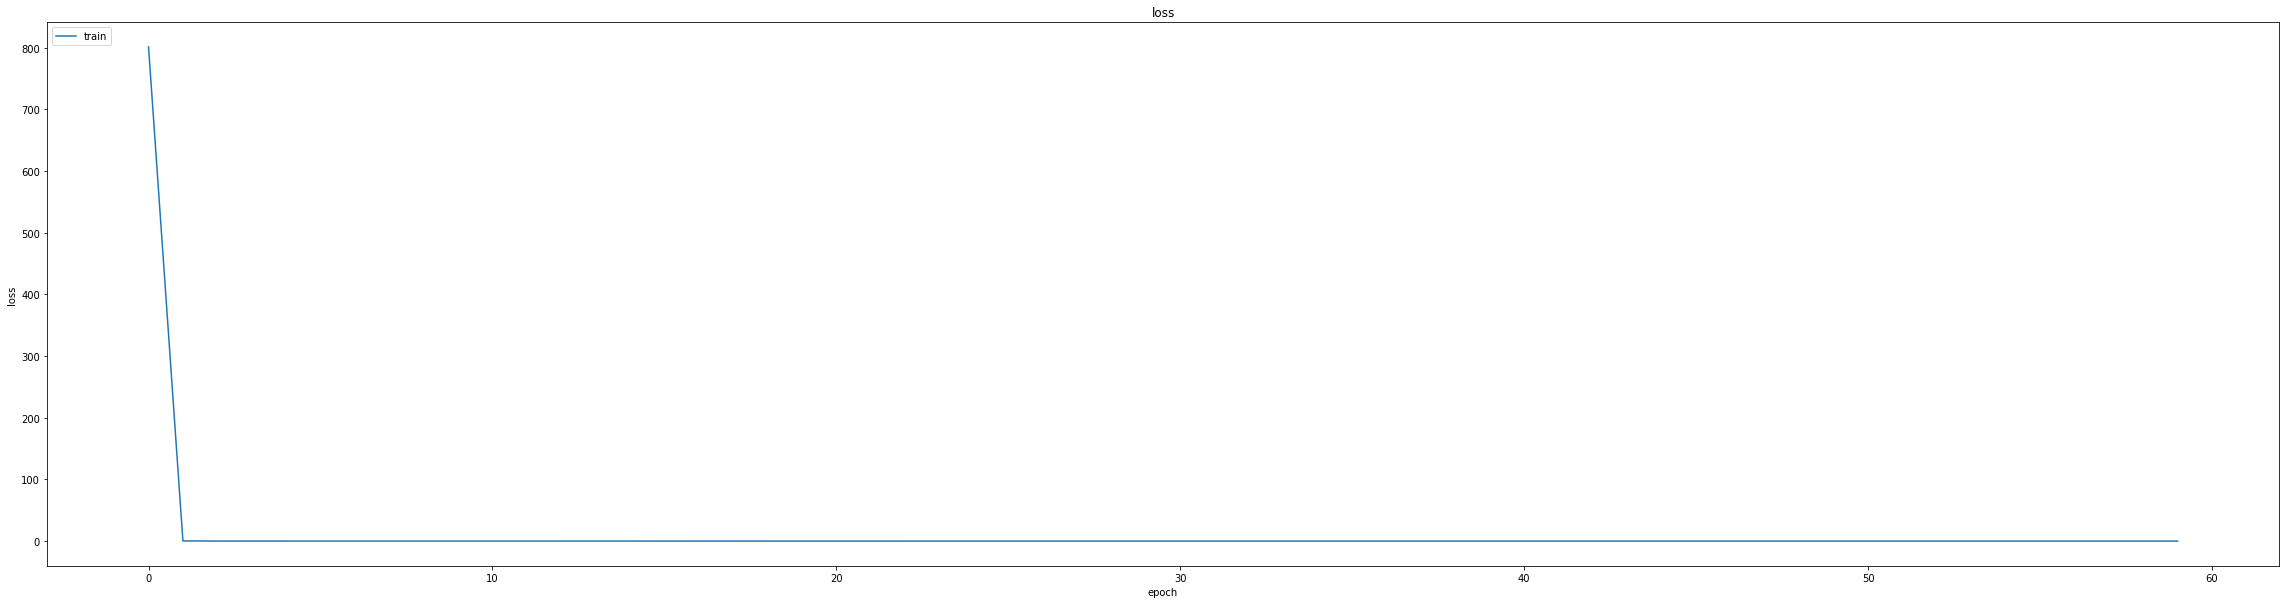

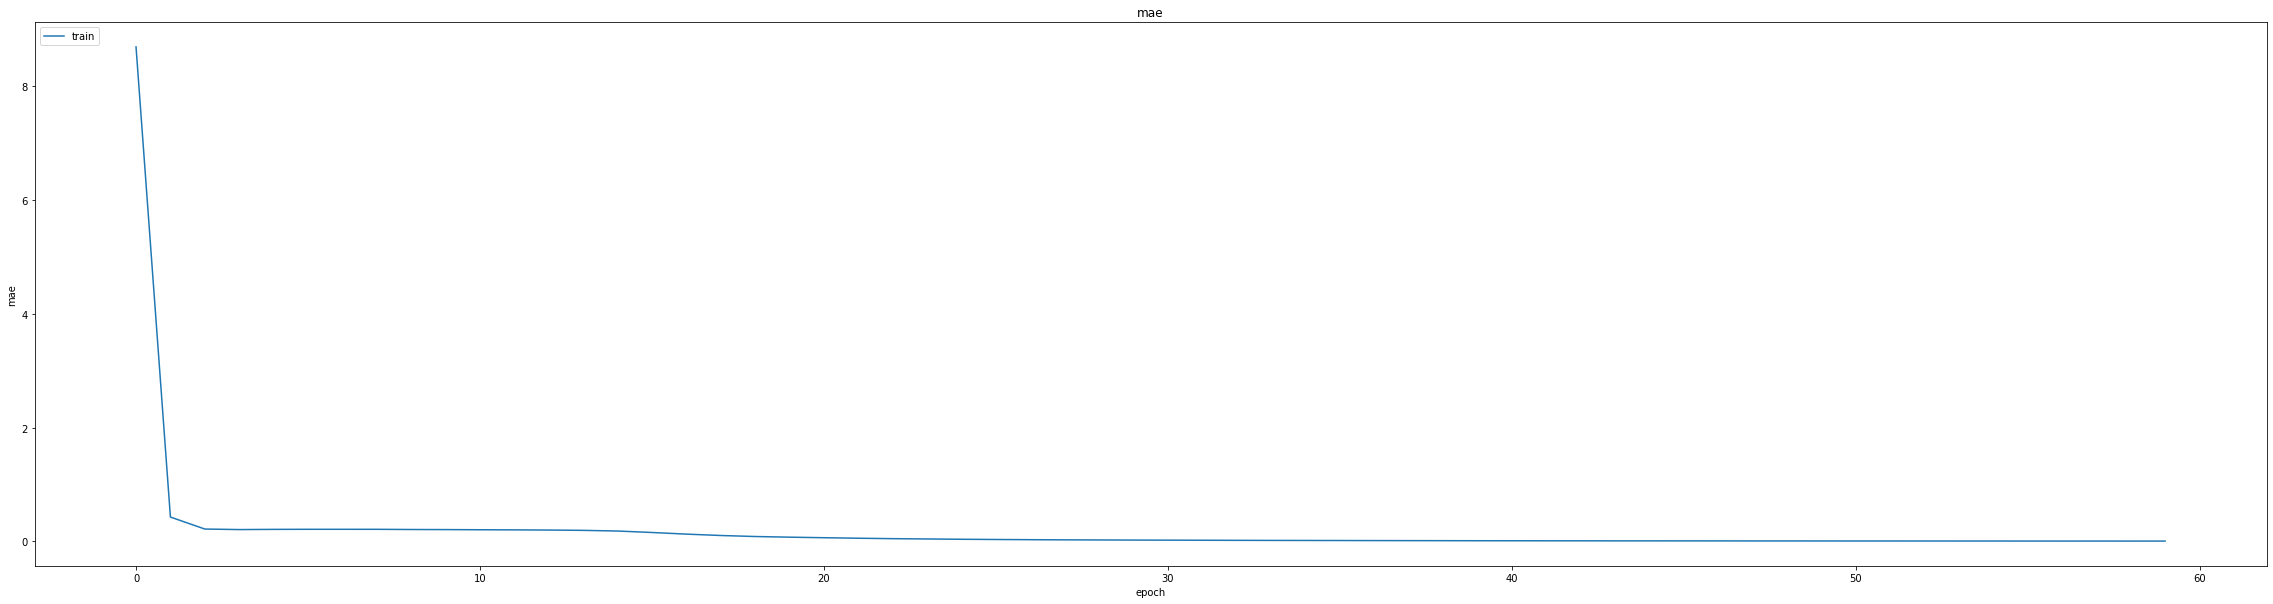

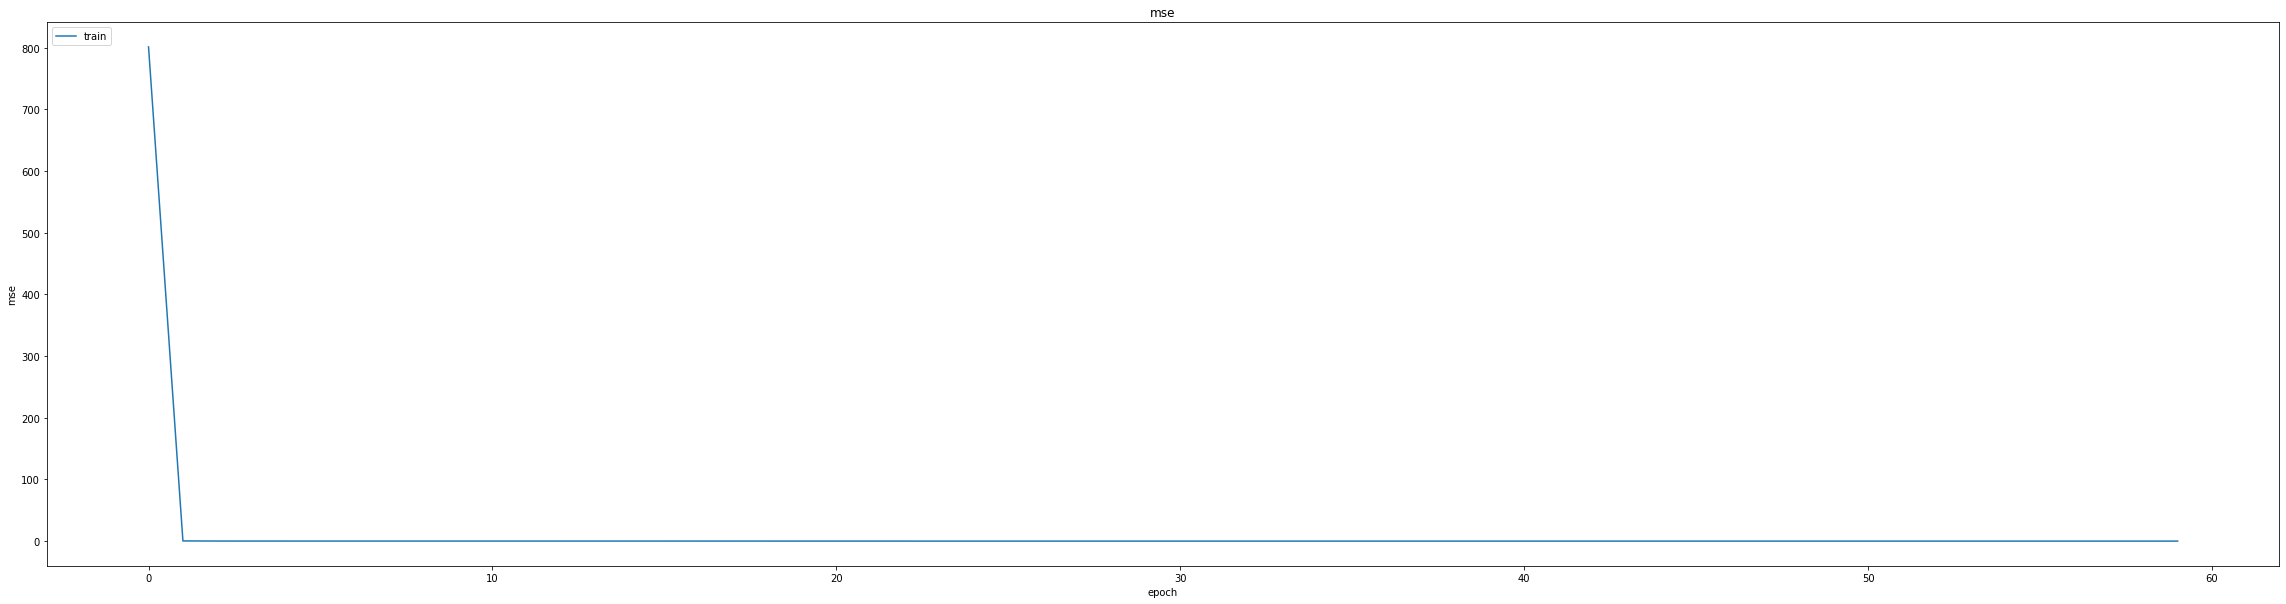

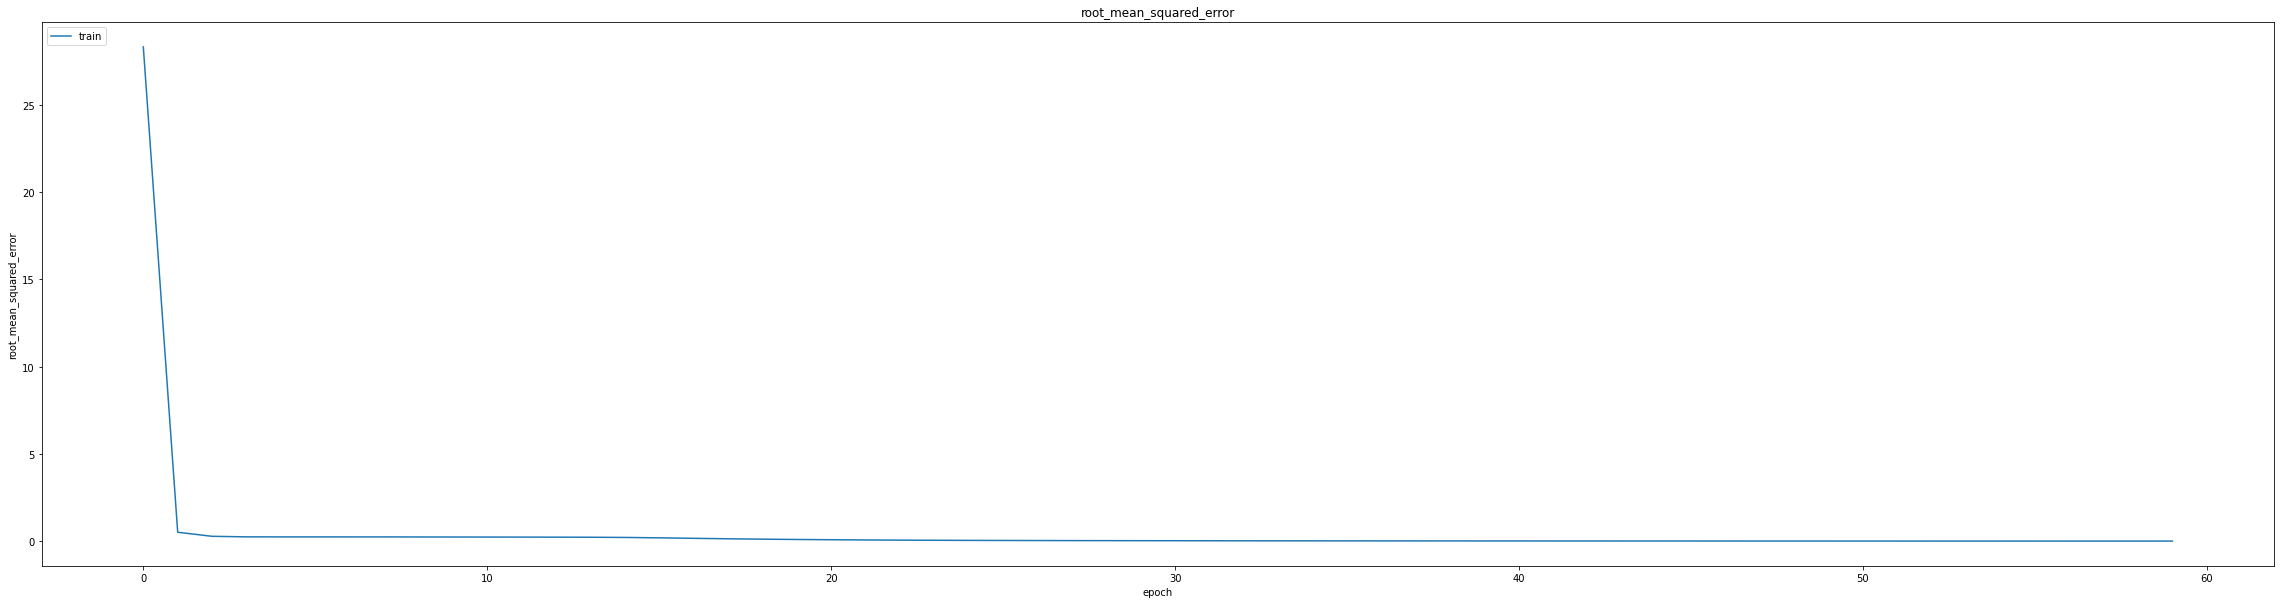

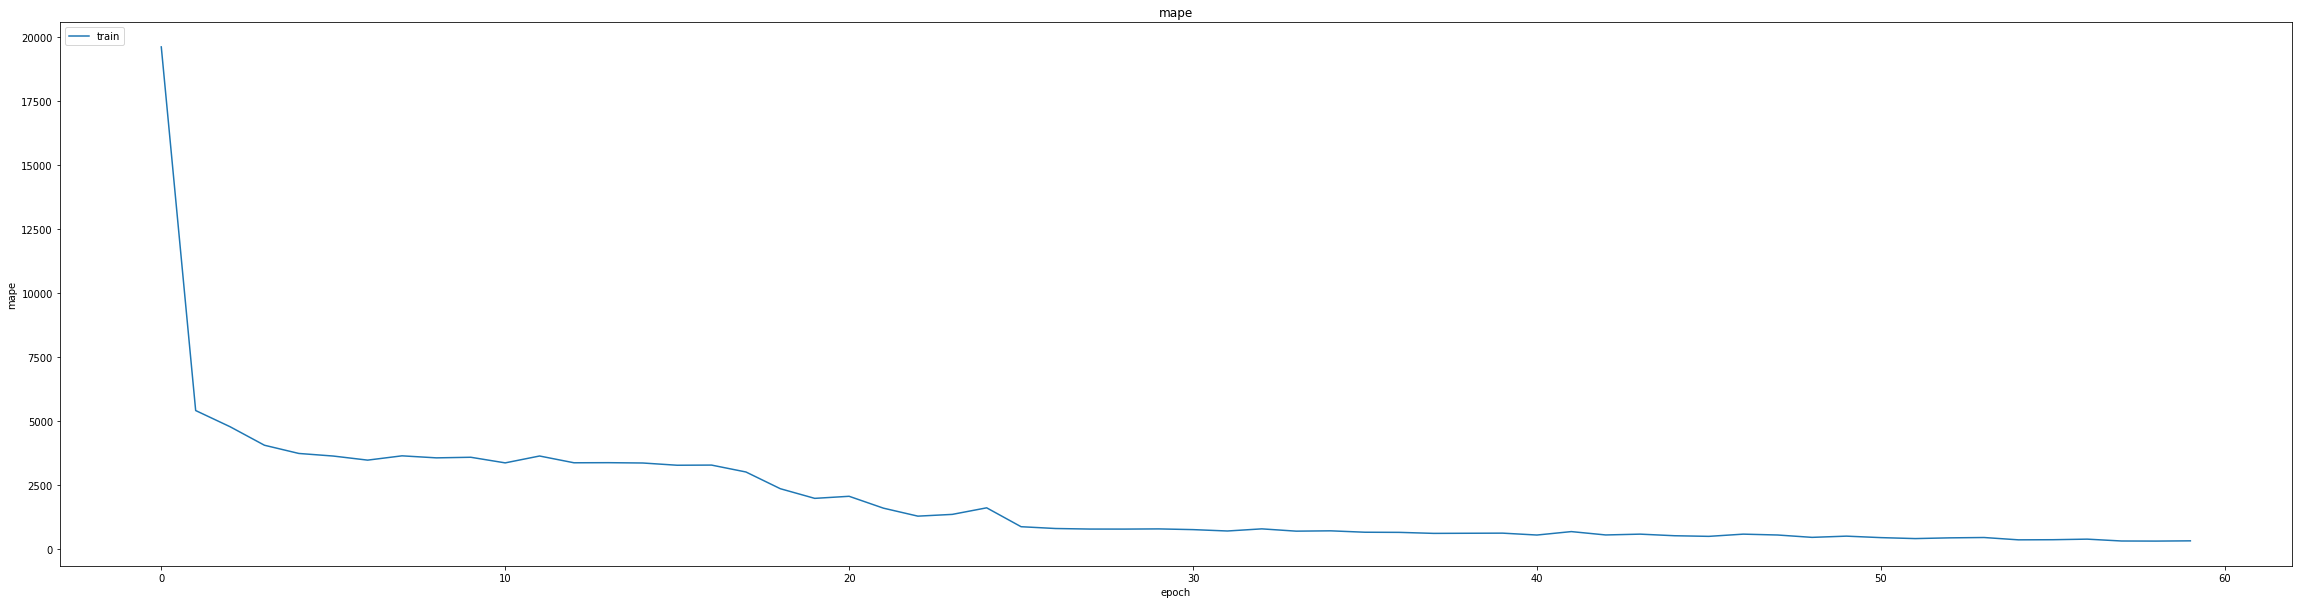

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0040235151536762714
0.005693167448043823
1044/1044 [==============================] - 10s 8ms/step
0.9984118769019462


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20


404/405 [============================>.] - ETA: 0s - loss: 6.5574e-04 - mae: 0.0110 - mse: 6.5574e-04 - root_mean_squared_error: 0.0256 - mape: 401.5164
Epoch 1: val_mse did not improve from 0.00003
405/405 [==============================] - 21s 25ms/step - loss: 6.5427e-04 - mae: 0.0109 - mse: 6.5427e-04 - root_mean_squared_error: 0.0256 - mape: 400.5497 - val_loss: 3.7804e-05 - val_mae: 0.0043 - val_mse: 3.7804e-05 - val_root_mean_squared_error: 0.0061 - val_mape: 1764.3446 - lr: 0.0010
Epoch 2/20
405/405 [==============================] - ETA: 0s - loss: 4.2569e-05 - mae: 0.0050 - mse: 4.2569e-05 - root_mean_squared_error: 0.0065 - mape: 355.9174
Epoch 2: val_mse did not improve from 0.00003
405/405 [==============================] - 9s 21ms/step - loss: 4.2569e-05 - mae: 0.0050 - mse: 4.2569e-05 - root_mean_squared_error: 0.0065 - mape: 355.9174 - val_loss: 3.5609e-05 - val_mae: 0.0037 - val_mse: 3.5609e-05 - val_root_mean_squared_error: 0.0060 - val_mape: 1717.3434 - lr: 0.0010
lr

405/405 [==============================] - 40s 100ms/step - loss: 3.4776e-05 - mae: 0.0045 - mse: 3.4776e-05 - root_mean_squared_error: 0.0059 - mape: 331.7066 - val_loss: 2.2505e-05 - val_mae: 0.0031 - val_mse: 2.2505e-05 - val_root_mean_squared_error: 0.0047 - val_mape: 1562.6454 - lr: 9.0000e-04
Epoch 4/20
405/405 [==============================] - ETA: 0s - loss: 3.5438e-05 - mae: 0.0046 - mse: 3.5438e-05 - root_mean_squared_error: 0.0060 - mape: 306.3823
Epoch 4: val_mse did not improve from 0.00002
405/405 [==============================] - 8s 21ms/step - loss: 3.5438e-05 - mae: 0.0046 - mse: 3.5438e-05 - root_mean_squared_error: 0.0060 - mape: 306.3823 - val_loss: 3.2393e-05 - val_mae: 0.0036 - val_mse: 3.2393e-05 - val_root_mean_squared_error: 0.0057 - val_mape: 1613.8613 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
404/405 [============================>.] - ETA: 0s - loss: 3.2310e-05 - mae: 0.0044 - mse: 3.2310e-05 - root_mean_squared_error: 0.0057 - mape: 3

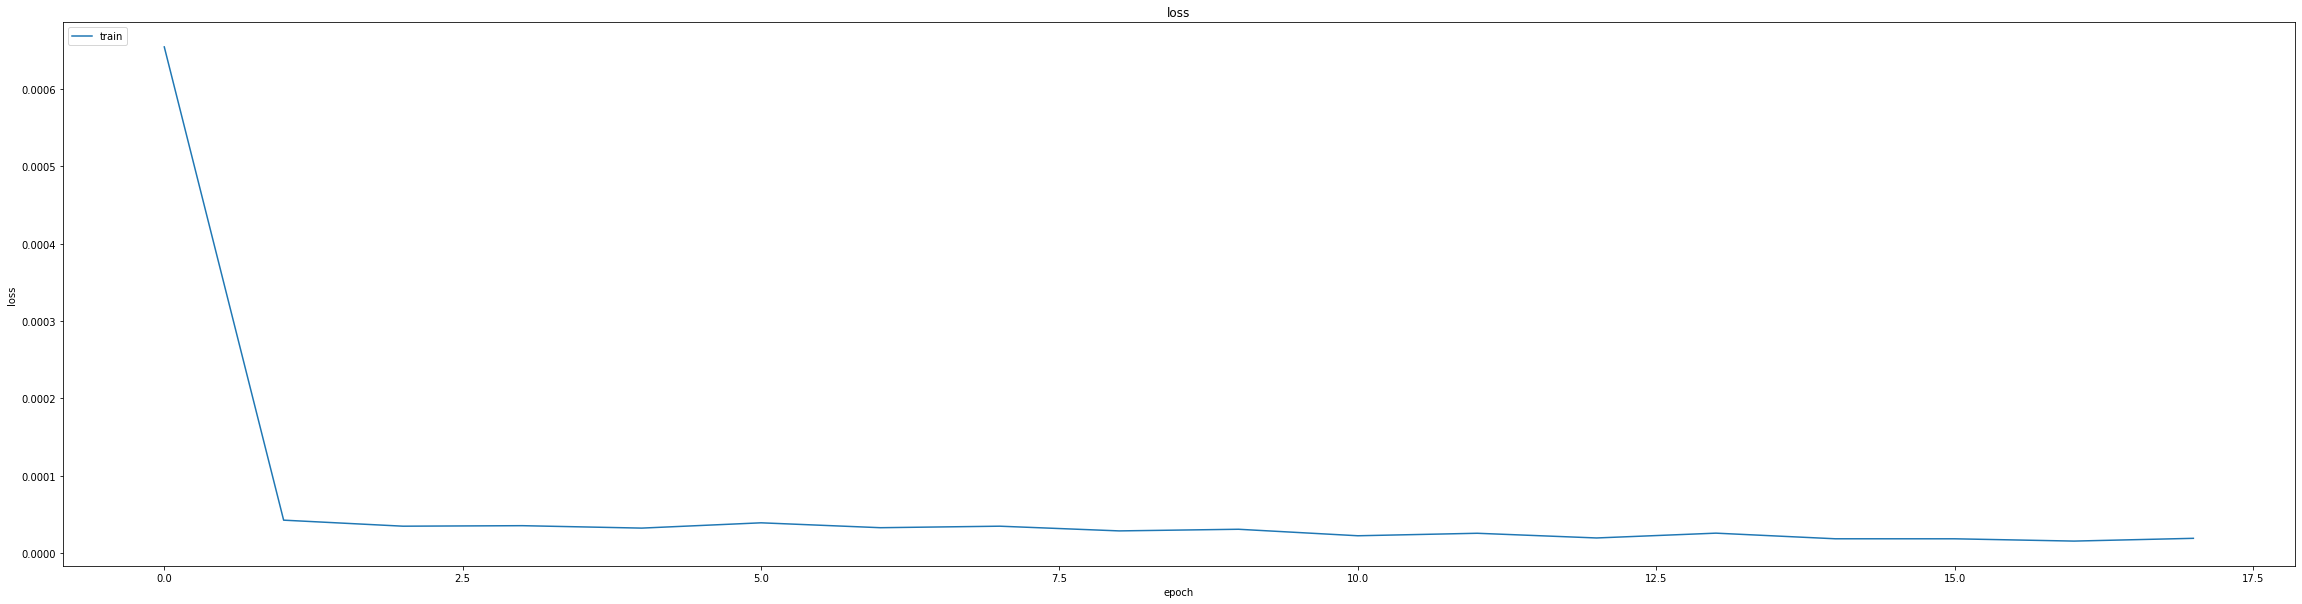

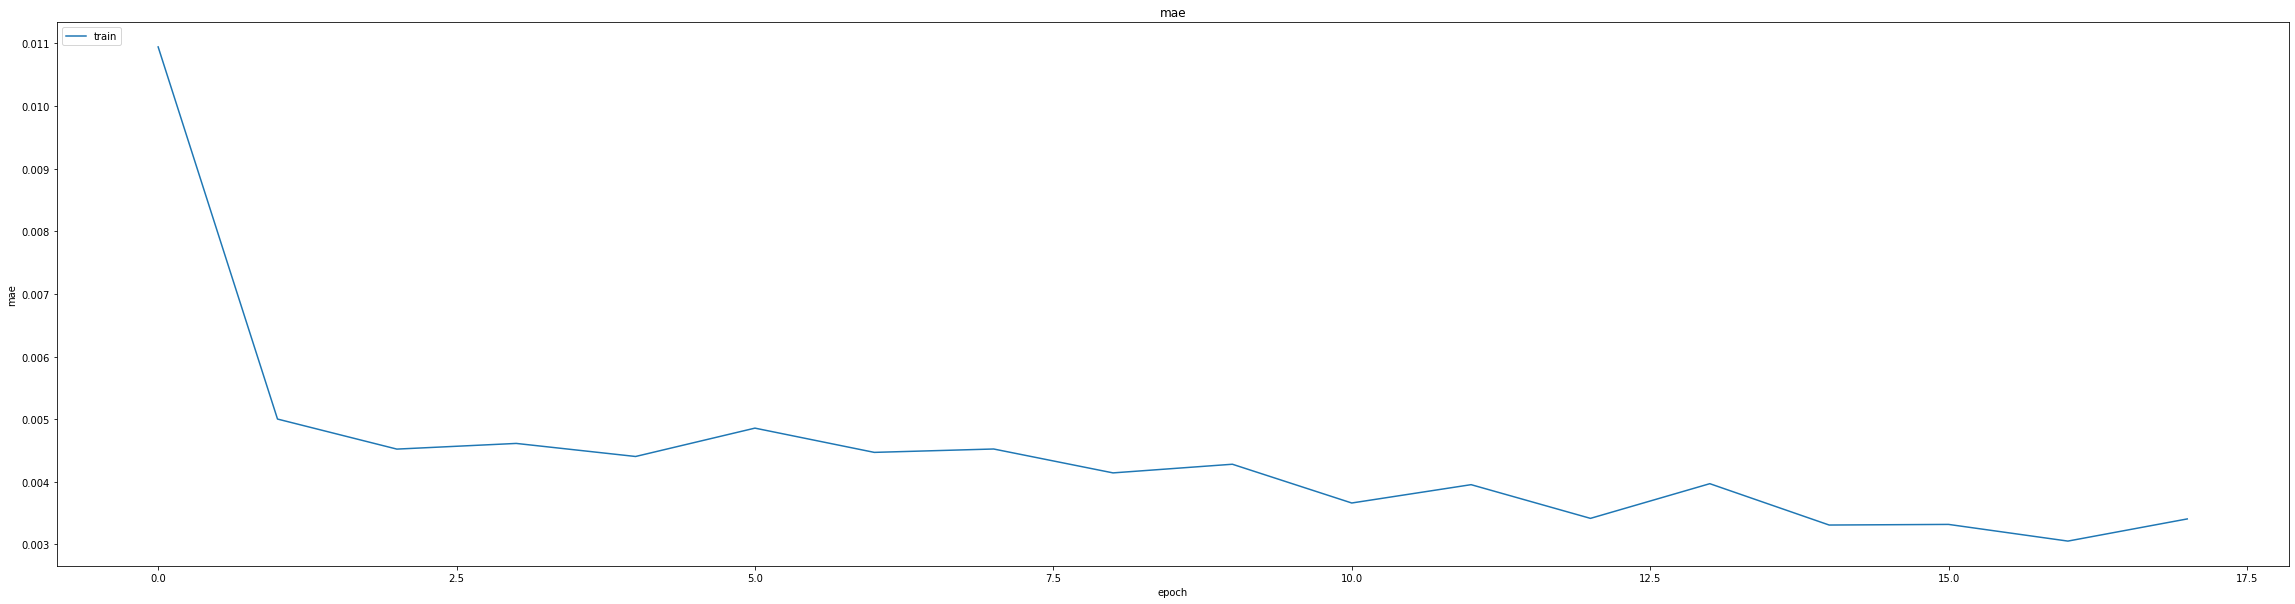

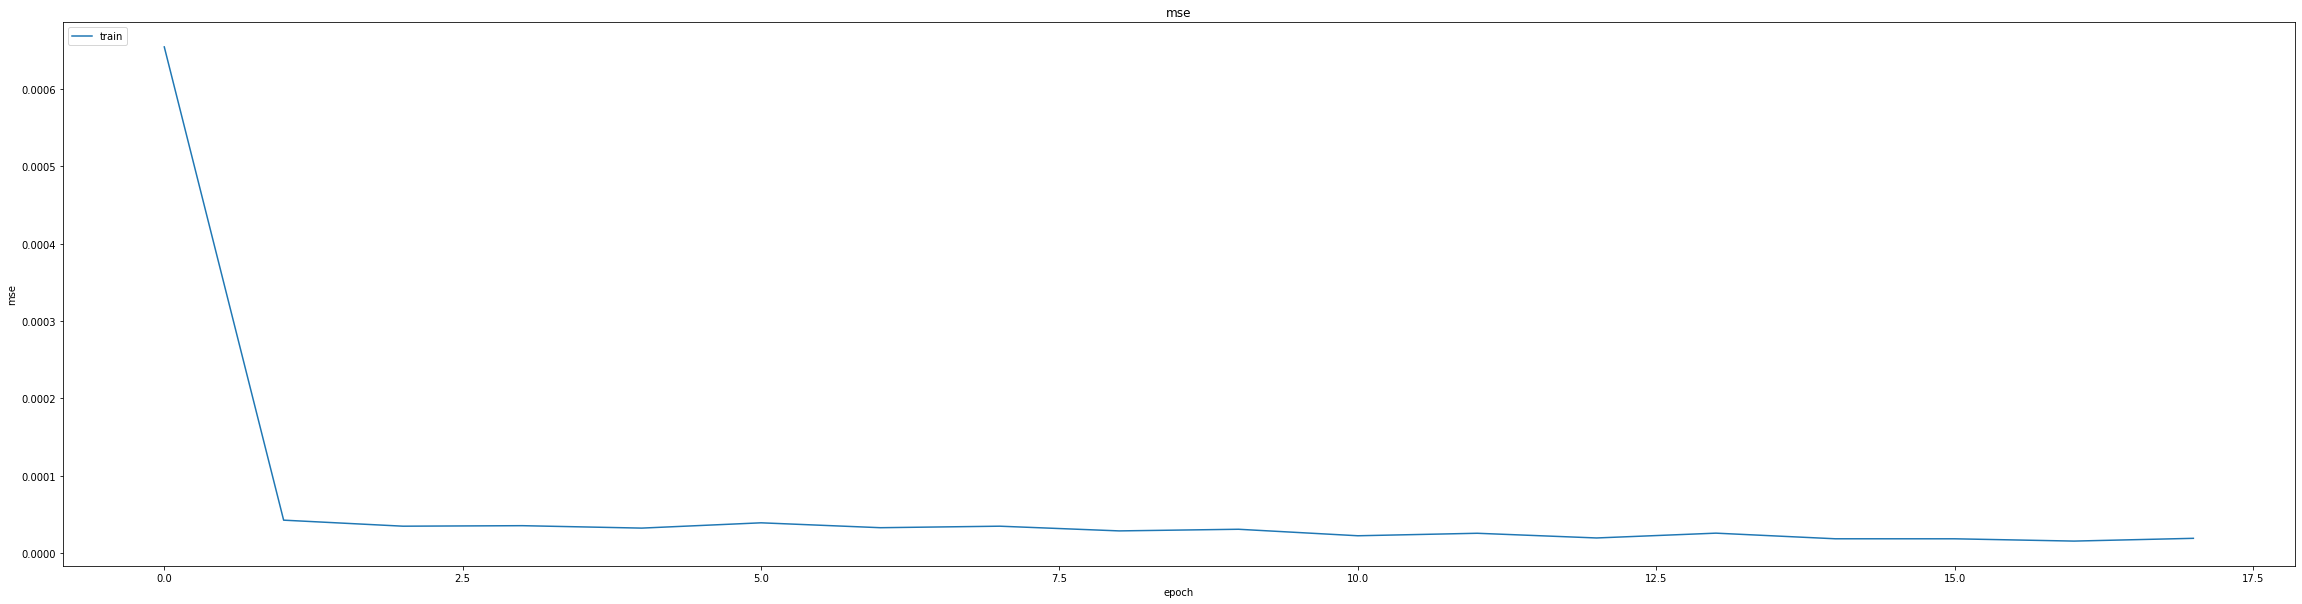

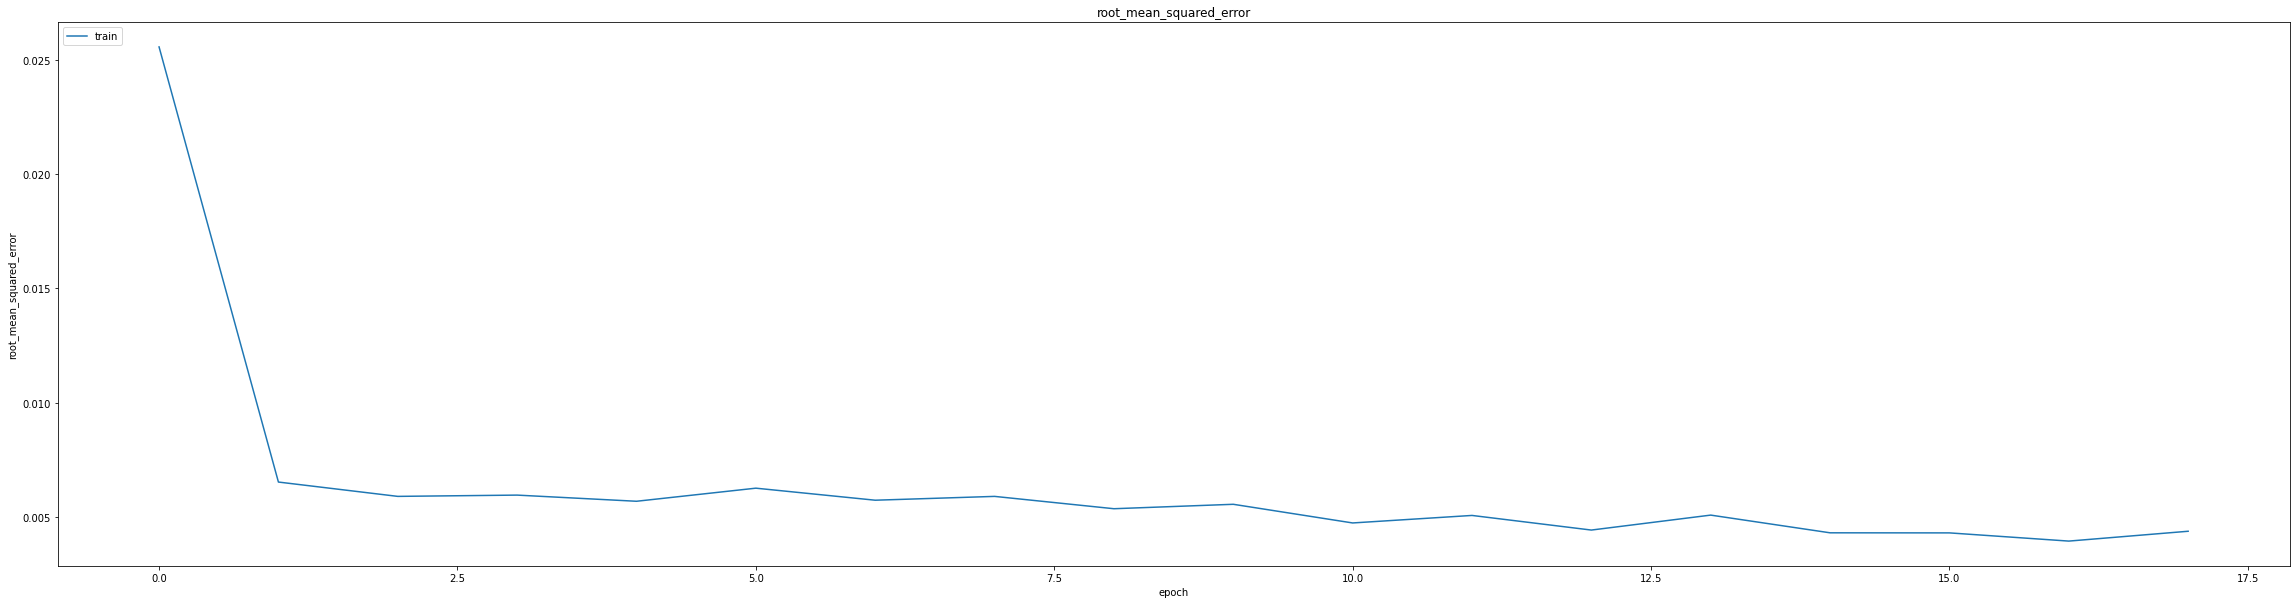

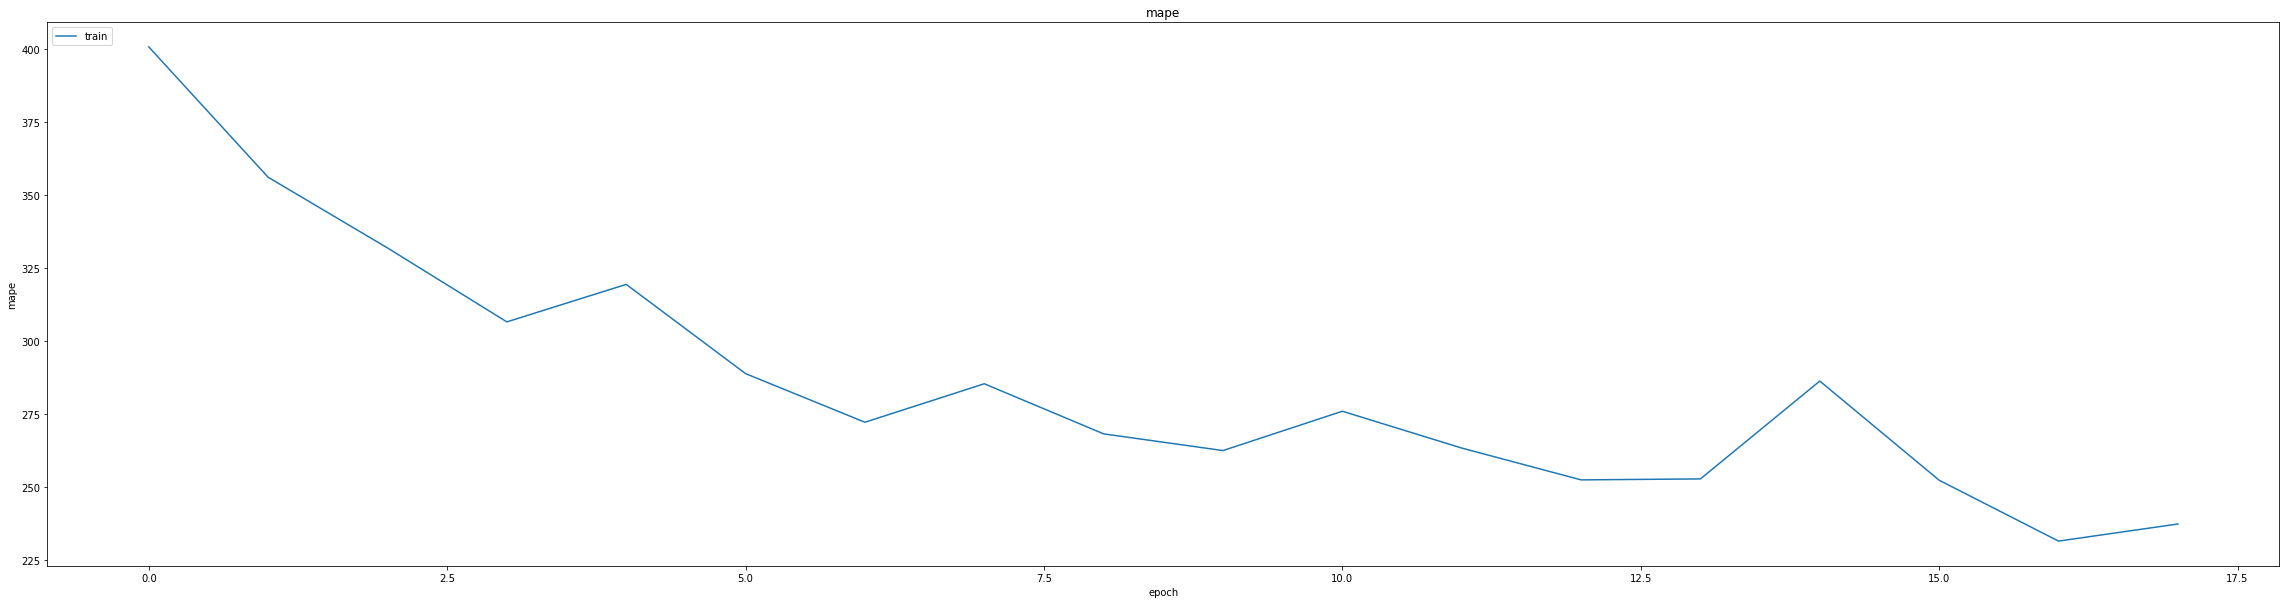

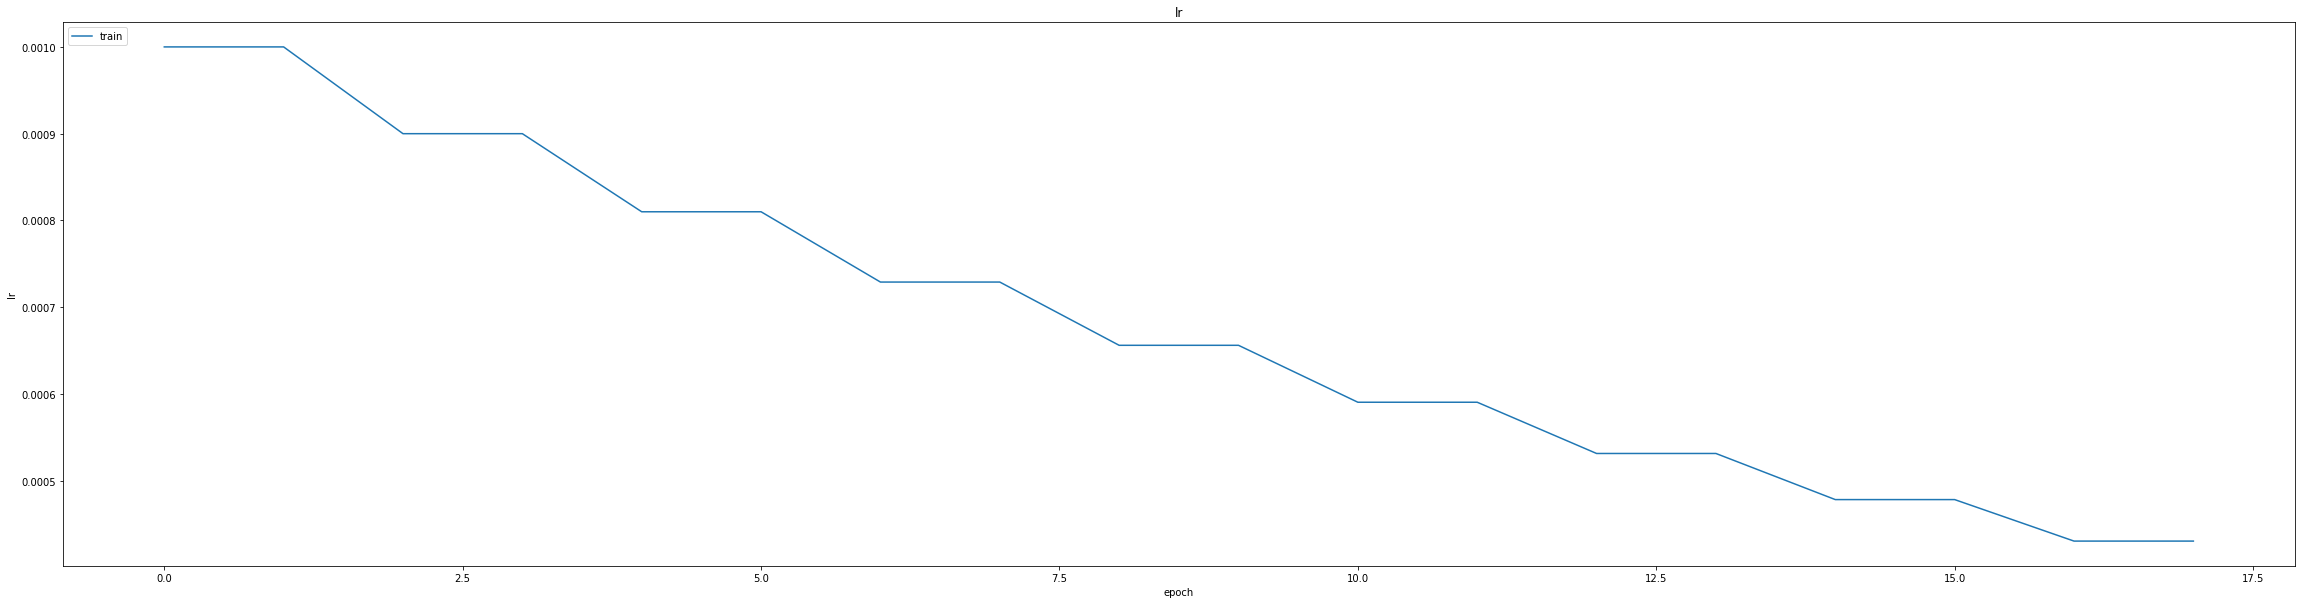

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0030523384921252728
0.004743926227092743
1044/1044 [==============================] - 8s 6ms/step
0.9984334031598173


1044/1044 [==============================] - 7s 6ms/step


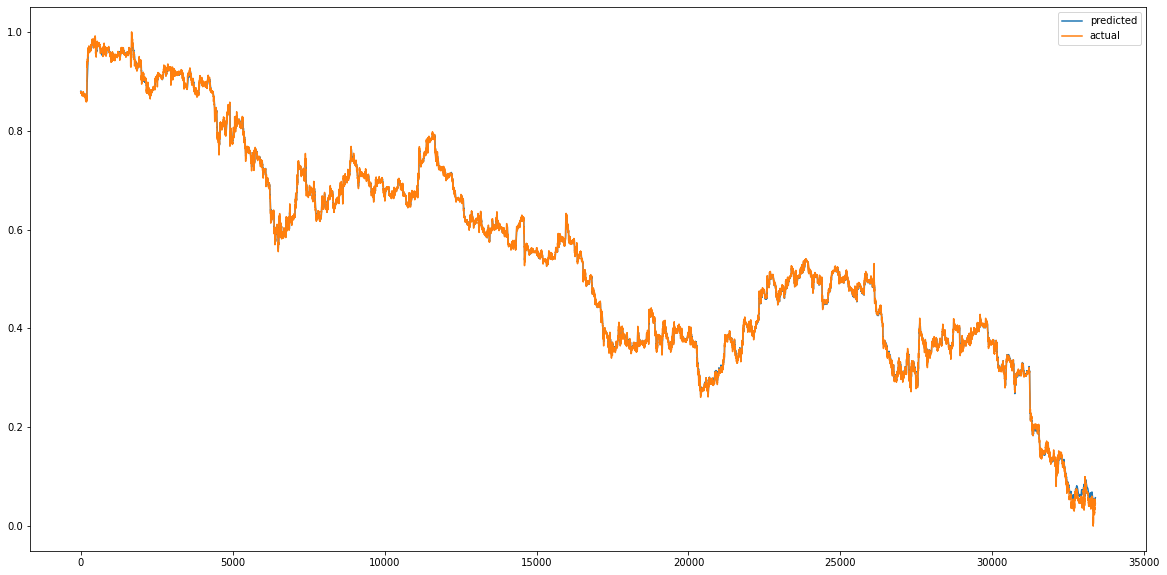

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


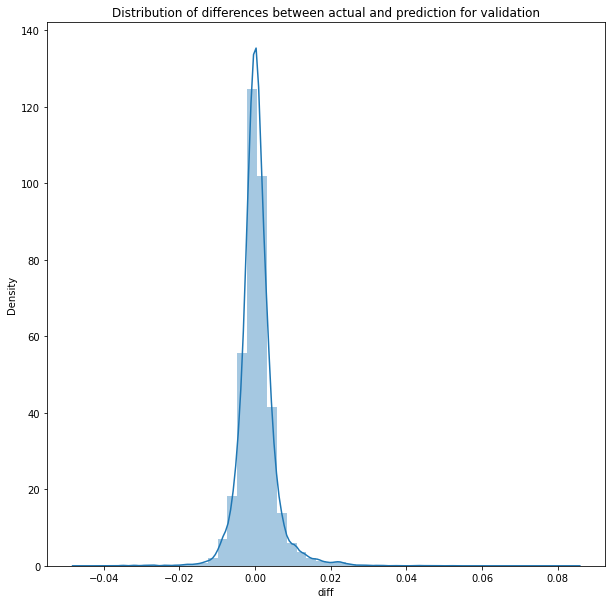

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1044/1044 [==============================] - 6s 6ms/step


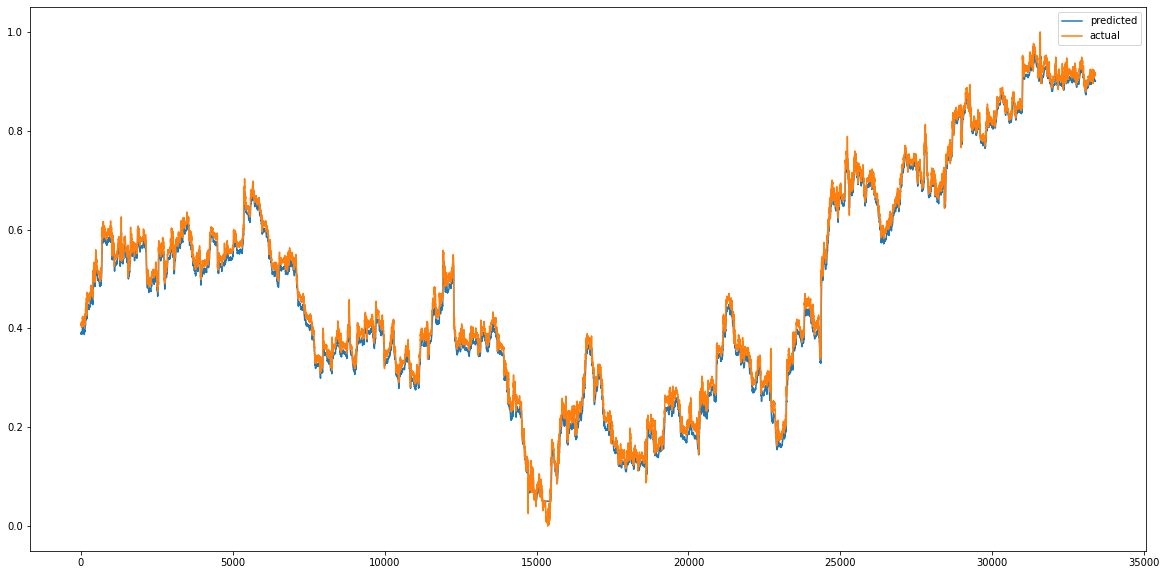

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


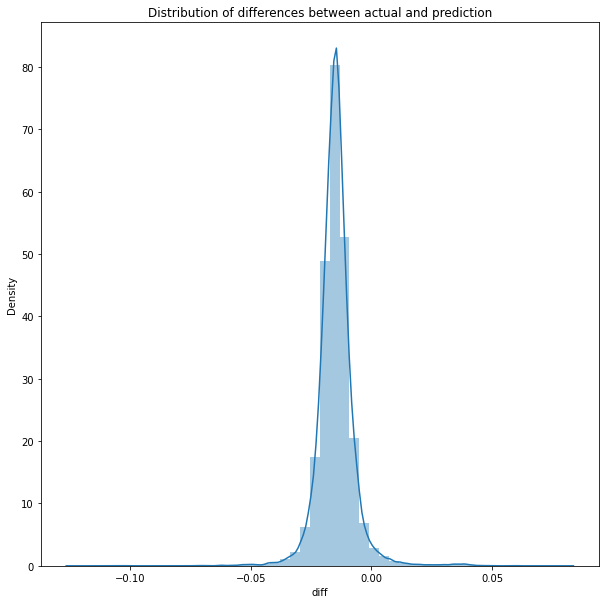

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00027644417497531195
RMSE :  0.016626610447572045
MAE :  0.015339724664412578
1044/1044 [==============================] - 6s 6ms/step
R2_Score  : 0.9947193746745425


count    33392.000000
mean        -0.014771
std          0.007633
min         -0.123639
25%         -0.018326
50%         -0.014972
75%         -0.011623
max          0.080824
Name: diff, dtype: float64

**LSTM_MODEL**

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 24, 256)           275456    
                                                                 
 lstm_15 (LSTM)              (None, 24, 64)            82176     
                                                                 
 dropout_7 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_16 (LSTM)              (None, 16)                5184      
                                                                 
 dense_21 (Dense)            (None, 32)                544       
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
403/405 [============================>.] - ETA: 0s - loss: 2083.6016 - mae: 19.0263 - mse: 2083.6016 - root_mean_squared_error: 45.6465 - mape: 41600.1289
Epoch 1: val_mse improved from inf to 3.31286, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(70-30)


405/405 [==============================] - 23s 45ms/step - loss: 2073.4355 - mae: 18.9423 - mse: 2073.4355 - root_mean_squared_error: 45.5350 - mape: 41401.2109 - val_loss: 3.3129 - val_mae: 1.8063 - val_mse: 3.3129 - val_root_mean_squared_error: 1.8201 - val_mape: 70985.9375
Epoch 2/60
404/405 [============================>.] - ETA: 0s - loss: 1.1668 - mae: 0.9848 - mse: 1.1668 - root_mean_squared_error: 1.0802 - mape: 7110.4395
Epoch 2: val_mse improved from 3.31286 to 0.32989, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 41ms/step - loss: 1.1649 - mae: 0.9837 - mse: 1.1649 - root_mean_squared_error: 1.0793 - mape: 7093.6943 - val_loss: 0.3299 - val_mae: 0.5291 - val_mse: 0.3299 - val_root_mean_squared_error: 0.5744 - val_mape: 32393.5000
Epoch 3/60
404/405 [============================>.] - ETA: 0s - loss: 0.1947 - mae: 0.3620 - mse: 0.1947 - root_mean_squared_error: 0.4412 - mape: 6753.4609
Epoch 3: val_mse improved from 0.32989 to 0.10197, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.1945 - mae: 0.3618 - mse: 0.1945 - root_mean_squared_error: 0.4410 - mape: 6737.4097 - val_loss: 0.1020 - val_mae: 0.2695 - val_mse: 0.1020 - val_root_mean_squared_error: 0.3193 - val_mape: 23302.1875
Epoch 4/60
405/405 [==============================] - ETA: 0s - loss: 0.0871 - mae: 0.2269 - mse: 0.0871 - root_mean_squared_error: 0.2951 - mape: 4453.0439
Epoch 4: val_mse improved from 0.10197 to 0.06092, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0871 - mae: 0.2269 - mse: 0.0871 - root_mean_squared_error: 0.2951 - mape: 4453.0439 - val_loss: 0.0609 - val_mae: 0.2048 - val_mse: 0.0609 - val_root_mean_squared_error: 0.2468 - val_mape: 19582.4766
Epoch 5/60
404/405 [============================>.] - ETA: 0s - loss: 0.0667 - mae: 0.2088 - mse: 0.0667 - root_mean_squared_error: 0.2582 - mape: 4534.9517
Epoch 5: val_mse improved from 0.06092 to 0.05223, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 43ms/step - loss: 0.0667 - mae: 0.2088 - mse: 0.0667 - root_mean_squared_error: 0.2582 - mape: 4524.1768 - val_loss: 0.0522 - val_mae: 0.1901 - val_mse: 0.0522 - val_root_mean_squared_error: 0.2285 - val_mape: 17864.8223
Epoch 6/60
405/405 [==============================] - ETA: 0s - loss: 0.0627 - mae: 0.2108 - mse: 0.0627 - root_mean_squared_error: 0.2503 - mape: 3878.2473
Epoch 6: val_mse improved from 0.05223 to 0.05044, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 41ms/step - loss: 0.0627 - mae: 0.2108 - mse: 0.0627 - root_mean_squared_error: 0.2503 - mape: 3878.2473 - val_loss: 0.0504 - val_mae: 0.1867 - val_mse: 0.0504 - val_root_mean_squared_error: 0.2246 - val_mape: 17091.6777
Epoch 7/60
403/405 [============================>.] - ETA: 0s - loss: 0.0620 - mae: 0.2129 - mse: 0.0620 - root_mean_squared_error: 0.2490 - mape: 3629.3621
Epoch 7: val_mse improved from 0.05044 to 0.05010, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 43ms/step - loss: 0.0620 - mae: 0.2130 - mse: 0.0620 - root_mean_squared_error: 0.2490 - mape: 3611.9912 - val_loss: 0.0501 - val_mae: 0.1858 - val_mse: 0.0501 - val_root_mean_squared_error: 0.2238 - val_mape: 16784.1543
Epoch 8/60
402/405 [============================>.] - ETA: 0s - loss: 0.0618 - mae: 0.2138 - mse: 0.0618 - root_mean_squared_error: 0.2487 - mape: 3415.9292
Epoch 8: val_mse improved from 0.05010 to 0.05003, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0618 - mae: 0.2138 - mse: 0.0618 - root_mean_squared_error: 0.2487 - mape: 3391.3606 - val_loss: 0.0500 - val_mae: 0.1856 - val_mse: 0.0500 - val_root_mean_squared_error: 0.2237 - val_mape: 16689.0898
Epoch 9/60
404/405 [============================>.] - ETA: 0s - loss: 0.0619 - mae: 0.2141 - mse: 0.0619 - root_mean_squared_error: 0.2487 - mape: 3649.2163
Epoch 9: val_mse improved from 0.05003 to 0.05002, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0619 - mae: 0.2141 - mse: 0.0619 - root_mean_squared_error: 0.2487 - mape: 3640.5647 - val_loss: 0.0500 - val_mae: 0.1855 - val_mse: 0.0500 - val_root_mean_squared_error: 0.2236 - val_mape: 16663.5312
Epoch 10/60
405/405 [==============================] - ETA: 0s - loss: 0.0618 - mae: 0.2140 - mse: 0.0618 - root_mean_squared_error: 0.2486 - mape: 3765.5818
Epoch 10: val_mse improved from 0.05002 to 0.05002, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0618 - mae: 0.2140 - mse: 0.0618 - root_mean_squared_error: 0.2486 - mape: 3765.5818 - val_loss: 0.0500 - val_mae: 0.1855 - val_mse: 0.0500 - val_root_mean_squared_error: 0.2236 - val_mape: 16663.5957
Epoch 11/60
402/405 [============================>.] - ETA: 0s - loss: 0.0617 - mae: 0.2135 - mse: 0.0617 - root_mean_squared_error: 0.2483 - mape: 4049.6104
Epoch 11: val_mse did not improve from 0.05002
405/405 [==============================] - 6s 16ms/step - loss: 0.0617 - mae: 0.2136 - mse: 0.0617 - root_mean_squared_error: 0.2484 - mape: 4020.4846 - val_loss: 0.0501 - val_mae: 0.1857 - val_mse: 0.0501 - val_root_mean_squared_error: 0.2237 - val_mape: 16726.4180
Epoch 12/60
405/405 [==============================] - ETA: 0s - loss: 0.0617 - mae: 0.2138 - mse: 0.0617 - root_mean_squared_error: 0.2484 - mape: 4178.5449
Epoch 12: val_mse did not improve from 0.05002
405/405 [==============================] - 6s 16ms/step

405/405 [==============================] - 17s 41ms/step - loss: 0.0616 - mae: 0.2138 - mse: 0.0616 - root_mean_squared_error: 0.2482 - mape: 3555.2097 - val_loss: 0.0500 - val_mae: 0.1855 - val_mse: 0.0500 - val_root_mean_squared_error: 0.2236 - val_mape: 16652.6641
Epoch 14/60
402/405 [============================>.] - ETA: 0s - loss: 0.0616 - mae: 0.2139 - mse: 0.0616 - root_mean_squared_error: 0.2482 - mape: 3509.1589
Epoch 14: val_mse did not improve from 0.05001
405/405 [==============================] - 6s 15ms/step - loss: 0.0616 - mae: 0.2139 - mse: 0.0616 - root_mean_squared_error: 0.2482 - mape: 3483.9099 - val_loss: 0.0500 - val_mae: 0.1855 - val_mse: 0.0500 - val_root_mean_squared_error: 0.2237 - val_mape: 16679.9336
Epoch 15/60
403/405 [============================>.] - ETA: 0s - loss: 0.0616 - mae: 0.2138 - mse: 0.0616 - root_mean_squared_error: 0.2482 - mape: 3609.9658
Epoch 15: val_mse did not improve from 0.05001
405/405 [==============================] - 6s 15ms/step

405/405 [==============================] - 17s 43ms/step - loss: 0.0616 - mae: 0.2138 - mse: 0.0616 - root_mean_squared_error: 0.2483 - mape: 3729.2703 - val_loss: 0.0500 - val_mae: 0.1854 - val_mse: 0.0500 - val_root_mean_squared_error: 0.2236 - val_mape: 16591.6973
Epoch 17/60
402/405 [============================>.] - ETA: 0s - loss: 0.0615 - mae: 0.2137 - mse: 0.0615 - root_mean_squared_error: 0.2480 - mape: 3958.6443
Epoch 17: val_mse did not improve from 0.04998
405/405 [==============================] - 6s 15ms/step - loss: 0.0615 - mae: 0.2138 - mse: 0.0615 - root_mean_squared_error: 0.2481 - mape: 3930.1230 - val_loss: 0.0500 - val_mae: 0.1856 - val_mse: 0.0500 - val_root_mean_squared_error: 0.2237 - val_mape: 16706.0781
Epoch 18/60
403/405 [============================>.] - ETA: 0s - loss: 0.0615 - mae: 0.2137 - mse: 0.0615 - root_mean_squared_error: 0.2481 - mape: 3910.1846
Epoch 18: val_mse did not improve from 0.04998
405/405 [==============================] - 6s 15ms/step

405/405 [==============================] - 17s 43ms/step - loss: 0.0610 - mae: 0.2130 - mse: 0.0610 - root_mean_squared_error: 0.2470 - mape: 3710.7500 - val_loss: 0.0498 - val_mae: 0.1853 - val_mse: 0.0498 - val_root_mean_squared_error: 0.2232 - val_mape: 16740.3184
Epoch 28/60
404/405 [============================>.] - ETA: 0s - loss: 0.0603 - mae: 0.2115 - mse: 0.0603 - root_mean_squared_error: 0.2455 - mape: 3520.2695
Epoch 28: val_mse improved from 0.04983 to 0.04881, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0603 - mae: 0.2114 - mse: 0.0603 - root_mean_squared_error: 0.2455 - mape: 3511.9358 - val_loss: 0.0488 - val_mae: 0.1830 - val_mse: 0.0488 - val_root_mean_squared_error: 0.2209 - val_mape: 16752.2793
Epoch 29/60
403/405 [============================>.] - ETA: 0s - loss: 0.0574 - mae: 0.2048 - mse: 0.0574 - root_mean_squared_error: 0.2395 - mape: 3819.9844
Epoch 29: val_mse improved from 0.04881 to 0.04370, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 43ms/step - loss: 0.0573 - mae: 0.2047 - mse: 0.0573 - root_mean_squared_error: 0.2394 - mape: 3801.6238 - val_loss: 0.0437 - val_mae: 0.1697 - val_mse: 0.0437 - val_root_mean_squared_error: 0.2090 - val_mape: 16442.5098
Epoch 30/60
403/405 [============================>.] - ETA: 0s - loss: 0.0360 - mae: 0.1510 - mse: 0.0360 - root_mean_squared_error: 0.1898 - mape: 3834.4983
Epoch 30: val_mse improved from 0.04370 to 0.00731, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 41ms/step - loss: 0.0359 - mae: 0.1507 - mse: 0.0359 - root_mean_squared_error: 0.1896 - mape: 3815.9629 - val_loss: 0.0073 - val_mae: 0.0629 - val_mse: 0.0073 - val_root_mean_squared_error: 0.0855 - val_mape: 9058.3145
Epoch 31/60
404/405 [============================>.] - ETA: 0s - loss: 0.0078 - mae: 0.0696 - mse: 0.0078 - root_mean_squared_error: 0.0883 - mape: 1776.6664
Epoch 31: val_mse improved from 0.00731 to 0.00458, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0078 - mae: 0.0696 - mse: 0.0078 - root_mean_squared_error: 0.0883 - mape: 1772.4126 - val_loss: 0.0046 - val_mae: 0.0599 - val_mse: 0.0046 - val_root_mean_squared_error: 0.0677 - val_mape: 5650.6895
Epoch 32/60
405/405 [==============================] - ETA: 0s - loss: 0.0038 - mae: 0.0480 - mse: 0.0038 - root_mean_squared_error: 0.0615 - mape: 1122.7527
Epoch 32: val_mse improved from 0.00458 to 0.00160, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0038 - mae: 0.0480 - mse: 0.0038 - root_mean_squared_error: 0.0615 - mape: 1122.7527 - val_loss: 0.0016 - val_mae: 0.0307 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0399 - val_mape: 4435.5898
Epoch 33/60
405/405 [==============================] - ETA: 0s - loss: 0.0023 - mae: 0.0377 - mse: 0.0023 - root_mean_squared_error: 0.0484 - mape: 790.3528
Epoch 33: val_mse improved from 0.00160 to 0.00087, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0023 - mae: 0.0377 - mse: 0.0023 - root_mean_squared_error: 0.0484 - mape: 790.3528 - val_loss: 8.7227e-04 - val_mae: 0.0217 - val_mse: 8.7227e-04 - val_root_mean_squared_error: 0.0295 - val_mape: 3945.4805
Epoch 34/60
405/405 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0323 - mse: 0.0017 - root_mean_squared_error: 0.0415 - mape: 970.5971
Epoch 34: val_mse improved from 0.00087 to 0.00065, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0017 - mae: 0.0323 - mse: 0.0017 - root_mean_squared_error: 0.0415 - mape: 970.5971 - val_loss: 6.4859e-04 - val_mae: 0.0173 - val_mse: 6.4859e-04 - val_root_mean_squared_error: 0.0255 - val_mape: 3675.6365
Epoch 35/60
403/405 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0281 - mse: 0.0013 - root_mean_squared_error: 0.0362 - mape: 817.5720
Epoch 35: val_mse did not improve from 0.00065
405/405 [==============================] - 6s 16ms/step - loss: 0.0013 - mae: 0.0281 - mse: 0.0013 - root_mean_squared_error: 0.0362 - mape: 813.6166 - val_loss: 8.9858e-04 - val_mae: 0.0253 - val_mse: 8.9858e-04 - val_root_mean_squared_error: 0.0300 - val_mape: 3383.6174
Epoch 36/60
402/405 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0251 - mse: 0.0010 - root_mean_squared_error: 0.0324 - mape: 648.9307
Epoch 36: val_mse improved from 0.00065 to 0.00034, saving model to /content/drive/MyDrive/m

405/405 [==============================] - 18s 43ms/step - loss: 0.0010 - mae: 0.0251 - mse: 0.0010 - root_mean_squared_error: 0.0323 - mape: 644.2064 - val_loss: 3.4425e-04 - val_mae: 0.0125 - val_mse: 3.4425e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 3178.5601
Epoch 37/60
404/405 [============================>.] - ETA: 0s - loss: 8.8299e-04 - mae: 0.0231 - mse: 8.8299e-04 - root_mean_squared_error: 0.0297 - mape: 797.2163
Epoch 37: val_mse improved from 0.00034 to 0.00034, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 8.8245e-04 - mae: 0.0231 - mse: 8.8245e-04 - root_mean_squared_error: 0.0297 - mape: 795.3019 - val_loss: 3.3871e-04 - val_mae: 0.0135 - val_mse: 3.3871e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 3055.4390
Epoch 38/60
403/405 [============================>.] - ETA: 0s - loss: 7.2231e-04 - mae: 0.0208 - mse: 7.2231e-04 - root_mean_squared_error: 0.0269 - mape: 604.3235
Epoch 38: val_mse improved from 0.00034 to 0.00031, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 7.2189e-04 - mae: 0.0208 - mse: 7.2189e-04 - root_mean_squared_error: 0.0269 - mape: 601.3973 - val_loss: 3.1454e-04 - val_mae: 0.0136 - val_mse: 3.1454e-04 - val_root_mean_squared_error: 0.0177 - val_mape: 2910.0803
Epoch 39/60
402/405 [============================>.] - ETA: 0s - loss: 6.2478e-04 - mae: 0.0194 - mse: 6.2478e-04 - root_mean_squared_error: 0.0250 - mape: 570.6548
Epoch 39: val_mse did not improve from 0.00031
405/405 [==============================] - 6s 16ms/step - loss: 6.2413e-04 - mae: 0.0194 - mse: 6.2413e-04 - root_mean_squared_error: 0.0250 - mape: 566.5010 - val_loss: 3.5117e-04 - val_mae: 0.0149 - val_mse: 3.5117e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 2817.6416
Epoch 40/60
403/405 [============================>.] - ETA: 0s - loss: 5.5085e-04 - mae: 0.0182 - mse: 5.5085e-04 - root_mean_squared_error: 0.0235 - mape: 647.0176
Epoch 40: val_mse improved from 0.00031 to 0.00025, saving m

405/405 [==============================] - 17s 43ms/step - loss: 5.5059e-04 - mae: 0.0182 - mse: 5.5059e-04 - root_mean_squared_error: 0.0235 - mape: 643.8779 - val_loss: 2.5064e-04 - val_mae: 0.0112 - val_mse: 2.5064e-04 - val_root_mean_squared_error: 0.0158 - val_mape: 2768.6646
Epoch 41/60
404/405 [============================>.] - ETA: 0s - loss: 4.8552e-04 - mae: 0.0171 - mse: 4.8552e-04 - root_mean_squared_error: 0.0220 - mape: 668.1952
Epoch 41: val_mse did not improve from 0.00025
405/405 [==============================] - 6s 16ms/step - loss: 4.8540e-04 - mae: 0.0171 - mse: 4.8540e-04 - root_mean_squared_error: 0.0220 - mape: 666.5912 - val_loss: 3.1512e-04 - val_mae: 0.0139 - val_mse: 3.1512e-04 - val_root_mean_squared_error: 0.0178 - val_mape: 2731.6042
Epoch 42/60
403/405 [============================>.] - ETA: 0s - loss: 4.1465e-04 - mae: 0.0158 - mse: 4.1465e-04 - root_mean_squared_error: 0.0204 - mape: 602.6332
Epoch 42: val_mse improved from 0.00025 to 0.00018, saving m

405/405 [==============================] - 17s 41ms/step - loss: 4.1475e-04 - mae: 0.0158 - mse: 4.1475e-04 - root_mean_squared_error: 0.0204 - mape: 599.7107 - val_loss: 1.8163e-04 - val_mae: 0.0093 - val_mse: 1.8163e-04 - val_root_mean_squared_error: 0.0135 - val_mape: 2688.4106
Epoch 43/60
402/405 [============================>.] - ETA: 0s - loss: 3.7603e-04 - mae: 0.0151 - mse: 3.7603e-04 - root_mean_squared_error: 0.0194 - mape: 536.5709
Epoch 43: val_mse did not improve from 0.00018
405/405 [==============================] - 6s 16ms/step - loss: 3.7581e-04 - mae: 0.0151 - mse: 3.7581e-04 - root_mean_squared_error: 0.0194 - mape: 532.6525 - val_loss: 1.8691e-04 - val_mae: 0.0096 - val_mse: 1.8691e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 2655.8645
Epoch 44/60
402/405 [============================>.] - ETA: 0s - loss: 3.2866e-04 - mae: 0.0141 - mse: 3.2866e-04 - root_mean_squared_error: 0.0181 - mape: 514.5696
Epoch 44: val_mse did not improve from 0.00018
405/405 [====

405/405 [==============================] - 18s 43ms/step - loss: 2.8419e-04 - mae: 0.0130 - mse: 2.8419e-04 - root_mean_squared_error: 0.0169 - mape: 550.0051 - val_loss: 1.6286e-04 - val_mae: 0.0089 - val_mse: 1.6286e-04 - val_root_mean_squared_error: 0.0128 - val_mape: 2564.2295
Epoch 47/60
404/405 [============================>.] - ETA: 0s - loss: 2.6407e-04 - mae: 0.0126 - mse: 2.6407e-04 - root_mean_squared_error: 0.0163 - mape: 517.3866
Epoch 47: val_mse did not improve from 0.00016
405/405 [==============================] - 6s 16ms/step - loss: 2.6413e-04 - mae: 0.0126 - mse: 2.6413e-04 - root_mean_squared_error: 0.0163 - mape: 516.1425 - val_loss: 1.8844e-04 - val_mae: 0.0100 - val_mse: 1.8844e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 2504.9734
Epoch 48/60
403/405 [============================>.] - ETA: 0s - loss: 2.3574e-04 - mae: 0.0119 - mse: 2.3574e-04 - root_mean_squared_error: 0.0154 - mape: 494.4084
Epoch 48: val_mse did not improve from 0.00016
405/405 [====

405/405 [==============================] - 17s 43ms/step - loss: 2.0459e-04 - mae: 0.0111 - mse: 2.0459e-04 - root_mean_squared_error: 0.0143 - mape: 466.1360 - val_loss: 1.5184e-04 - val_mae: 0.0089 - val_mse: 1.5184e-04 - val_root_mean_squared_error: 0.0123 - val_mape: 2310.3933
Epoch 52/60
403/405 [============================>.] - ETA: 0s - loss: 1.8327e-04 - mae: 0.0105 - mse: 1.8327e-04 - root_mean_squared_error: 0.0135 - mape: 446.4655
Epoch 52: val_mse did not improve from 0.00015
405/405 [==============================] - 6s 16ms/step - loss: 1.8351e-04 - mae: 0.0105 - mse: 1.8351e-04 - root_mean_squared_error: 0.0135 - mape: 444.3044 - val_loss: 1.9407e-04 - val_mae: 0.0108 - val_mse: 1.9407e-04 - val_root_mean_squared_error: 0.0139 - val_mape: 2246.5078
Epoch 53/60
405/405 [==============================] - ETA: 0s - loss: 1.7661e-04 - mae: 0.0103 - mse: 1.7661e-04 - root_mean_squared_error: 0.0133 - mape: 480.0844
Epoch 53: val_mse improved from 0.00015 to 0.00014, saving m

405/405 [==============================] - 20s 50ms/step - loss: 1.7661e-04 - mae: 0.0103 - mse: 1.7661e-04 - root_mean_squared_error: 0.0133 - mape: 480.0844 - val_loss: 1.4100e-04 - val_mae: 0.0085 - val_mse: 1.4100e-04 - val_root_mean_squared_error: 0.0119 - val_mape: 2152.0793
Epoch 54/60
404/405 [============================>.] - ETA: 0s - loss: 1.7652e-04 - mae: 0.0103 - mse: 1.7652e-04 - root_mean_squared_error: 0.0133 - mape: 420.8221
Epoch 54: val_mse did not improve from 0.00014
405/405 [==============================] - 6s 16ms/step - loss: 1.7654e-04 - mae: 0.0103 - mse: 1.7654e-04 - root_mean_squared_error: 0.0133 - mape: 419.8112 - val_loss: 2.2887e-04 - val_mae: 0.0121 - val_mse: 2.2887e-04 - val_root_mean_squared_error: 0.0151 - val_mape: 2101.3489
Epoch 55/60
405/405 [==============================] - ETA: 0s - loss: 1.6104e-04 - mae: 0.0099 - mse: 1.6104e-04 - root_mean_squared_error: 0.0127 - mape: 448.1599
Epoch 55: val_mse did not improve from 0.00014
405/405 [====

405/405 [==============================] - 17s 42ms/step - loss: 1.4489e-04 - mae: 0.0093 - mse: 1.4489e-04 - root_mean_squared_error: 0.0120 - mape: 391.2970 - val_loss: 1.3073e-04 - val_mae: 0.0083 - val_mse: 1.3073e-04 - val_root_mean_squared_error: 0.0114 - val_mape: 1960.7418
Epoch 57/60
405/405 [==============================] - ETA: 0s - loss: 1.5050e-04 - mae: 0.0094 - mse: 1.5050e-04 - root_mean_squared_error: 0.0123 - mape: 420.9094
Epoch 57: val_mse did not improve from 0.00013
405/405 [==============================] - 6s 16ms/step - loss: 1.5050e-04 - mae: 0.0094 - mse: 1.5050e-04 - root_mean_squared_error: 0.0123 - mape: 420.9094 - val_loss: 1.8044e-04 - val_mae: 0.0104 - val_mse: 1.8044e-04 - val_root_mean_squared_error: 0.0134 - val_mape: 1992.2502
Epoch 58/60
404/405 [============================>.] - ETA: 0s - loss: 1.3948e-04 - mae: 0.0091 - mse: 1.3948e-04 - root_mean_squared_error: 0.0118 - mape: 467.6245
Epoch 58: val_mse did not improve from 0.00013
405/405 [====

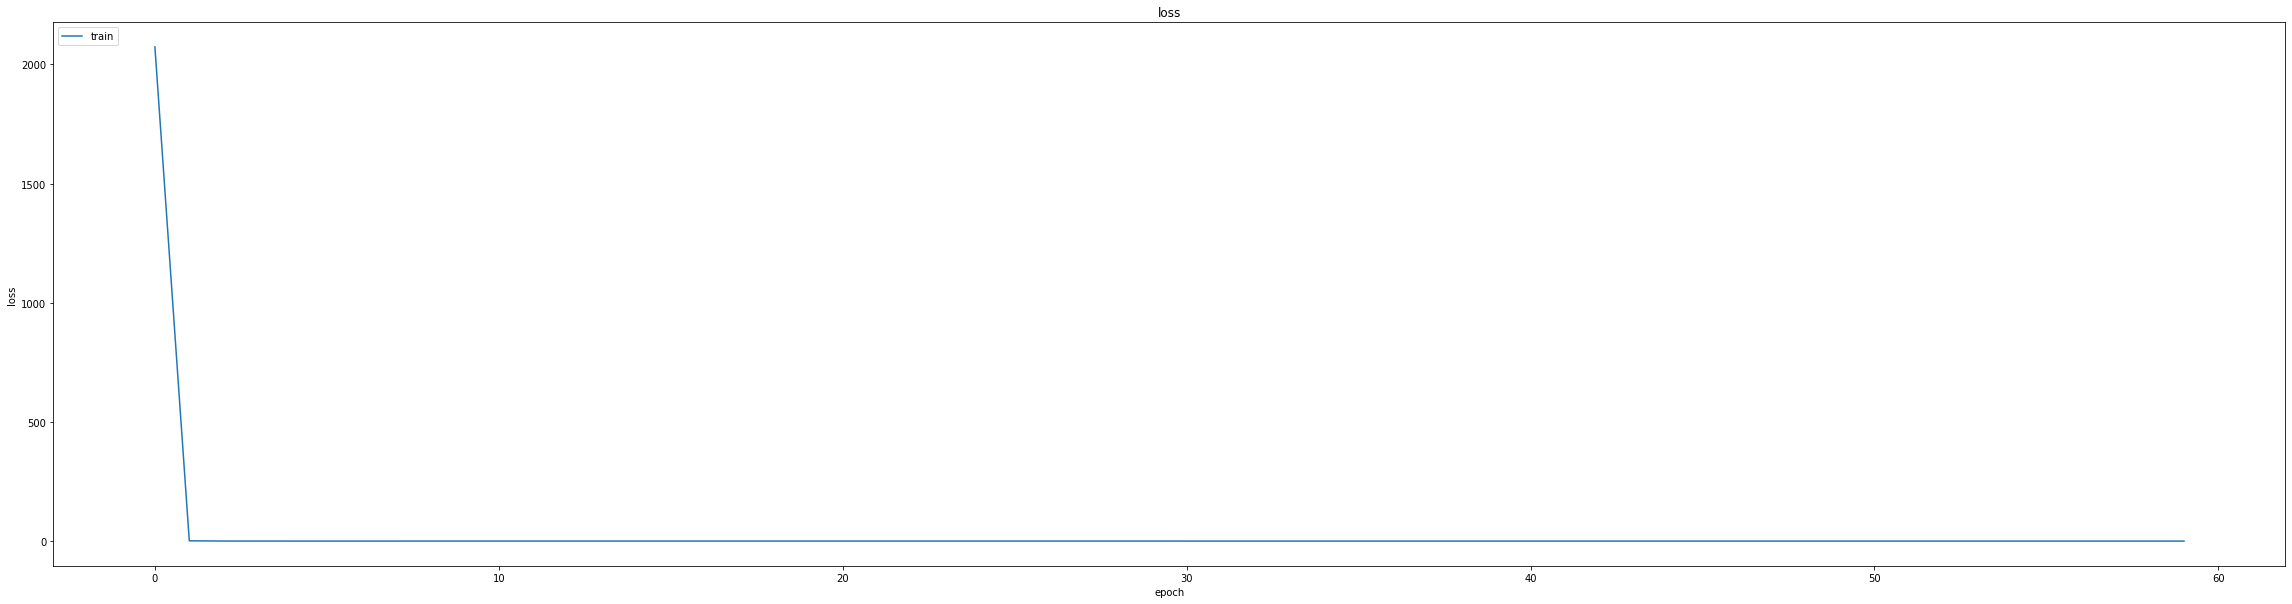

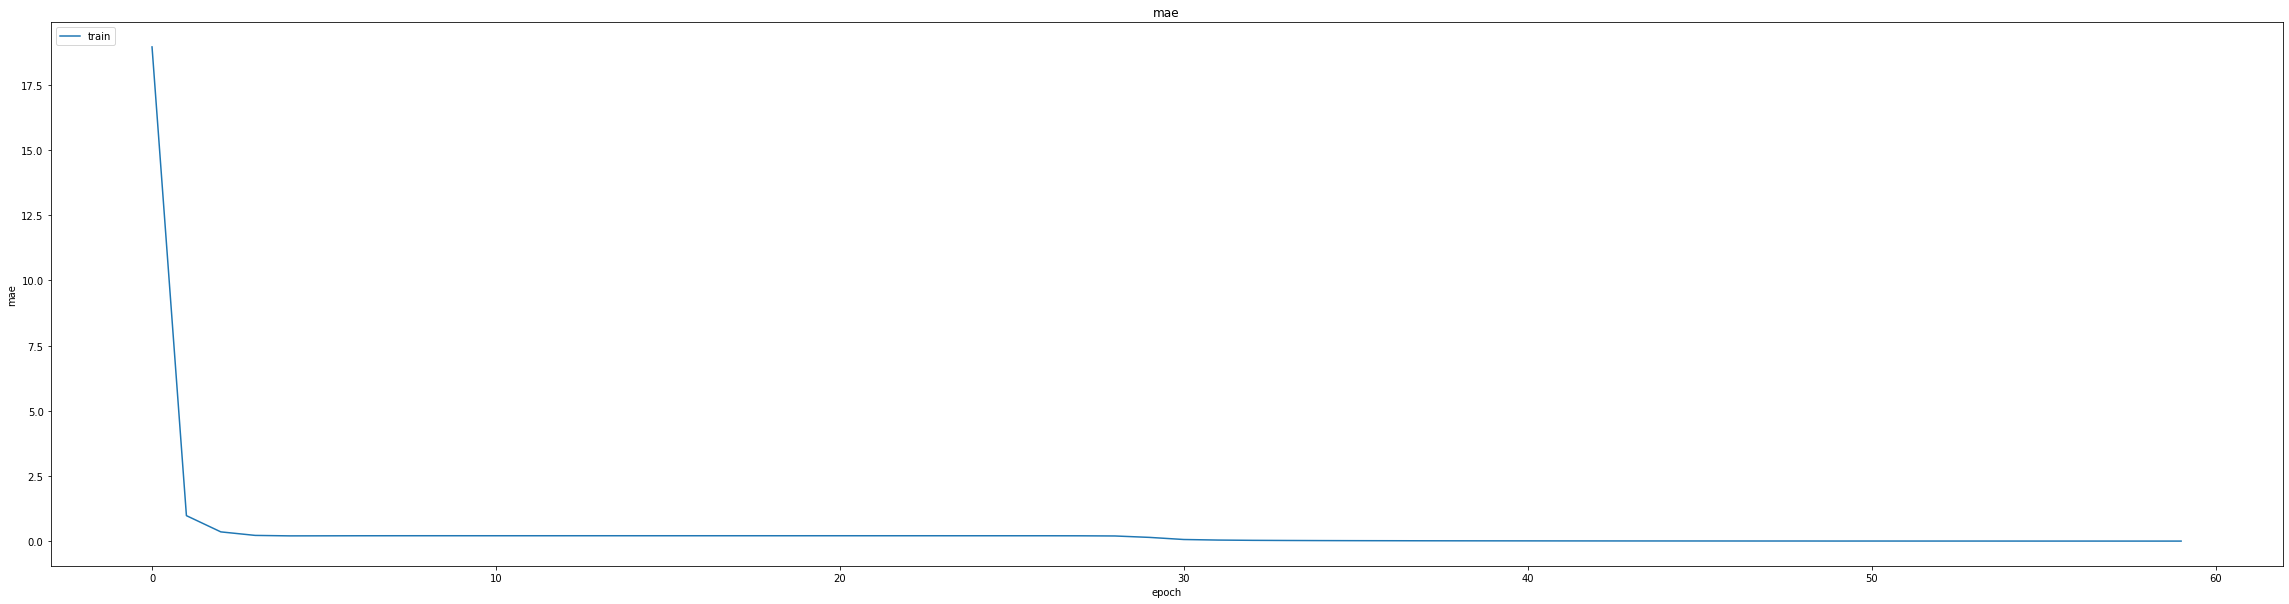

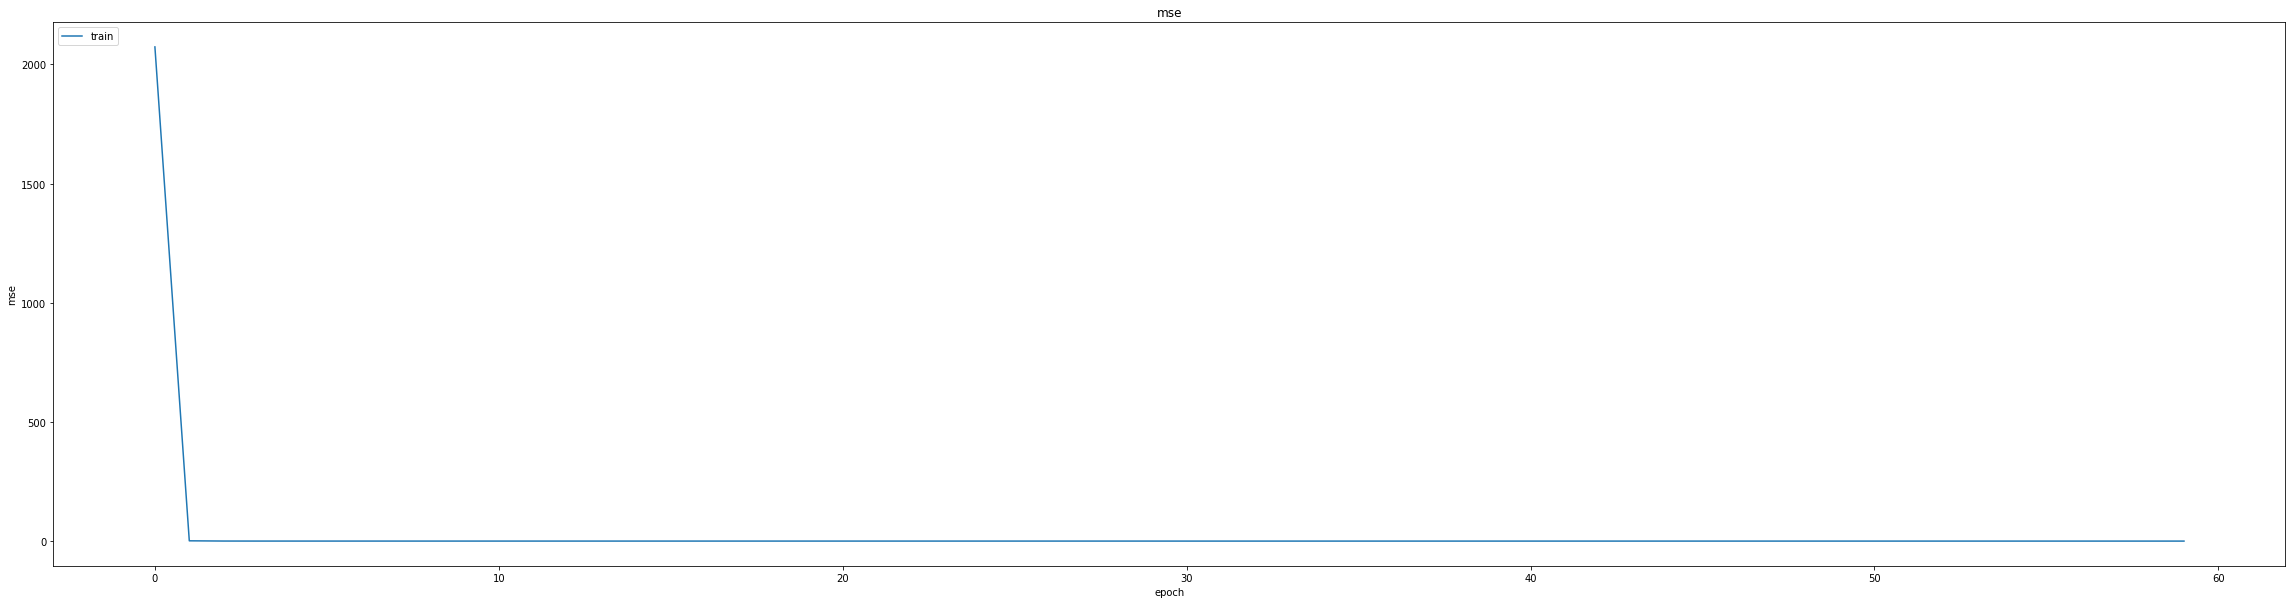

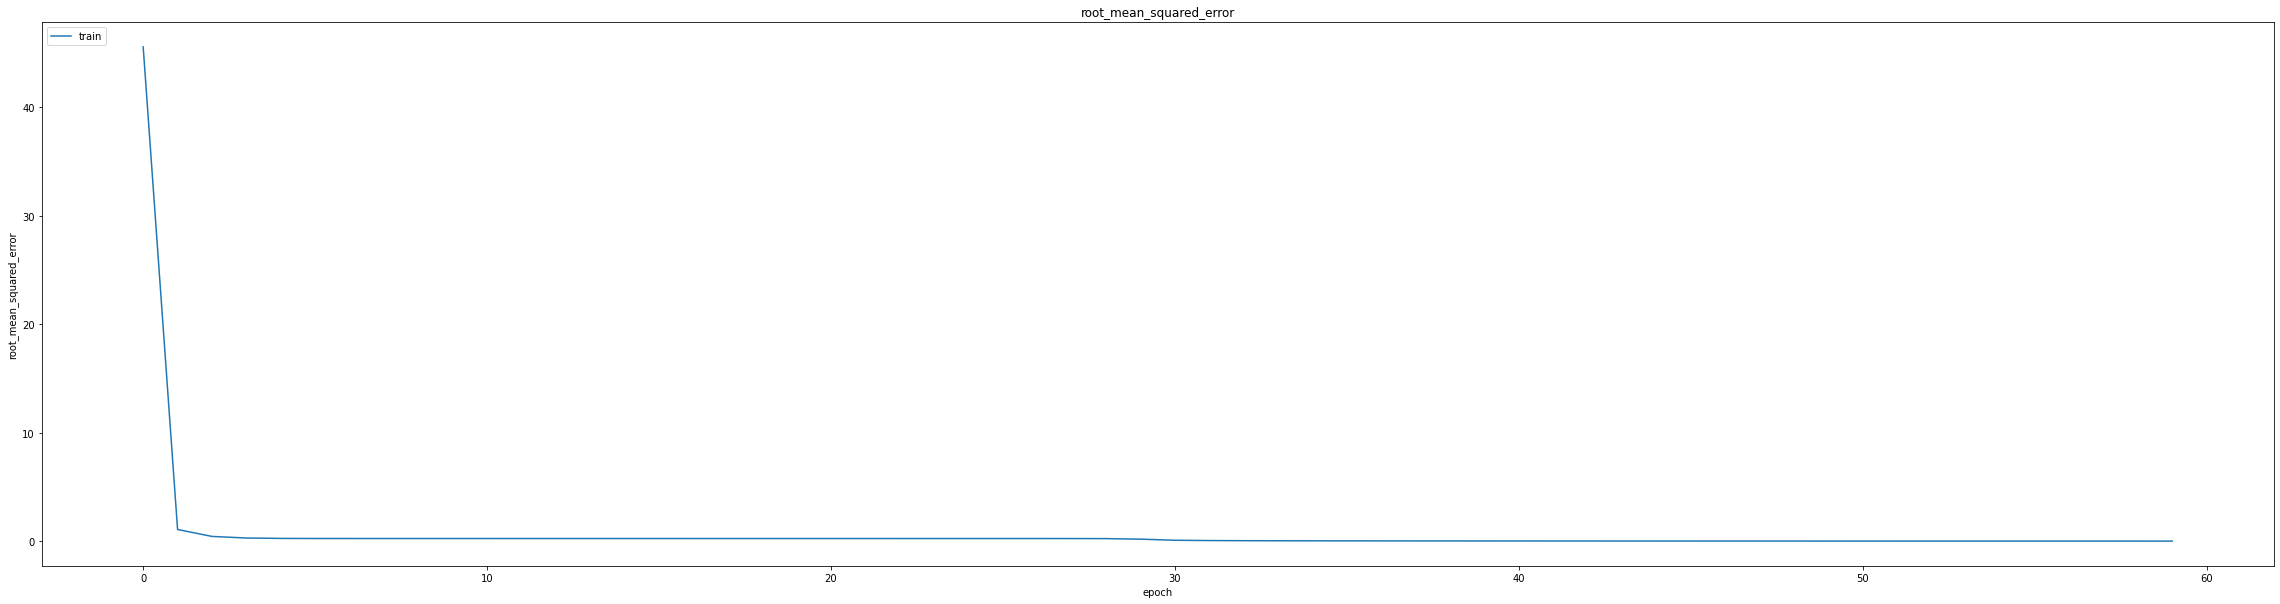

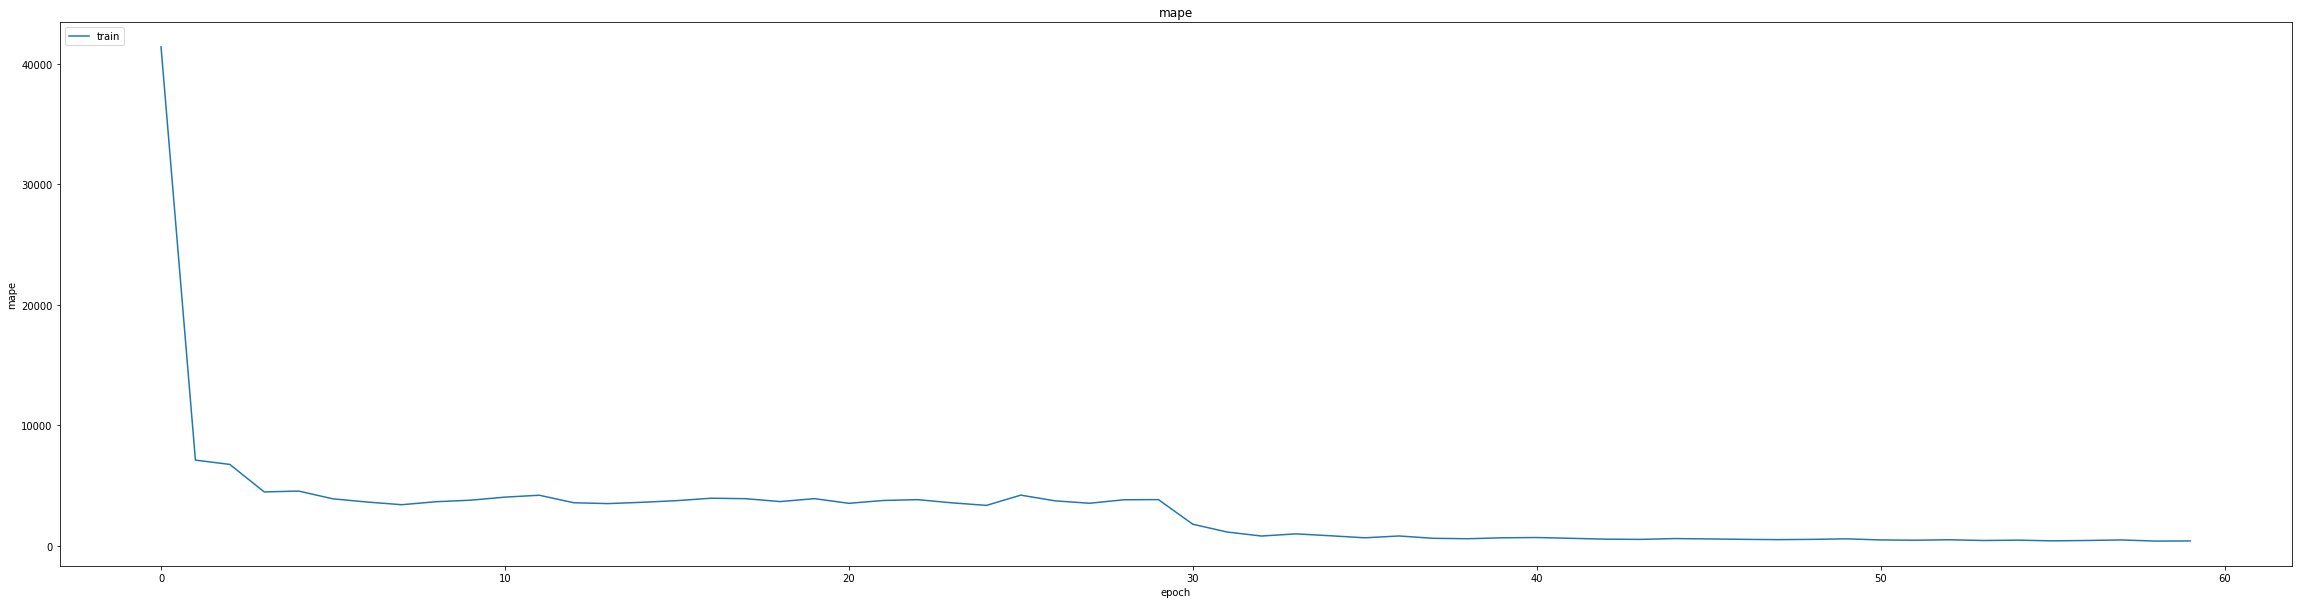

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.00831934716552496
0.011433567851781845
1044/1044 [==============================] - 5s 4ms/step
0.9967863060272527


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20


402/405 [============================>.] - ETA: 0s - loss: 6.5624e-04 - mae: 0.0129 - mse: 6.5624e-04 - root_mean_squared_error: 0.0256 - mape: 404.0877
Epoch 1: val_mse improved from 0.00013 to 0.00012, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(70-30)


405/405 [==============================] - 24s 45ms/step - loss: 6.5219e-04 - mae: 0.0129 - mse: 6.5219e-04 - root_mean_squared_error: 0.0255 - mape: 401.1332 - val_loss: 1.2243e-04 - val_mae: 0.0078 - val_mse: 1.2243e-04 - val_root_mean_squared_error: 0.0111 - val_mape: 1952.6417 - lr: 0.0010
Epoch 2/20
403/405 [============================>.] - ETA: 0s - loss: 1.0783e-04 - mae: 0.0079 - mse: 1.0783e-04 - root_mean_squared_error: 0.0104 - mape: 373.0521
Epoch 2: val_mse improved from 0.00012 to 0.00012, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(70-30)


405/405 [==============================] - 20s 48ms/step - loss: 1.0813e-04 - mae: 0.0079 - mse: 1.0813e-04 - root_mean_squared_error: 0.0104 - mape: 371.2446 - val_loss: 1.1566e-04 - val_mae: 0.0076 - val_mse: 1.1566e-04 - val_root_mean_squared_error: 0.0108 - val_mape: 1881.1576 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
404/405 [============================>.] - ETA: 0s - loss: 1.0715e-04 - mae: 0.0079 - mse: 1.0715e-04 - root_mean_squared_error: 0.0104 - mape: 417.6970
Epoch 3: val_mse did not improve from 0.00012
405/405 [==============================] - 6s 15ms/step - loss: 1.0721e-04 - mae: 0.0079 - mse: 1.0721e-04 - root_mean_squared_error: 0.0104 - mape: 416.6929 - val_loss: 1.6672e-04 - val_mae: 0.0101 - val_mse: 1.6672e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 1778.6023 - lr: 9.0000e-04
Epoch 4/20
402/405 [============================>.] - ETA: 0s - loss: 1.1377e-04 - mae: 0.0082 - mse: 1.1377e-04 - root_mean_squared_error: 0.0107 - mape: 442.78

405/405 [==============================] - 17s 43ms/step - loss: 6.8207e-05 - mae: 0.0063 - mse: 6.8207e-05 - root_mean_squared_error: 0.0083 - mape: 311.1594 - val_loss: 9.0580e-05 - val_mae: 0.0069 - val_mse: 9.0580e-05 - val_root_mean_squared_error: 0.0095 - val_mape: 1508.7256 - lr: 5.9049e-04
Epoch 12/20
403/405 [============================>.] - ETA: 0s - loss: 7.0547e-05 - mae: 0.0064 - mse: 7.0547e-05 - root_mean_squared_error: 0.0084 - mape: 336.9417
Epoch 12: val_mse did not improve from 0.00009
405/405 [==============================] - 6s 16ms/step - loss: 7.0480e-05 - mae: 0.0064 - mse: 7.0480e-05 - root_mean_squared_error: 0.0084 - mape: 335.3079 - val_loss: 1.1702e-04 - val_mae: 0.0084 - val_mse: 1.1702e-04 - val_root_mean_squared_error: 0.0108 - val_mape: 1478.4814 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/20
404/405 [============================>.] - ETA: 0s - loss: 5.7935e-05 - mae: 0.0058 - mse: 5.7935e-05 - root_mean_squared_error: 0.0076 - mape:

405/405 [==============================] - 17s 42ms/step - loss: 5.7911e-05 - mae: 0.0058 - mse: 5.7911e-05 - root_mean_squared_error: 0.0076 - mape: 312.4848 - val_loss: 8.6593e-05 - val_mae: 0.0069 - val_mse: 8.6593e-05 - val_root_mean_squared_error: 0.0093 - val_mape: 1384.8262 - lr: 5.3144e-04
Epoch 14/20
404/405 [============================>.] - ETA: 0s - loss: 6.0718e-05 - mae: 0.0060 - mse: 6.0718e-05 - root_mean_squared_error: 0.0078 - mape: 292.3918
Epoch 14: val_mse did not improve from 0.00009
405/405 [==============================] - 6s 16ms/step - loss: 6.0707e-05 - mae: 0.0060 - mse: 6.0707e-05 - root_mean_squared_error: 0.0078 - mape: 291.6881 - val_loss: 1.3456e-04 - val_mae: 0.0095 - val_mse: 1.3456e-04 - val_root_mean_squared_error: 0.0116 - val_mape: 1374.0623 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/20
403/405 [============================>.] - ETA: 0s - loss: 5.1691e-05 - mae: 0.0055 - mse: 5.1691e-05 - root_mean_squared_error: 0.0072 - mape

405/405 [==============================] - 17s 42ms/step - loss: 5.1941e-05 - mae: 0.0055 - mse: 5.1941e-05 - root_mean_squared_error: 0.0072 - mape: 269.9609 - val_loss: 6.2053e-05 - val_mae: 0.0056 - val_mse: 6.2053e-05 - val_root_mean_squared_error: 0.0079 - val_mape: 1296.9689 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/20
405/405 [==============================] - ETA: 0s - loss: 4.7278e-05 - mae: 0.0052 - mse: 4.7278e-05 - root_mean_squared_error: 0.0069 - mape: 259.5924
Epoch 17: val_mse did not improve from 0.00006
405/405 [==============================] - 6s 16ms/step - loss: 4.7278e-05 - mae: 0.0052 - mse: 4.7278e-05 - root_mean_squared_error: 0.0069 - mape: 259.5924 - val_loss: 1.3437e-04 - val_mae: 0.0098 - val_mse: 1.3437e-04 - val_root_mean_squared_error: 0.0116 - val_mape: 1298.7336 - lr: 4.3047e-04
Epoch 18/20
403/405 [============================>.] - ETA: 0s - loss: 4.5649e-05 - mae: 0.0052 - mse: 4.5649e-05 - root_mean_squared_error: 0.0068 - mape:

405/405 [==============================] - 17s 43ms/step - loss: 4.0570e-05 - mae: 0.0048 - mse: 4.0570e-05 - root_mean_squared_error: 0.0064 - mape: 277.5810 - val_loss: 5.4235e-05 - val_mae: 0.0054 - val_mse: 5.4235e-05 - val_root_mean_squared_error: 0.0074 - val_mape: 1292.8474 - lr: 3.8742e-04
Epoch 20/20
404/405 [============================>.] - ETA: 0s - loss: 4.0383e-05 - mae: 0.0048 - mse: 4.0383e-05 - root_mean_squared_error: 0.0064 - mape: 248.9607
Epoch 20: val_mse did not improve from 0.00005
405/405 [==============================] - 6s 15ms/step - loss: 4.0398e-05 - mae: 0.0048 - mse: 4.0398e-05 - root_mean_squared_error: 0.0064 - mape: 248.3618 - val_loss: 1.8349e-04 - val_mae: 0.0121 - val_mse: 1.8349e-04 - val_root_mean_squared_error: 0.0135 - val_mape: 1278.9501 - lr: 3.8742e-04


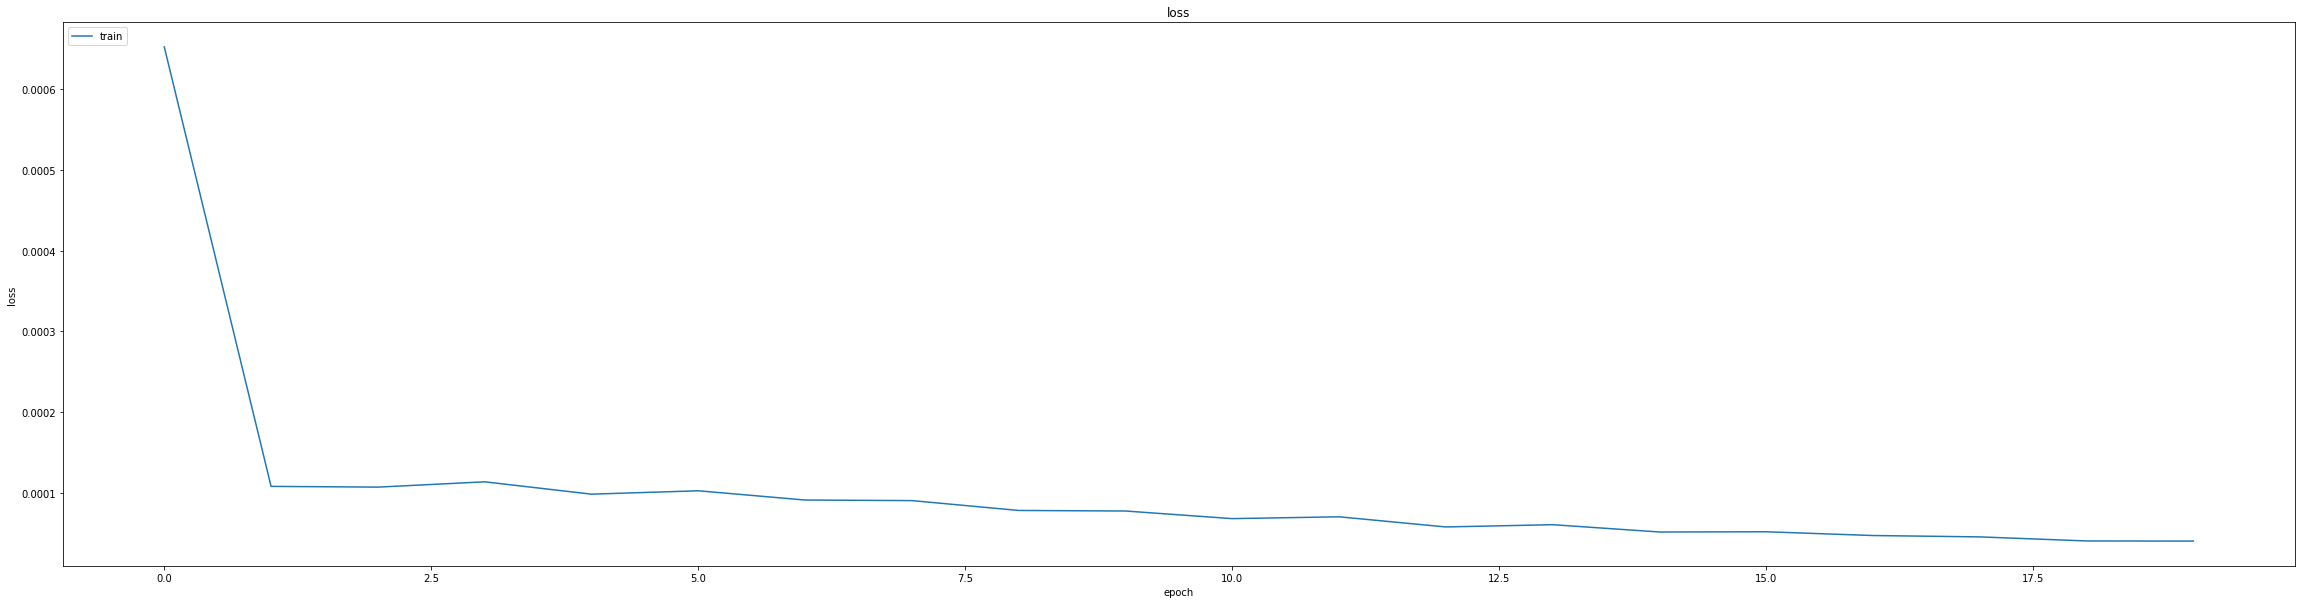

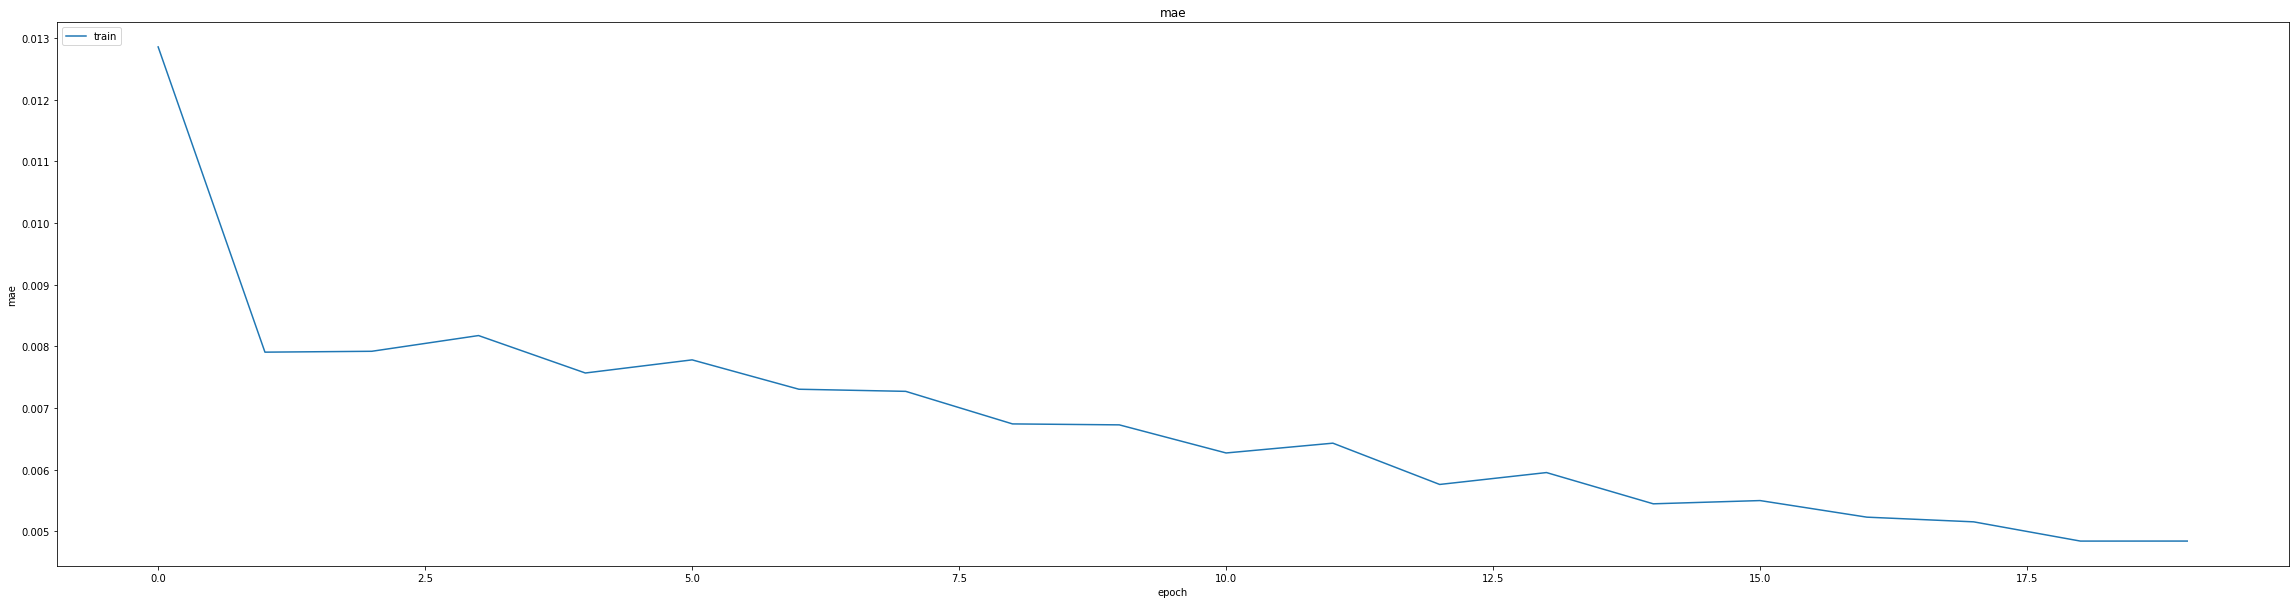

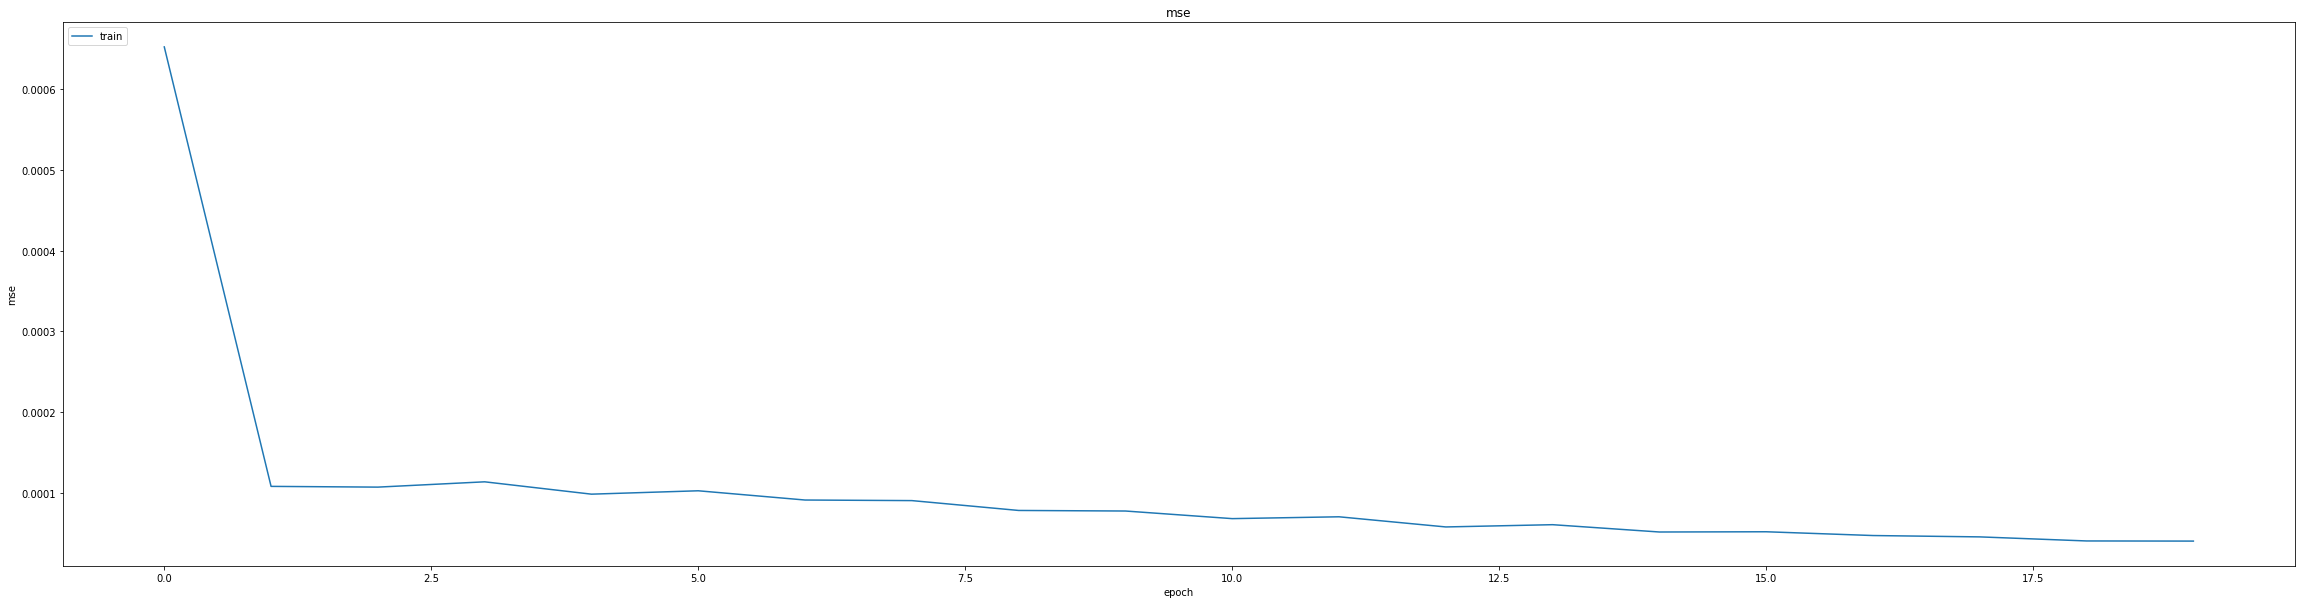

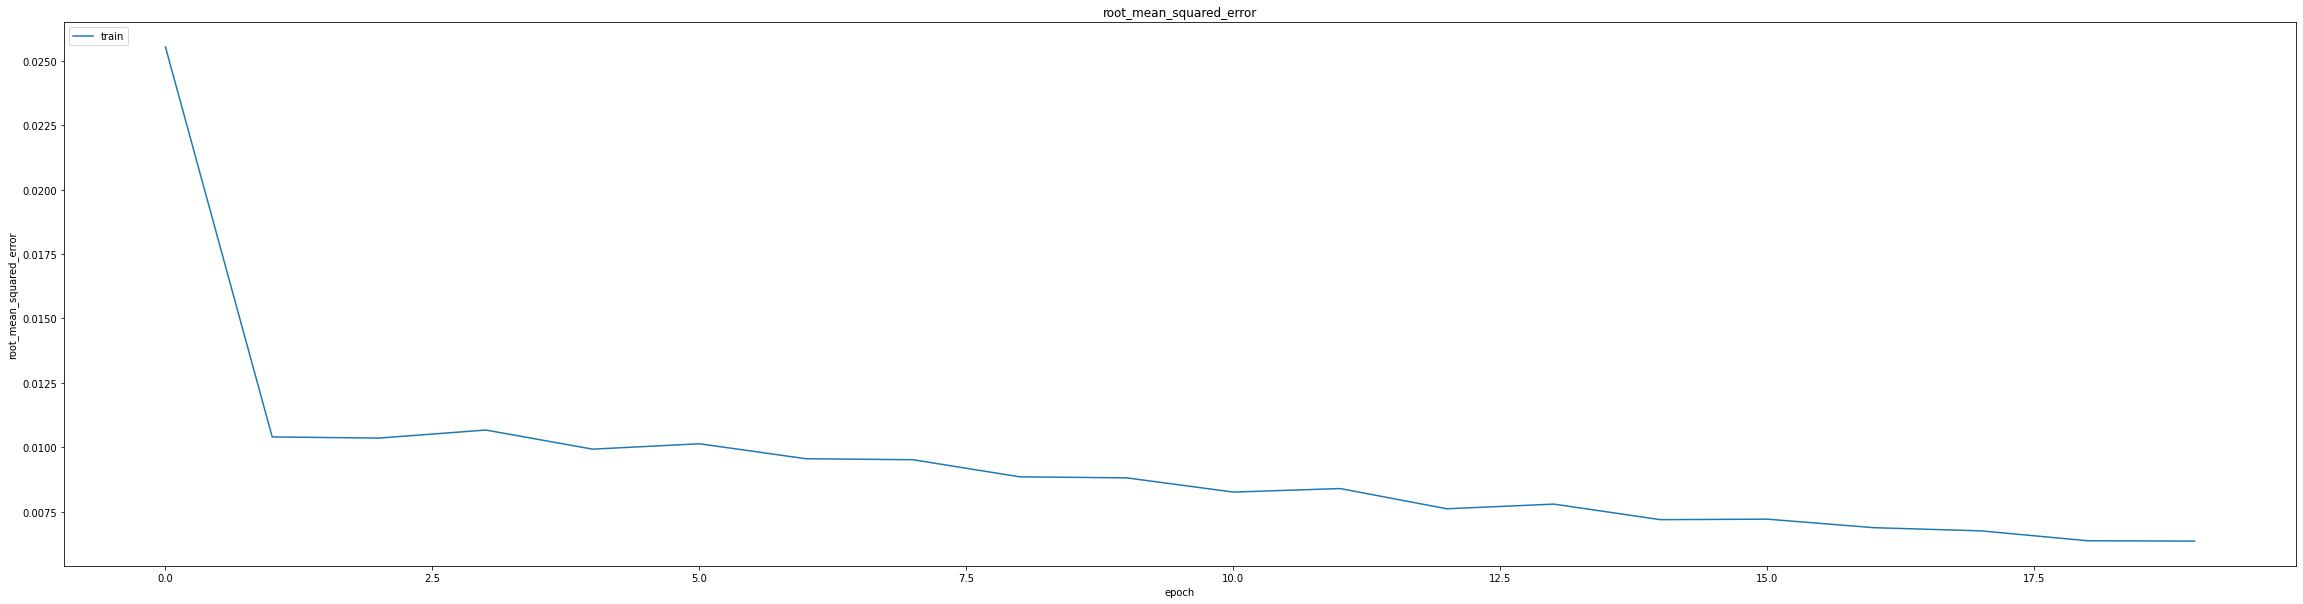

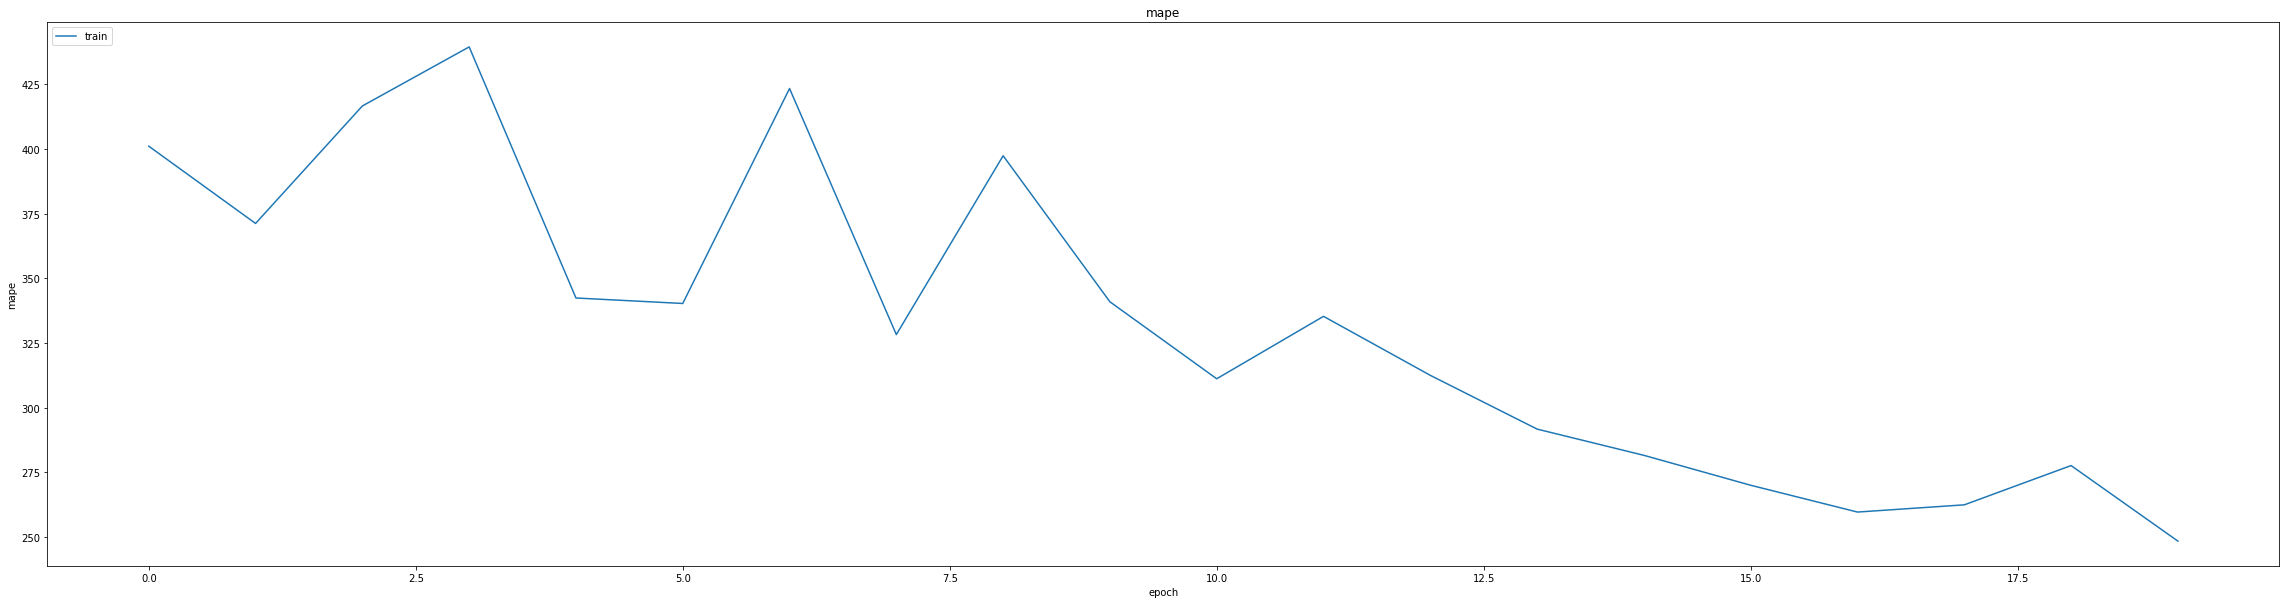

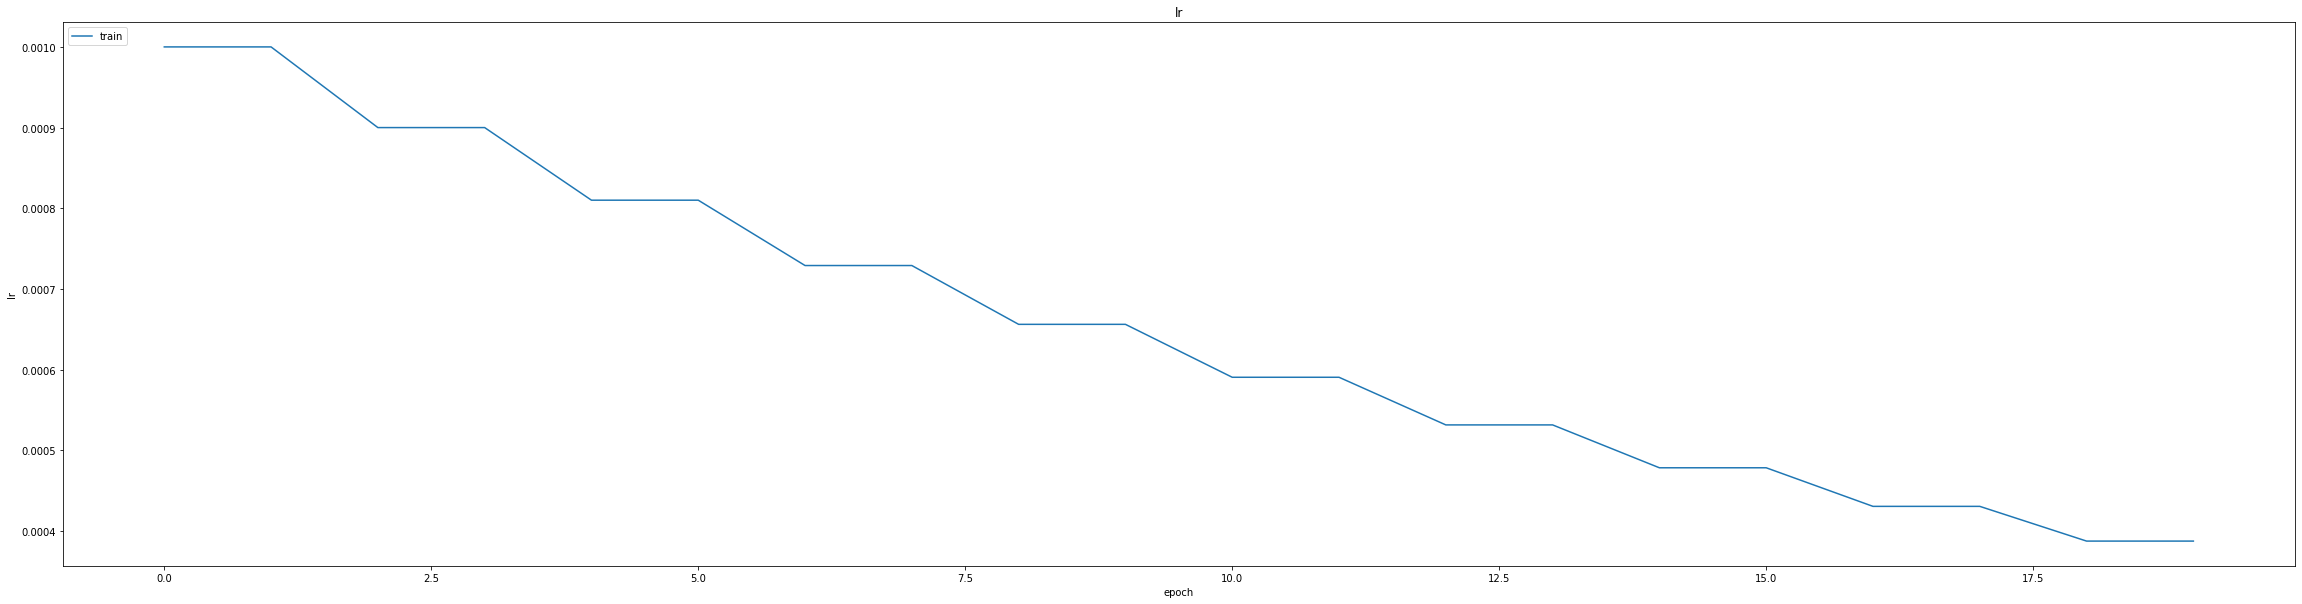

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.005377899389714003
0.007364420685917139
1044/1044 [==============================] - 5s 4ms/step
0.9963266186550135


1044/1044 [==============================] - 4s 4ms/step


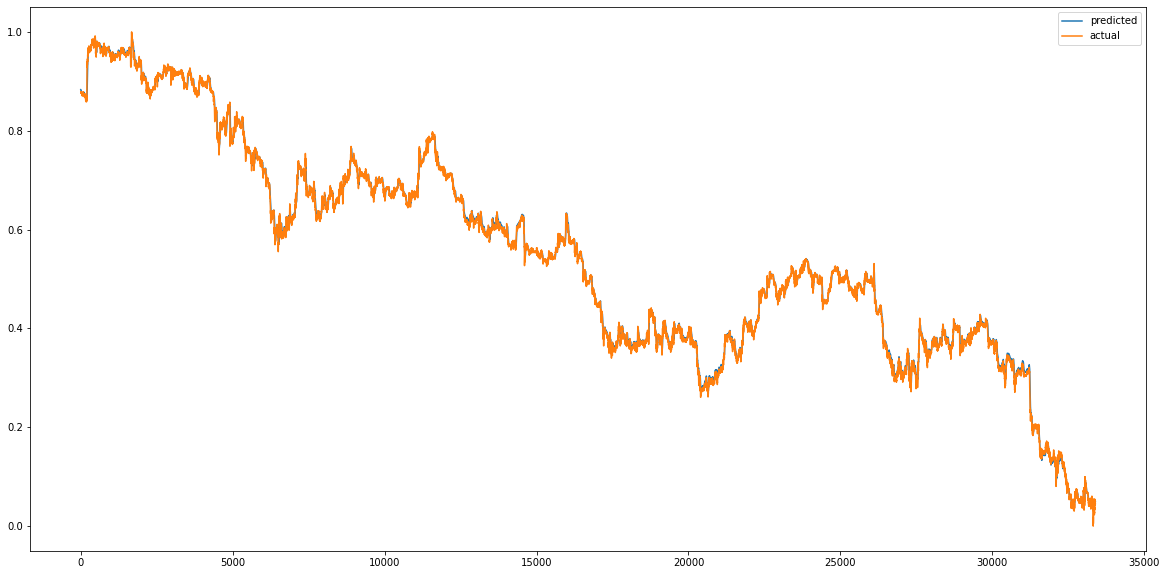

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


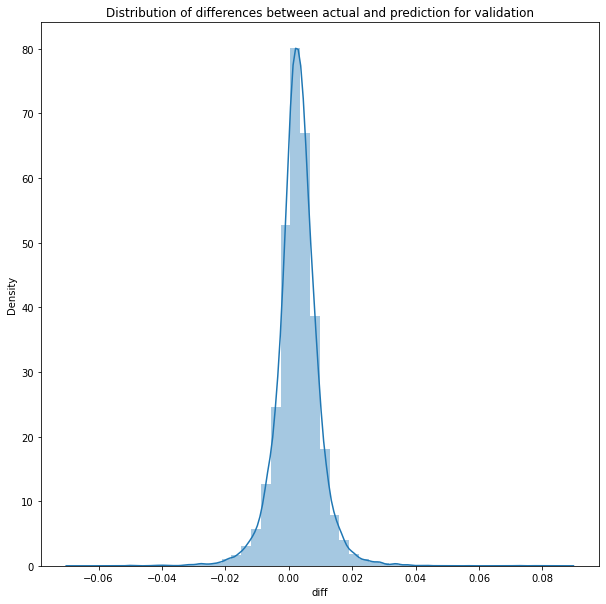

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1044/1044 [==============================] - 4s 4ms/step


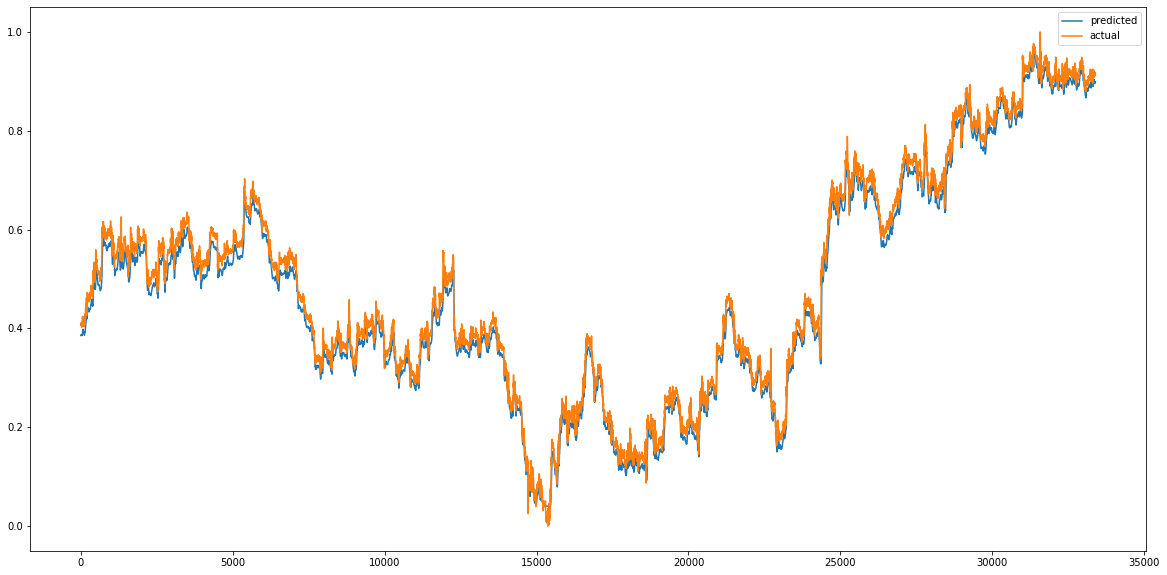

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


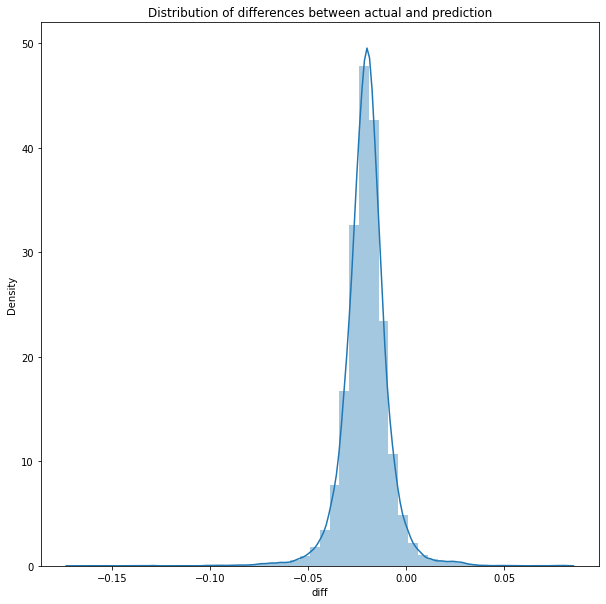

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0005537618951719963
RMSE :  0.023532145995892432
MAE :  0.02116602213121058
1044/1044 [==============================] - 4s 4ms/step
R2_Score  : 0.9894220629254593


count    33392.000000
mean        -0.020515
std          0.011528
min         -0.169165
25%         -0.026018
50%         -0.020326
75%         -0.014873
max          0.081013
Name: diff, dtype: float64

**GRU_MODEL**



In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 24, 256)           207360    
                                                                 
 gru_5 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout_8 (Dropout)         (None, 24, 64)            0         
                                                                 
 gru_6 (GRU)                 (None, 16)                3936      
                                                                 
 dense_24 (Dense)            (None, 32)                544       
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 1)                

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
403/405 [============================>.] - ETA: 0s - loss: 311.1784 - mae: 2.9753 - mse: 311.1784 - root_mean_squared_error: 17.6403 - mape: 8392.4199
Epoch 1: val_mse improved from inf to 0.25291, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 23s 47ms/step - loss: 309.6591 - mae: 2.9631 - mse: 309.6591 - root_mean_squared_error: 17.5971 - mape: 8352.2334 - val_loss: 0.2529 - val_mae: 0.4505 - val_mse: 0.2529 - val_root_mean_squared_error: 0.5029 - val_mape: 30030.5801
Epoch 2/60
404/405 [============================>.] - ETA: 0s - loss: 0.1981 - mae: 0.3678 - mse: 0.1981 - root_mean_squared_error: 0.4451 - mape: 6037.6890
Epoch 2: val_mse improved from 0.25291 to 0.10306, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 17s 41ms/step - loss: 0.1980 - mae: 0.3676 - mse: 0.1980 - root_mean_squared_error: 0.4449 - mape: 6023.4102 - val_loss: 0.1031 - val_mae: 0.2711 - val_mse: 0.1031 - val_root_mean_squared_error: 0.3210 - val_mape: 23381.8945
Epoch 3/60
403/405 [============================>.] - ETA: 0s - loss: 0.0989 - mae: 0.2413 - mse: 0.0989 - root_mean_squared_error: 0.3145 - mape: 4721.8848
Epoch 3: val_mse improved from 0.10306 to 0.06317, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 0.0988 - mae: 0.2411 - mse: 0.0988 - root_mean_squared_error: 0.3143 - mape: 4699.2065 - val_loss: 0.0632 - val_mae: 0.2082 - val_mse: 0.0632 - val_root_mean_squared_error: 0.2513 - val_mape: 19894.4336
Epoch 4/60
403/405 [============================>.] - ETA: 0s - loss: 0.0713 - mae: 0.2094 - mse: 0.0713 - root_mean_squared_error: 0.2671 - mape: 4762.5571
Epoch 4: val_mse improved from 0.06317 to 0.05266, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 0.0713 - mae: 0.2093 - mse: 0.0713 - root_mean_squared_error: 0.2671 - mape: 4739.6890 - val_loss: 0.0527 - val_mae: 0.1908 - val_mse: 0.0527 - val_root_mean_squared_error: 0.2295 - val_mape: 18000.4082
Epoch 5/60
405/405 [==============================] - ETA: 0s - loss: 0.0636 - mae: 0.2079 - mse: 0.0636 - root_mean_squared_error: 0.2522 - mape: 3868.3774
Epoch 5: val_mse improved from 0.05266 to 0.05024, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 0.0636 - mae: 0.2079 - mse: 0.0636 - root_mean_squared_error: 0.2522 - mape: 3868.3774 - val_loss: 0.0502 - val_mae: 0.1863 - val_mse: 0.0502 - val_root_mean_squared_error: 0.2241 - val_mape: 16989.2148
Epoch 6/60
402/405 [============================>.] - ETA: 0s - loss: 0.0616 - mae: 0.2100 - mse: 0.0616 - root_mean_squared_error: 0.2481 - mape: 3848.9705
Epoch 6: val_mse improved from 0.05024 to 0.04984, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 0.0615 - mae: 0.2100 - mse: 0.0615 - root_mean_squared_error: 0.2481 - mape: 3821.2024 - val_loss: 0.0498 - val_mae: 0.1850 - val_mse: 0.0498 - val_root_mean_squared_error: 0.2233 - val_mape: 16458.3203
Epoch 7/60
401/405 [============================>.] - ETA: 0s - loss: 0.0610 - mae: 0.2116 - mse: 0.0610 - root_mean_squared_error: 0.2470 - mape: 3605.1423
Epoch 7: val_mse improved from 0.04984 to 0.04983, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 37ms/step - loss: 0.0610 - mae: 0.2116 - mse: 0.0610 - root_mean_squared_error: 0.2470 - mape: 3570.4380 - val_loss: 0.0498 - val_mae: 0.1846 - val_mse: 0.0498 - val_root_mean_squared_error: 0.2232 - val_mape: 16206.7012
Epoch 8/60
403/405 [============================>.] - ETA: 0s - loss: 0.0609 - mae: 0.2123 - mse: 0.0609 - root_mean_squared_error: 0.2467 - mape: 3694.1265
Epoch 8: val_mse improved from 0.04983 to 0.04980, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 37ms/step - loss: 0.0609 - mae: 0.2124 - mse: 0.0609 - root_mean_squared_error: 0.2468 - mape: 3676.5618 - val_loss: 0.0498 - val_mae: 0.1844 - val_mse: 0.0498 - val_root_mean_squared_error: 0.2232 - val_mape: 16110.9668
Epoch 9/60
403/405 [============================>.] - ETA: 0s - loss: 0.0607 - mae: 0.2123 - mse: 0.0607 - root_mean_squared_error: 0.2464 - mape: 3892.1240
Epoch 9: val_mse improved from 0.04980 to 0.04969, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0607 - mae: 0.2123 - mse: 0.0607 - root_mean_squared_error: 0.2464 - mape: 3873.5012 - val_loss: 0.0497 - val_mae: 0.1842 - val_mse: 0.0497 - val_root_mean_squared_error: 0.2229 - val_mape: 16074.5615
Epoch 10/60
401/405 [============================>.] - ETA: 0s - loss: 0.0604 - mae: 0.2117 - mse: 0.0604 - root_mean_squared_error: 0.2457 - mape: 3576.6272
Epoch 10: val_mse improved from 0.04969 to 0.04935, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 0.0604 - mae: 0.2117 - mse: 0.0604 - root_mean_squared_error: 0.2457 - mape: 3542.2346 - val_loss: 0.0494 - val_mae: 0.1836 - val_mse: 0.0494 - val_root_mean_squared_error: 0.2221 - val_mape: 16083.1133
Epoch 11/60
402/405 [============================>.] - ETA: 0s - loss: 0.0582 - mae: 0.2057 - mse: 0.0582 - root_mean_squared_error: 0.2412 - mape: 3627.2869
Epoch 11: val_mse improved from 0.04935 to 0.04408, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 0.0581 - mae: 0.2056 - mse: 0.0581 - root_mean_squared_error: 0.2411 - mape: 3601.0798 - val_loss: 0.0441 - val_mae: 0.1738 - val_mse: 0.0441 - val_root_mean_squared_error: 0.2100 - val_mape: 15851.8076
Epoch 12/60
405/405 [==============================] - ETA: 0s - loss: 0.0321 - mae: 0.1346 - mse: 0.0321 - root_mean_squared_error: 0.1793 - mape: 2948.0803
Epoch 12: val_mse improved from 0.04408 to 0.00989, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 0.0321 - mae: 0.1346 - mse: 0.0321 - root_mean_squared_error: 0.1793 - mape: 2948.0803 - val_loss: 0.0099 - val_mae: 0.0717 - val_mse: 0.0099 - val_root_mean_squared_error: 0.0995 - val_mape: 12350.3447
Epoch 13/60
404/405 [============================>.] - ETA: 0s - loss: 0.0122 - mae: 0.0739 - mse: 0.0122 - root_mean_squared_error: 0.1104 - mape: 2582.3179
Epoch 13: val_mse improved from 0.00989 to 0.00605, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 0.0122 - mae: 0.0739 - mse: 0.0122 - root_mean_squared_error: 0.1104 - mape: 2576.1475 - val_loss: 0.0060 - val_mae: 0.0546 - val_mse: 0.0060 - val_root_mean_squared_error: 0.0778 - val_mape: 10329.6172
Epoch 14/60
403/405 [============================>.] - ETA: 0s - loss: 0.0074 - mae: 0.0567 - mse: 0.0074 - root_mean_squared_error: 0.0862 - mape: 2272.9055
Epoch 14: val_mse improved from 0.00605 to 0.00433, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 37ms/step - loss: 0.0074 - mae: 0.0567 - mse: 0.0074 - root_mean_squared_error: 0.0861 - mape: 2261.9121 - val_loss: 0.0043 - val_mae: 0.0481 - val_mse: 0.0043 - val_root_mean_squared_error: 0.0658 - val_mape: 9065.2051
Epoch 15/60
403/405 [============================>.] - ETA: 0s - loss: 0.0050 - mae: 0.0468 - mse: 0.0050 - root_mean_squared_error: 0.0708 - mape: 2010.2618
Epoch 15: val_mse improved from 0.00433 to 0.00333, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0050 - mae: 0.0467 - mse: 0.0050 - root_mean_squared_error: 0.0708 - mape: 2000.5300 - val_loss: 0.0033 - val_mae: 0.0429 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0577 - val_mape: 8114.9204
Epoch 16/60
404/405 [============================>.] - ETA: 0s - loss: 0.0037 - mae: 0.0409 - mse: 0.0037 - root_mean_squared_error: 0.0609 - mape: 1776.8135
Epoch 16: val_mse improved from 0.00333 to 0.00209, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 0.0037 - mae: 0.0408 - mse: 0.0037 - root_mean_squared_error: 0.0608 - mape: 1772.5554 - val_loss: 0.0021 - val_mae: 0.0288 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0457 - val_mape: 7396.0781
Epoch 17/60
402/405 [============================>.] - ETA: 0s - loss: 0.0028 - mae: 0.0363 - mse: 0.0028 - root_mean_squared_error: 0.0532 - mape: 1552.6074
Epoch 17: val_mse improved from 0.00209 to 0.00193, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 0.0028 - mae: 0.0363 - mse: 0.0028 - root_mean_squared_error: 0.0532 - mape: 1541.3242 - val_loss: 0.0019 - val_mae: 0.0302 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0440 - val_mape: 6816.4209
Epoch 18/60
402/405 [============================>.] - ETA: 0s - loss: 0.0022 - mae: 0.0323 - mse: 0.0022 - root_mean_squared_error: 0.0468 - mape: 1470.7855
Epoch 18: val_mse improved from 0.00193 to 0.00173, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 0.0022 - mae: 0.0323 - mse: 0.0022 - root_mean_squared_error: 0.0468 - mape: 1460.0822 - val_loss: 0.0017 - val_mae: 0.0297 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0416 - val_mape: 6318.5034
Epoch 19/60
405/405 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0292 - mse: 0.0017 - root_mean_squared_error: 0.0417 - mape: 1431.3992
Epoch 19: val_mse improved from 0.00173 to 0.00171, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0017 - mae: 0.0292 - mse: 0.0017 - root_mean_squared_error: 0.0417 - mape: 1431.3992 - val_loss: 0.0017 - val_mae: 0.0313 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0413 - val_mape: 5886.7227
Epoch 20/60
404/405 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0267 - mse: 0.0014 - root_mean_squared_error: 0.0376 - mape: 1311.2122
Epoch 20: val_mse improved from 0.00171 to 0.00108, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 37ms/step - loss: 0.0014 - mae: 0.0267 - mse: 0.0014 - root_mean_squared_error: 0.0376 - mape: 1308.0659 - val_loss: 0.0011 - val_mae: 0.0222 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0329 - val_mape: 5513.2949
Epoch 21/60
403/405 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0246 - mse: 0.0012 - root_mean_squared_error: 0.0342 - mape: 1174.6526
Epoch 21: val_mse did not improve from 0.00108
405/405 [==============================] - 6s 14ms/step - loss: 0.0012 - mae: 0.0246 - mse: 0.0012 - root_mean_squared_error: 0.0342 - mape: 1168.9615 - val_loss: 0.0011 - val_mae: 0.0235 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0333 - val_mape: 5188.1328
Epoch 22/60
404/405 [============================>.] - ETA: 0s - loss: 9.7058e-04 - mae: 0.0226 - mse: 9.7058e-04 - root_mean_squared_error: 0.0312 - mape: 1145.2103
Epoch 22: val_mse improved from 0.00108 to 0.00102, saving model to /content/drive/MyDrive/model

405/405 [==============================] - 15s 38ms/step - loss: 9.7032e-04 - mae: 0.0226 - mse: 9.7032e-04 - root_mean_squared_error: 0.0311 - mape: 1142.4624 - val_loss: 0.0010 - val_mae: 0.0227 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0320 - val_mape: 4894.1094
Epoch 23/60
405/405 [==============================] - ETA: 0s - loss: 8.2106e-04 - mae: 0.0210 - mse: 8.2106e-04 - root_mean_squared_error: 0.0287 - mape: 1157.6050
Epoch 23: val_mse improved from 0.00102 to 0.00060, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 8.2106e-04 - mae: 0.0210 - mse: 8.2106e-04 - root_mean_squared_error: 0.0287 - mape: 1157.6050 - val_loss: 6.0063e-04 - val_mae: 0.0153 - val_mse: 6.0063e-04 - val_root_mean_squared_error: 0.0245 - val_mape: 4635.9673
Epoch 24/60
404/405 [============================>.] - ETA: 0s - loss: 6.7676e-04 - mae: 0.0192 - mse: 6.7676e-04 - root_mean_squared_error: 0.0260 - mape: 1026.0200
Epoch 24: val_mse did not improve from 0.00060
405/405 [==============================] - 6s 14ms/step - loss: 6.7672e-04 - mae: 0.0192 - mse: 6.7672e-04 - root_mean_squared_error: 0.0260 - mape: 1023.5568 - val_loss: 8.8207e-04 - val_mae: 0.0220 - val_mse: 8.8207e-04 - val_root_mean_squared_error: 0.0297 - val_mape: 4394.8569
Epoch 25/60
404/405 [============================>.] - ETA: 0s - loss: 5.7971e-04 - mae: 0.0179 - mse: 5.7971e-04 - root_mean_squared_error: 0.0241 - mape: 974.7520
Epoch 25: val_mse did not improve from 0.00060
405/405 [=

405/405 [==============================] - 15s 38ms/step - loss: 4.1665e-04 - mae: 0.0153 - mse: 4.1665e-04 - root_mean_squared_error: 0.0204 - mape: 860.0542 - val_loss: 4.6237e-04 - val_mae: 0.0148 - val_mse: 4.6237e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 3811.5962
Epoch 28/60
403/405 [============================>.] - ETA: 0s - loss: 3.6786e-04 - mae: 0.0144 - mse: 3.6786e-04 - root_mean_squared_error: 0.0192 - mape: 847.1521
Epoch 28: val_mse did not improve from 0.00046
405/405 [==============================] - 6s 14ms/step - loss: 3.6787e-04 - mae: 0.0144 - mse: 3.6787e-04 - root_mean_squared_error: 0.0192 - mape: 843.0359 - val_loss: 5.4133e-04 - val_mae: 0.0167 - val_mse: 5.4133e-04 - val_root_mean_squared_error: 0.0233 - val_mape: 3650.8662
Epoch 29/60
403/405 [============================>.] - ETA: 0s - loss: 3.2962e-04 - mae: 0.0137 - mse: 3.2962e-04 - root_mean_squared_error: 0.0182 - mape: 876.3851
Epoch 29: val_mse did not improve from 0.00046
405/405 [====

405/405 [==============================] - 15s 37ms/step - loss: 2.9573e-04 - mae: 0.0130 - mse: 2.9573e-04 - root_mean_squared_error: 0.0172 - mape: 822.1931 - val_loss: 3.9867e-04 - val_mae: 0.0142 - val_mse: 3.9867e-04 - val_root_mean_squared_error: 0.0200 - val_mape: 3373.2358
Epoch 31/60
404/405 [============================>.] - ETA: 0s - loss: 2.6556e-04 - mae: 0.0123 - mse: 2.6556e-04 - root_mean_squared_error: 0.0163 - mape: 818.1609
Epoch 31: val_mse improved from 0.00040 to 0.00040, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 2.6550e-04 - mae: 0.0123 - mse: 2.6550e-04 - root_mean_squared_error: 0.0163 - mape: 816.1907 - val_loss: 3.9856e-04 - val_mae: 0.0145 - val_mse: 3.9856e-04 - val_root_mean_squared_error: 0.0200 - val_mape: 3258.0229
Epoch 32/60
403/405 [============================>.] - ETA: 0s - loss: 2.4611e-04 - mae: 0.0119 - mse: 2.4611e-04 - root_mean_squared_error: 0.0157 - mape: 752.2639
Epoch 32: val_mse improved from 0.00040 to 0.00034, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 38ms/step - loss: 2.4608e-04 - mae: 0.0119 - mse: 2.4608e-04 - root_mean_squared_error: 0.0157 - mape: 748.6096 - val_loss: 3.4308e-04 - val_mae: 0.0134 - val_mse: 3.4308e-04 - val_root_mean_squared_error: 0.0185 - val_mape: 3156.2412
Epoch 33/60
403/405 [============================>.] - ETA: 0s - loss: 2.3714e-04 - mae: 0.0117 - mse: 2.3714e-04 - root_mean_squared_error: 0.0154 - mape: 716.4160
Epoch 33: val_mse did not improve from 0.00034
405/405 [==============================] - 6s 14ms/step - loss: 2.3707e-04 - mae: 0.0117 - mse: 2.3707e-04 - root_mean_squared_error: 0.0154 - mape: 712.9327 - val_loss: 4.7282e-04 - val_mae: 0.0170 - val_mse: 4.7282e-04 - val_root_mean_squared_error: 0.0217 - val_mape: 3058.9358
Epoch 34/60
402/405 [============================>.] - ETA: 0s - loss: 2.1535e-04 - mae: 0.0111 - mse: 2.1535e-04 - root_mean_squared_error: 0.0147 - mape: 683.1792
Epoch 34: val_mse did not improve from 0.00034
405/405 [====

405/405 [==============================] - 15s 38ms/step - loss: 2.0765e-04 - mae: 0.0109 - mse: 2.0765e-04 - root_mean_squared_error: 0.0144 - mape: 683.7975 - val_loss: 2.6989e-04 - val_mae: 0.0117 - val_mse: 2.6989e-04 - val_root_mean_squared_error: 0.0164 - val_mape: 2907.8306
Epoch 36/60
404/405 [============================>.] - ETA: 0s - loss: 1.9164e-04 - mae: 0.0105 - mse: 1.9164e-04 - root_mean_squared_error: 0.0138 - mape: 660.8105
Epoch 36: val_mse did not improve from 0.00027
405/405 [==============================] - 6s 14ms/step - loss: 1.9161e-04 - mae: 0.0105 - mse: 1.9161e-04 - root_mean_squared_error: 0.0138 - mape: 659.2195 - val_loss: 3.5690e-04 - val_mae: 0.0142 - val_mse: 3.5690e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 2835.6978
Epoch 37/60
405/405 [==============================] - ETA: 0s - loss: 1.8181e-04 - mae: 0.0102 - mse: 1.8181e-04 - root_mean_squared_error: 0.0135 - mape: 638.5090
Epoch 37: val_mse did not improve from 0.00027
405/405 [====

405/405 [==============================] - 15s 38ms/step - loss: 1.7130e-04 - mae: 0.0099 - mse: 1.7130e-04 - root_mean_squared_error: 0.0131 - mape: 598.2028 - val_loss: 1.9368e-04 - val_mae: 0.0099 - val_mse: 1.9368e-04 - val_root_mean_squared_error: 0.0139 - val_mape: 2656.7134
Epoch 40/60
403/405 [============================>.] - ETA: 0s - loss: 1.5948e-04 - mae: 0.0096 - mse: 1.5948e-04 - root_mean_squared_error: 0.0126 - mape: 596.0766
Epoch 40: val_mse did not improve from 0.00019
405/405 [==============================] - 6s 14ms/step - loss: 1.5936e-04 - mae: 0.0095 - mse: 1.5936e-04 - root_mean_squared_error: 0.0126 - mape: 593.1761 - val_loss: 2.4585e-04 - val_mae: 0.0117 - val_mse: 2.4585e-04 - val_root_mean_squared_error: 0.0157 - val_mape: 2605.9985
Epoch 41/60
405/405 [==============================] - ETA: 0s - loss: 1.5708e-04 - mae: 0.0095 - mse: 1.5708e-04 - root_mean_squared_error: 0.0125 - mape: 579.8292
Epoch 41: val_mse did not improve from 0.00019
405/405 [====

405/405 [==============================] - 15s 37ms/step - loss: 1.4988e-04 - mae: 0.0093 - mse: 1.4988e-04 - root_mean_squared_error: 0.0122 - mape: 564.1540 - val_loss: 1.9348e-04 - val_mae: 0.0100 - val_mse: 1.9348e-04 - val_root_mean_squared_error: 0.0139 - val_mape: 2518.5896
Epoch 43/60
404/405 [============================>.] - ETA: 0s - loss: 1.4460e-04 - mae: 0.0091 - mse: 1.4460e-04 - root_mean_squared_error: 0.0120 - mape: 572.1334
Epoch 43: val_mse improved from 0.00019 to 0.00017, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 1.4455e-04 - mae: 0.0091 - mse: 1.4455e-04 - root_mean_squared_error: 0.0120 - mape: 570.7573 - val_loss: 1.7155e-04 - val_mae: 0.0093 - val_mse: 1.7155e-04 - val_root_mean_squared_error: 0.0131 - val_mape: 2476.5168
Epoch 44/60
404/405 [============================>.] - ETA: 0s - loss: 1.3939e-04 - mae: 0.0089 - mse: 1.3939e-04 - root_mean_squared_error: 0.0118 - mape: 562.4508
Epoch 44: val_mse improved from 0.00017 to 0.00017, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 1.3936e-04 - mae: 0.0089 - mse: 1.3936e-04 - root_mean_squared_error: 0.0118 - mape: 561.0958 - val_loss: 1.6693e-04 - val_mae: 0.0095 - val_mse: 1.6693e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 2432.8621
Epoch 45/60
405/405 [==============================] - ETA: 0s - loss: 1.4138e-04 - mae: 0.0090 - mse: 1.4138e-04 - root_mean_squared_error: 0.0119 - mape: 523.5331
Epoch 45: val_mse improved from 0.00017 to 0.00016, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 1.4138e-04 - mae: 0.0090 - mse: 1.4138e-04 - root_mean_squared_error: 0.0119 - mape: 523.5331 - val_loss: 1.5510e-04 - val_mae: 0.0090 - val_mse: 1.5510e-04 - val_root_mean_squared_error: 0.0125 - val_mape: 2393.2178
Epoch 46/60
404/405 [============================>.] - ETA: 0s - loss: 1.3698e-04 - mae: 0.0089 - mse: 1.3698e-04 - root_mean_squared_error: 0.0117 - mape: 539.9985
Epoch 46: val_mse did not improve from 0.00016
405/405 [==============================] - 6s 14ms/step - loss: 1.3693e-04 - mae: 0.0089 - mse: 1.3693e-04 - root_mean_squared_error: 0.0117 - mape: 538.6983 - val_loss: 1.6699e-04 - val_mae: 0.0092 - val_mse: 1.6699e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 2347.3372
Epoch 47/60
405/405 [==============================] - ETA: 0s - loss: 1.3765e-04 - mae: 0.0089 - mse: 1.3765e-04 - root_mean_squared_error: 0.0117 - mape: 511.6902
Epoch 47: val_mse improved from 0.00016 to 0.00015, saving m

405/405 [==============================] - 15s 38ms/step - loss: 1.3765e-04 - mae: 0.0089 - mse: 1.3765e-04 - root_mean_squared_error: 0.0117 - mape: 511.6902 - val_loss: 1.5171e-04 - val_mae: 0.0088 - val_mse: 1.5171e-04 - val_root_mean_squared_error: 0.0123 - val_mape: 2323.3057
Epoch 48/60
405/405 [==============================] - ETA: 0s - loss: 1.2729e-04 - mae: 0.0086 - mse: 1.2729e-04 - root_mean_squared_error: 0.0113 - mape: 544.2653
Epoch 48: val_mse did not improve from 0.00015
405/405 [==============================] - 6s 15ms/step - loss: 1.2729e-04 - mae: 0.0086 - mse: 1.2729e-04 - root_mean_squared_error: 0.0113 - mape: 544.2653 - val_loss: 2.0257e-04 - val_mae: 0.0105 - val_mse: 2.0257e-04 - val_root_mean_squared_error: 0.0142 - val_mape: 2261.0032
Epoch 49/60
403/405 [============================>.] - ETA: 0s - loss: 1.2657e-04 - mae: 0.0085 - mse: 1.2657e-04 - root_mean_squared_error: 0.0113 - mape: 493.3170
Epoch 49: val_mse improved from 0.00015 to 0.00015, saving m

405/405 [==============================] - 15s 38ms/step - loss: 1.2654e-04 - mae: 0.0085 - mse: 1.2654e-04 - root_mean_squared_error: 0.0112 - mape: 490.9167 - val_loss: 1.4543e-04 - val_mae: 0.0087 - val_mse: 1.4543e-04 - val_root_mean_squared_error: 0.0121 - val_mape: 2207.6587
Epoch 50/60
404/405 [============================>.] - ETA: 0s - loss: 1.2954e-04 - mae: 0.0087 - mse: 1.2954e-04 - root_mean_squared_error: 0.0114 - mape: 488.8968
Epoch 50: val_mse did not improve from 0.00015
405/405 [==============================] - 6s 14ms/step - loss: 1.2947e-04 - mae: 0.0087 - mse: 1.2947e-04 - root_mean_squared_error: 0.0114 - mape: 487.7198 - val_loss: 1.7806e-04 - val_mae: 0.0099 - val_mse: 1.7806e-04 - val_root_mean_squared_error: 0.0133 - val_mape: 2179.4646
Epoch 51/60
405/405 [==============================] - ETA: 0s - loss: 1.3826e-04 - mae: 0.0090 - mse: 1.3826e-04 - root_mean_squared_error: 0.0118 - mape: 464.3784
Epoch 51: val_mse did not improve from 0.00015
405/405 [====

405/405 [==============================] - 15s 38ms/step - loss: 1.2384e-04 - mae: 0.0085 - mse: 1.2384e-04 - root_mean_squared_error: 0.0111 - mape: 452.8824 - val_loss: 1.3035e-04 - val_mae: 0.0081 - val_mse: 1.3035e-04 - val_root_mean_squared_error: 0.0114 - val_mape: 2130.4043
Epoch 53/60
405/405 [==============================] - ETA: 0s - loss: 1.3124e-04 - mae: 0.0087 - mse: 1.3124e-04 - root_mean_squared_error: 0.0115 - mape: 458.7110
Epoch 53: val_mse did not improve from 0.00013
405/405 [==============================] - 6s 14ms/step - loss: 1.3124e-04 - mae: 0.0087 - mse: 1.3124e-04 - root_mean_squared_error: 0.0115 - mape: 458.7110 - val_loss: 1.5873e-04 - val_mae: 0.0093 - val_mse: 1.5873e-04 - val_root_mean_squared_error: 0.0126 - val_mape: 2116.7966
Epoch 54/60
403/405 [============================>.] - ETA: 0s - loss: 1.2029e-04 - mae: 0.0083 - mse: 1.2029e-04 - root_mean_squared_error: 0.0110 - mape: 436.1984
Epoch 54: val_mse did not improve from 0.00013
405/405 [====

405/405 [==============================] - 15s 38ms/step - loss: 1.2059e-04 - mae: 0.0084 - mse: 1.2059e-04 - root_mean_squared_error: 0.0110 - mape: 402.3407 - val_loss: 1.2758e-04 - val_mae: 0.0081 - val_mse: 1.2758e-04 - val_root_mean_squared_error: 0.0113 - val_mape: 1921.9568


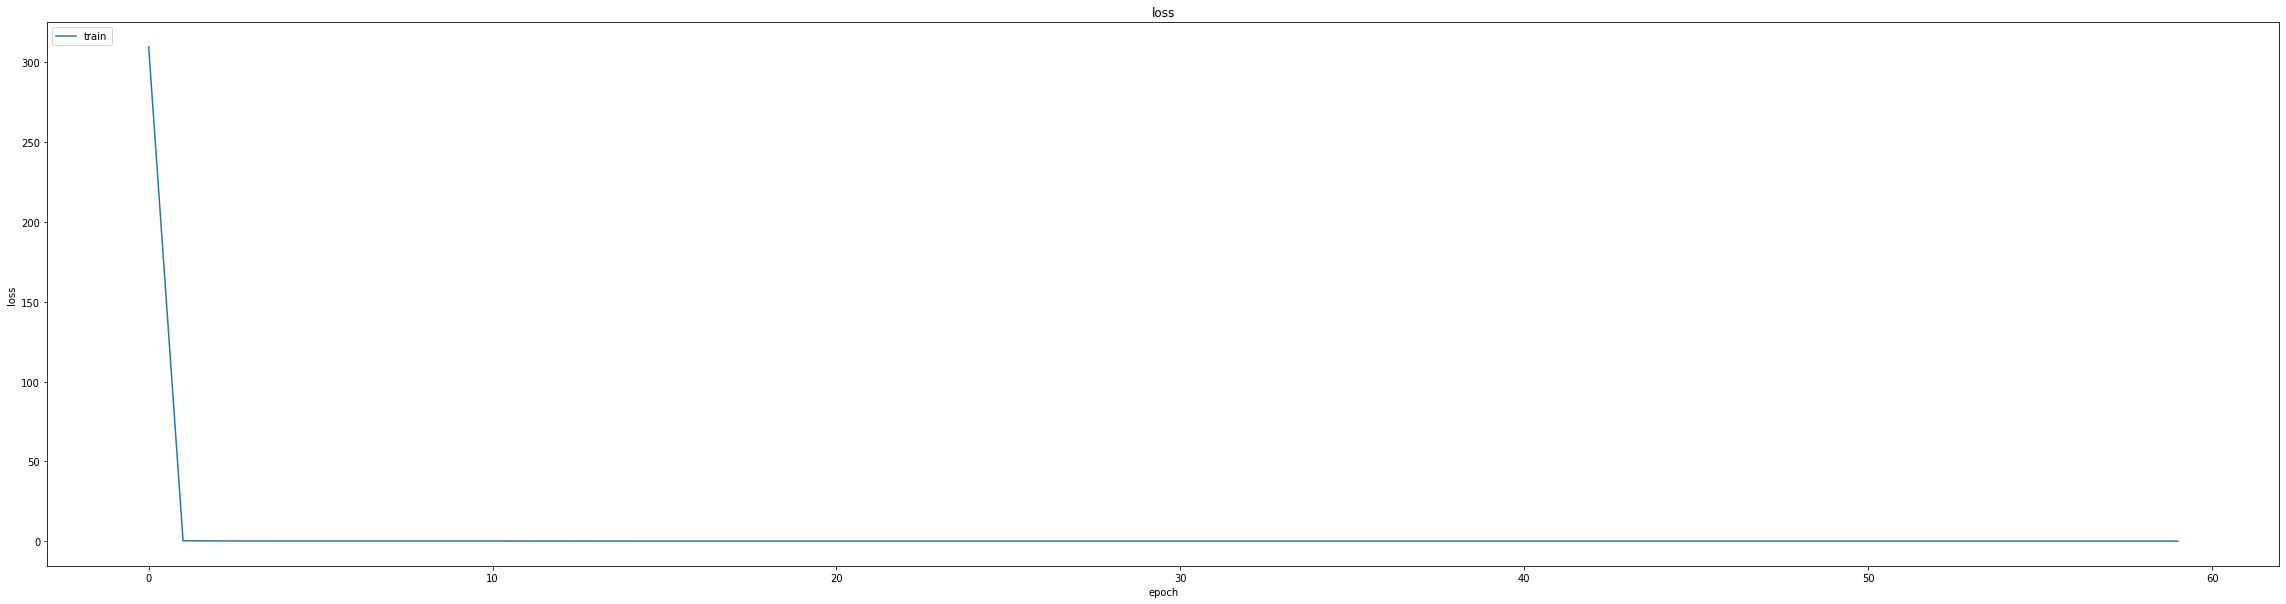

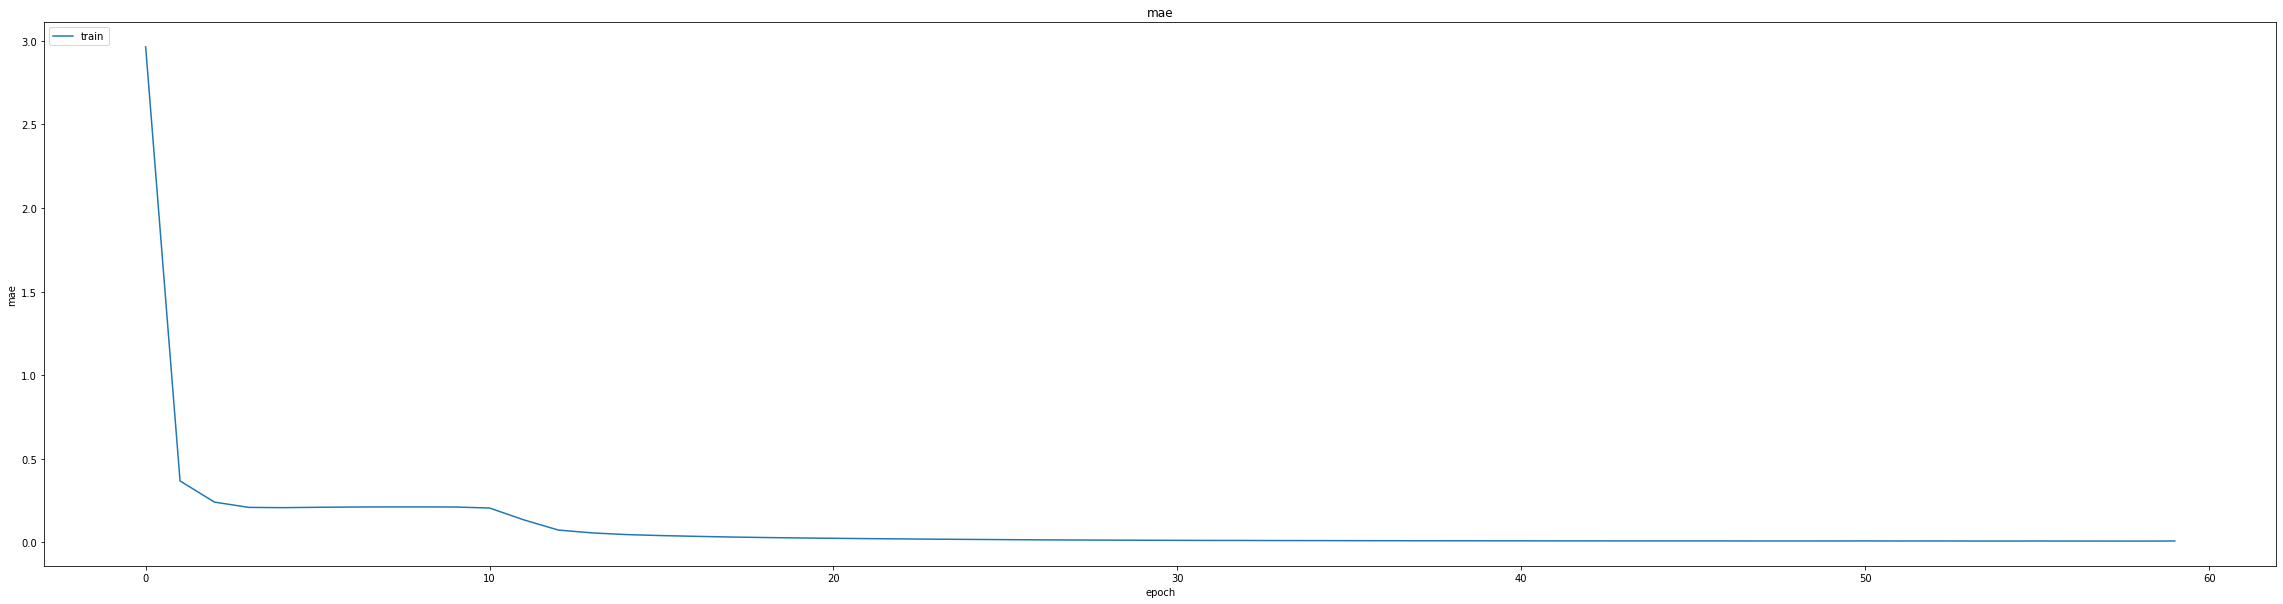

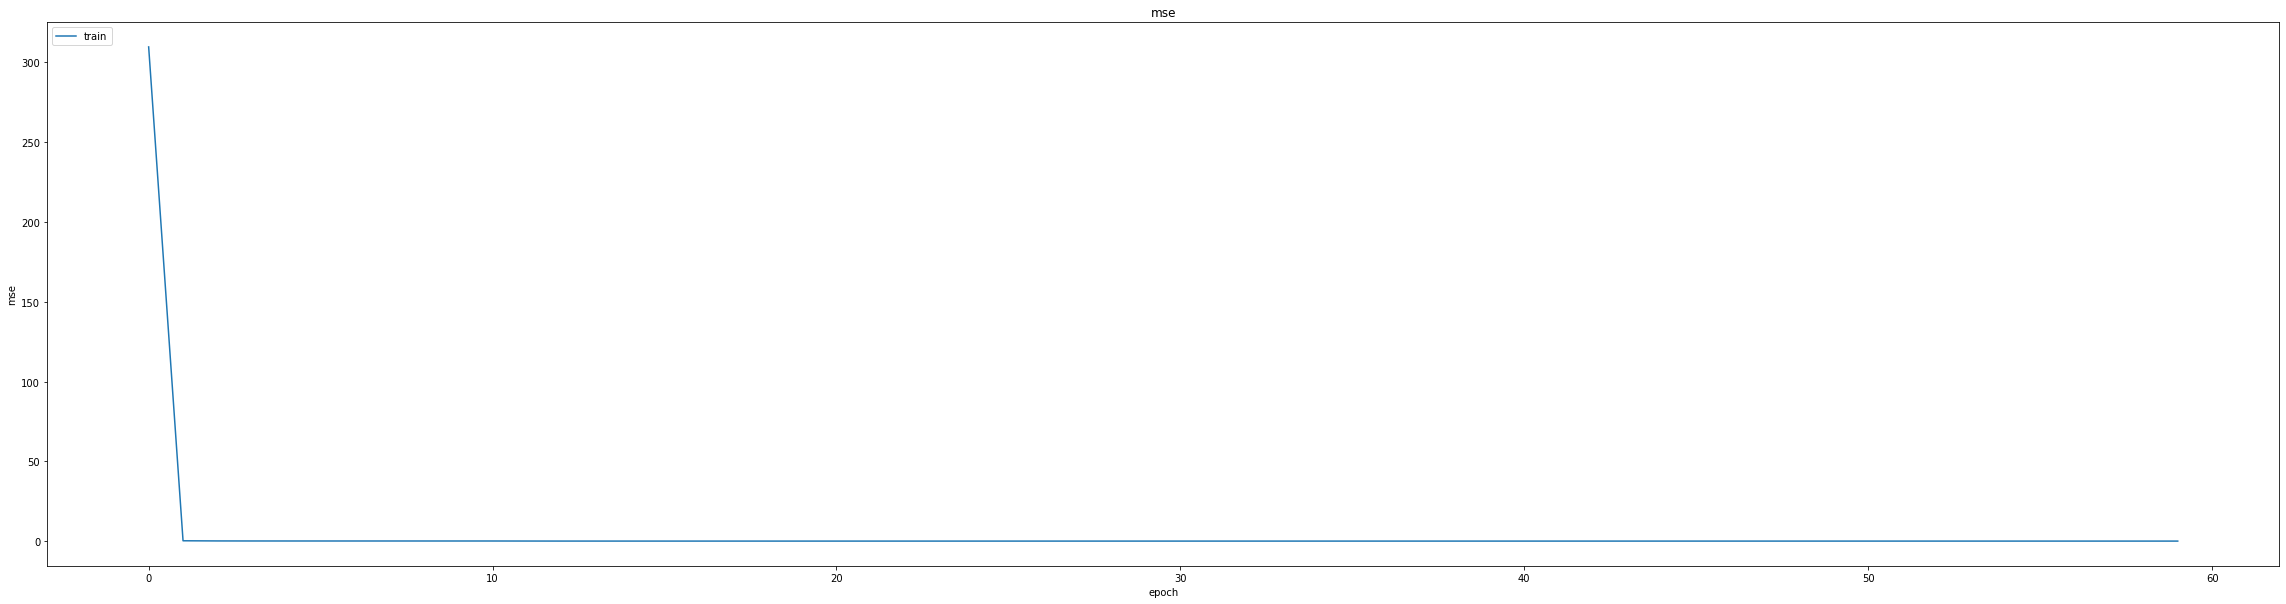

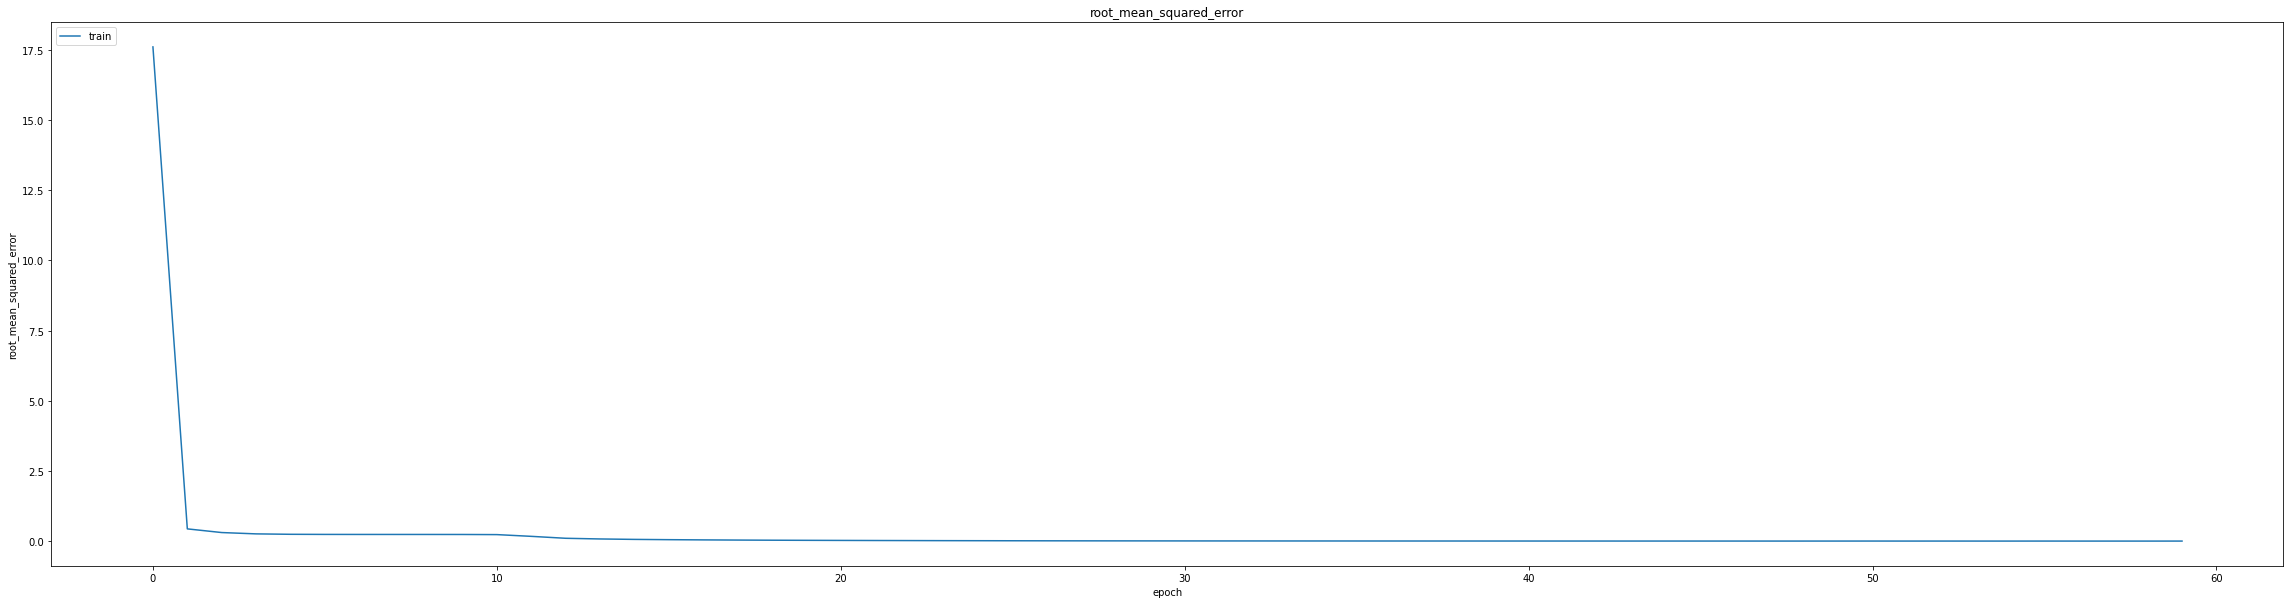

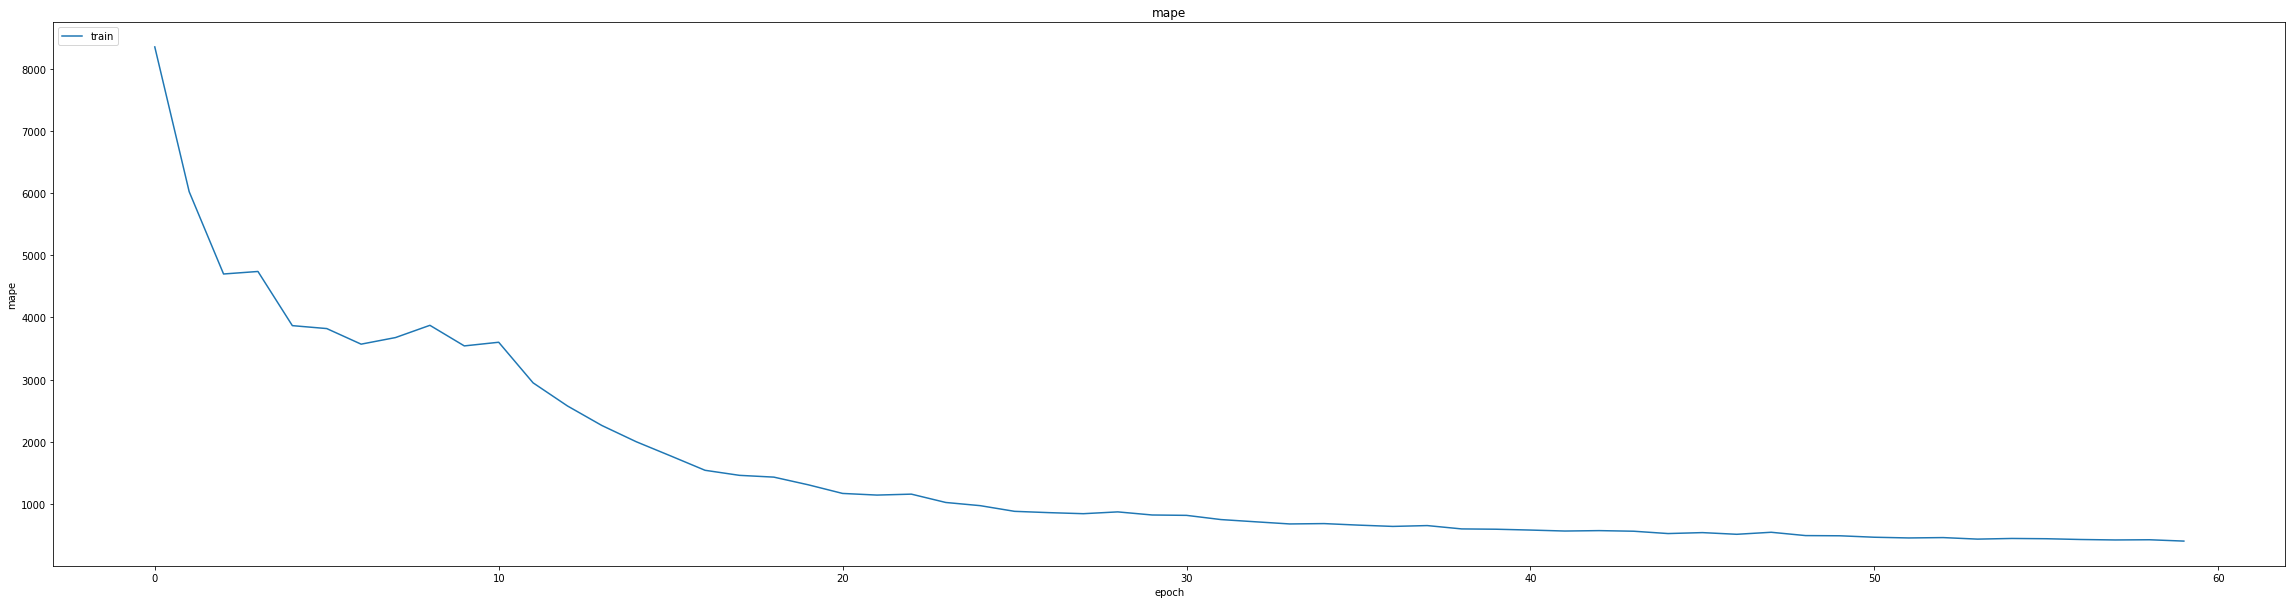

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.008090239949524403
0.008090239949524403
0.01129509974271059
1044/1044 [==============================] - 4s 3ms/step
0.9974459685923159


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=12)

In [ ]:


from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
403/405 [============================>.] - ETA: 0s - loss: 7.0977e-04 - mae: 0.0122 - mse: 7.0977e-04 - root_mean_squared_error: 0.0266 - mape: 416.8722
Epoch 1: val_mse did not improve from 0.00013
405/405 [==============================] - 10s 16ms/step - loss: 7.0668e-04 - mae: 0.0121 - mse: 7.0668e-04 - root_mean_squared_error: 0.0266 - mape: 414.8443 - val_loss: 1.3044e-04 - val_mae: 0.0081 - val_mse: 1.3044e-04 - val_root_mean_squared_error: 0.0114 - val_mape: 1974.4287 - lr: 0.0010
Epoch 2/20
403/405 [============================>.] - ETA: 0s - loss: 7.8167e-05 - mae: 0.0065 - mse: 7.8167e-05 - root_mean_squared_error: 0.0088 - mape: 401.1451
Epoch 2: val_mse improved from 0.00013 to 0.00012, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 7.8150e-05 - mae: 0.0065 - mse: 7.8150e-05 - root_mean_squared_error: 0.0088 - mape: 399.1947 - val_loss: 1.2233e-04 - val_mae: 0.0079 - val_mse: 1.2233e-04 - val_root_mean_squared_error: 0.0111 - val_mape: 1847.2209 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
402/405 [============================>.] - ETA: 0s - loss: 7.4175e-05 - mae: 0.0064 - mse: 7.4175e-05 - root_mean_squared_error: 0.0086 - mape: 336.0877
Epoch 3: val_mse improved from 0.00012 to 0.00012, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 7.4254e-05 - mae: 0.0064 - mse: 7.4254e-05 - root_mean_squared_error: 0.0086 - mape: 333.6367 - val_loss: 1.1576e-04 - val_mae: 0.0076 - val_mse: 1.1576e-04 - val_root_mean_squared_error: 0.0108 - val_mape: 1580.9417 - lr: 9.0000e-04
Epoch 4/20
402/405 [============================>.] - ETA: 0s - loss: 7.2940e-05 - mae: 0.0064 - mse: 7.2940e-05 - root_mean_squared_error: 0.0085 - mape: 326.8051
Epoch 4: val_mse improved from 0.00012 to 0.00011, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 37ms/step - loss: 7.2918e-05 - mae: 0.0064 - mse: 7.2918e-05 - root_mean_squared_error: 0.0085 - mape: 324.4157 - val_loss: 1.1258e-04 - val_mae: 0.0076 - val_mse: 1.1258e-04 - val_root_mean_squared_error: 0.0106 - val_mape: 1496.9398 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
402/405 [============================>.] - ETA: 0s - loss: 7.0898e-05 - mae: 0.0063 - mse: 7.0898e-05 - root_mean_squared_error: 0.0084 - mape: 301.8088
Epoch 5: val_mse did not improve from 0.00011
405/405 [==============================] - 6s 14ms/step - loss: 7.0824e-05 - mae: 0.0063 - mse: 7.0824e-05 - root_mean_squared_error: 0.0084 - mape: 299.6016 - val_loss: 1.1647e-04 - val_mae: 0.0080 - val_mse: 1.1647e-04 - val_root_mean_squared_error: 0.0108 - val_mape: 1456.9917 - lr: 8.1000e-04
Epoch 6/20
402/405 [============================>.] - ETA: 0s - loss: 8.1365e-05 - mae: 0.0069 - mse: 8.1365e-05 - root_mean_squared_error: 0.0090 - mape: 30

405/405 [==============================] - 16s 38ms/step - loss: 8.1291e-05 - mae: 0.0069 - mse: 8.1291e-05 - root_mean_squared_error: 0.0090 - mape: 301.2707 - val_loss: 1.1070e-04 - val_mae: 0.0075 - val_mse: 1.1070e-04 - val_root_mean_squared_error: 0.0105 - val_mape: 1498.1531 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
405/405 [==============================] - ETA: 0s - loss: 8.0126e-05 - mae: 0.0068 - mse: 8.0126e-05 - root_mean_squared_error: 0.0090 - mape: 276.0520
Epoch 7: val_mse did not improve from 0.00011
405/405 [==============================] - 6s 14ms/step - loss: 8.0126e-05 - mae: 0.0068 - mse: 8.0126e-05 - root_mean_squared_error: 0.0090 - mape: 276.0520 - val_loss: 1.4017e-04 - val_mae: 0.0091 - val_mse: 1.4017e-04 - val_root_mean_squared_error: 0.0118 - val_mape: 1488.7583 - lr: 7.2900e-04
Epoch 8/20
404/405 [============================>.] - ETA: 0s - loss: 7.5572e-05 - mae: 0.0066 - mse: 7.5572e-05 - root_mean_squared_error: 0.0087 - mape: 28

405/405 [==============================] - 15s 38ms/step - loss: 6.8641e-05 - mae: 0.0063 - mse: 6.8641e-05 - root_mean_squared_error: 0.0083 - mape: 271.1248 - val_loss: 9.1506e-05 - val_mae: 0.0069 - val_mse: 9.1506e-05 - val_root_mean_squared_error: 0.0096 - val_mape: 1397.8158 - lr: 6.5610e-04
Epoch 10/20
402/405 [============================>.] - ETA: 0s - loss: 6.8252e-05 - mae: 0.0063 - mse: 6.8252e-05 - root_mean_squared_error: 0.0083 - mape: 249.7969
Epoch 10: val_mse improved from 0.00009 to 0.00008, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 6.8112e-05 - mae: 0.0063 - mse: 6.8112e-05 - root_mean_squared_error: 0.0083 - mape: 247.9728 - val_loss: 8.1079e-05 - val_mae: 0.0063 - val_mse: 8.1079e-05 - val_root_mean_squared_error: 0.0090 - val_mape: 1304.9084 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/20
405/405 [==============================] - ETA: 0s - loss: 6.0923e-05 - mae: 0.0059 - mse: 6.0923e-05 - root_mean_squared_error: 0.0078 - mape: 245.0063
Epoch 11: val_mse did not improve from 0.00008
405/405 [==============================] - 6s 14ms/step - loss: 6.0923e-05 - mae: 0.0059 - mse: 6.0923e-05 - root_mean_squared_error: 0.0078 - mape: 245.0063 - val_loss: 1.1513e-04 - val_mae: 0.0085 - val_mse: 1.1513e-04 - val_root_mean_squared_error: 0.0107 - val_mape: 1282.8346 - lr: 5.9049e-04
Epoch 12/20
403/405 [============================>.] - ETA: 0s - loss: 6.1153e-05 - mae: 0.0060 - mse: 6.1153e-05 - root_mean_squared_error: 0.0078 - mape:

405/405 [==============================] - 15s 38ms/step - loss: 5.7133e-05 - mae: 0.0058 - mse: 5.7133e-05 - root_mean_squared_error: 0.0076 - mape: 234.8234 - val_loss: 6.4444e-05 - val_mae: 0.0056 - val_mse: 6.4444e-05 - val_root_mean_squared_error: 0.0080 - val_mape: 1221.2538 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/20
405/405 [==============================] - ETA: 0s - loss: 4.9319e-05 - mae: 0.0054 - mse: 4.9319e-05 - root_mean_squared_error: 0.0070 - mape: 222.2911
Epoch 15: val_mse did not improve from 0.00006
405/405 [==============================] - 6s 14ms/step - loss: 4.9319e-05 - mae: 0.0054 - mse: 4.9319e-05 - root_mean_squared_error: 0.0070 - mape: 222.2911 - val_loss: 7.7586e-05 - val_mae: 0.0067 - val_mse: 7.7586e-05 - val_root_mean_squared_error: 0.0088 - val_mape: 1191.0688 - lr: 4.7830e-04
Epoch 16/20
405/405 [==============================] - ETA: 0s - loss: 4.4681e-05 - mae: 0.0051 - mse: 4.4681e-05 - root_mean_squared_error: 0.0067 - mape

405/405 [==============================] - 15s 37ms/step - loss: 4.4696e-05 - mae: 0.0051 - mse: 4.4696e-05 - root_mean_squared_error: 0.0067 - mape: 203.9194 - val_loss: 5.8070e-05 - val_mae: 0.0056 - val_mse: 5.8070e-05 - val_root_mean_squared_error: 0.0076 - val_mape: 1175.9832 - lr: 4.3047e-04
Epoch 18/20
405/405 [==============================] - ETA: 0s - loss: 4.2253e-05 - mae: 0.0050 - mse: 4.2253e-05 - root_mean_squared_error: 0.0065 - mape: 207.8073
Epoch 18: val_mse did not improve from 0.00006
405/405 [==============================] - 6s 14ms/step - loss: 4.2253e-05 - mae: 0.0050 - mse: 4.2253e-05 - root_mean_squared_error: 0.0065 - mape: 207.8073 - val_loss: 1.8433e-04 - val_mae: 0.0122 - val_mse: 1.8433e-04 - val_root_mean_squared_error: 0.0136 - val_mape: 1189.6213 - lr: 4.3047e-04
lr changed to 0.00038742052274756136
Epoch 19/20
401/405 [============================>.] - ETA: 0s - loss: 3.8875e-05 - mae: 0.0048 - mse: 3.8875e-05 - root_mean_squared_error: 0.0062 - mape

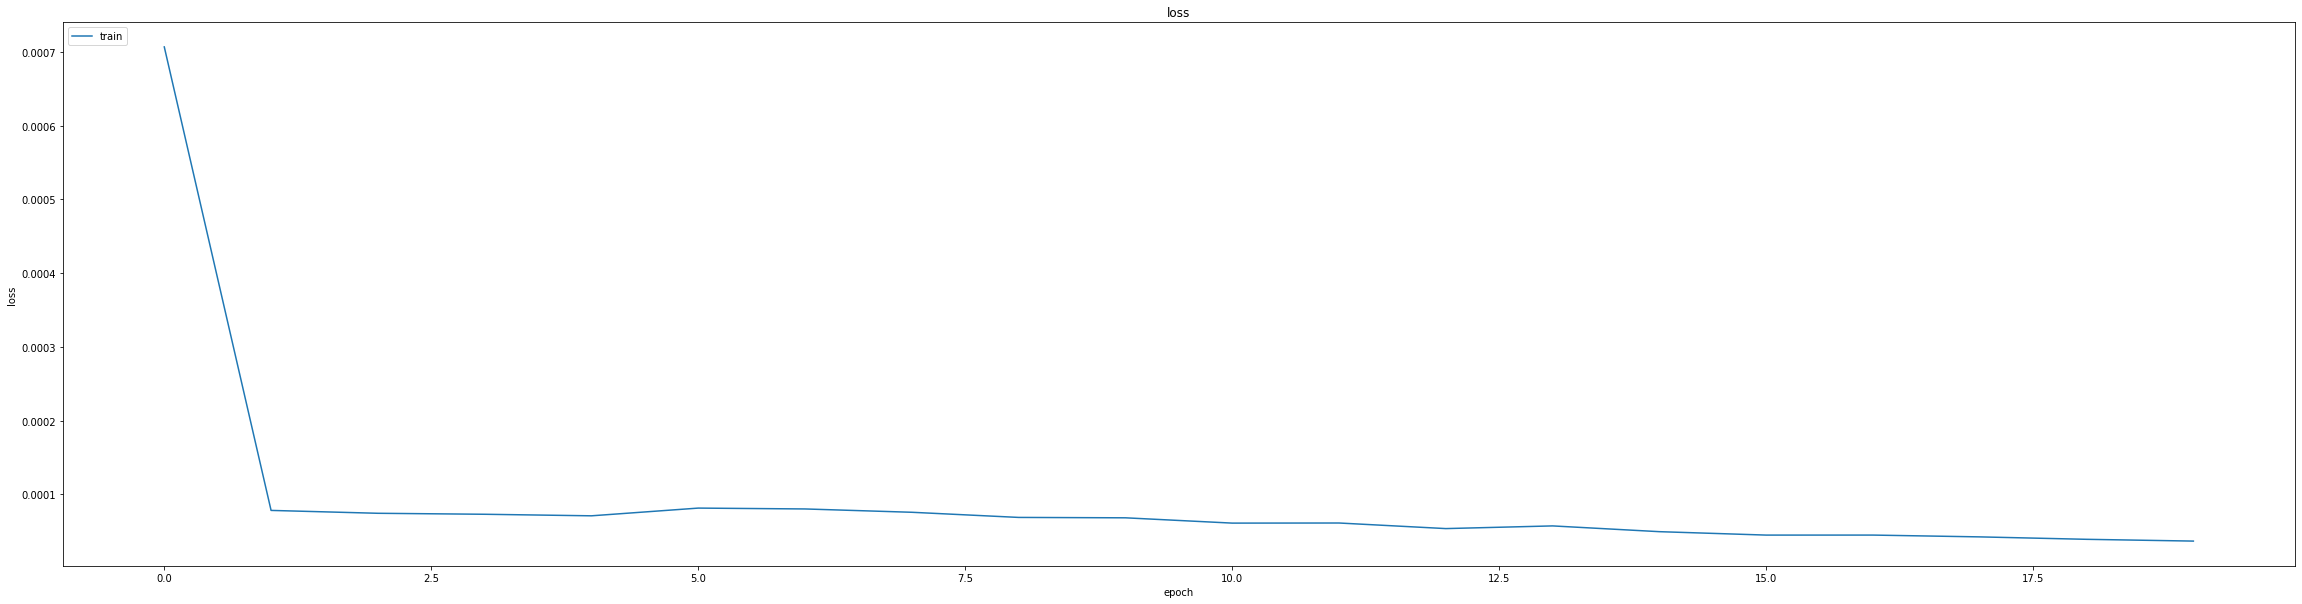

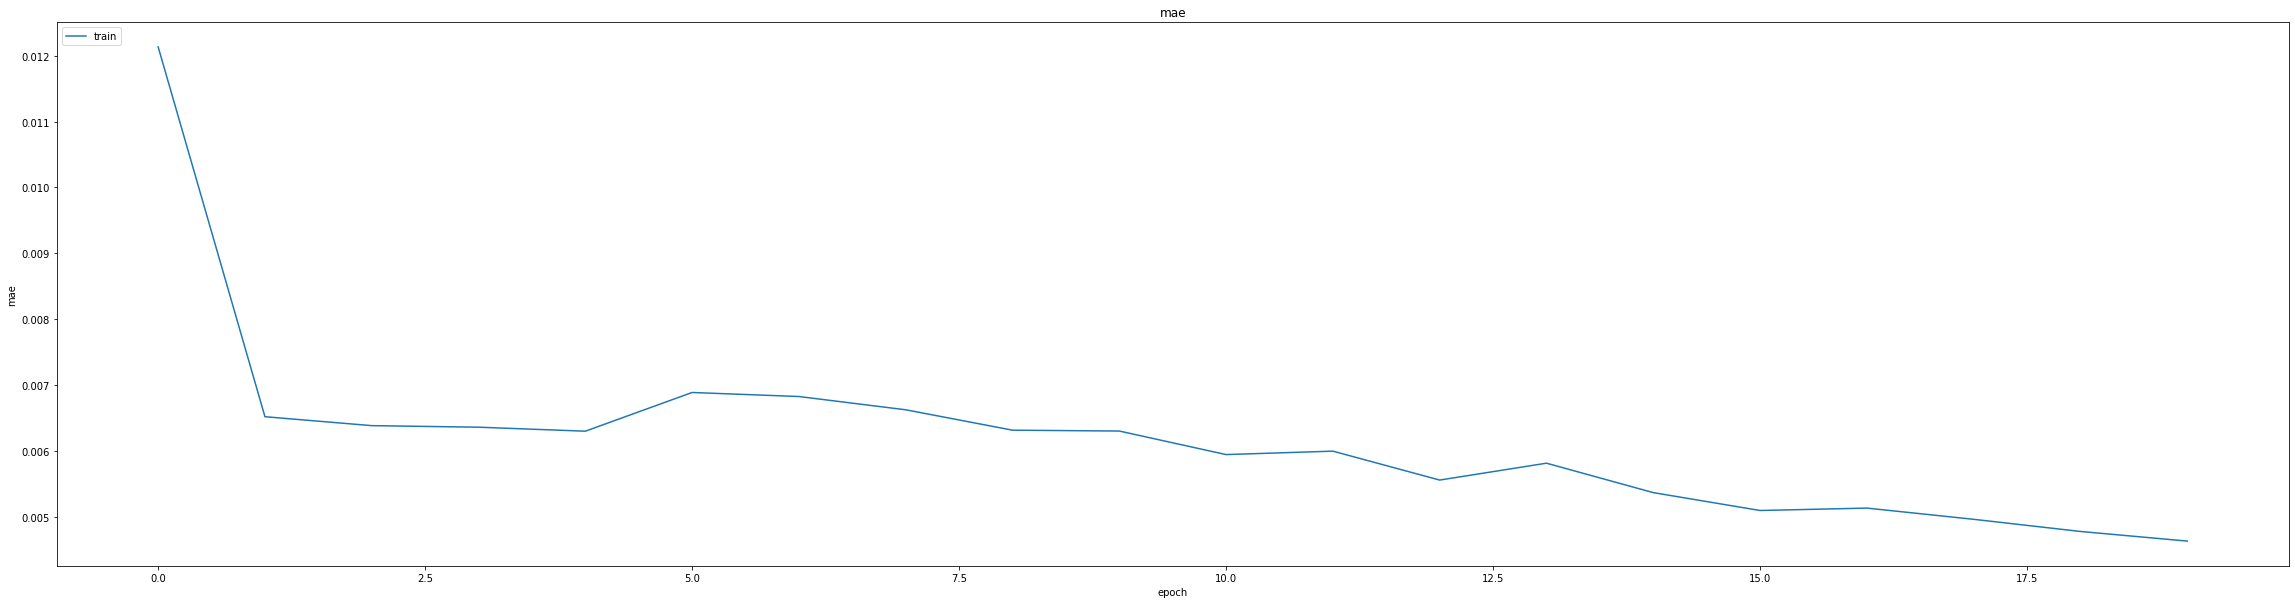

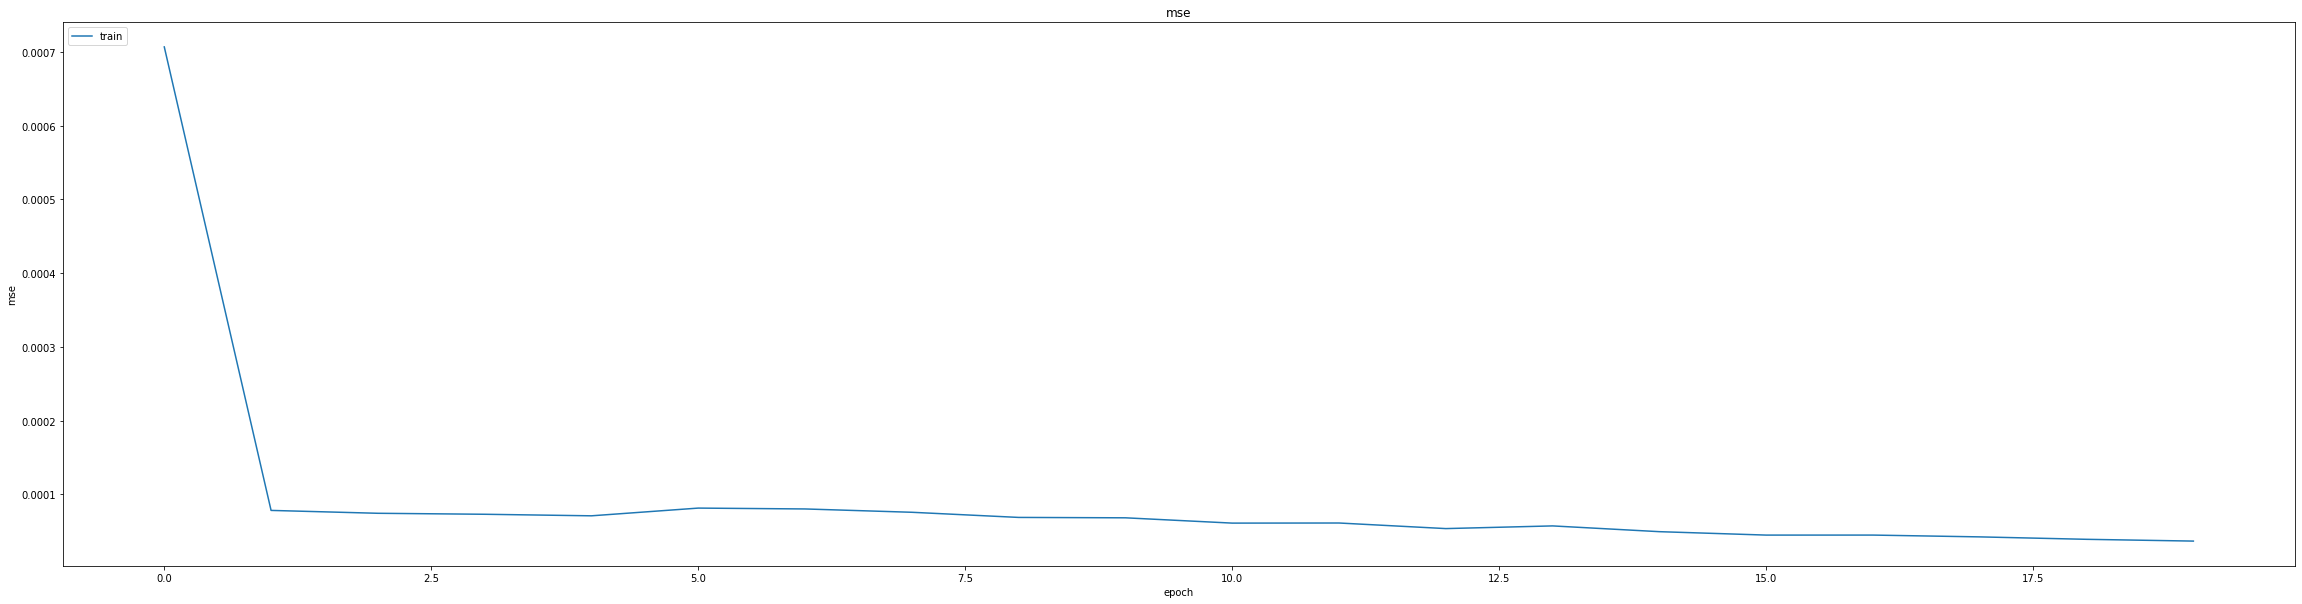

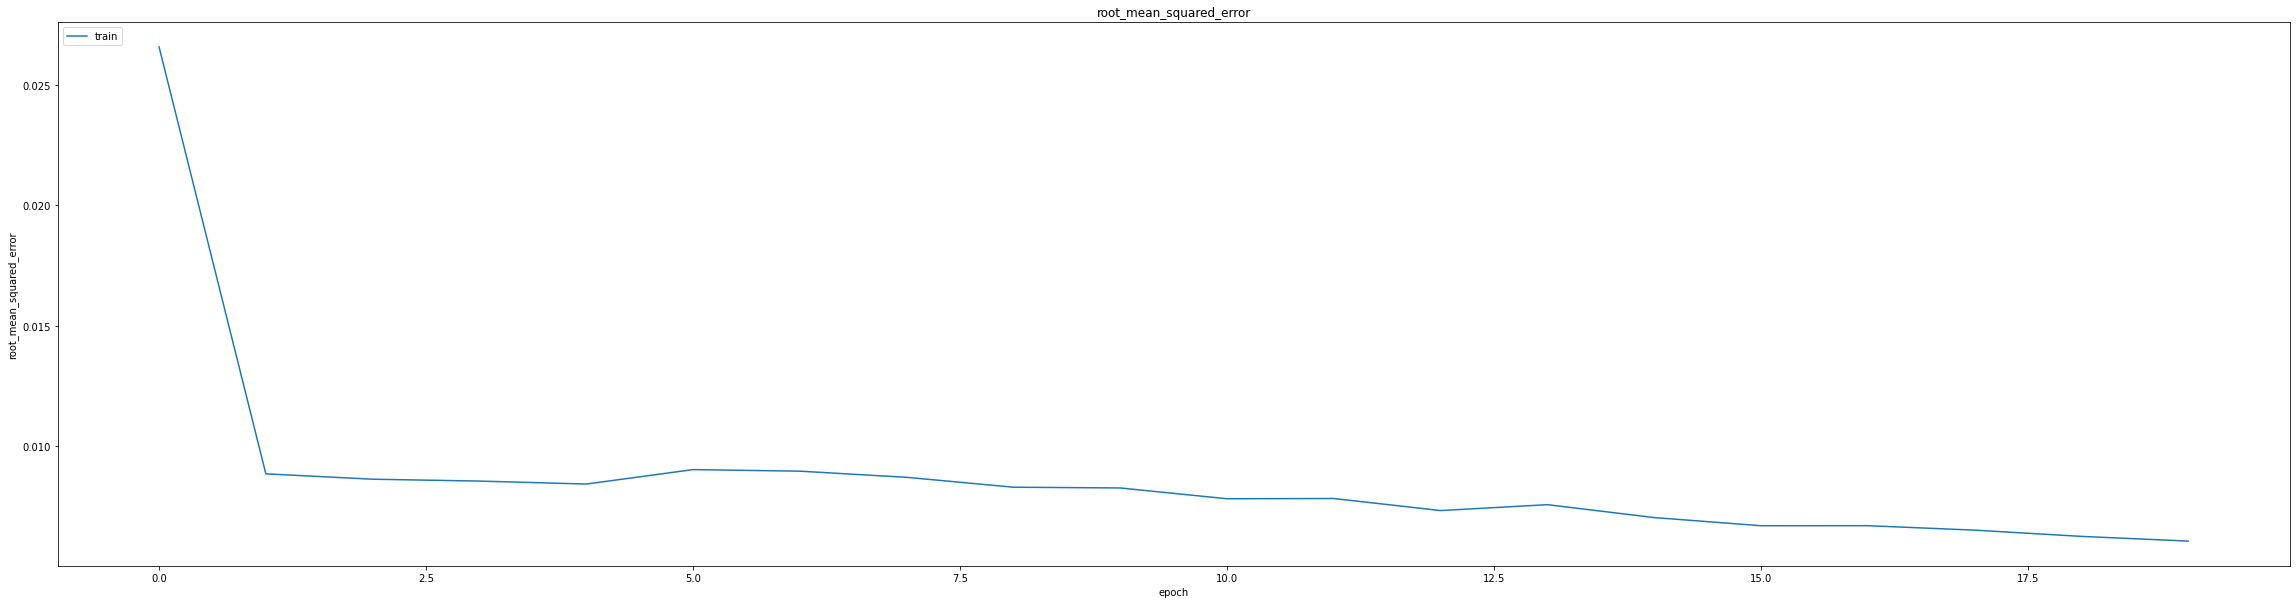

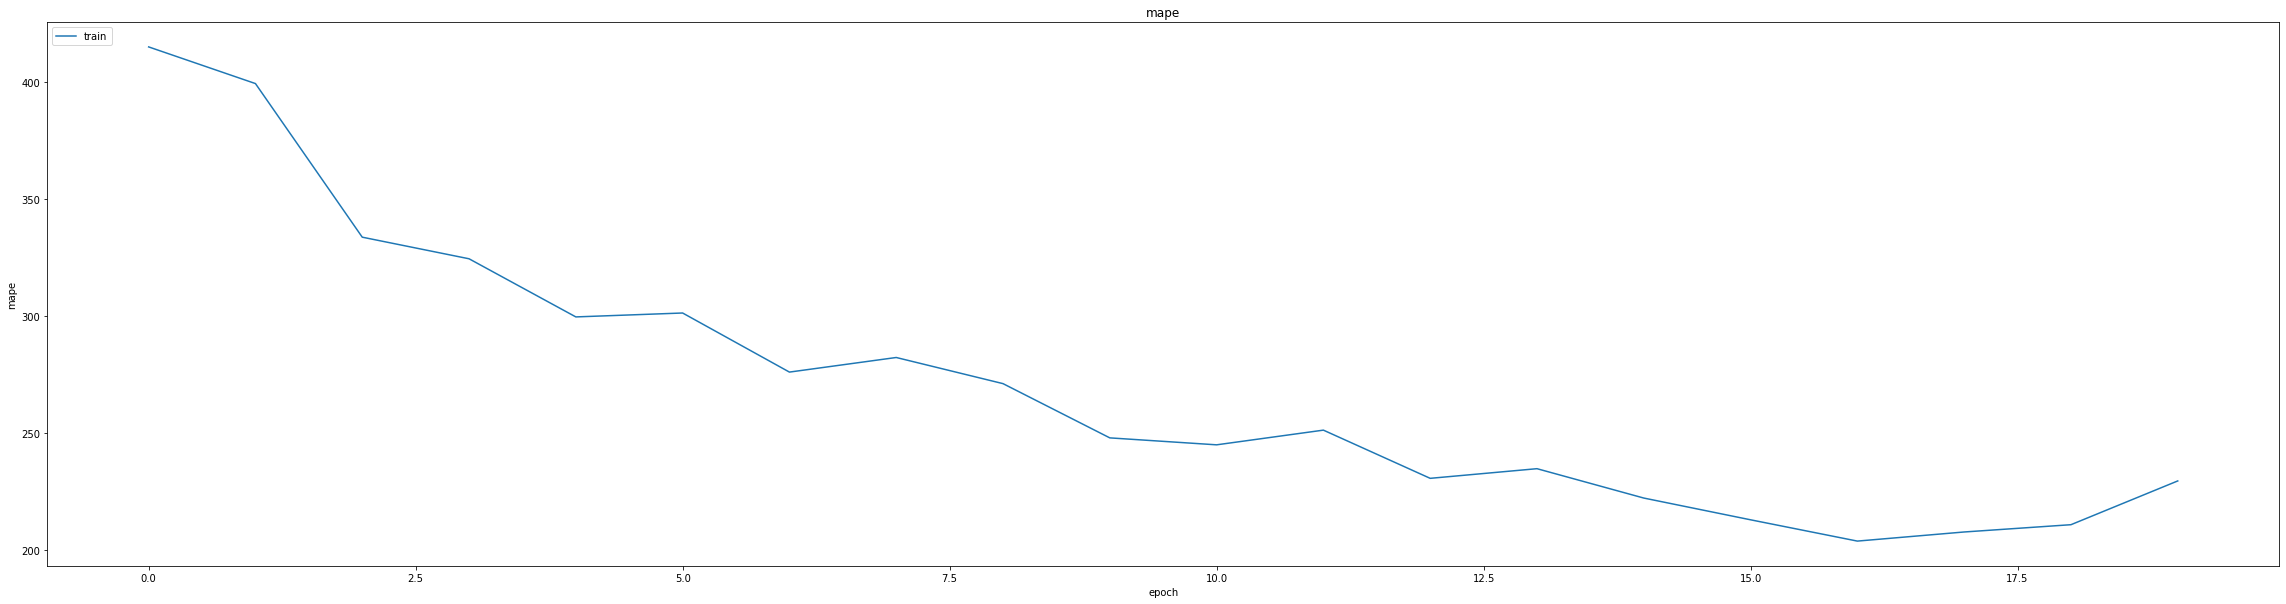

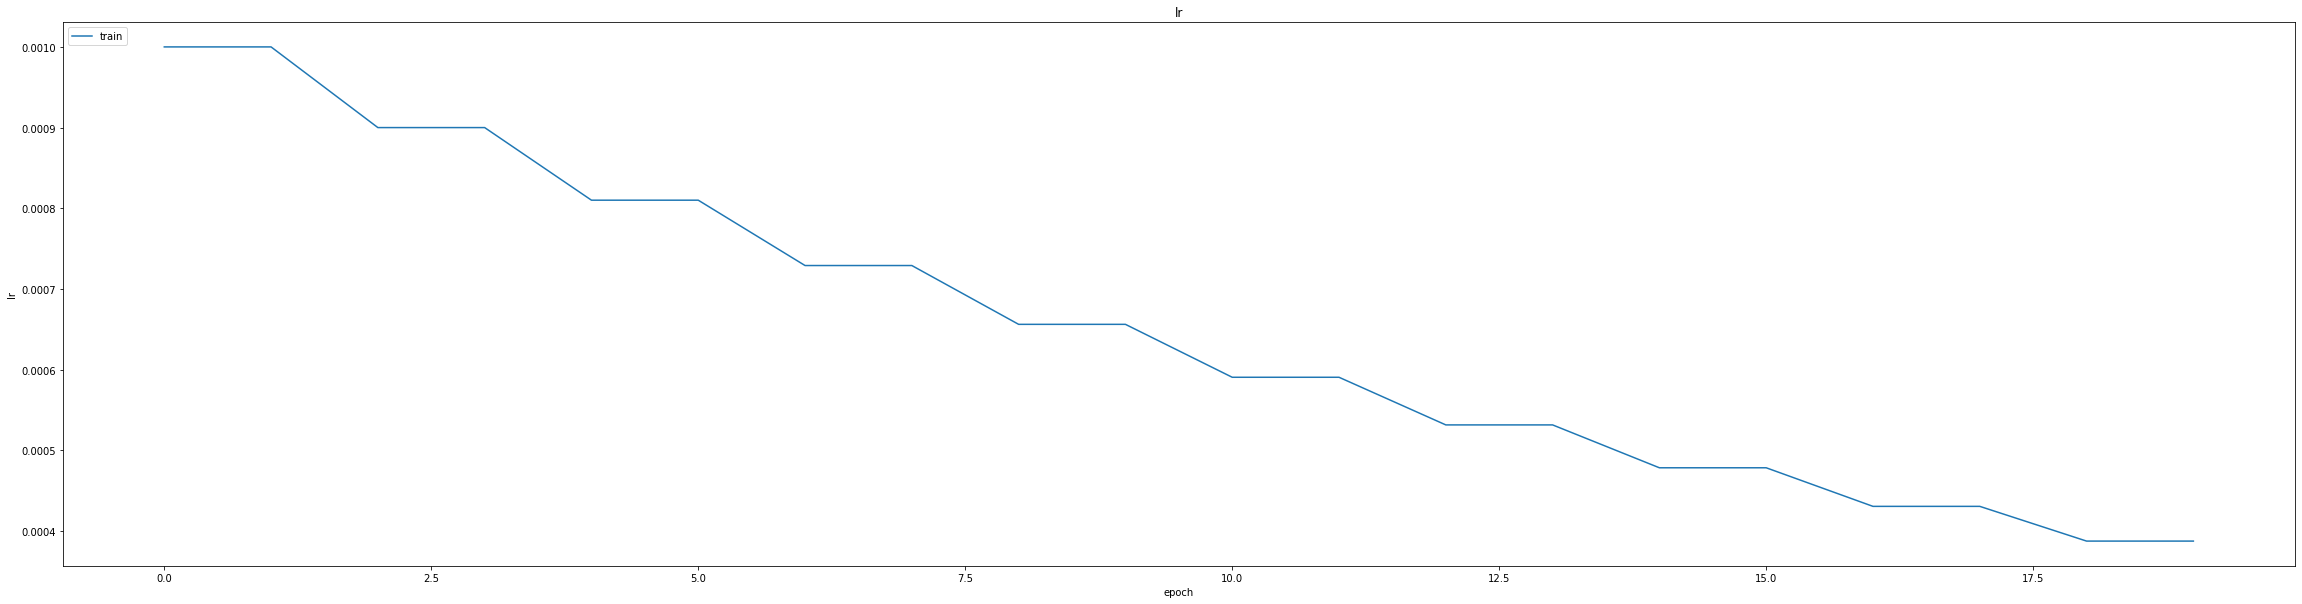

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.005597298964858055
0.005597298964858055
0.007620377000421286
1044/1044 [==============================] - 4s 3ms/step
0.9963609366592683


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(70-30)")

1044/1044 [==============================] - 4s 3ms/step


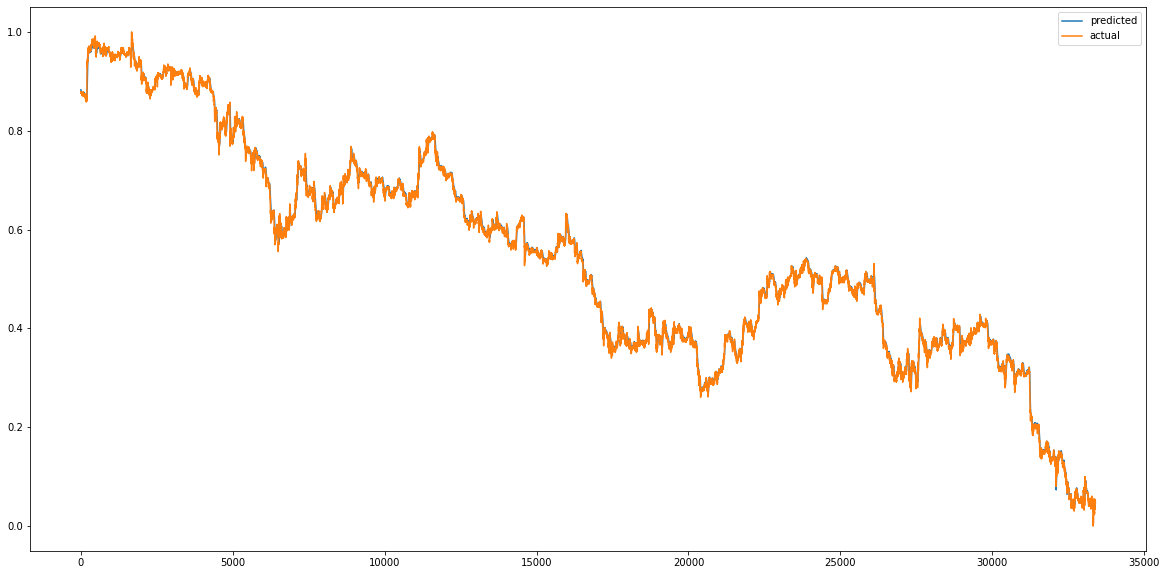

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


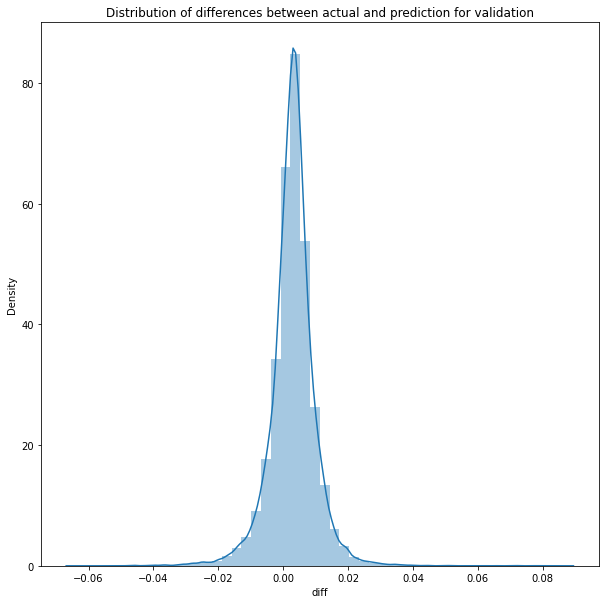

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1044/1044 [==============================] - 4s 3ms/step


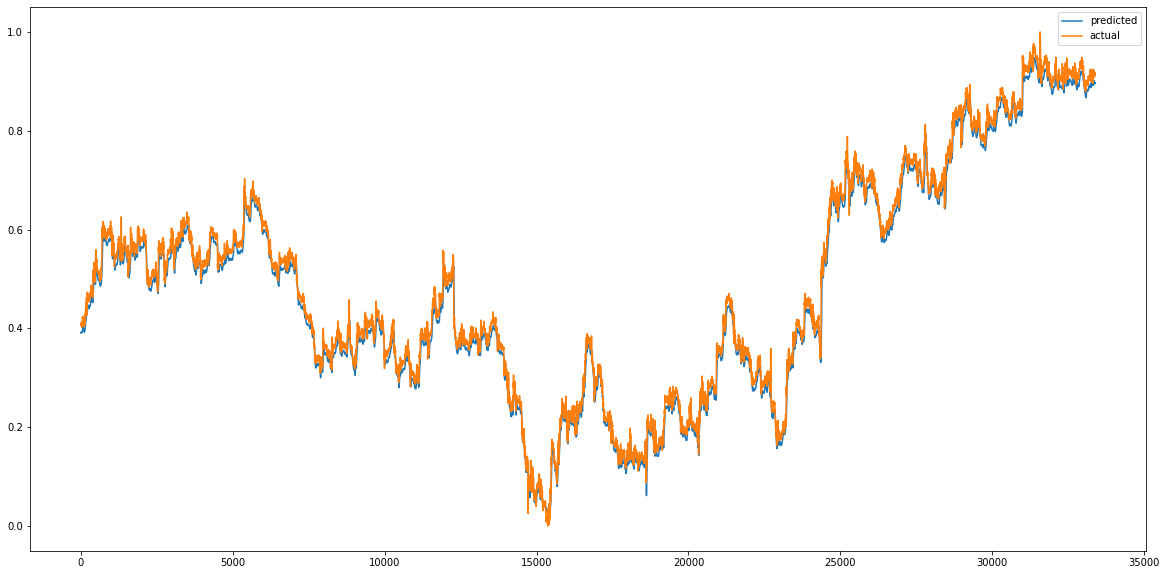

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


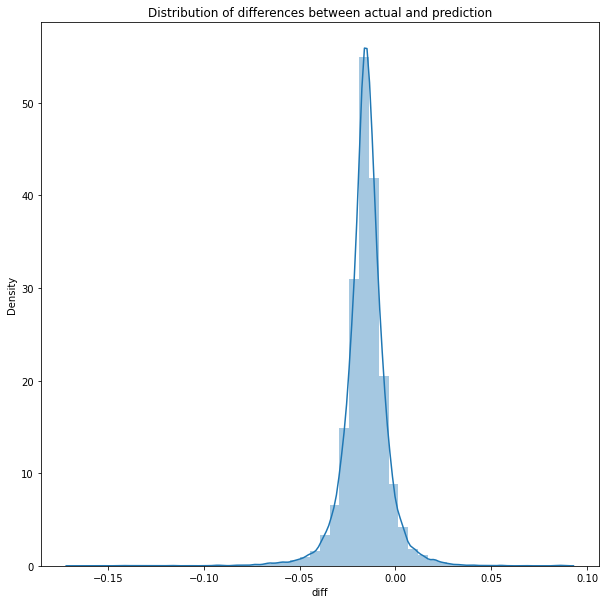

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00037290263938421646
RMSE :  0.019310687180528207
MAE :  0.01656815967126292
1044/1044 [==============================] - 4s 3ms/step
R2_Score  : 0.9928768290342322


count    33392.000000
mean        -0.015625
std          0.011348
min         -0.167515
25%         -0.020430
50%         -0.015368
75%         -0.010352
max          0.088707
Name: diff, dtype: float64